In [216]:
library(Quandl)

library(quantmod)
library(tidyverse)

library(readxl)
library(lmtest) 
library(forecast)
library(DIMORA)

library(fpp2)

library(rugarch)
library(ggplot2)
library(PerformanceAnalytics)
library(xts)
library(tseries)

library(sm)
library(splines)
library(gam)

library(tree)
library (gbm)

In [217]:
start_date <- Sys.Date()-(365*12)
end_date <- Sys.Date()
master_df <- NULL
stock_list <- c("CL=F")
for (idx in seq(length(stock_list))){
  stock_index = stock_list[idx]
  getSymbols(stock_index, verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly")
  temp_df = as.data.frame(get(stock_index))
  temp_df$Date = row.names(temp_df)
  temp_df$Index = stock_index
  row.names(temp_df) = NULL
  colnames(temp_df) = c("Open", "High", "Low", "Close", 
                        "Volume", "Adjusted", "Date", "Index")
  temp_df = temp_df[c("Date", "Index", "Open", "High", 
                      "Low", "Close", "Volume", "Adjusted")]
  master_df = rbind(master_df, temp_df)
}


write.csv(master_df,"crudeoilstats.csv", row.names = TRUE)





downloading  CL=F .....



Warning message:
“CL=F download failed; trying again.”


ERROR: Error in getSymbols.yahoo(Symbols = "CL=F", env = <environment>, verbose = TRUE, : Unable to import “CL=F”.
CL=F download failed after two attempts. Error message:
Timeout was reached: [query2.finance.yahoo.com] SSL connection timeout


In [ ]:
crudeoil <- read.csv("crudeoilstats.csv")
crudeoil <- na.omit(crudeoil)
str(crudeoil)

'data.frame':	122 obs. of  9 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date    : chr  "2011-02-01" "2011-03-01" "2011-04-01" "2011-06-01" ...
 $ Index   : chr  "CL=F" "CL=F" "CL=F" "CL=F" ...
 $ Open    : num  92.2 97 106.6 102.7 95.1 ...
 $ High    : num  103 107 114 103 101 ...
 $ Low     : num  83.8 96.2 105.3 89.6 93.4 ...
 $ Close   : num  97 106.7 113.9 95.4 95.7 ...
 $ Volume  : int  6702855 7142807 5906063 7612897 5712768 8623260 6687717 6923687 6546619 4905263 ...
 $ Adjusted: num  97 106.7 113.9 95.4 95.7 ...


In [ ]:
crudeoil

X   Date       Index Open   High   Low    Close  Volume   Adjusted
1    1  2011-02-01 CL=F   92.20 103.41  83.85  96.97 6702855   96.97  
2    2  2011-03-01 CL=F   96.97 106.95  96.22 106.72 7142807  106.72  
3    3  2011-04-01 CL=F  106.62 114.18 105.31 113.93 5906063  113.93  
4    4  2011-06-01 CL=F  102.68 103.31  89.61  95.42 7612897   95.42  
5    5  2011-07-01 CL=F   95.12 100.62  93.45  95.70 5712768   95.70  
6    6  2011-08-01 CL=F   96.20  98.60  75.71  88.81 8623260   88.81  
7    7  2011-09-01 CL=F   88.73  90.52  77.11  79.20 6687717   79.20  
8    8  2011-10-01 CL=F   78.92  94.65  74.95  93.19 6923687   93.19  
9    9  2011-11-01 CL=F   92.58 103.37  89.17 100.36 6546619  100.36  
10  10  2011-12-01 CL=F  100.51 102.44  92.52  98.83 4905263   98.83  
11  11  2012-02-01 CL=F   98.38 109.95  95.44 107.07 5837415  107.07  
12  12  2012-03-01 CL=F  106.82 110.55 102.13 103.02 6022417  103.02  
13  13  2012-05-01 CL=F  104.89 106.43  85.86  86.53 6008992   86.53  
14  14  2012-06-01 CL=F   86.44  87.03  77.28  84.96 6321933   84.96  
15  15  2012-08-01 CL=F   88.03  98.29  86.92  96.47 5267722   96.47  
16  16  2012-09-01 CL=F   96.38 100.42  88.95  92.19 4549667   92.19  
17  17  2012-10-01 CL=F   92.15  93.66  84.66  86.24 5491372   86.24  
18  18  2012-11-01 CL=F   86.10  89.80  84.05  88.91 5396754   88.91  
19  19  2012-12-01 CL=F   88.85  91.99  85.21  91.82 3789627   91.82  
20  20  2013-01-01 CL=F   91.78  98.24  91.52  97.49 4573516   97.49  
21  21  2013-02-01 CL=F   97.42  98.15  91.57  92.05 4427942   92.05  
22  22  2013-03-01 CL=F   91.76  97.35  89.33  97.23 4226621   97.23  
23  23  2013-04-01 CL=F   97.36  97.80  85.61  93.46 5632039   93.46  
24  24  2013-05-01 CL=F   93.08  97.17  90.11  91.97 6126412   91.97  
25  25  2013-06-01 CL=F   91.73  99.01  91.26  96.56 5266358   96.56  
26  26  2013-07-01 CL=F   96.58 109.32  96.07 105.03 5636543  105.03  
27  27  2013-08-01 CL=F  105.26 112.24 102.22 107.65 5634934  107.65  
28  28  2013-10-01 CL=F  102.31 104.38  95.95  96.38 5458477   96.38  
29  29  2013-11-01 CL=F   96.32  96.65  91.77  92.72 4709460   92.72  
30  30  2014-01-01 CL=F   98.50  98.97  91.24  97.49 4699881   97.49  
⋮   ⋮   ⋮          ⋮     ⋮      ⋮      ⋮      ⋮      ⋮        ⋮       
93   93 2020-04-01 CL=F   20.10  29.13 -40.32  18.84 16824885  18.84  
94   94 2020-05-01 CL=F   19.04  35.77  18.05  35.49  6304127  35.49  
95   95 2020-06-01 CL=F   35.21  41.63  34.27  39.27  7923564  39.27  
96   96 2020-07-01 CL=F   39.84  42.40  38.54  40.27  7151922  40.27  
97   97 2020-08-01 CL=F   40.39  43.78  39.58  42.61  6720832  42.61  
98   98 2020-09-01 CL=F   42.83  43.43  36.13  40.22  7025110  40.22  
99   99 2020-10-01 CL=F   39.90  41.70  34.92  35.79  7685767  35.79  
100 100 2020-12-01 CL=F   45.08  49.28  43.92  48.52  6658228  48.52  
101 101 2021-01-01 CL=F   48.40  53.93  47.18  52.20  7574920  52.20  
102 102 2021-02-01 CL=F   51.99  63.81  51.64  61.50  8065615  61.50  
103 103 2021-03-01 CL=F   61.95  67.98  57.25  59.16 10167951  59.16  
104 104 2021-04-01 CL=F   59.49  65.47  57.63  63.58  8438272  63.58  
105 105 2021-05-01 CL=F   63.64  67.52  61.56  66.32  8001095  66.32  
106 106 2021-06-01 CL=F   66.68  74.45  66.41  73.47  8261945  73.47  
107 107 2021-07-01 CL=F   73.50  76.98  65.21  73.95  8643164  73.95  
108 108 2021-09-01 CL=F   68.55  76.67  67.12  75.03  8102078  75.03  
109 109 2021-10-01 CL=F   75.12  85.41  74.23  83.57  9725158  83.57  
110 110 2021-11-01 CL=F   83.36  84.97  64.43  66.18 10364108  66.18  
111 111 2021-12-01 CL=F   67.01  77.44  62.43  75.21  7853281  75.21  
112 112 2022-01-01 CL=F   75.69  88.84  74.27  88.15  8385229  88.15  
113 113 2022-02-01 CL=F   88.15 100.54  86.55  95.72  9108602  95.72  
114 114 2022-03-01 CL=F   96.09 130.50  93.53 100.28  9128833 100.28  
115 115 2022-04-01 CL=F  101.23 109.81  92.93 104.69  5669971 104.69  
116 116 2022-06-01 CL=F  115.40 123.68 101.53 105.76  6646137 105.76  
117 117 2022-07-01 CL=F  106

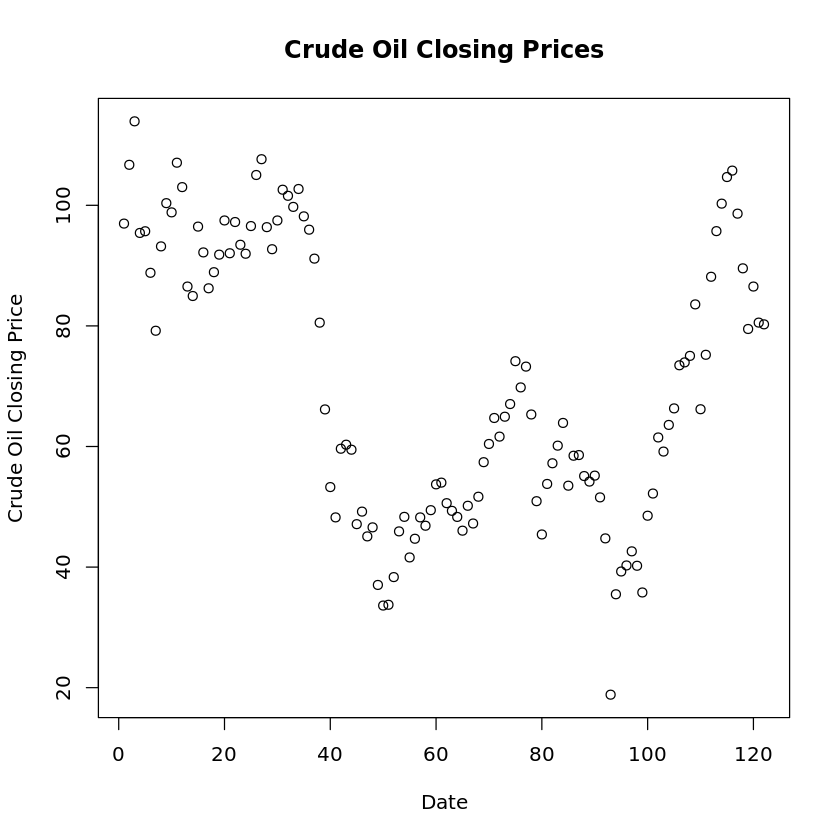

In [ ]:
plot(crudeoil$Close, main = "Crude Oil Closing Prices", ylab="Crude Oil Closing Price", xlab="Date")

In [ ]:
## transform the data into a ts object
close_co.ts <- ts(crudeoil$Close, frequency=12)
close_co.ts

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov   
1   96.97 106.72 113.93  95.42  95.70  88.81  79.20  93.19 100.36  98.83 107.07
2   86.53  84.96  96.47  92.19  86.24  88.91  91.82  97.49  92.05  97.23  93.46
3   96.56 105.03 107.65  96.38  92.72  97.49 102.59 101.58  99.74 102.71  98.17
4   91.16  80.54  66.15  53.27  48.24  59.63  60.30  59.47  47.12  49.20  45.09
5   37.04  33.62  33.75  38.34  45.92  48.33  41.60  44.70  48.24  46.86  49.44
6   54.01  50.60  49.33  48.32  46.04  50.17  47.23  51.67  57.40  60.42  64.73
7   64.94  67.04  74.15  69.80  73.25  65.31  50.93  45.41  53.79  57.22  60.14
8   53.50  58.47  58.58  55.10  54.18  55.17  51.56  44.76  18.84  35.49  39.27
9   42.61  40.22  35.79  48.52  52.20  61.50  59.16  63.58  66.32  73.47  73.95
10  83.57  66.18  75.21  88.15  95.72 100.28 104.69 105.76  98.62  89.55  79.49
11  80.55  80.26                                                               
   Dec   
1  103.02
2   91.97
3   95.96
4   46.59
5   53.72
6   61.64
7   63.91
8   40.27
9   75.03
10  86.53
11

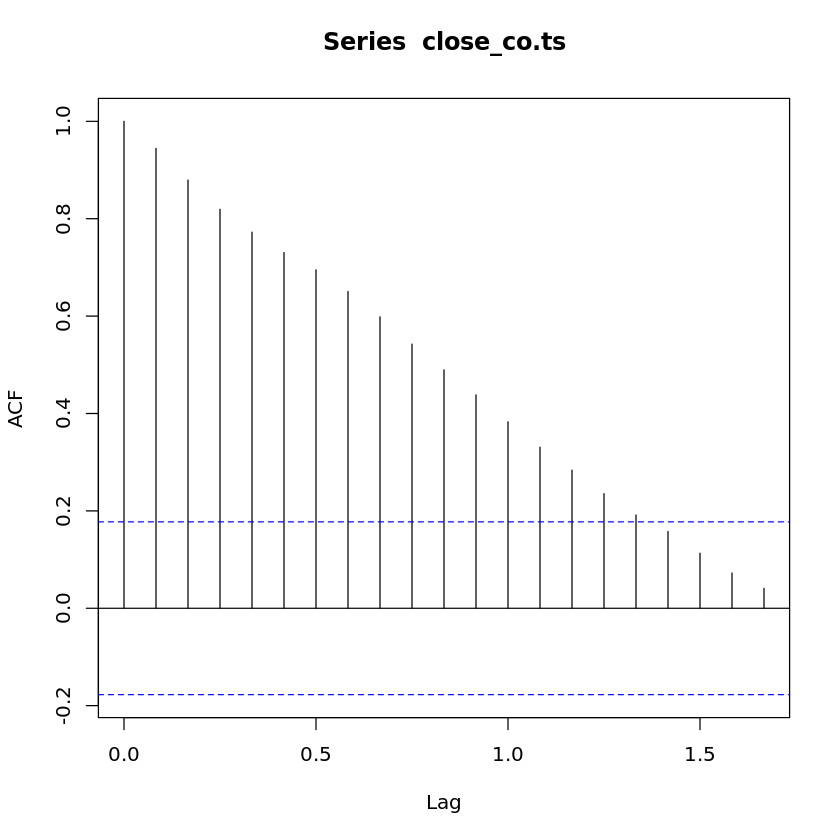

In [ ]:
acf(close_co.ts)


Call:
lm(formula = crudeoil$Close ~ tt)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.408 -18.393  -0.306  16.490  49.430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.17582    3.83590  22.466  < 2e-16 ***
tt          -0.25729    0.05413  -4.754 5.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.05 on 120 degrees of freedom
Multiple R-squared:  0.1585,	Adjusted R-squared:  0.1515 
F-statistic:  22.6 on 1 and 120 DF,  p-value: 5.606e-06


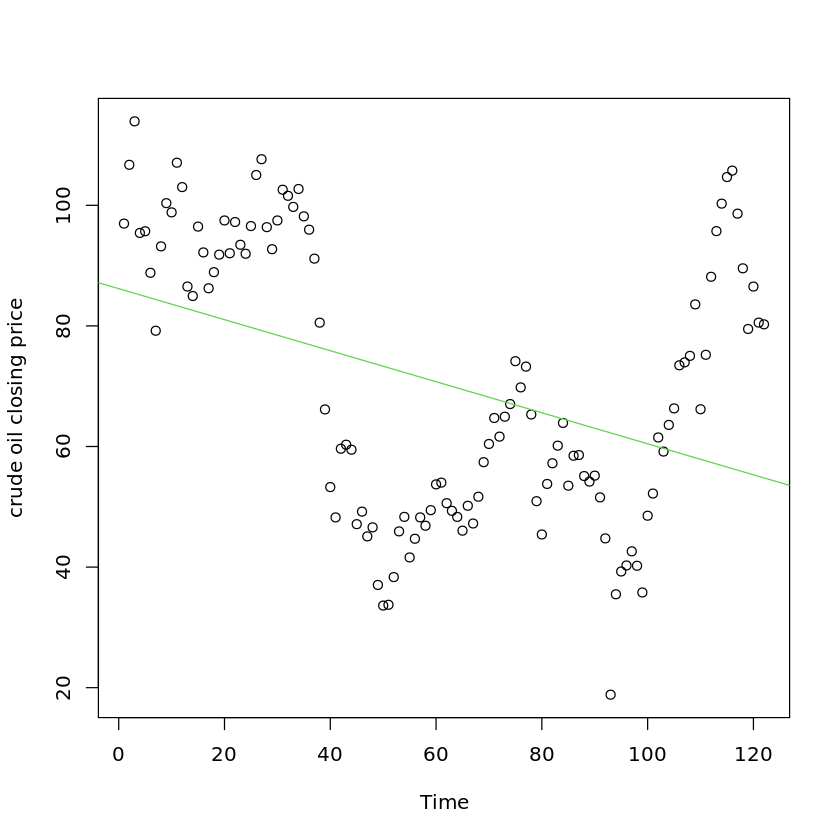

In [ ]:
#fit linear regression
tt<- 1:NROW(crudeoil$Close) #create time variable
fit1<- lm(crudeoil$Close~ tt)
summary(fit1)

##plot the model
plot(tt, crudeoil$Close, xlab="Time", ylab="crude oil closing price")
abline(fit1, col=3)


	Durbin-Watson test

data:  fit1
DW = 0.11697, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


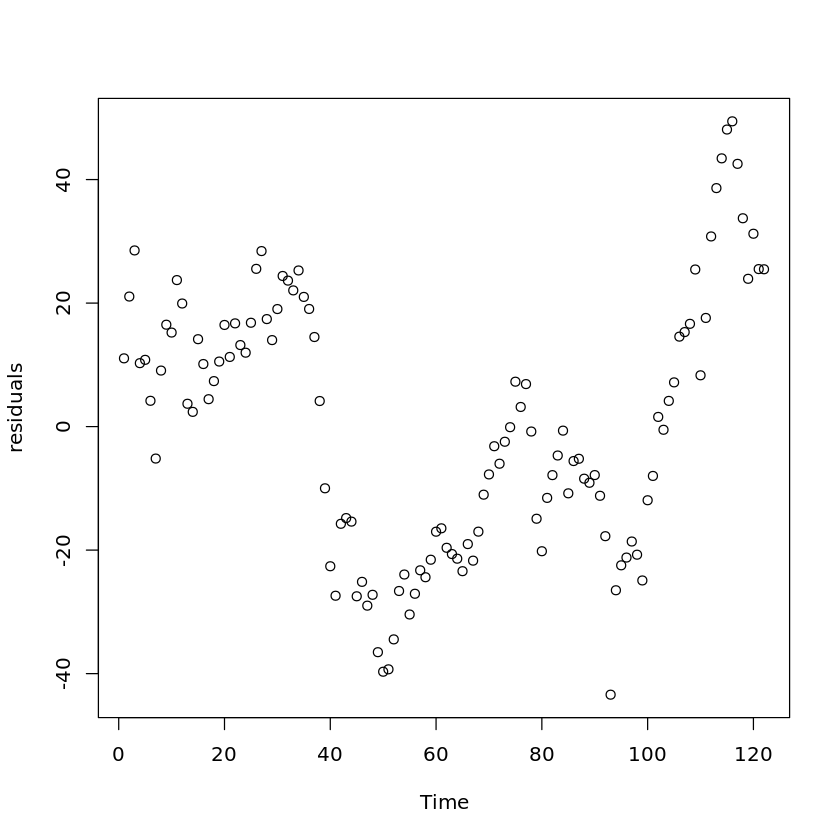

In [ ]:
##check the residuals? are they autocorrelated? Test of DW
dwtest(fit1)

##check the residuals
resfit1<- residuals(fit1)
plot(resfit1,xlab="Time", ylab="residuals" )


Call:
tslm(formula = close_co.ts ~ trend)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.408 -18.393  -0.306  16.490  49.430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.17582    3.83590  22.466  < 2e-16 ***
trend       -0.25729    0.05413  -4.754 5.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.05 on 120 degrees of freedom
Multiple R-squared:  0.1585,	Adjusted R-squared:  0.1515 
F-statistic:  22.6 on 1 and 120 DF,  p-value: 5.606e-06



	Durbin-Watson test

data:  fitts
DW = 0.11697, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


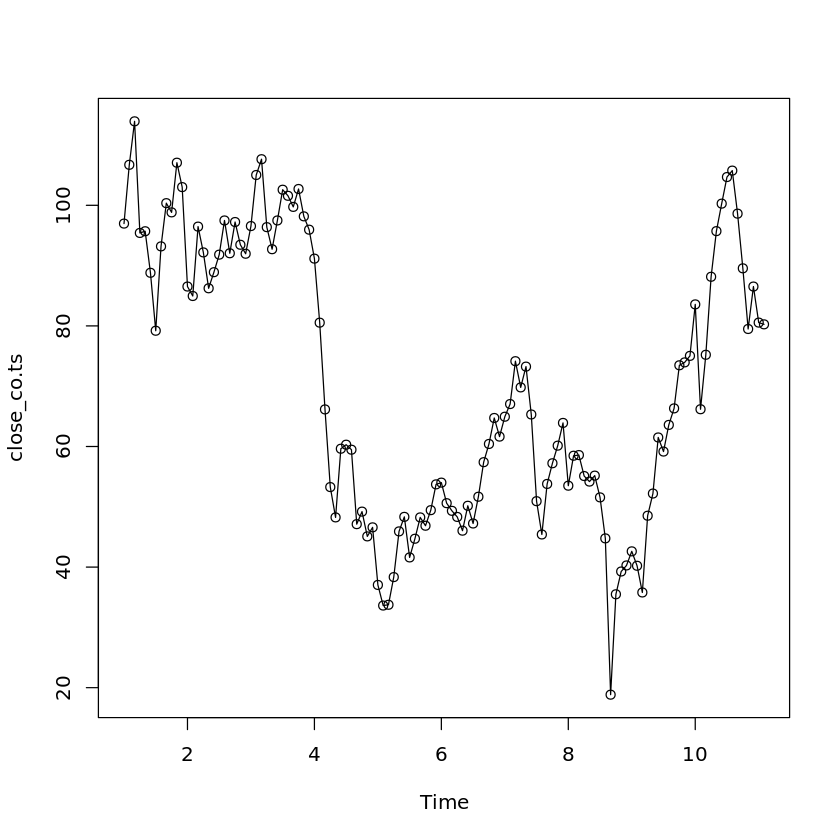

In [ ]:
##let us do the same with a linear model for time series
ts.plot(close_co.ts, type="o")

## we fit a linear model with the tslm function
fitts<- tslm(close_co.ts~trend)

###obviously it gives the same results of the first model
summary(fitts)

dwtest(fitts)


Call:
tslm(formula = close_co.ts ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.621 -19.391   0.333  15.530  49.798 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 87.41858    7.49034  11.671  < 2e-16 ***
trend       -0.25956    0.05678  -4.571 1.29e-05 ***
season2     -0.99499    9.39248  -0.106    0.916    
season3     -1.52269    9.62693  -0.158    0.875    
season4     -3.81513    9.62576  -0.396    0.693    
season5     -3.08357    9.62492  -0.320    0.749    
season6     -0.28501    9.62442  -0.030    0.976    
season7     -2.67746    9.62425  -0.278    0.781    
season8     -0.56490    9.62442  -0.059    0.953    
season9     -2.81834    9.62492  -0.293    0.770    
season10     0.29122    9.62576   0.030    0.976    
season11     0.53378    9.62693   0.055    0.956    
season12     1.57634    9.62844   0.164    0.870    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.0


	Durbin-Watson test

data:  fit2
DW = 0.10934, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


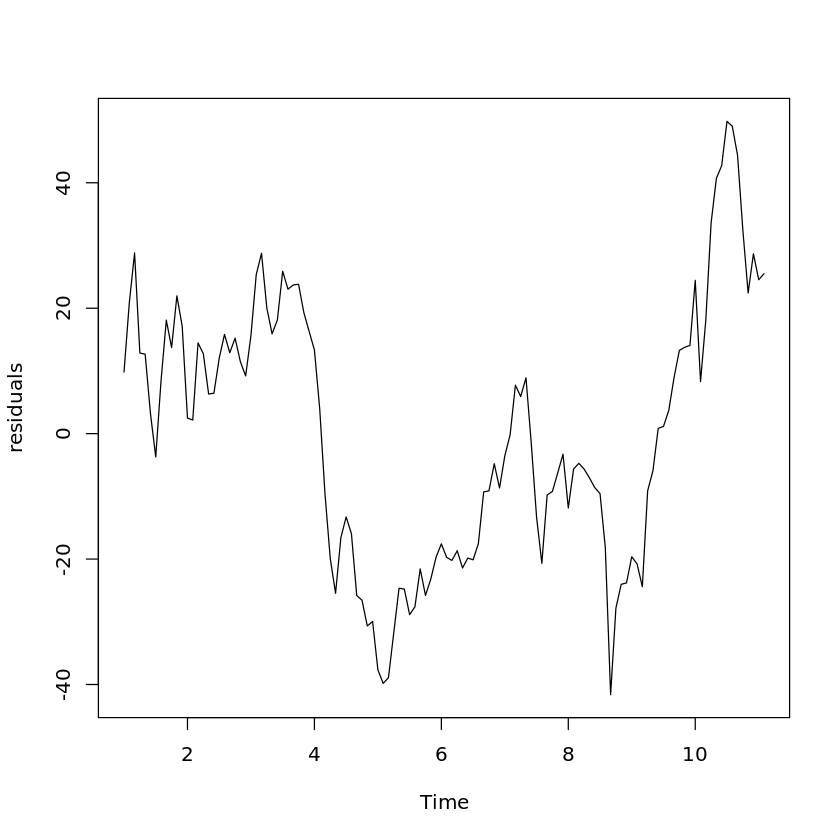

In [ ]:
#Model with trend and seasonality
fit2 <- tslm(close_co.ts~ trend + season)
summary(fit2)

#check the residuals
res2 <- residuals(fit2)

plot(res2, ylab="residuals")
dwtest(fit2)

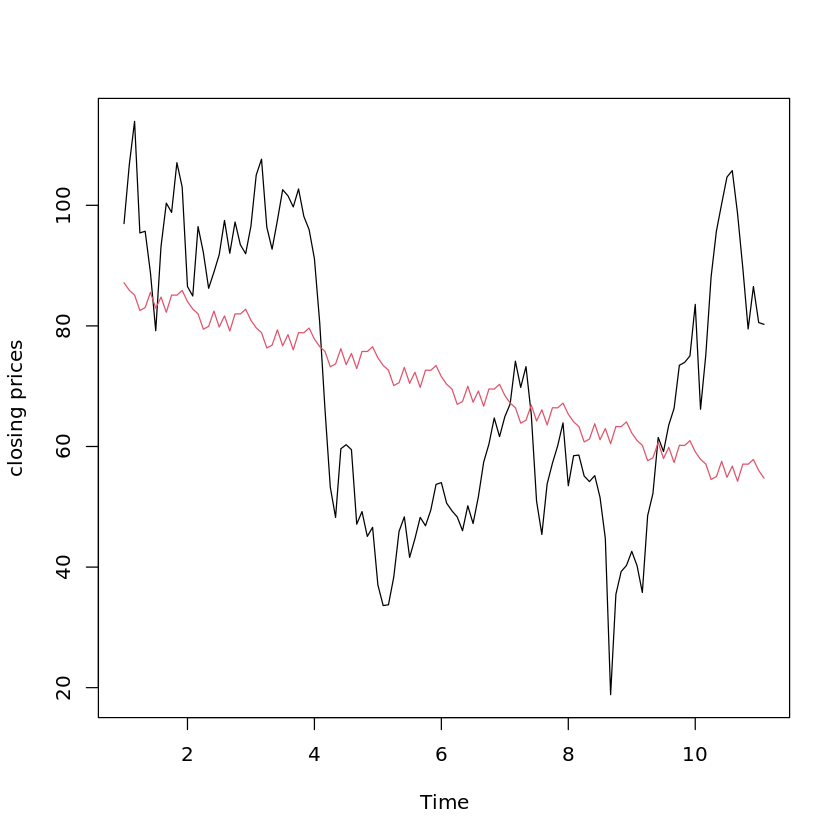

In [ ]:
###plot of the model
plot(close_co.ts, ylab="closing prices", xlab="Time")
lines(fitted(fit2), col=2)

Call: ( Standard Bass Model )

  BM(series = close_cro, display = T)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-126.670  -72.493  -34.009   -4.393   68.549  200.303 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 7.014594e+03 2.708772e+02 6.483684e+03 7.545503e+03 9.42e-40 ***
p 1.483590e-02 3.393703e-04 1.417075e-02 1.550106e-02 4.03e-56 ***
q 1.192332e-02 2.909567e-03 6.220668e-03 1.762596e-02 1.02e-04 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  93.28032  on  77  degrees of freedom
 Multiple R-squared:   0.9993682  Residual squared sum:  688940.4

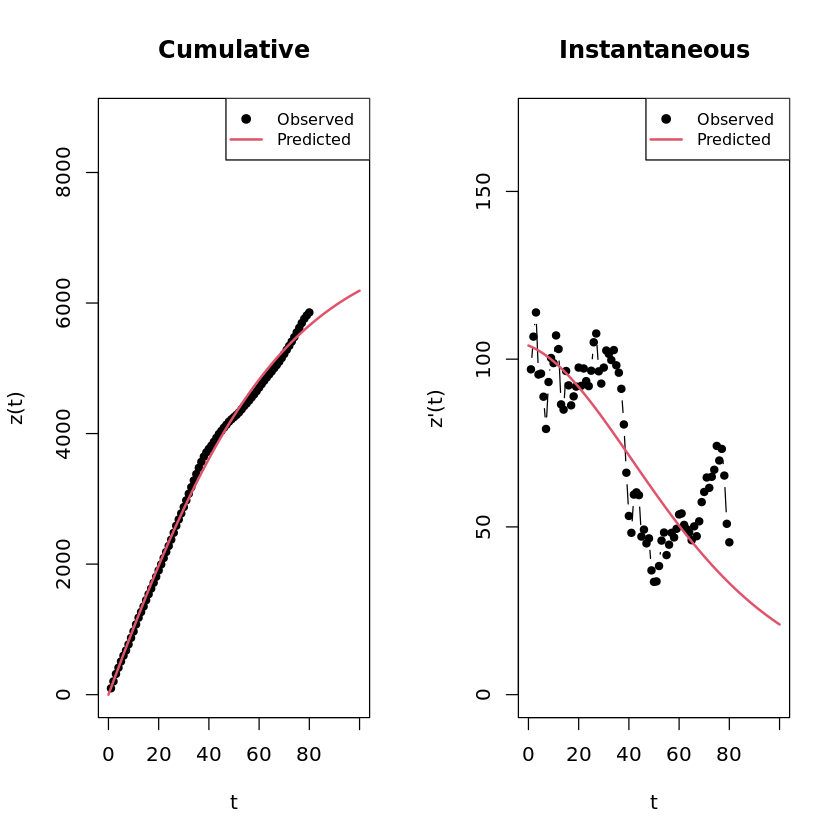

In [ ]:
###we estimate a simple Bass Model 
close_cro<- crudeoil$Close[1:80]
bm<-BM(close_cro,display = T)
summary(bm)

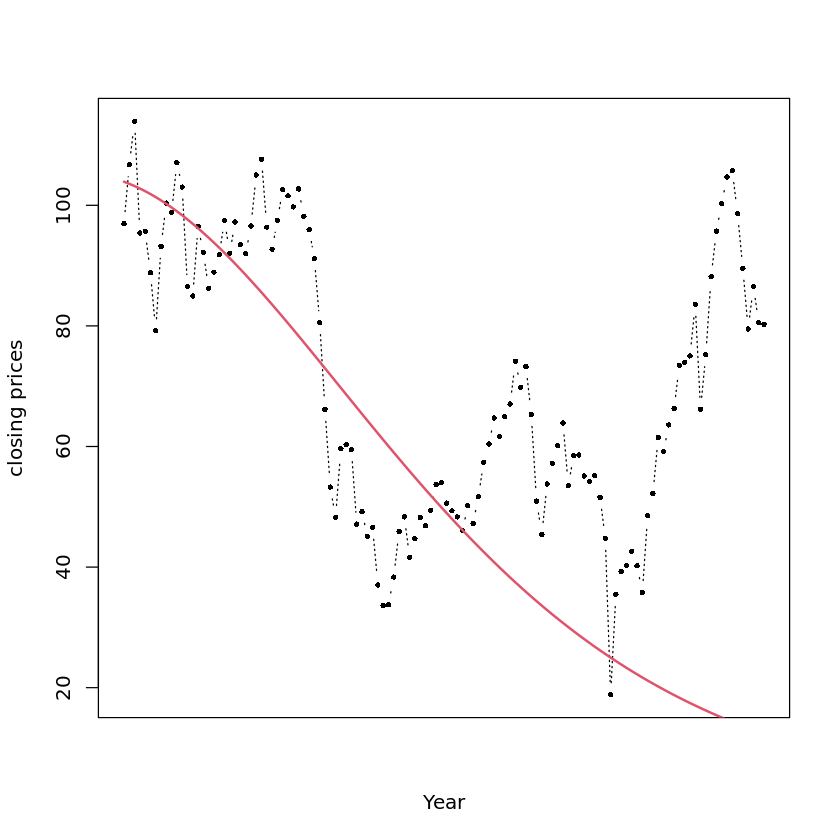

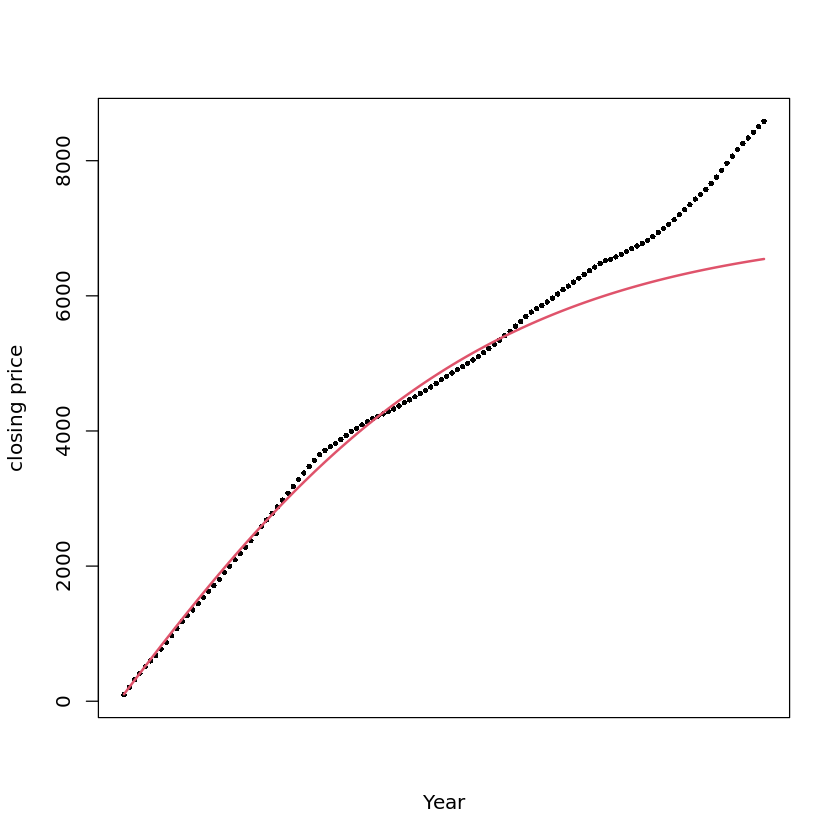

In [ ]:
###prediction (out-of-sample)
pred_bm<- predict((bm), newx=c(1:122))
pred.inst<- make.instantaneous(pred_bm)

###plot of fitted model 
plot(crudeoil$Close, type= "b",xlab="Year", ylab="closing prices",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst, lwd=2, col=2)

plot(cumsum(crudeoil$Close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = close_cro, display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-57.588 -13.940   3.632   2.607  18.096  30.173 

Coefficients:
       Estimate    Std.Error         Lower        Upper p-value  
m 4.106675e+04 2.120083e+05 -3.744620e+05 4.565955e+05   0.847  
p 2.346190e-03 1.227806e-02 -2.171837e-02 2.641075e-02   0.850  
q 2.082122e-03 1.442538e-02 -2.619109e-02 3.035534e-02   0.886  
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  19.47792  on  37  degrees of freedom
 Multiple R-squared:   0.9999202  Residual squared sum:  15068.06

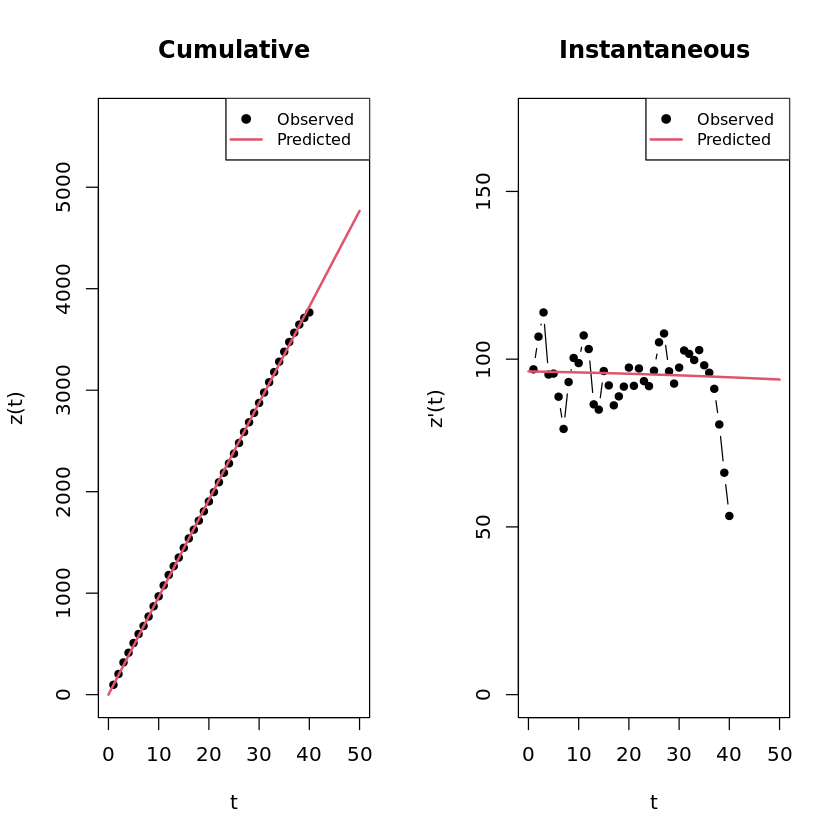

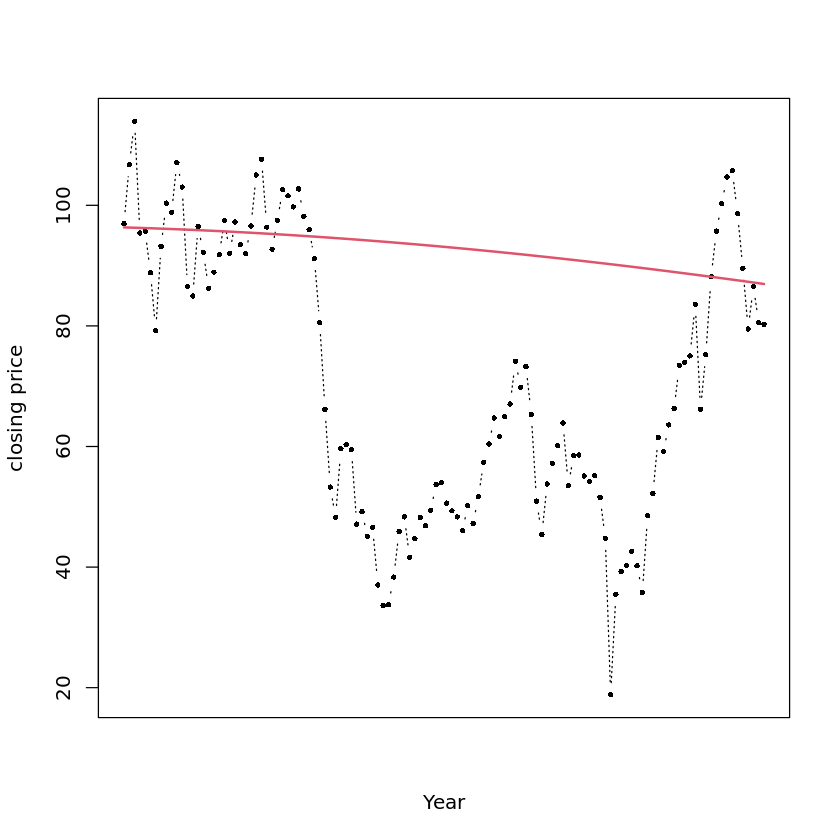

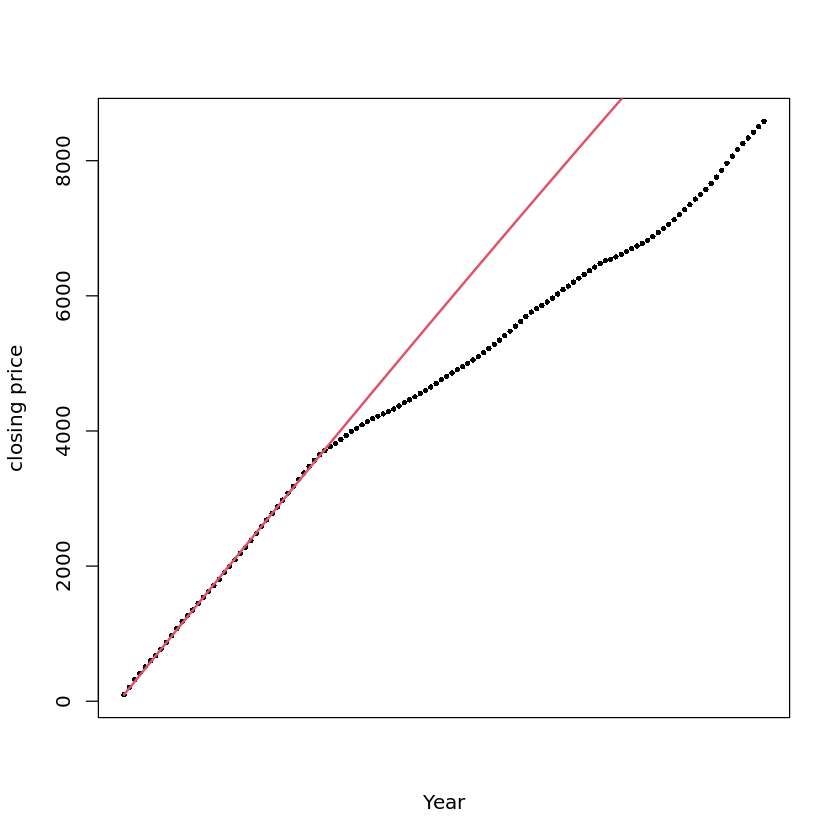

In [ ]:
###we estimate the model with 50% of the data
close_cro<- crudeoil$Close[1:40]
bm_50<-BM(close_cro,display = T)
summary(bm_50)

pred_bm50<- predict(bm_50, newx=c(1:122))
pred.inst50<- make.instantaneous(pred_bm50)

plot(crudeoil$Close, type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst50, lwd=2, col=2)

plot(cumsum(crudeoil$Close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm50, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = close_cro, display = T)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-17.1646  -3.7163   2.3004   0.8284   5.4715  17.9172 

Coefficients:
        Estimate    Std.Error         Lower        Upper p-value  
m  2.193553e+04 4.907292e+05 -9.398760e+05 9.837470e+05   0.965  
p  4.596622e-03 1.042547e-01 -1.997389e-01 2.089321e-01   0.965  
q -1.594583e-03 1.103049e-01 -2.177882e-01 2.145991e-01   0.989  
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  9.513969  on  17  degrees of freedom
 Multiple R-squared:   0.9999243  Residual squared sum:  1733.52

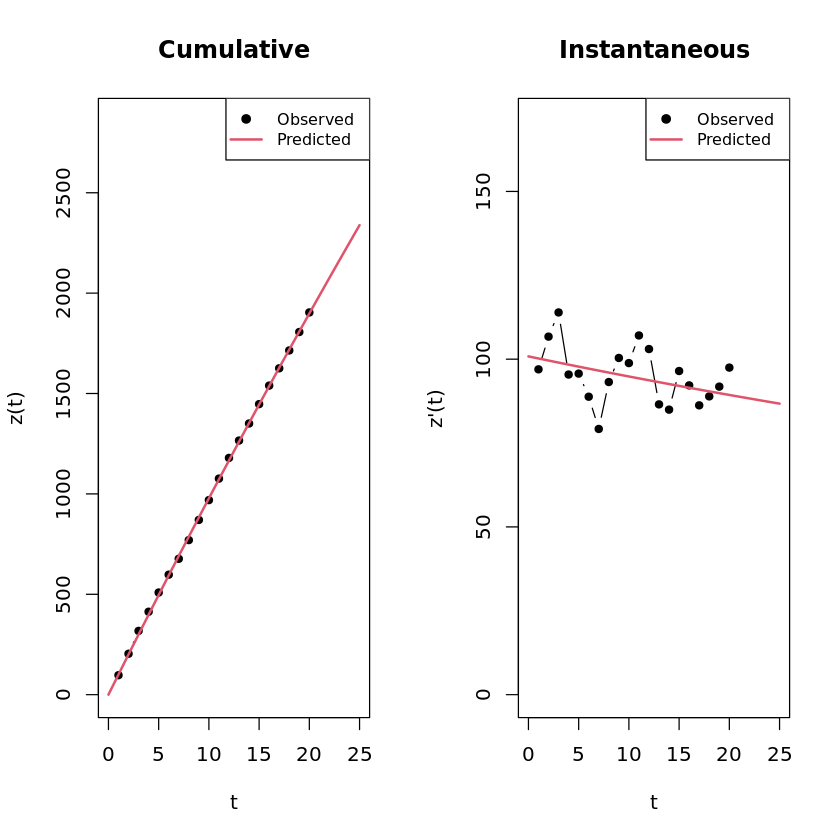

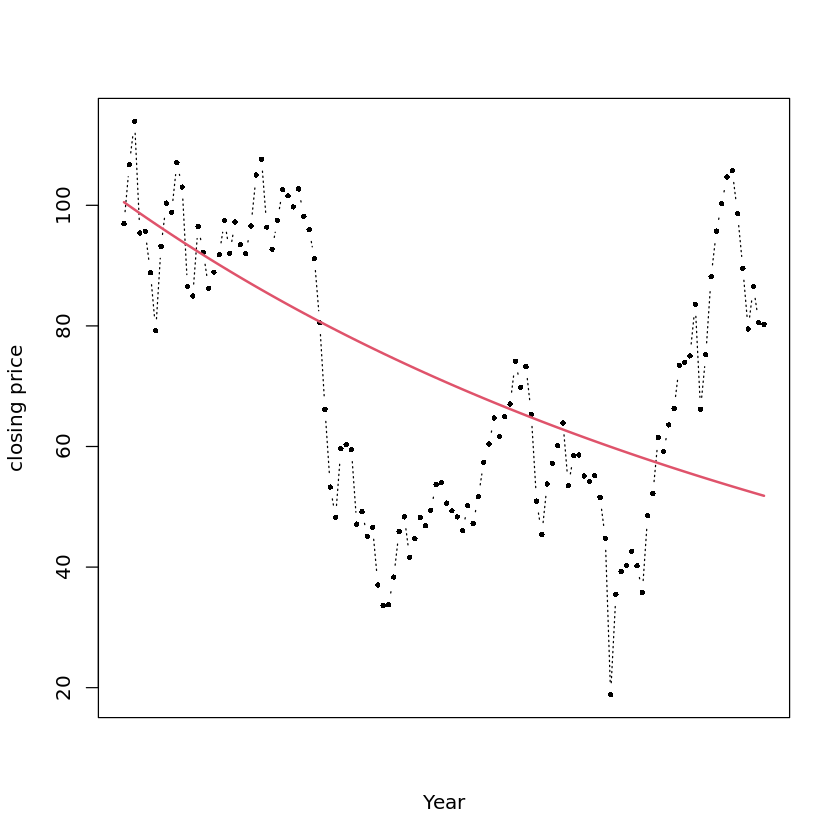

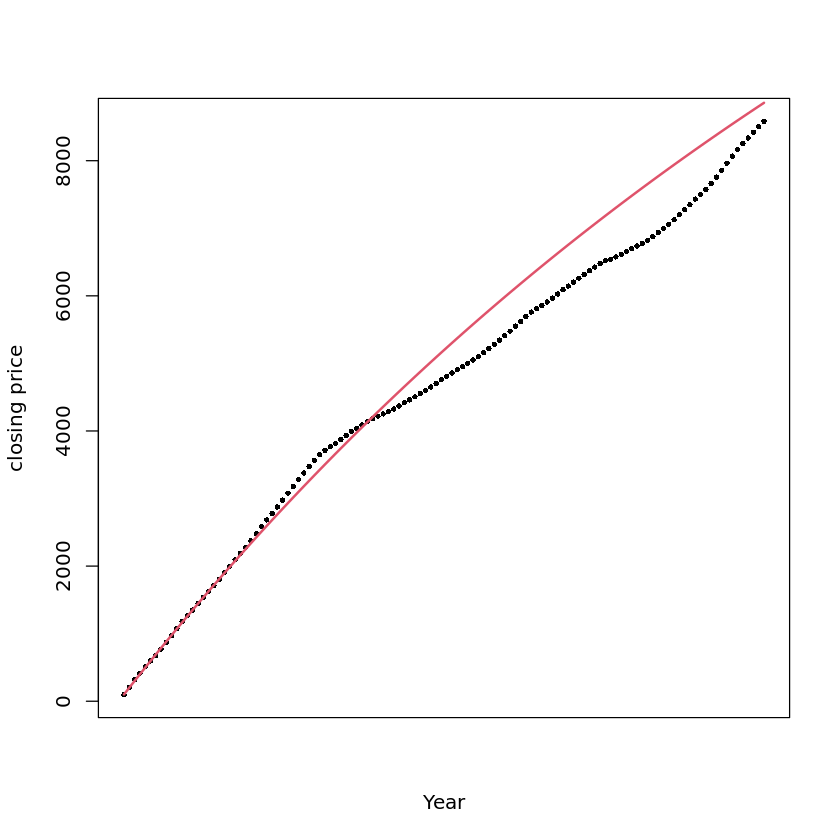

In [ ]:
###we estimate the model with 25% of the data
close_cro<- crudeoil$Close[1:20]
bm_75<-BM(close_cro,display = T)
summary(bm_75)

pred_bm75<- predict(bm_75, newx=c(1:122))
pred.inst75<- make.instantaneous(pred_bm75)

plot(crudeoil$Close, type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst75, lwd=2, col=2)

plot(cumsum(crudeoil$Close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm75, lwd=2, col=2)

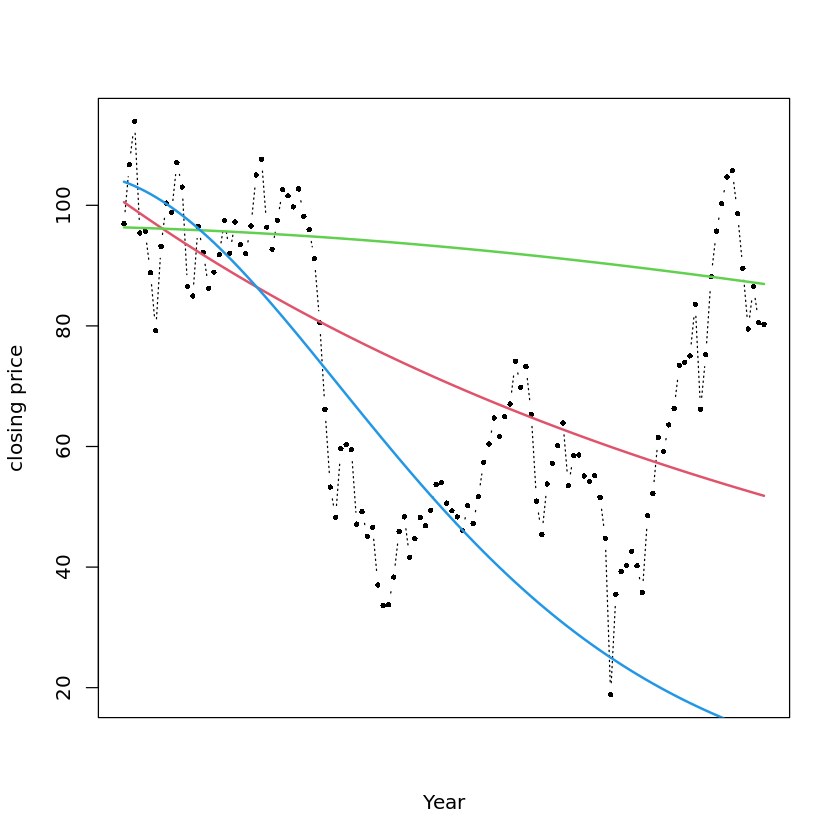

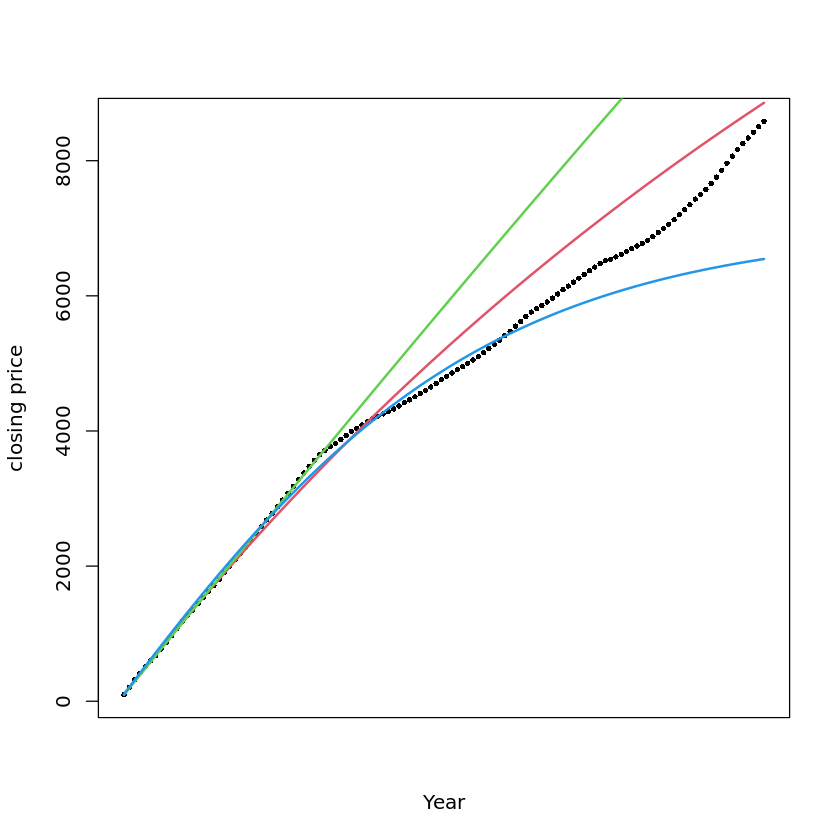

In [ ]:
###Comparison between models (instantaneous)
###instantaneous
plot(crudeoil$Close, type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst75, lwd=2, col=2)
lines(pred.inst50, lwd=2, col=3)
lines(pred.inst, lwd=2, col=4)


###Comparison between models (cumulative)
plot(cumsum(crudeoil$Close), type= "b",xlab="Year", ylab="closing price",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm75, lwd=2, col=2)
lines(pred_bm50, lwd=2, col=3)
lines(pred_bm, lwd=2, col=4)

Call: ( Generalized Bass model with 1  Rectangular  shock )

  GBM(series = crudeoil$Close, shock = "rett", nshock = 1, prelimestimates = c(21935.53, 
    0.004596622, -0.001594583, 26.80155, 40.25409, -0.4421487))

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-89.443 -22.718   5.998   1.500  31.282  78.871 

Coefficients:
           Estimate    Std.Error         Lower         Upper   p-value    
m     3.696453e+04 2.894916e+04 -1.977478e+04  9.370383e+04  2.04e-01    
p     2.579834e-03 1.983719e-03 -1.308183e-03  6.467851e-03  1.96e-01    
q     3.169489e-03 3.337252e-03 -3.371406e-03  9.710383e-03  3.44e-01    
a1    3.700000e+01 5.147080e-01  3.599119e+01  3.800881e+01  4.81e-98 ***
b1    1.077698e+02 6.112127e-01  1.065719e+02  1.089678e+02 8.77e-143 ***
c1   -4.517220e-01 1.088864e-02 -4.730634e-01 -4.303807e-01  2.01e-71 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  42.34934  on  116  degrees of freedom
 Multip

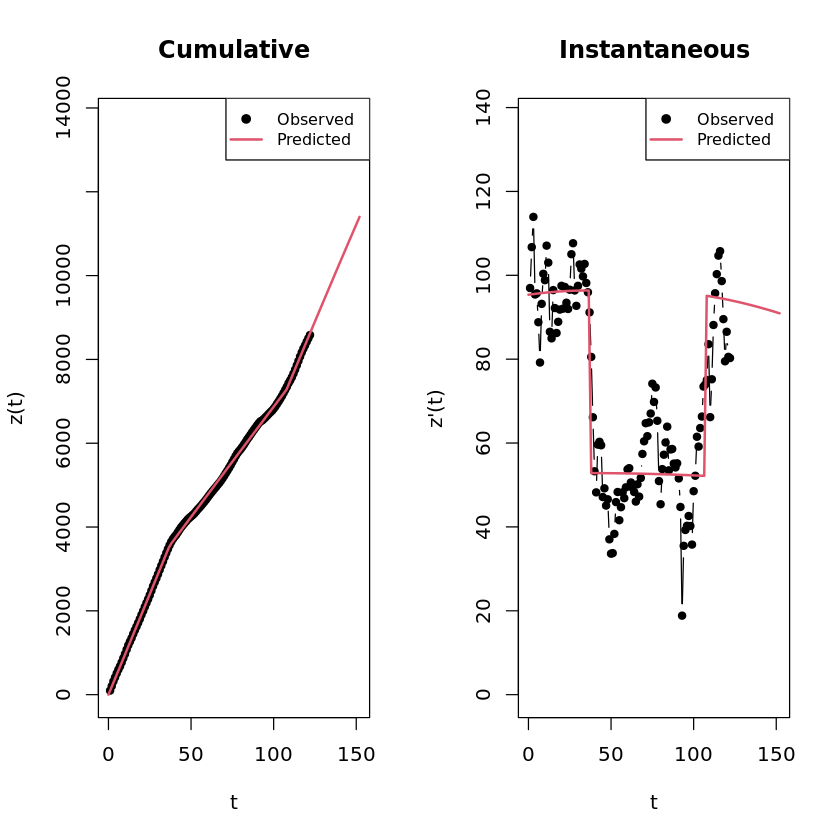

Call: ( Generalized Bass model with 1  Exponential  shock )

  GBM(series = crudeoil$Close, shock = "exp", nshock = 1, prelimestimates = c(21935.53, 
    0.004596622, -0.001594583, 9.675698, 0.03885826, 2.191083))

Residuals:
      Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-135.0459  -58.0136    0.5248    3.9322   66.8720  179.9520 

Coefficients:
           Estimate    Std.Error         Lower         Upper  p-value    
m     5.566088e+04 5.650231e+04 -5.508162e+04  1.664034e+05 3.27e-01    
p     1.533153e-05 1.970171e-05 -2.328312e-05  5.394618e-05 4.38e-01    
q     9.896679e-03 1.578587e-03  6.802705e-03  1.299065e-02 6.41e-09 ***
a1   -3.803129e+00 3.621415e+00 -1.090097e+01  3.294713e+00 2.96e-01    
b1   -7.990088e-02 5.069274e-03 -8.983648e-02 -6.996529e-02 1.30e-30 ***
c1    2.856916e+01 1.118475e+01  6.647450e+00  5.049088e+01 1.19e-02   *
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  78.96222  on  116  degrees of

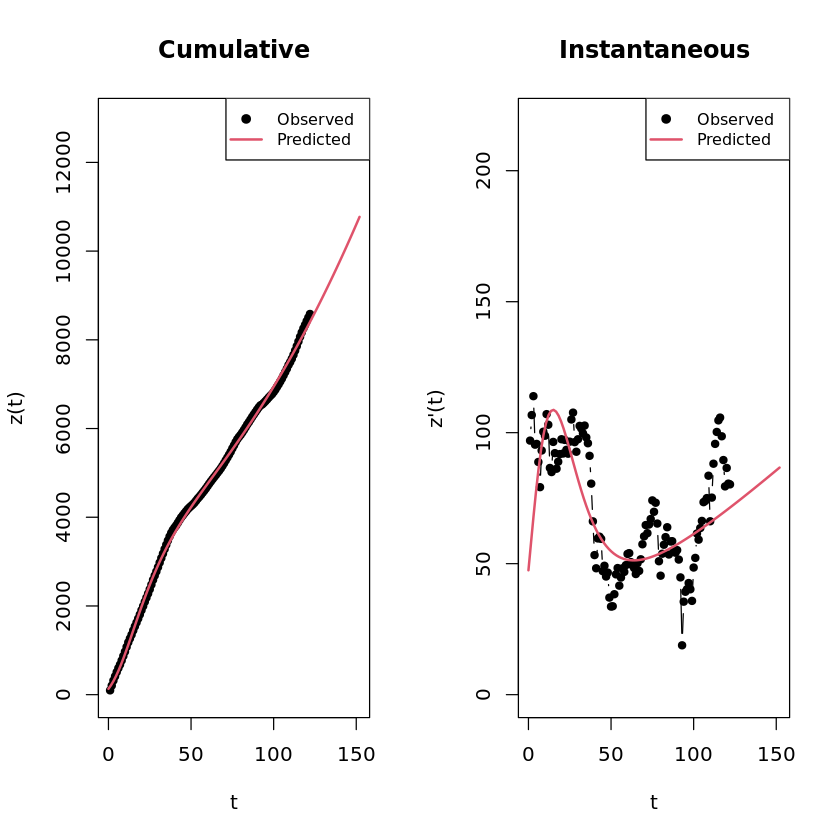

Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”


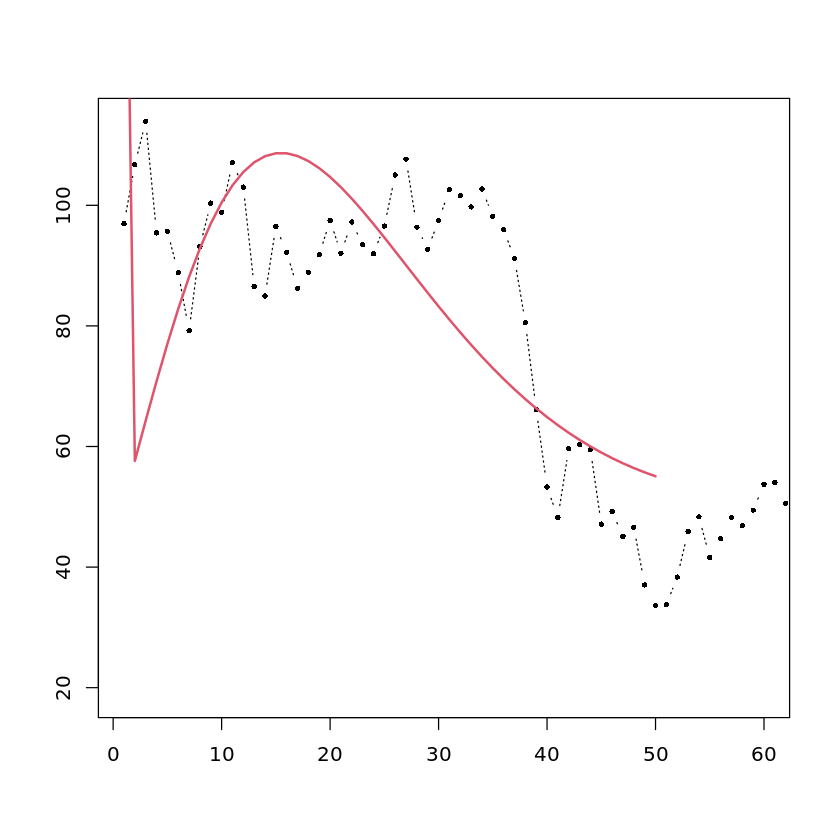

Call: ( Guseo Guidolin Model )

  GGM(series = crudeoil$Close, prelimestimates = c(21935.53, 0.004596622, 
    -0.001594583, 0.00240357, -0.01066601))

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-217.895 -139.816   -3.447   12.049  129.516  570.984 

Coefficients:
           Estimate    Std.Error         Lower        Upper p-value  
K     1.226512e+05 4.498279e+07 -8.804200e+07 8.828730e+07   0.998  
pc    2.932352e-02 2.080363e+01 -4.074504e+01 4.080369e+01   0.999  
qc   -8.994401e-01 1.242571e+01 -2.525338e+01 2.345450e+01   0.942  
ps    4.645721e-03 4.899350e-01 -9.556093e-01 9.649007e-01   0.992  
qs   -4.643236e-03 4.896375e-01 -9.643151e-01 9.550287e-01   0.992  
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  184.9295  on  117  degrees of freedom
 Multiple R-squared:   0.9933149  Residual squared sum:  4155782

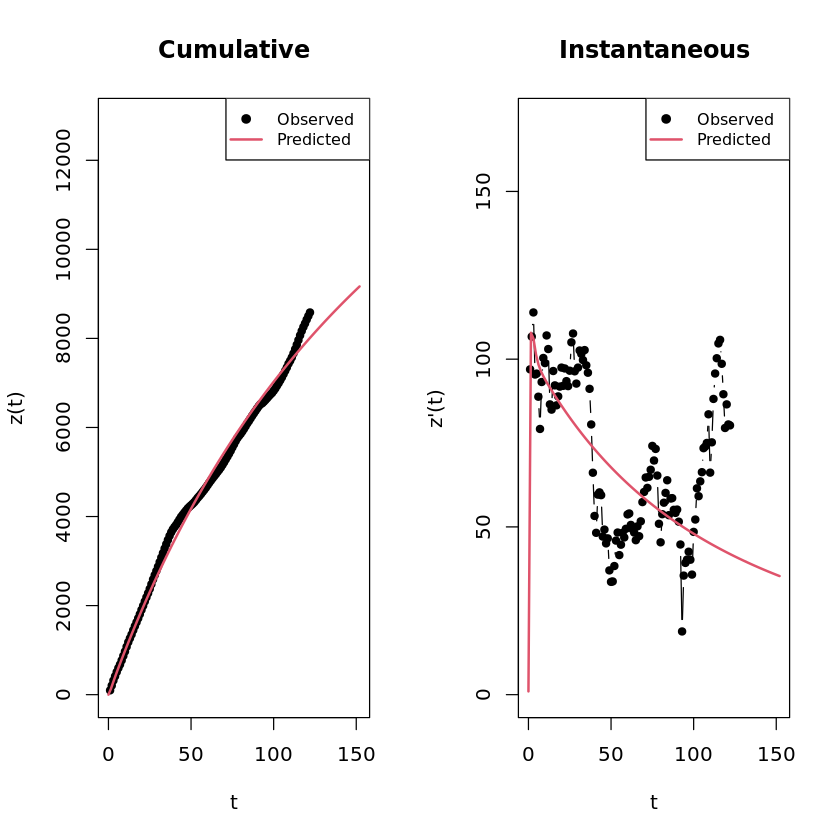

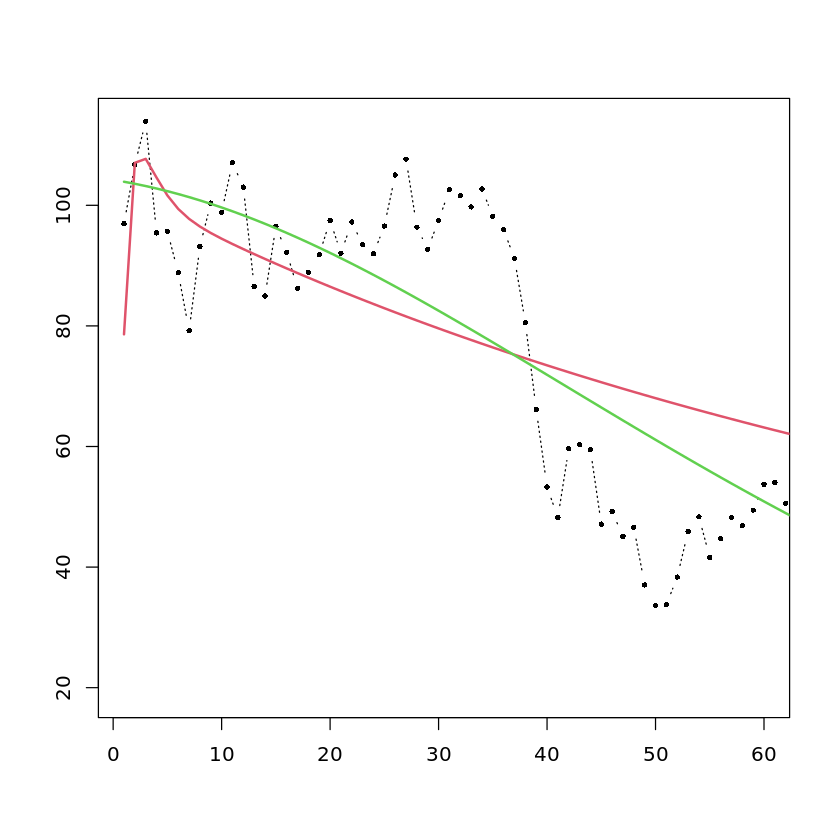

In [ ]:
###GBMr1  
#25% of data
GBMr1<- GBM(crudeoil$Close,shock = "rett",nshock = 1,prelimestimates = c(2.193553e+04,4.596622e-03,-1.594583e-03, 2.680155e+01,4.025409e+01,-4.421487e-01))
summary(GBMr1)

######GBMe1

GBMe1<- GBM(crudeoil$Close,shock = "exp",nshock = 1,prelimestimates = c(2.193553e+04,4.596622e-03,-1.594583e-03, 9.675698e+00,3.885826e-02,2.191083e+00))
summary(GBMe1)

pred_GBMe1<- predict(GBMe1, newx=c(1:50))
pred_GBMe1.inst<- make.instantaneous(pred_GBMe1)

plot(crudeoil$Close, type= "b",xlab="", ylab="",  pch=16, lty=3, cex=0.6, xlim=c(1,60))
lines(pred_GBMe1.inst, lwd=2, col=2)


######GGM 
GGM<- GGM(crudeoil$Close, prelimestimates=c(2.193553e+04,4.596622e-03,-1.594583e-03,2.403570e-03,-1.066601e-02))
summary(GGM)

pred_GGM<- predict(GGM, newx=c(1:122))
pred_GGM.inst<- make.instantaneous(pred_GGM)

plot(crudeoil$Close, type= "b",xlab="", ylab="",  pch=16, lty=3, cex=0.6, xlim=c(1,60))
lines(pred_GGM.inst, lwd=2, col=2)
lines(pred.inst, lwd=2, col=3)


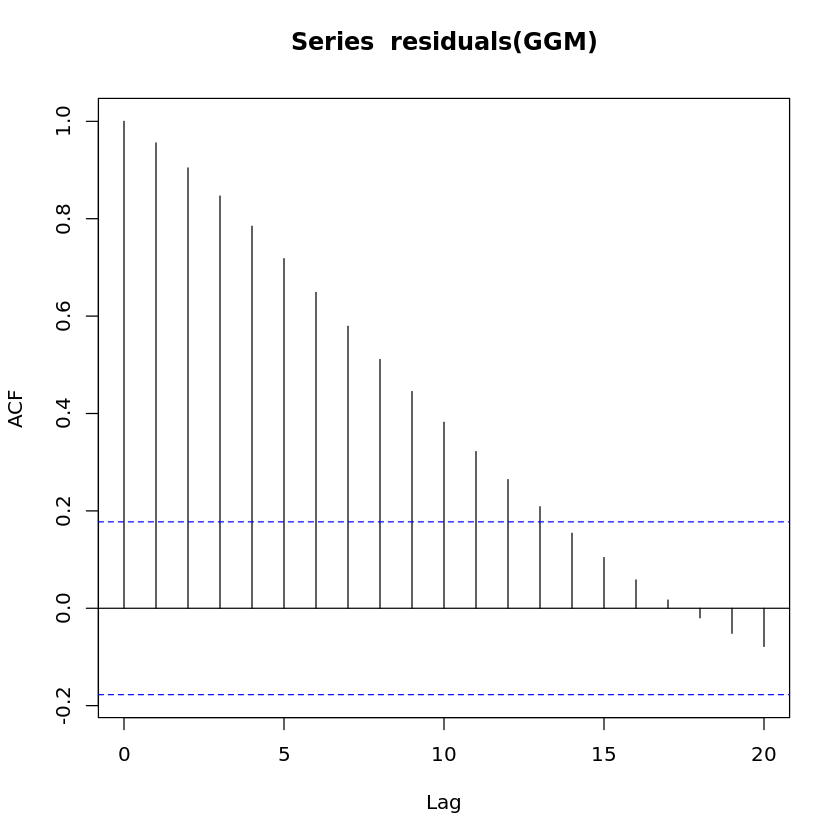

In [ ]:
###Analysis of residuals
res_GGM<- residuals(GGM)
acf<- acf(residuals(GGM))


fit_GGM<- fitted(GGM)
fit_GGM_inst<- make.instantaneous(fit_GGM)

In [ ]:
stock_list <- c("BZ=F")
master_df <- NULL

for (idx in seq(length(stock_list))){
  stock_index = stock_list[idx]
  getSymbols(stock_index, verbose = TRUE, src = "yahoo", return.class="ts",
             from=start_date,to=end_date, periodicity="monthly")
  temp_df = as.data.frame(get(stock_index))
  temp_df$Date = row.names(temp_df)
  temp_df$Index = stock_index
  row.names(temp_df) = NULL
  colnames(temp_df) = c("Open", "High", "Low", "Close", 
                        "Volume", "Adjusted", "Date", "Index")
  temp_df = temp_df[c("Date", "Index", "Open", "High", 
                      "Low", "Close", "Volume", "Adjusted")]
  master_df = rbind(master_df, temp_df)
}
write.csv(master_df,"brentstats.csv", row.names = TRUE)

downloading  BZ=F .....

done.


In [ ]:
brent<- read.csv("brentstats.csv")
brent<- na.omit(brent)
str(brent)

'data.frame':	122 obs. of  9 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Index   : chr  "BZ=F" "BZ=F" "BZ=F" "BZ=F" ...
 $ Open    : num  100 112 118 116 111 ...
 $ High    : num  118 118 127 121 120 ...
 $ Low     : num  97.6 108.1 116.8 102.4 109.9 ...
 $ Close   : num  112 117 126 112 117 ...
 $ Volume  : int  27851 28970 18795 19525 12092 26360 17587 23438 21533 11389 ...
 $ Adjusted: num  112 117 126 112 117 ...


In [ ]:
brent

X   Date Index Open   High   Low    Close  Volume Adjusted
1    1   1   BZ=F  100.49 118.03  97.56 111.80  27851 111.80  
2    2   2   BZ=F  112.37 117.90 108.08 117.36  28970 117.36  
3    3   3   BZ=F  117.79 127.30 116.84 125.89  18795 125.89  
4    4   4   BZ=F  115.97 120.71 102.40 112.48  19525 112.48  
5    5   5   BZ=F  110.58 119.79 109.94 116.74  12092 116.74  
6    6   6   BZ=F  118.09 119.95  99.06 114.85  26360 114.85  
7    7   7   BZ=F  114.08 116.49 101.83 102.76  17587 102.76  
8    8   8   BZ=F  101.85 114.74  99.38 109.56  23438 109.56  
9    9   9   BZ=F  109.25 116.43 106.86 110.82  21533 110.82  
10  10  10   BZ=F  109.68 111.46 102.83 107.38  11389 107.38  
11  11  11   BZ=F  112.32 125.55 111.29 122.66  19706 122.66  
12  12  12   BZ=F  123.46 128.25 121.43 122.88  16066 122.88  
13  13  13   BZ=F  119.00 119.96 101.32 101.87  30755 101.87  
14  14  14   BZ=F   99.53 102.29  89.04  97.80  24672  97.80  
15  15  15   BZ=F  105.64 116.90 105.31 114.57  51785 114.57  
16  16  16   BZ=F  115.80 117.00 107.66 112.39  20305 112.39  
17  17  17   BZ=F  111.72 115.91 106.93 108.70  14189 108.70  
18  18  18   BZ=F  108.29 111.64 105.06 111.23  12207 111.23  
19  19  19   BZ=F  111.42 112.32 106.70 111.11  14792 111.11  
20  20  20   BZ=F  111.94 115.73 109.70 115.55  53584 115.55  
21  21  21   BZ=F  115.87 119.15 110.87 111.38  67751 111.38  
22  22  22   BZ=F  110.56 111.81 107.01 110.02  60668 110.02  
23  23  23   BZ=F  109.68 111.78  97.55 102.37  94354 102.37  
24  24  24   BZ=F  100.80 105.93  98.76 100.39 104092 100.39  
25  25  25   BZ=F  101.06 106.53  99.72 102.16 107914 102.16  
26  26  26   BZ=F  102.72 109.40 102.52 107.70 116013 107.70  
27  27  27   BZ=F  109.20 117.02 105.85 114.01 122873 114.01  
28  28  28   BZ=F  108.35 111.98 106.28 108.84 140426 108.84  
29  29  29   BZ=F  109.18 111.66 103.00 109.69 124853 109.69  
30  30  30   BZ=F  110.80 111.32 105.83 106.40 100915 106.40  
⋮   ⋮   ⋮    ⋮     ⋮      ⋮      ⋮      ⋮      ⋮      ⋮       
93   93  93  BZ=F   22.76  36.43  16.00  25.27 818304  25.27  
94   94  94  BZ=F   25.29  36.98  25.29  35.33 528396  35.33  
95   95  95  BZ=F   35.32  43.93  35.32  41.15 581247  41.15  
96   96  96  BZ=F   41.13  44.88  41.13  43.30 443021  43.30  
97   97  97  BZ=F   43.26  46.24  43.24  45.10 405942  45.10  
98   98  98  BZ=F   45.85  46.04  39.28  40.95 483298  40.95  
99   99  99  BZ=F   40.96  43.60  36.68  37.46 609695  37.46  
100 100 100  BZ=F   47.61  52.47  46.77  51.34 528154  51.34  
101 101 101  BZ=F   51.66  57.42  50.58  55.88 586185  55.88  
102 102 102  BZ=F   55.88  67.70  55.88  66.13 611358  66.13  
103 103 103  BZ=F   65.95  71.36  60.26  63.54 774197  63.54  
104 104 104  BZ=F   63.60  68.95  61.24  67.25 703921  67.25  
105 105 105  BZ=F   67.29  70.26  64.56  69.63 547723  69.63  
106 106 106  BZ=F   69.63  76.59  69.63  75.13 669981  75.13  
107 107 107  BZ=F   74.70  77.83  67.42  76.33 775897  76.33  
108 108 108  BZ=F   71.70  80.74  70.41  78.52 590970  78.52  
109 109 109  BZ=F   78.41  86.72  77.57  84.38 821979  84.38  
110 110 110  BZ=F   83.73  85.50  70.22  70.57 832636  70.57  
111 111 111  BZ=F   70.14  80.16  65.77  79.20 646880  79.20  
112 112 112  BZ=F   77.94  91.69  77.04  91.21 619239  91.21  
113 113 113  BZ=F   91.29 105.75  88.01 100.99 732123 100.99  
114 114 114  BZ=F  100.85 137.00  96.95 107.91 531264 107.91  
115 115 115  BZ=F  107.67 114.82  97.62 109.34 311730 109.34  
116 116 116  BZ=F  116.63 125.18 107.03 114.81 447644 114.81  
117 117 117  BZ=F  109.46 114.69  94.50 110.01 430112 110.01  
118 118 118  BZ=F  103.87 105.48  91.52  96.49 465973  96.49  
119 119 119  BZ=F   94.78  96.99  83.63  87.96 470730  87.96  
120 120 120  BZ=F   86.51  98.76  86.51  94.83 619846  94.83  
121 121 121  BZ=F   92.80  99.56  80.64  85.43 526954  85.43  
122 122 122  BZ=F   86.60  89.41  75.11  85.91 448938  85.91

In [ ]:
vol_br <- brent$Volume
vol_br
vol_br.ts <- ts(vol_br, frequency= 12)
vol_br.ts

[1]   27851   28970   18795   19525   12092   26360   17587   23438   21533
 [10]   11389   19706   16066   30755   24672   51785   20305   14189   12207
 [19]   14792   53584   67751   60668   94354  104092  107914  116013  122873
 [28]  140426  124853  100915   86747  114706  119769  155344  232563  208115
 [37]  267960  385099  305879  332585  576923  427435  415701  466769  657400
 [46]  635057  497093  482401  596999  725957  683434  574821  605361  543857
 [55]  493196  566263  505286  575861  806223  656427  555947  692804  546946
 [64]  769381  657977  459431  719378  477658  558759  472859  465261  567268
 [73]  645241  654964  684888  402979  457907  781961  738706  649077  684409
 [82]  559896  695425  823195 1047307  896145  718062  806410  808581  572198
 [91]  850898  725258  818304  528396  581247  443021  405942  483298  609695
[100]  528154  586185  611358  774197  703921  547723  669981  775897  590970
[109]  821979  832636  646880  619239  732123  531264  311730  447644  430112
[118]  465973  470730  619846  526954  448938

Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep    
1    27851   28970   18795   19525   12092   26360   17587   23438   21533
2    30755   24672   51785   20305   14189   12207   14792   53584   67751
3   107914  116013  122873  140426  124853  100915   86747  114706  119769
4   267960  385099  305879  332585  576923  427435  415701  466769  657400
5   596999  725957  683434  574821  605361  543857  493196  566263  505286
6   555947  692804  546946  769381  657977  459431  719378  477658  558759
7   645241  654964  684888  402979  457907  781961  738706  649077  684409
8  1047307  896145  718062  806410  808581  572198  850898  725258  818304
9   405942  483298  609695  528154  586185  611358  774197  703921  547723
10  821979  832636  646880  619239  732123  531264  311730  447644  430112
11  526954  448938                                                        
   Oct     Nov     Dec    
1    11389   19706   16066
2    60668   94354  104092
3   155344  232563  208115
4   635057  497093  482401
5   575861  806223  656427
6   472859  465261  567268
7   559896  695425  823195
8   528396  581247  443021
9   669981  775897  590970
10  465973  470730  619846
11

In [ ]:
close_br <- brent$Close
close_br
close_br.ts <- ts(close_br, frequency= 12)
close_br.ts

[1] 111.80 117.36 125.89 112.48 116.74 114.85 102.76 109.56 110.82 107.38
 [11] 122.66 122.88 101.87  97.80 114.57 112.39 108.70 111.23 111.11 115.55
 [21] 111.38 110.02 102.37 100.39 102.16 107.70 114.01 108.84 109.69 106.40
 [31] 109.07 107.76 108.07 109.41 106.02 103.19  94.67  85.86  70.15  57.33
 [41]  52.99  66.78  65.56  63.59  52.21  54.15  48.37  49.56  37.28  34.74
 [51]  35.97  39.60  48.13  49.68  42.46  47.04  49.06  48.30  50.47  56.13
 [61]  55.59  52.83  51.73  50.31  47.92  52.65  52.38  57.54  63.57  66.60
 [71]  69.05  65.78  70.27  77.59  79.44  77.42  82.72  75.47  58.71  52.28
 [81]  61.89  66.03  68.39  72.80  64.49  66.55  65.17  60.43  60.23  62.43
 [91]  58.16  50.52  25.27  35.33  41.15  43.30  45.10  40.95  37.46  51.34
[101]  55.88  66.13  63.54  67.25  69.63  75.13  76.33  78.52  84.38  70.57
[111]  79.20  91.21 100.99 107.91 109.34 114.81 110.01  96.49  87.96  94.83
[121]  85.43  85.91

Qtr1   Qtr2   Qtr3   Qtr4  
1  111.80 117.36 125.89 112.48
2  116.74 114.85 102.76 109.56
3  110.82 107.38 122.66 122.88
4  101.87  97.80 114.57 112.39
5  108.70 111.23 111.11 115.55
6  111.38 110.02 102.37 100.39
7  102.16 107.70 114.01 108.84
8  109.69 106.40 109.07 107.76
9  108.07 109.41 106.02 103.19
10  94.67  85.86  70.15  57.33
11  52.99  66.78  65.56  63.59
12  52.21  54.15  48.37  49.56
13  37.28  34.74  35.97  39.60
14  48.13  49.68  42.46  47.04
15  49.06  48.30  50.47  56.13
16  55.59  52.83  51.73  50.31
17  47.92  52.65  52.38  57.54
18  63.57  66.60  69.05  65.78
19  70.27  77.59  79.44  77.42
20  82.72  75.47  58.71  52.28
21  61.89  66.03  68.39  72.80
22  64.49  66.55  65.17  60.43
23  60.23  62.43  58.16  50.52
24  25.27  35.33  41.15  43.30
25  45.10  40.95  37.46  51.34
26  55.88  66.13  63.54  67.25
27  69.63  75.13  76.33  78.52
28  84.38  70.57  79.20  91.21
29 100.99 107.91 109.34 114.81
30 110.01  96.49  87.96  94.83
31  85.43  85.91

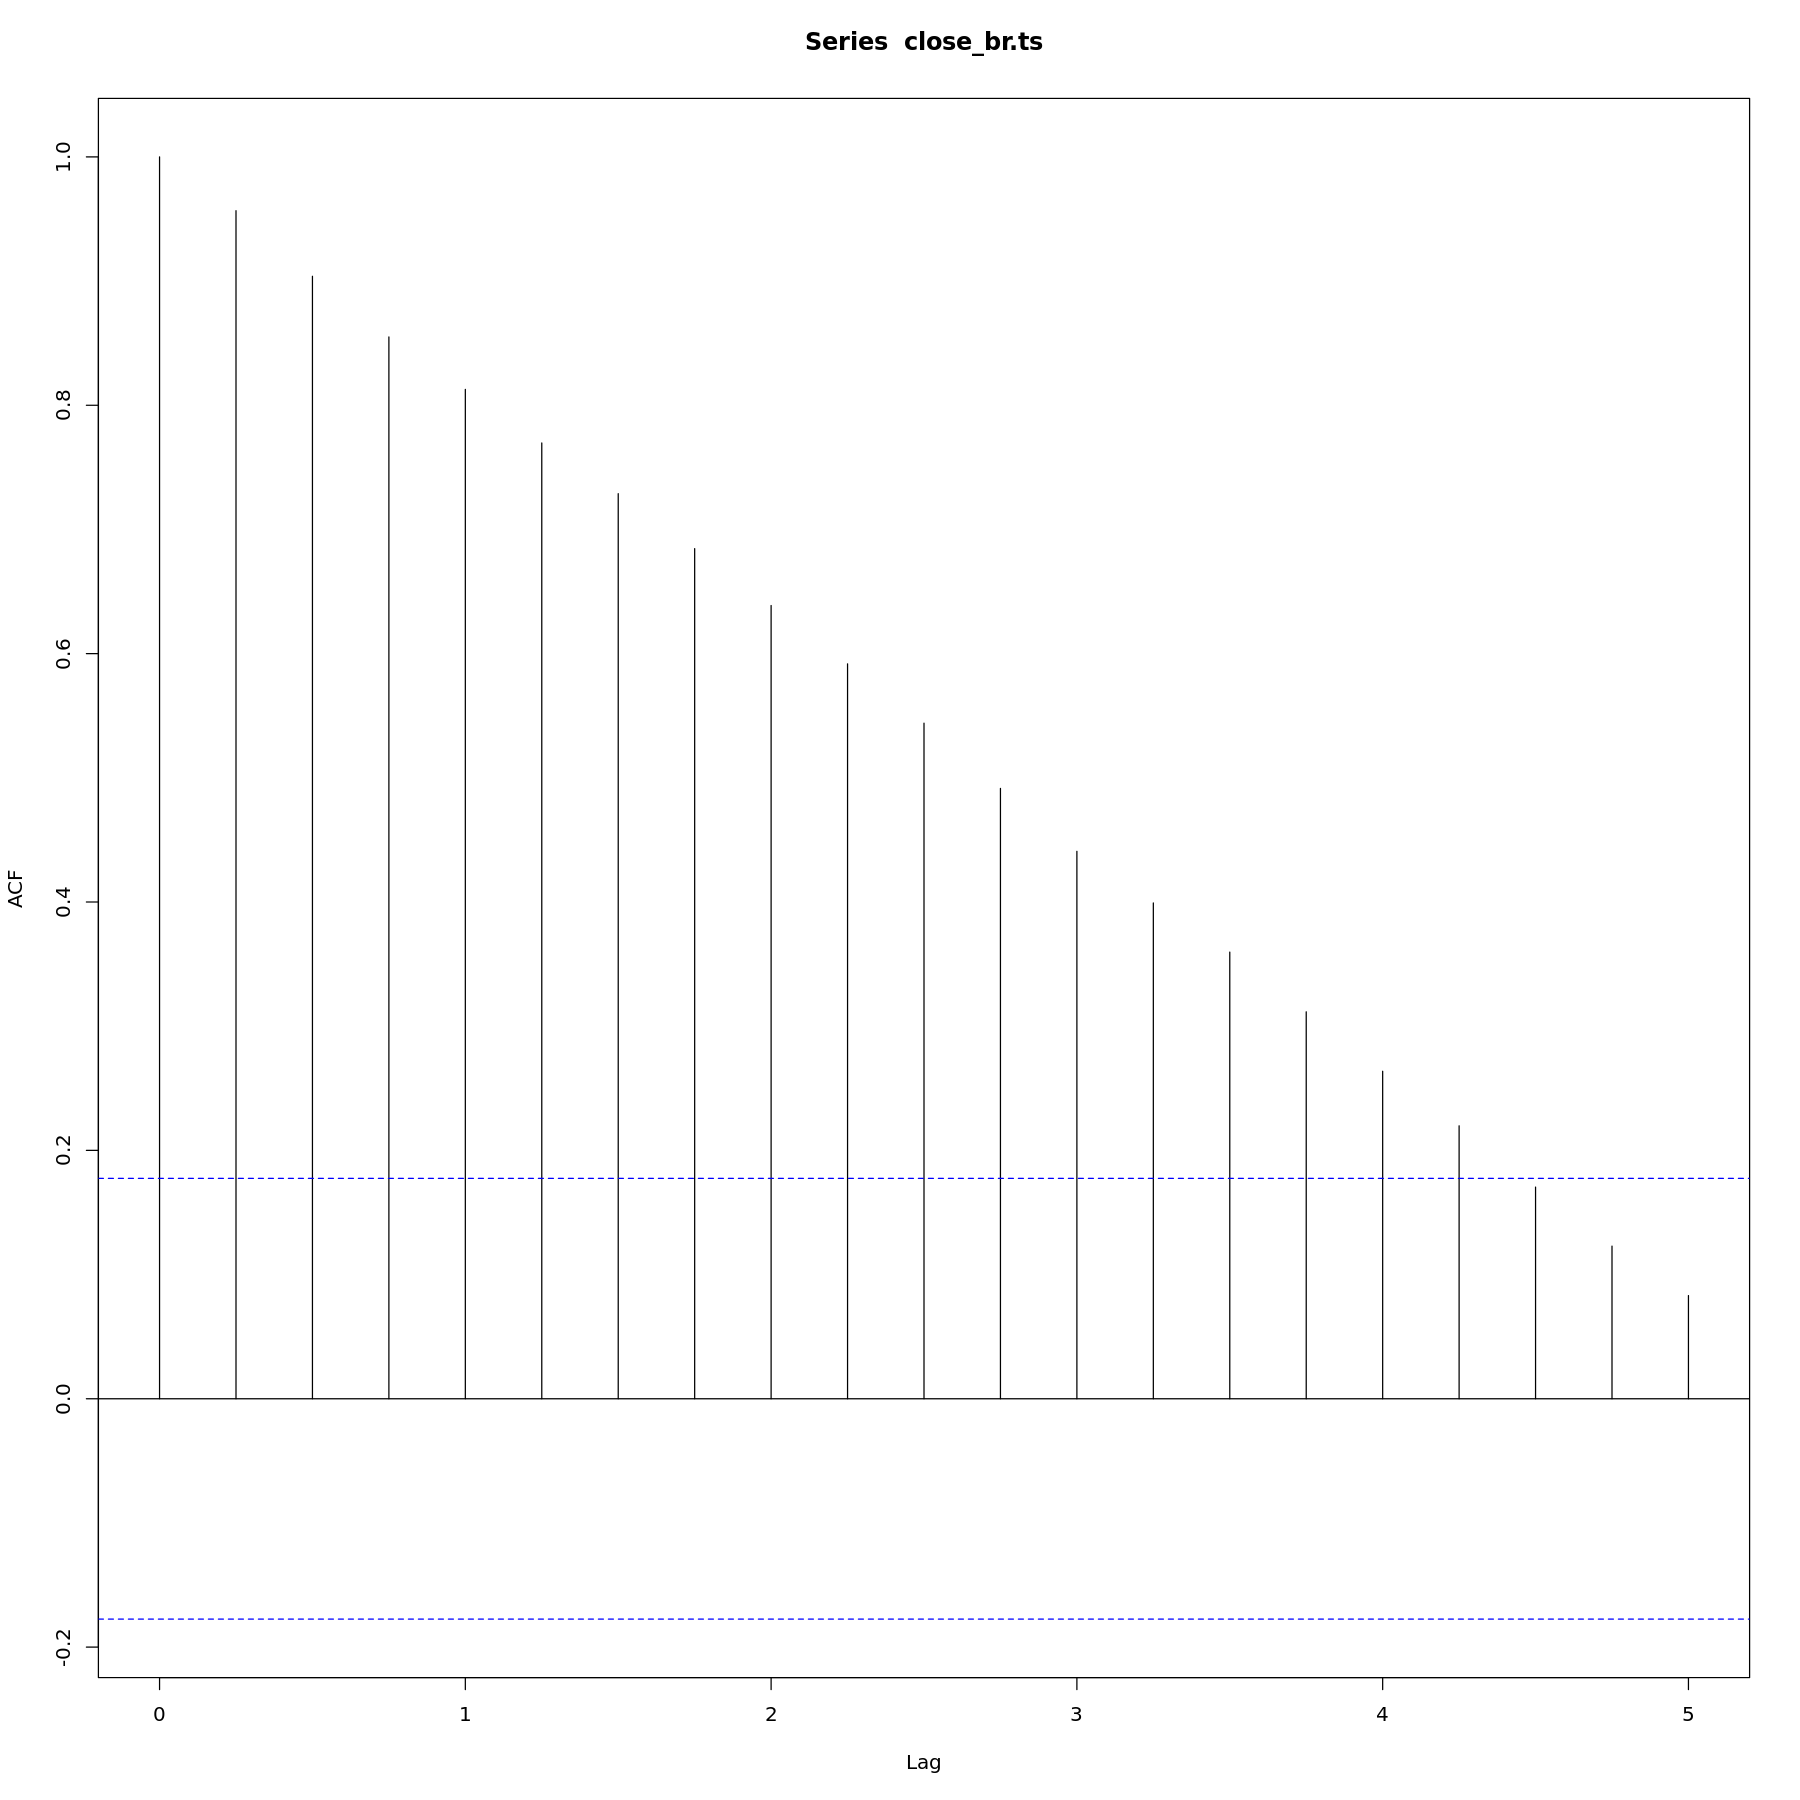

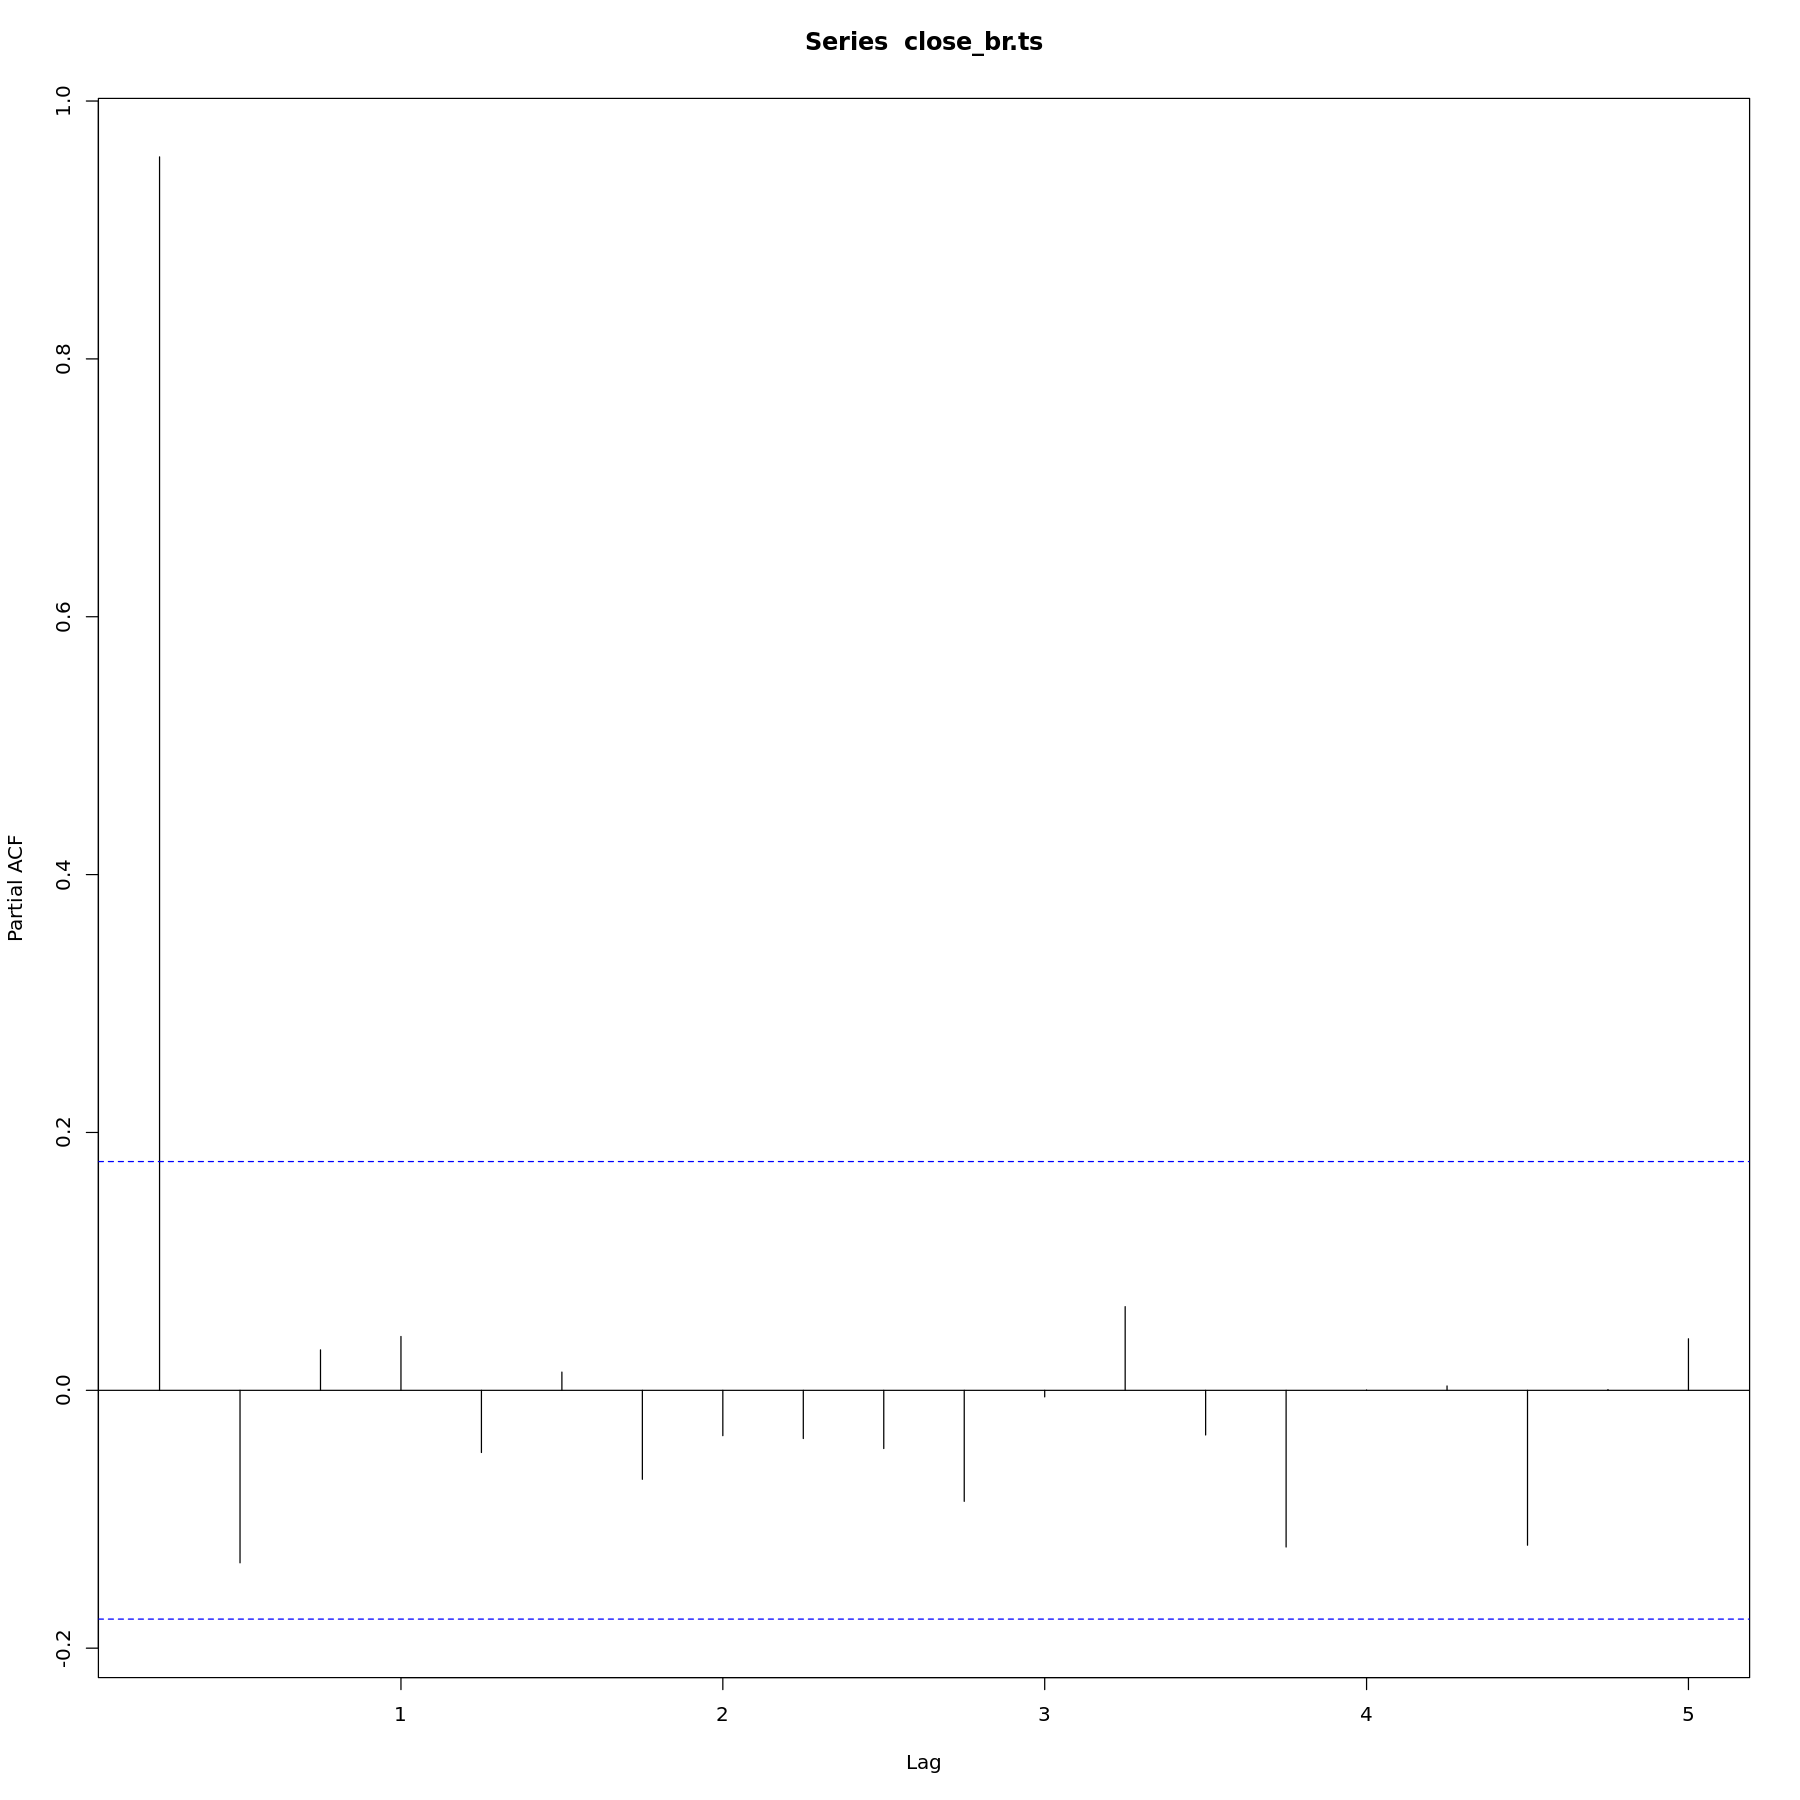

In [ ]:
acf(close_br.ts)
pacf(close_br.ts)

In [ ]:
brent1<- window(close_br.ts, start=4, end=11 +.9)
brent1

Qtr1   Qtr2   Qtr3   Qtr4  
4  101.87  97.80 114.57 112.39
5  108.70 111.23 111.11 115.55
6  111.38 110.02 102.37 100.39
7  102.16 107.70 114.01 108.84
8  109.69 106.40 109.07 107.76
9  108.07 109.41 106.02 103.19
10  94.67  85.86  70.15  57.33
11  52.99  66.78  65.56  63.59


Call:
tslm(formula = brent1 ~ trend + season)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.6068  -7.1234   0.7057  10.7569  18.6219 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 120.2210     6.2649  19.190  < 2e-16 ***
trend        -1.4353     0.2645  -5.426 9.71e-06 ***
season2       2.1441     6.8619   0.312    0.757    
season3       3.2869     6.8771   0.478    0.637    
season4       1.7447     6.9025   0.253    0.802    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.71 on 27 degrees of freedom
Multiple R-squared:  0.5241,	Adjusted R-squared:  0.4536 
F-statistic: 7.433 on 4 and 27 DF,  p-value: 0.000358


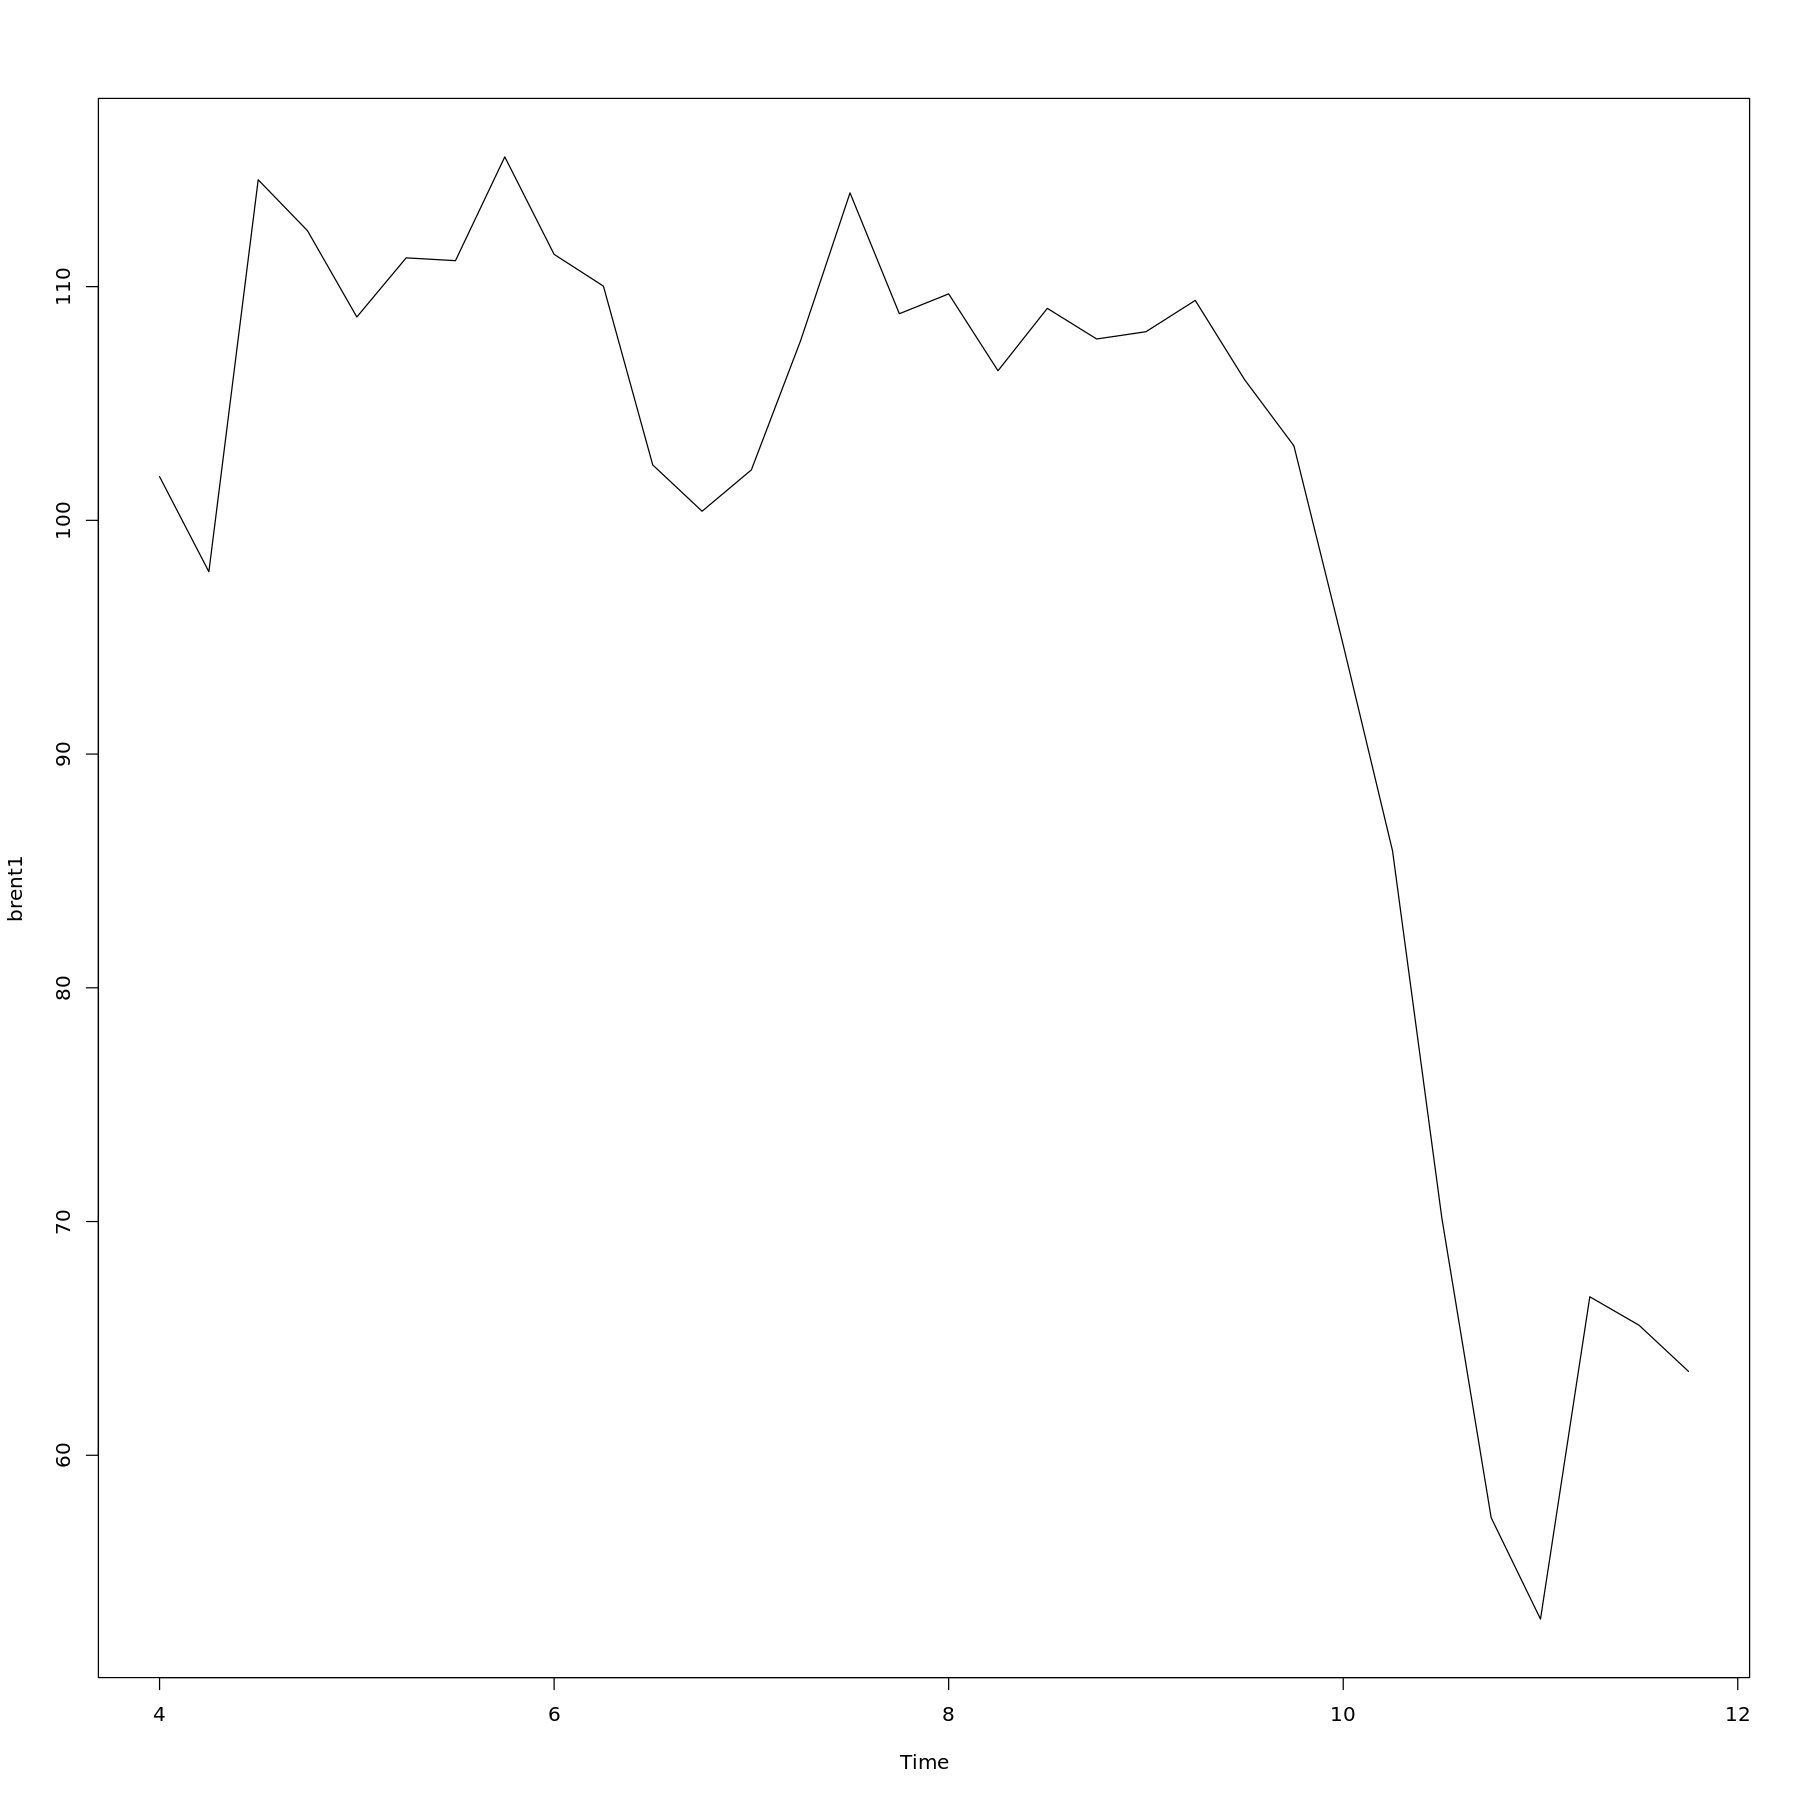

In [ ]:
plot(brent1)
m1<- tslm(brent1~ trend+ season)
summary(m1)
fit<- fitted(m1)

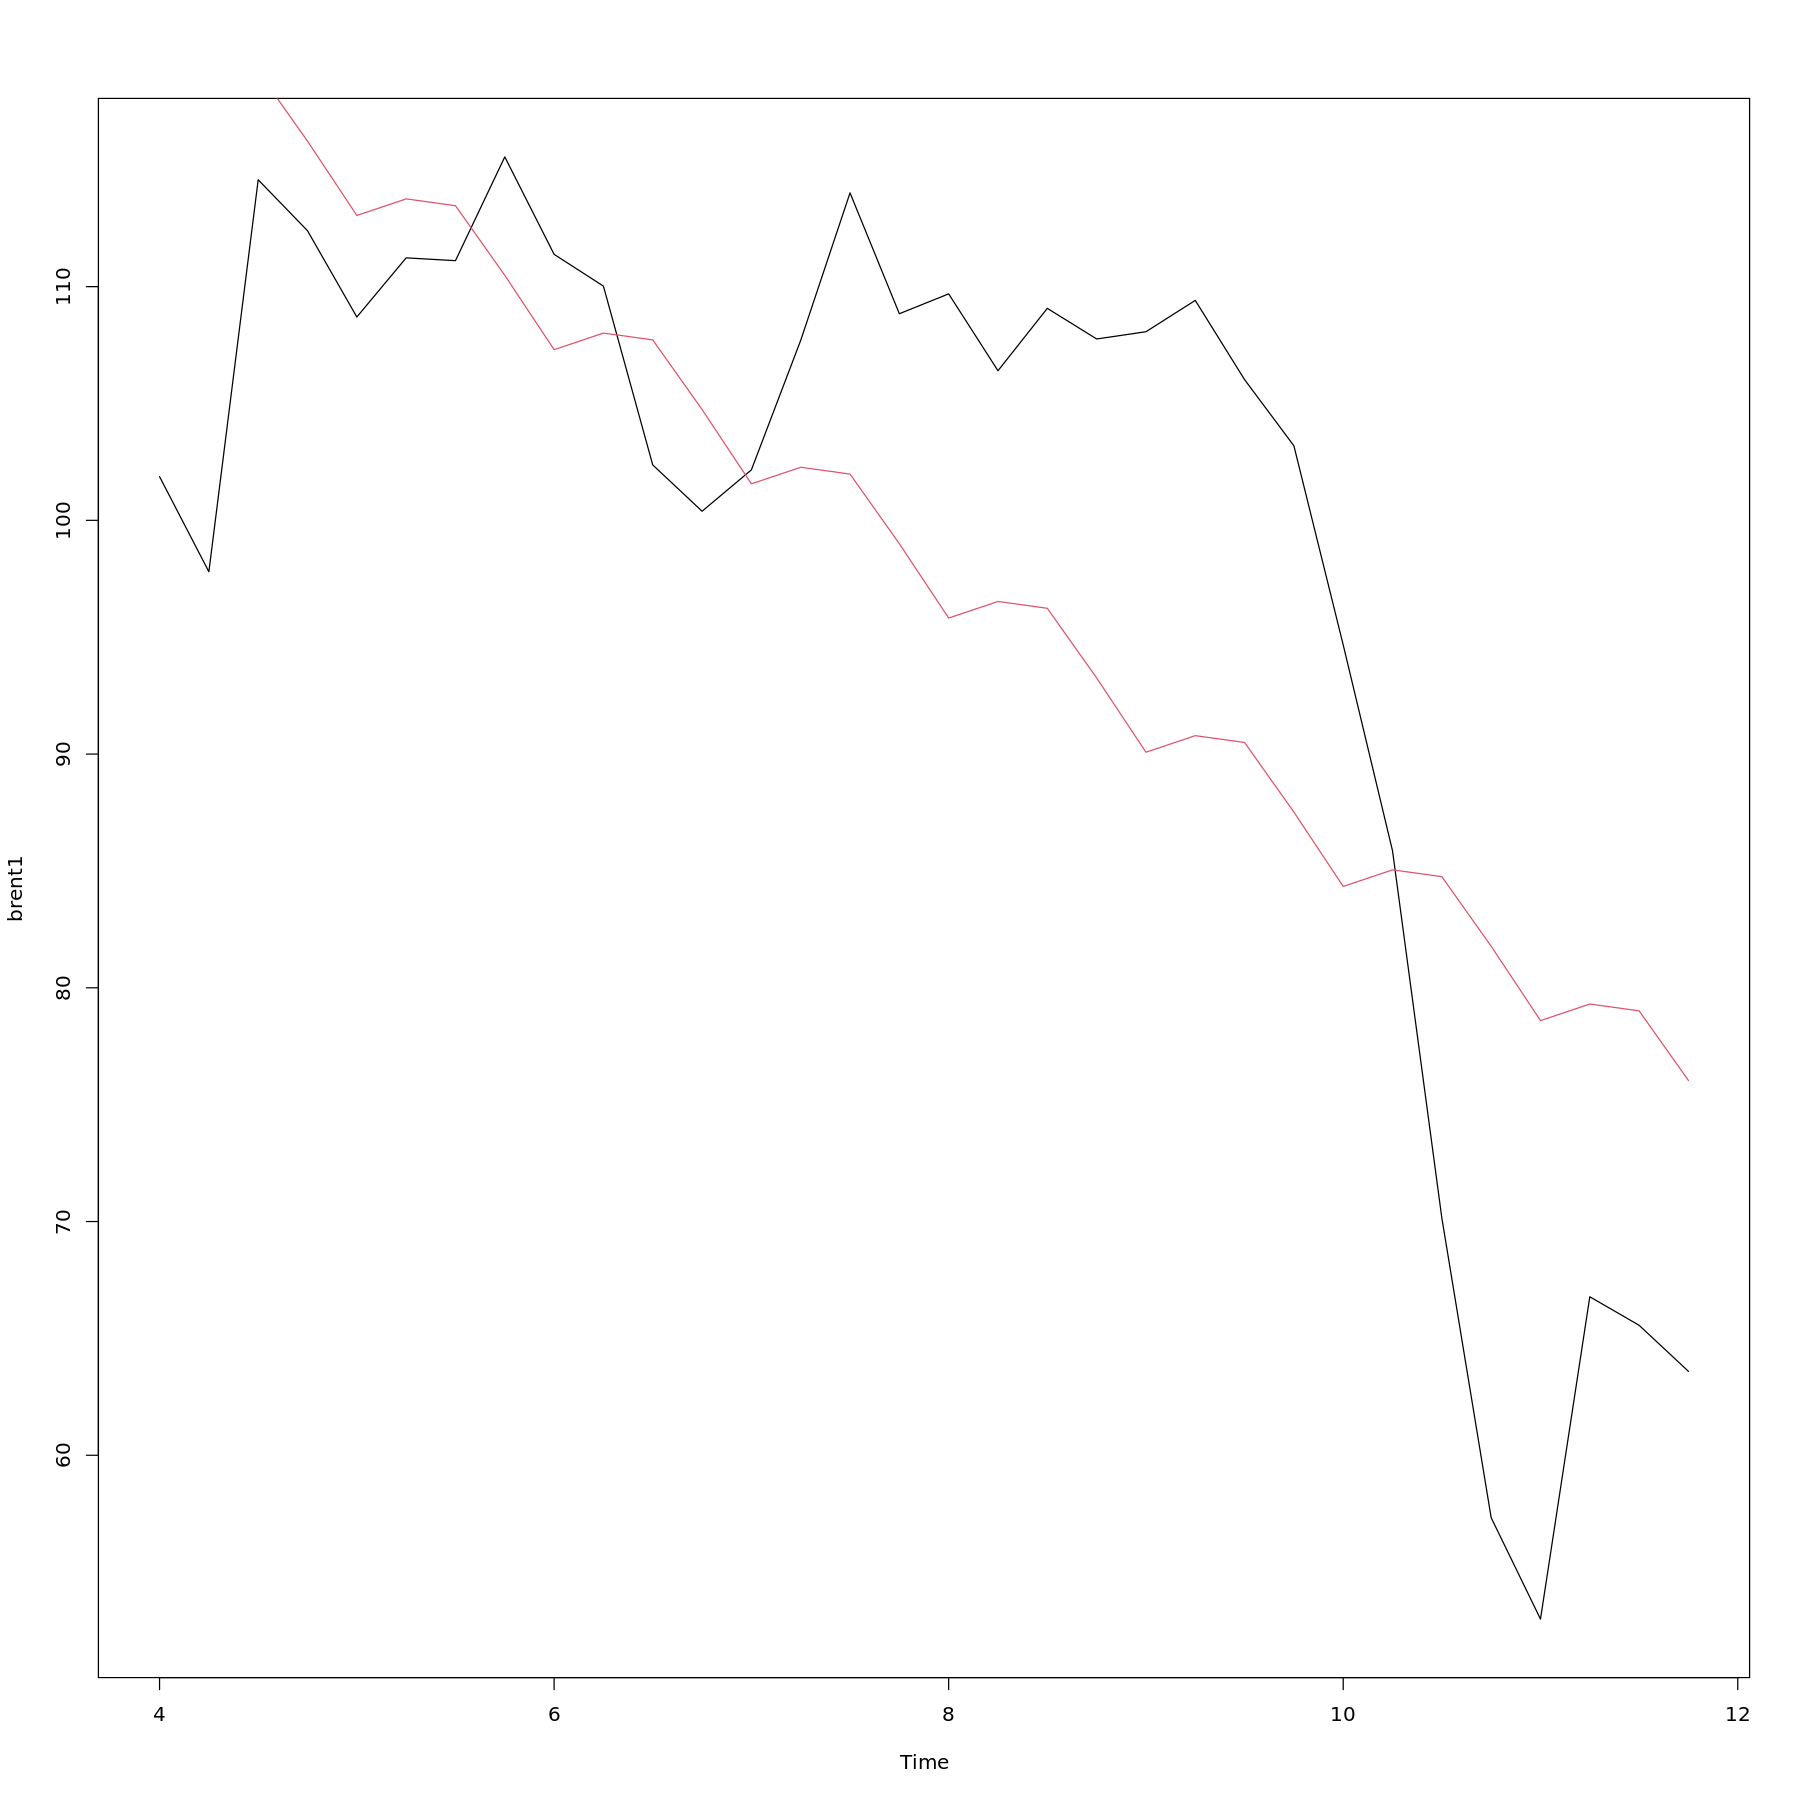

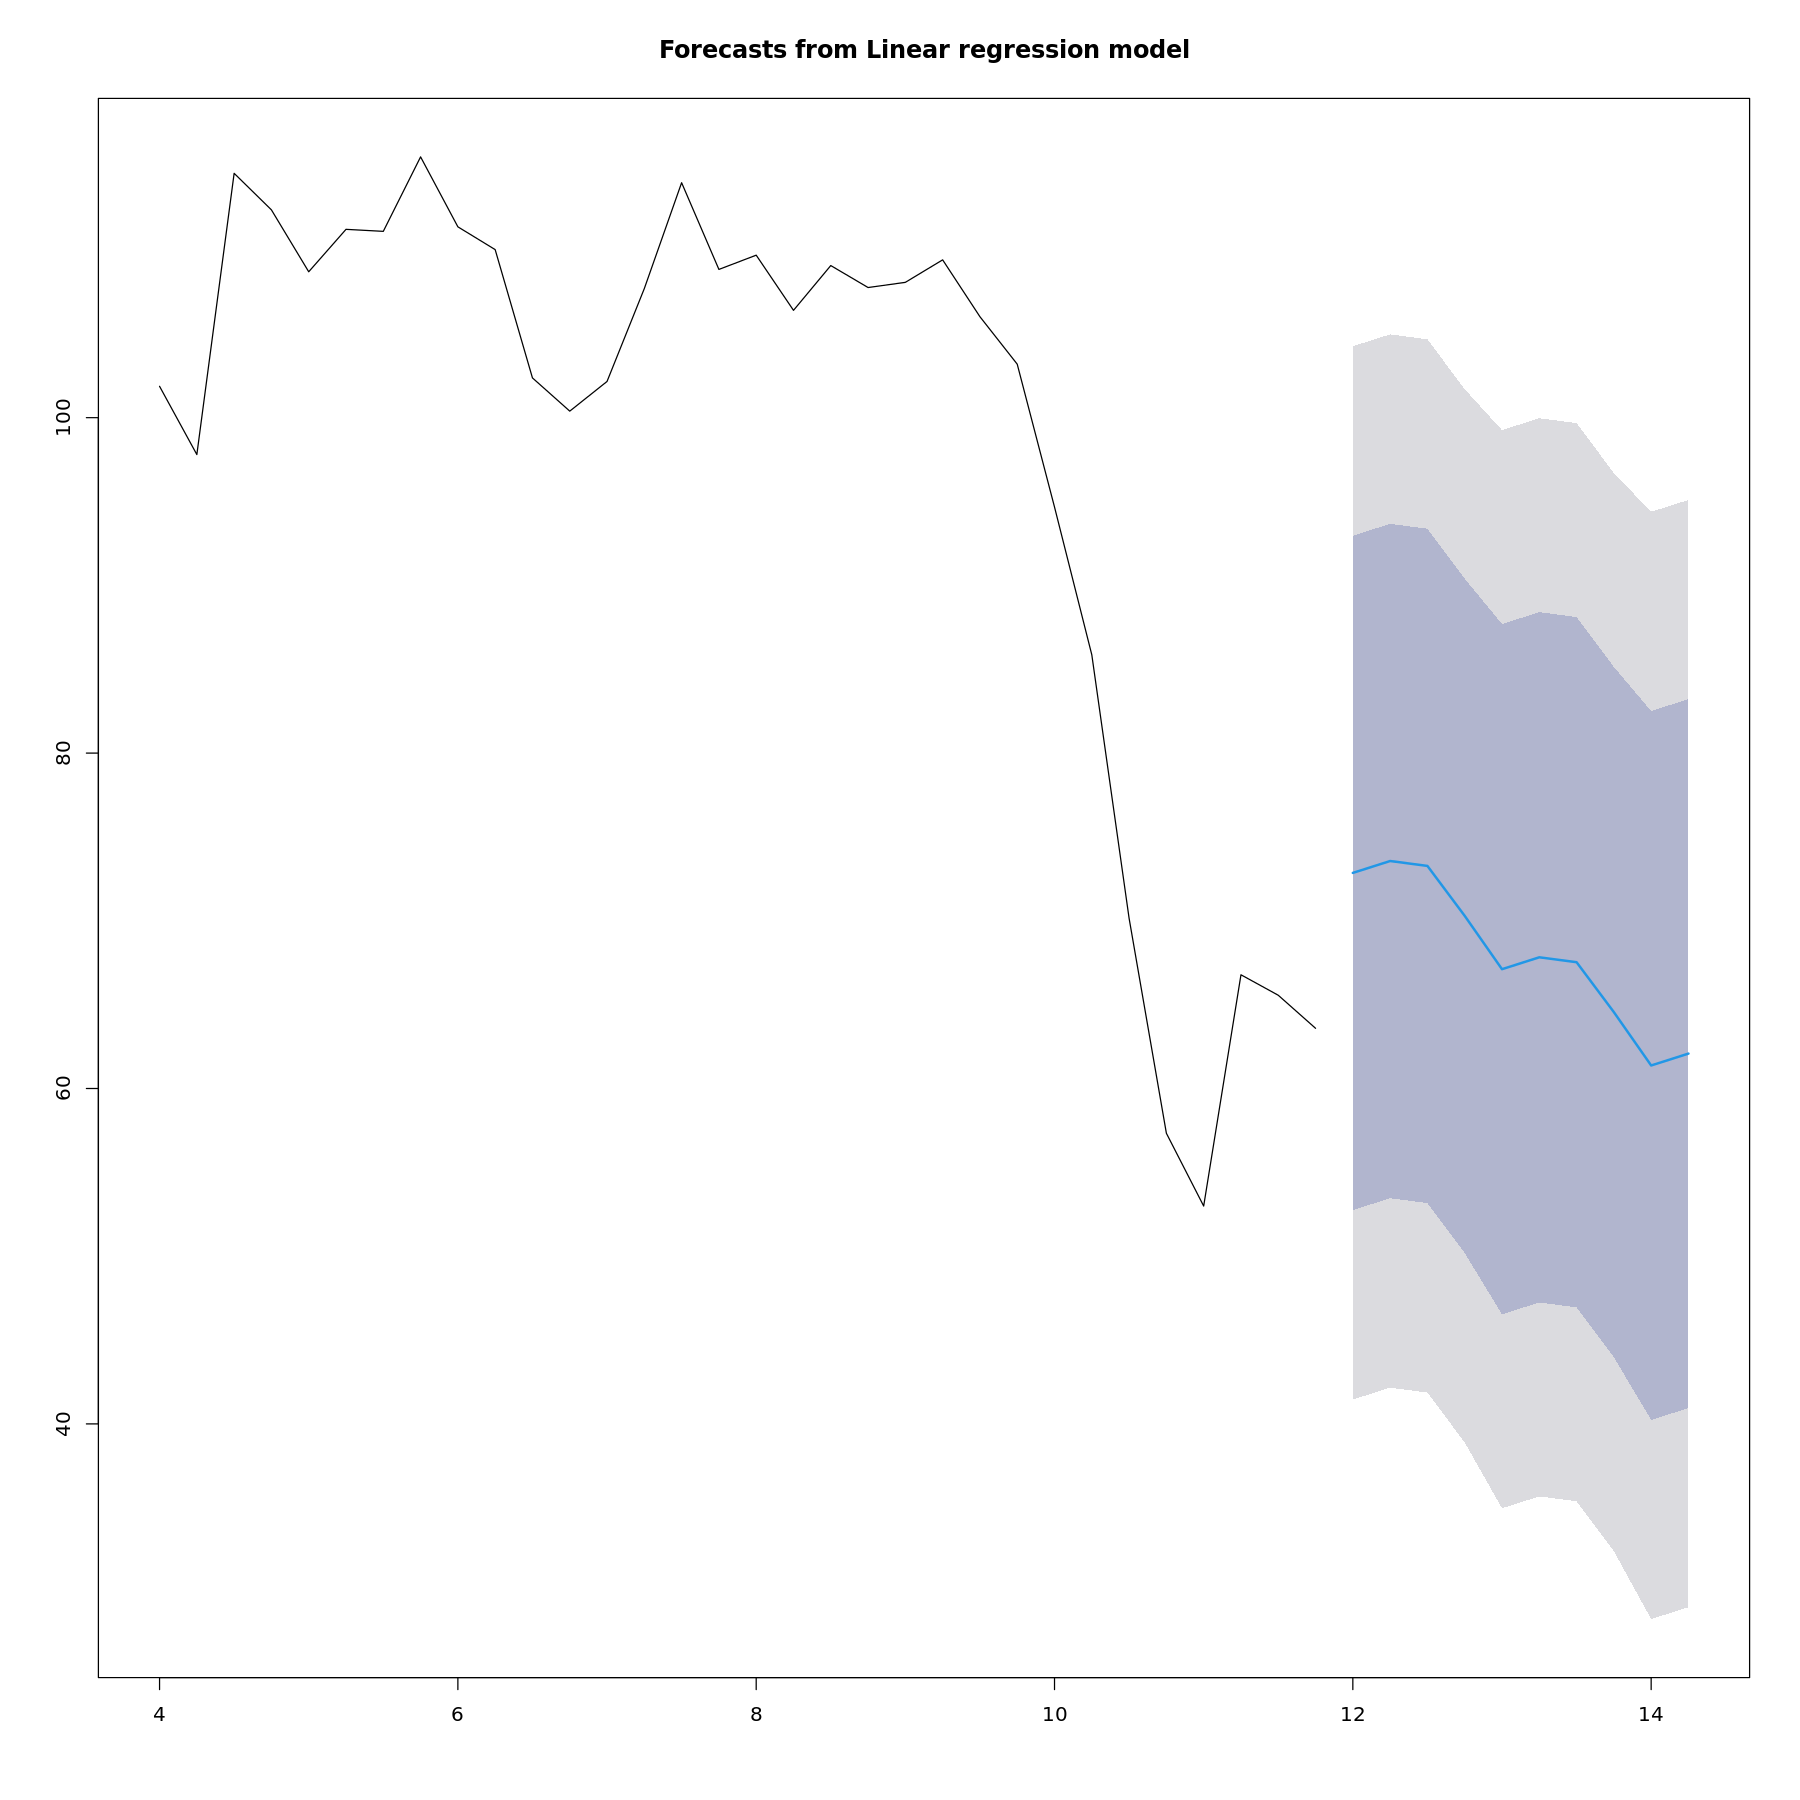

In [ ]:
plot(brent1)
lines(fitted(m1), col=2)

fore <- forecast(m1)
plot(fore)

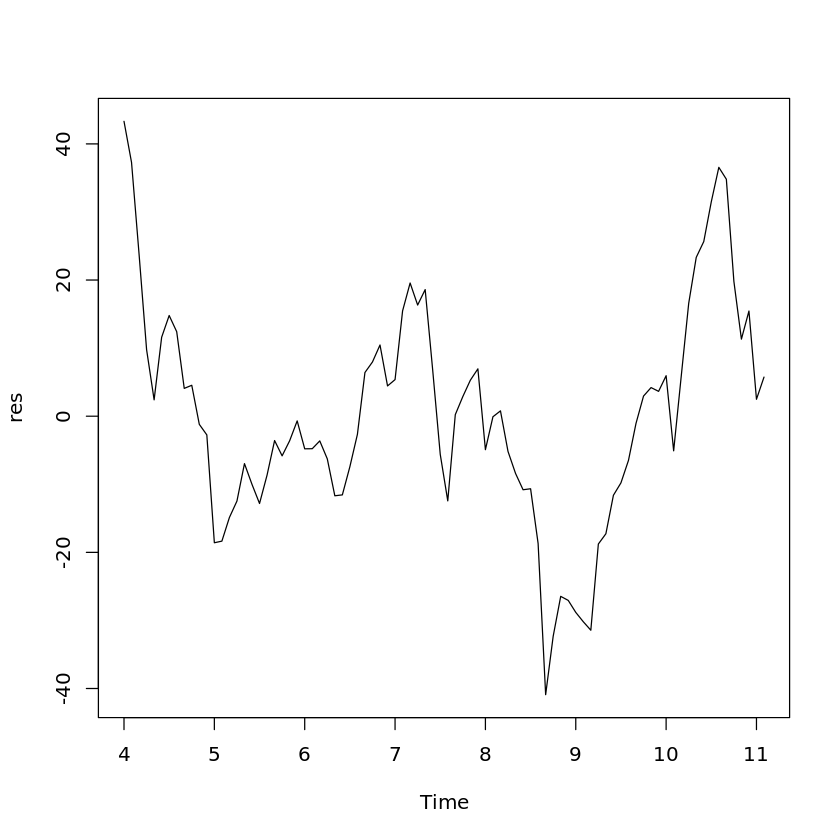

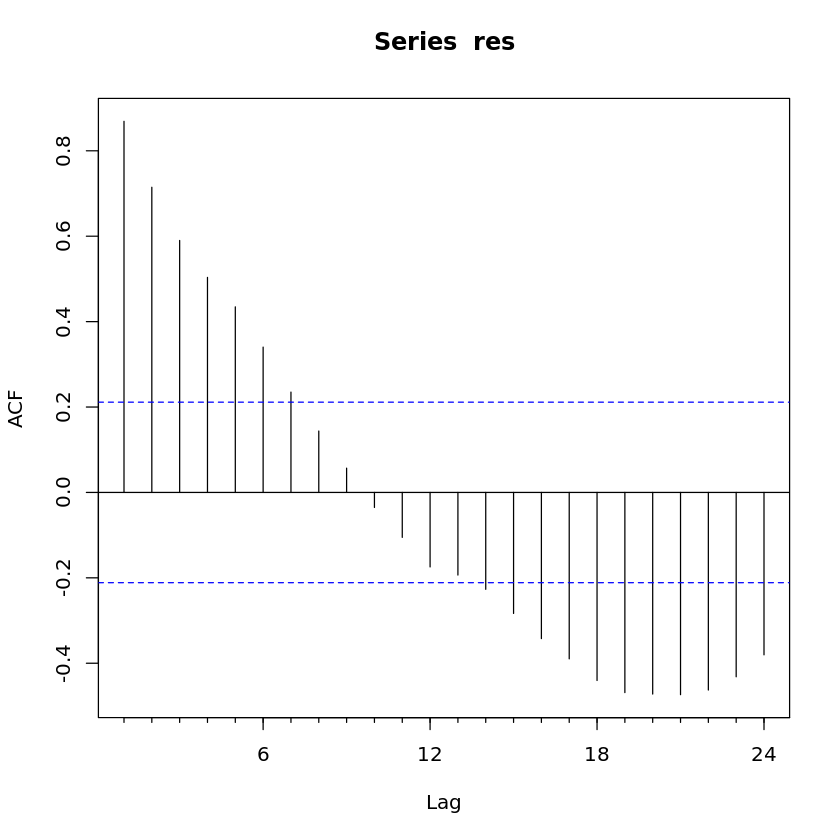

In [ ]:
#analysis of residuals
res<- residuals(m1) 
plot(res) 
#the form of residuals seems to indicate the presence of negative autocorrelation
Acf(res)

dw<- dwtest(m1, alt="two.sided")

Jan       Feb       Mar       Apr       May       Jun       Jul      
4   85.83700  92.88251  82.88888  67.37707  56.28670  53.76854  69.76020
5   51.54516  37.16092  37.35774  38.69493  42.48120  51.24213  51.12559
6   58.12384  56.29436  53.58755  52.92729  51.47519  49.10328  54.90764
7   65.31748  71.22838  78.18323  78.78523  76.39338  82.84094  73.34909
8   73.31961  63.05542  67.53695  65.04151  60.25604  61.04461  63.34394
9   45.55541  47.19485  42.19570  39.34136  55.50506  57.17368  68.31090
10  78.25364  84.30812  67.54563  80.76746  91.43262 100.13900 106.05384
11  94.51012  82.04477                                                  
   Aug       Sep       Oct       Nov       Dec      
4   65.00819  63.80549  51.30292  56.12364  48.62397
5   43.05655  49.89846  50.71493  49.69016  52.33963
6   53.37657  59.48501  64.95196  67.19163  69.46412
7   56.56974  52.91271  64.45958  66.65686  68.83743
8   58.07061  50.62210  23.89293  40.82709  43.76754
9   63.05048  68.32271  69.87493  75.71199  75.82189
10 106.40510 112.46269 105.79985  92.05386  85.40075
11

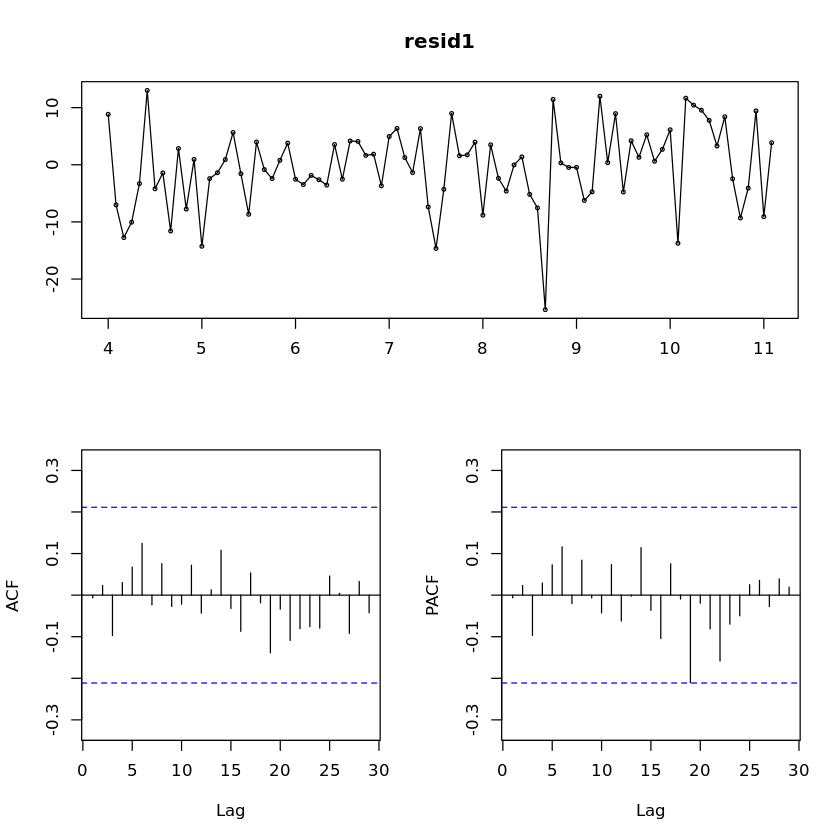

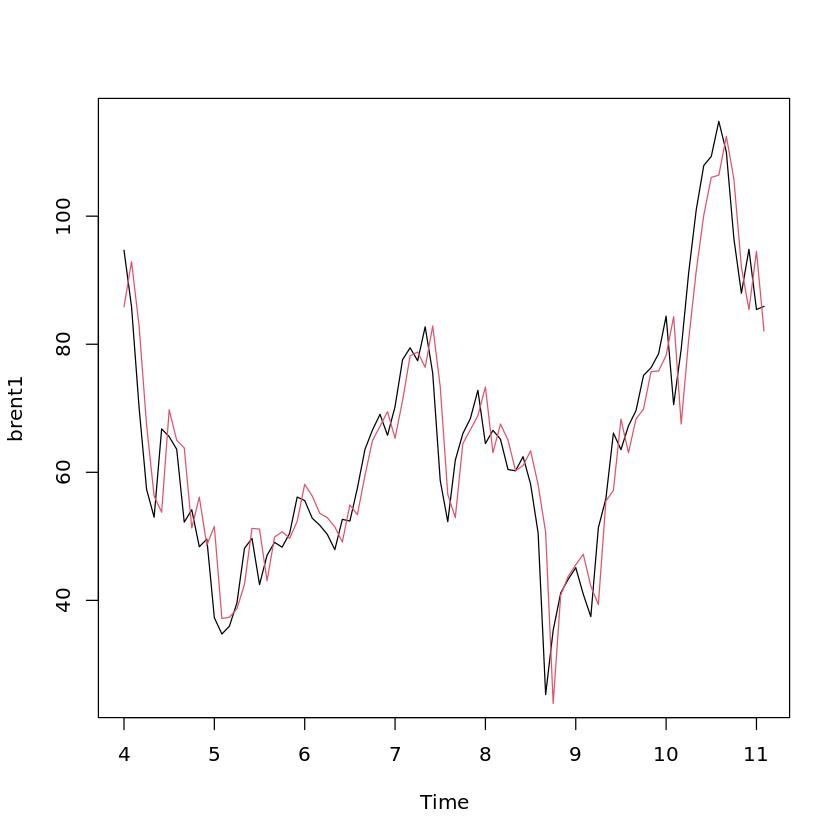

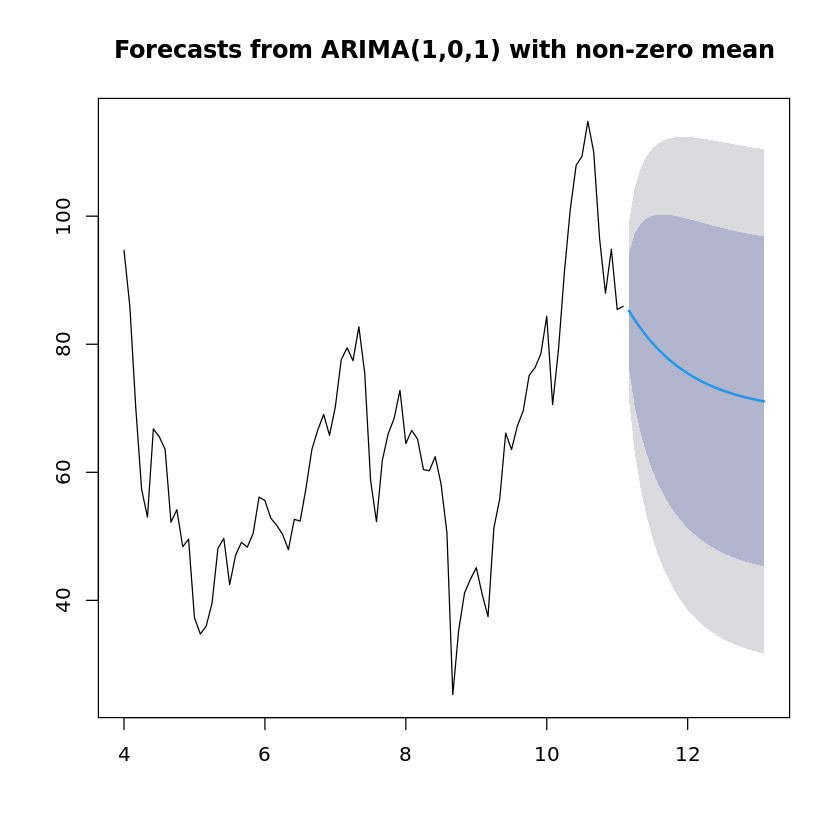

In [ ]:
##General indication: if the ACF is exponentially decaying or sinusoidal 
##and there is a significant spike at lag p in PACF and nothing else, 
##it may be an ARMA(p,d,0). 
##If the PACF is exponentially decaying or sinusoidal 
##and there is a significant spike at lag p in ACF and nothing else, it may be an ARMA(0,d,q)

arima1<- Arima(brent1, order=c(1,0,1))
fitted(arima1)

resid1<- residuals(arima1)
tsdisplay(resid1)


plot(brent1)
lines(fitted(arima1), col=2)

for1<- forecast(arima1)
plot(for1)

In [ ]:
brent1

Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov   
4   94.67  85.86  70.15  57.33  52.99  66.78  65.56  63.59  52.21  54.15  48.37
5   37.28  34.74  35.97  39.60  48.13  49.68  42.46  47.04  49.06  48.30  50.47
6   55.59  52.83  51.73  50.31  47.92  52.65  52.38  57.54  63.57  66.60  69.05
7   70.27  77.59  79.44  77.42  82.72  75.47  58.71  52.28  61.89  66.03  68.39
8   64.49  66.55  65.17  60.43  60.23  62.43  58.16  50.52  25.27  35.33  41.15
9   45.10  40.95  37.46  51.34  55.88  66.13  63.54  67.25  69.63  75.13  76.33
10  84.38  70.57  79.20  91.21 100.99 107.91 109.34 114.81 110.01  96.49  87.96
11  85.43  85.91                                                               
   Dec   
4   49.56
5   56.13
6   65.78
7   72.80
8   43.30
9   78.52
10  94.83
11


 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,0)            with non-zero mean : 638.7006
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : 479.3236
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : 565.7424
 ARIMA(0,0,0)            with zero mean     : 876.9232
 ARIMA(1,0,0)            with non-zero mean : 477.2409
 ARIMA(1,0,0)(0,0,1)[12] with non-zero mean : 479.2893
 ARIMA(1,0,0)(1,0,1)[12] with non-zero mean : 481.1951
 ARIMA(2,0,0)            with non-zero mean : 475.9739
 ARIMA(2,0,0)(1,0,0)[12] with non-zero mean : 478.0466
 ARIMA(2,0,0)(0,0,1)[12] with non-zero mean : 477.9972
 ARIMA(2,0,0)(1,0,1)[12] with non-zero mean : 480.0867
 ARIMA(3,0,0)            with non-zero mean : 478.2264
 ARIMA(2,0,1)            with non-zero mean : 478.2282
 ARIMA(1,0,1)            with non-zero mean : 476.1943
 ARIMA(3,0,1)            with non-zero mean : 480.4861
 ARIMA(2,0,0)            with zero mean     : Inf

 Best model: ARIMA(2,0,0)            with non-zero mean 



Series: brent1 
ARIMA(2,0,0) with non-zero mean 
Box Cox transformation: lambda= 0.8413589 

Coefficients:
         ar1      ar2     mean
      1.1184  -0.2011  40.2916
s.e.  0.1056   0.1069   4.4482

sigma^2 = 13.59:  log likelihood = -233.74
AIC=475.48   AICc=475.97   BIC=485.3

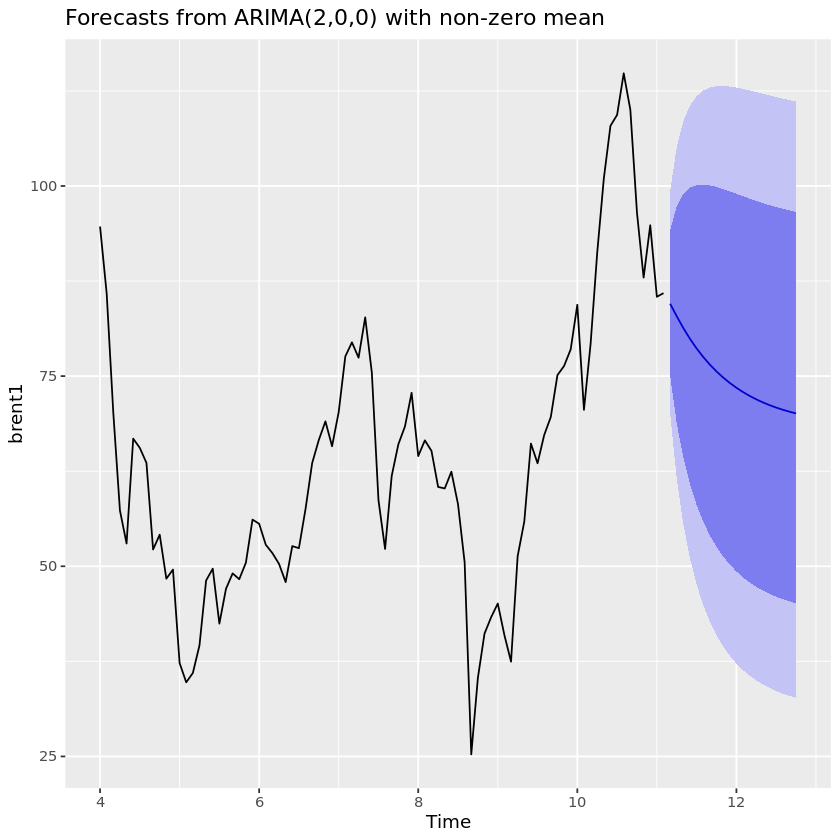


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 8.2763, df = 15, p-value = 0.9122

Model df: 2.   Total lags used: 17



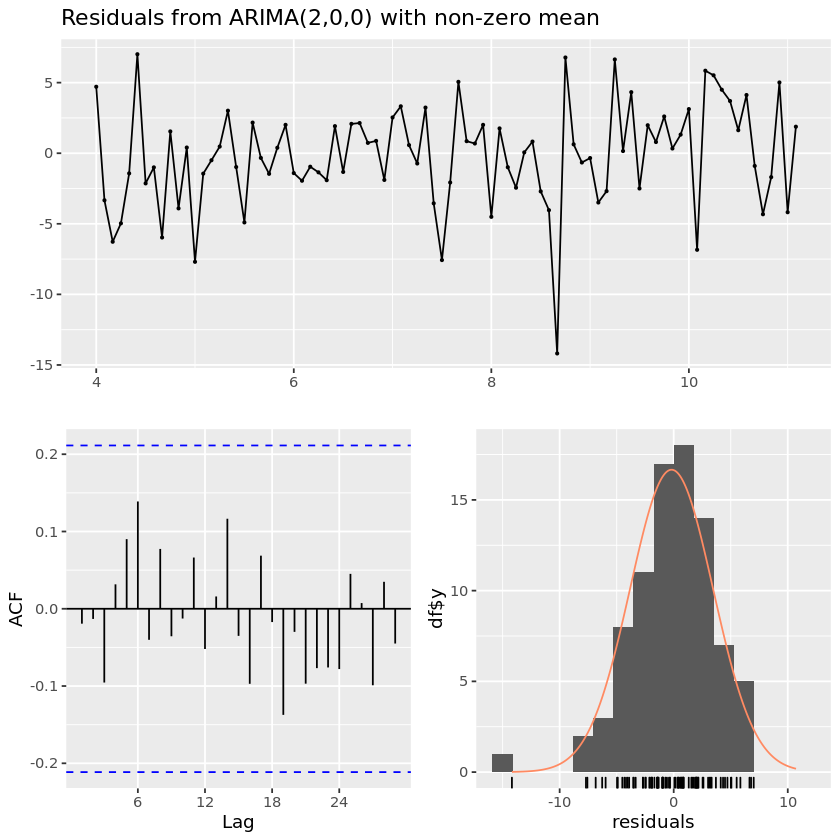

In [ ]:
modelfit <- auto.arima(brent1, stationary = TRUE, seasonal = TRUE, stepwise = TRUE, trace = TRUE,
                        approximation = FALSE, allowmean = TRUE, lambda = "auto")
modelfit

#Now that our model is ready, we will forecast the prices for the next few months

price_forecast <- forecast(modelfit, h=20)
autoplot(price_forecast)
checkresiduals(modelfit)

In [ ]:
close_br_red <- close_br[0:100]

In [ ]:
close_br_red

[1] 111.80 117.36 125.89 112.48 116.74 114.85 102.76 109.56 110.82 107.38
 [11] 122.66 122.88 101.87  97.80 114.57 112.39 108.70 111.23 111.11 115.55
 [21] 111.38 110.02 102.37 100.39 102.16 107.70 114.01 108.84 109.69 106.40
 [31] 109.07 107.76 108.07 109.41 106.02 103.19  94.67  85.86  70.15  57.33
 [41]  52.99  66.78  65.56  63.59  52.21  54.15  48.37  49.56  37.28  34.74
 [51]  35.97  39.60  48.13  49.68  42.46  47.04  49.06  48.30  50.47  56.13
 [61]  55.59  52.83  51.73  50.31  47.92  52.65  52.38  57.54  63.57  66.60
 [71]  69.05  65.78  70.27  77.59  79.44  77.42  82.72  75.47  58.71  52.28
 [81]  61.89  66.03  68.39  72.80  64.49  66.55  65.17  60.43  60.23  62.43
 [91]  58.16  50.52  25.27  35.33  41.15  43.30  45.10  40.95  37.46  51.34

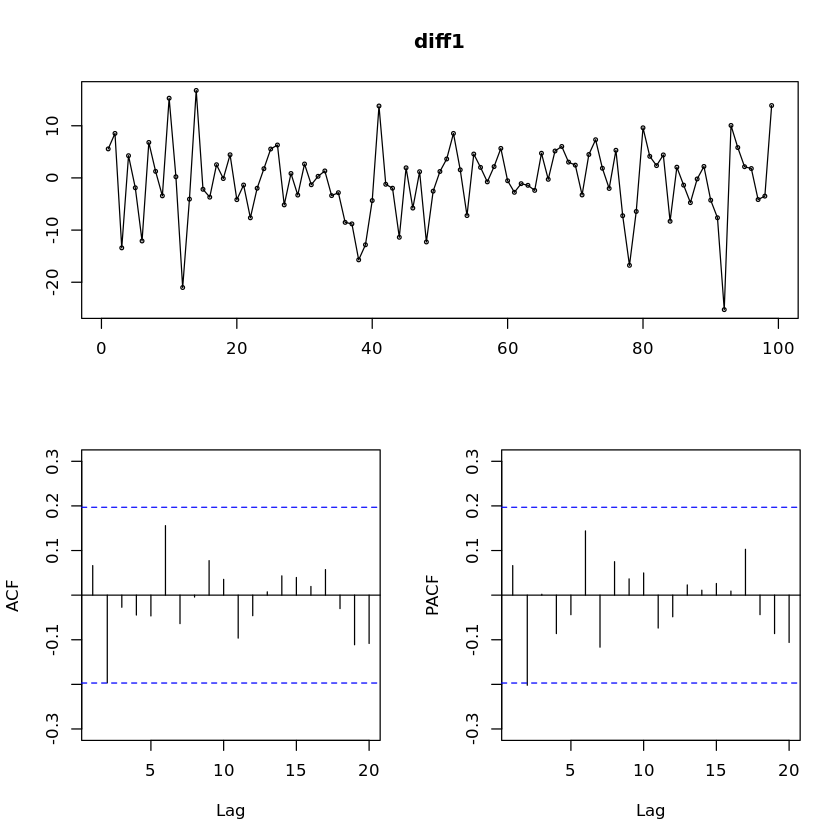

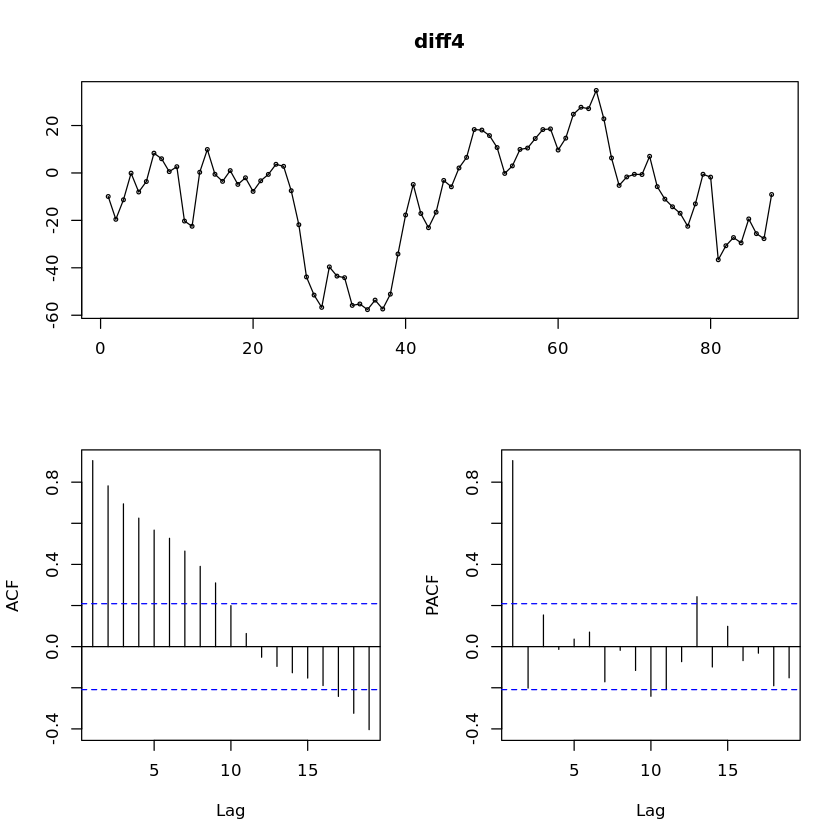

In [ ]:
diff1<- diff(close_br_red) ##first difference
diff12<- diff(close_br_red, lag=12) ###seasonal difference
tsdisplay(diff1)
tsdisplay(diff12)

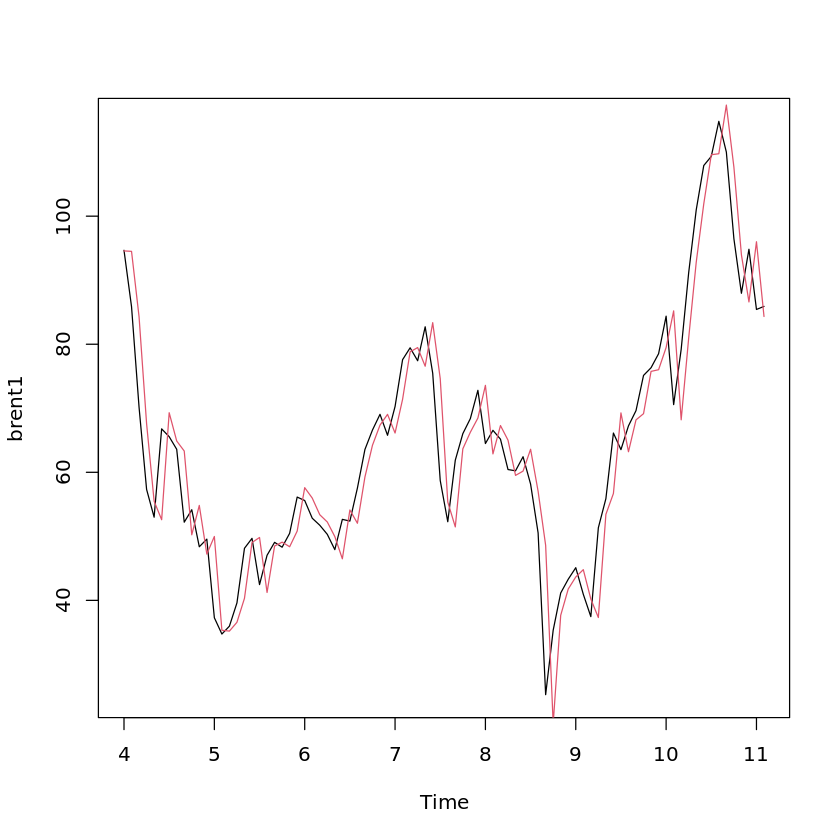

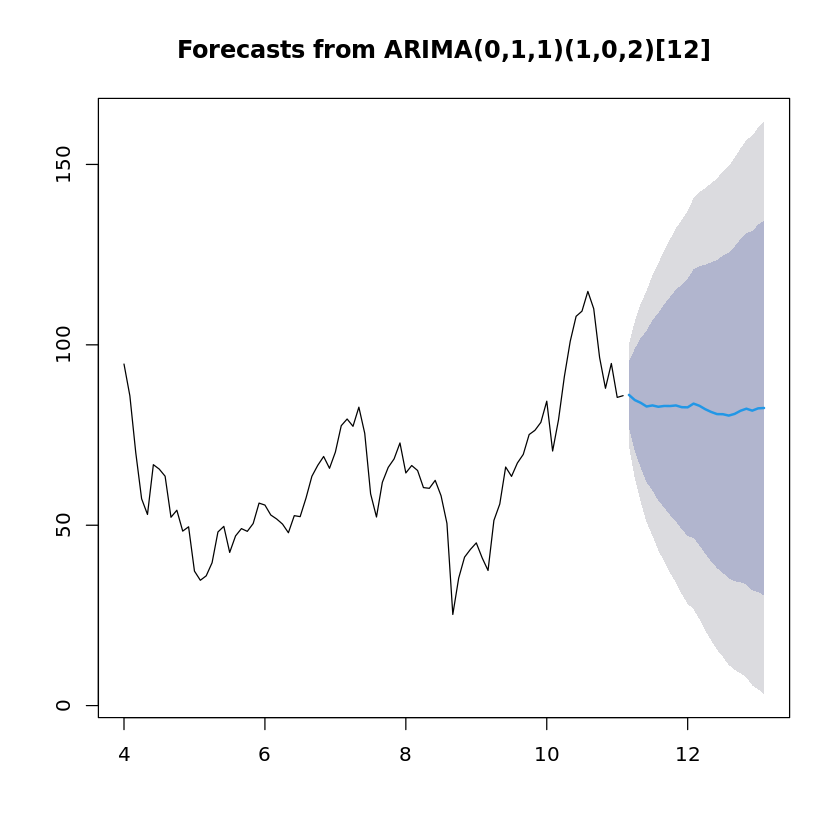

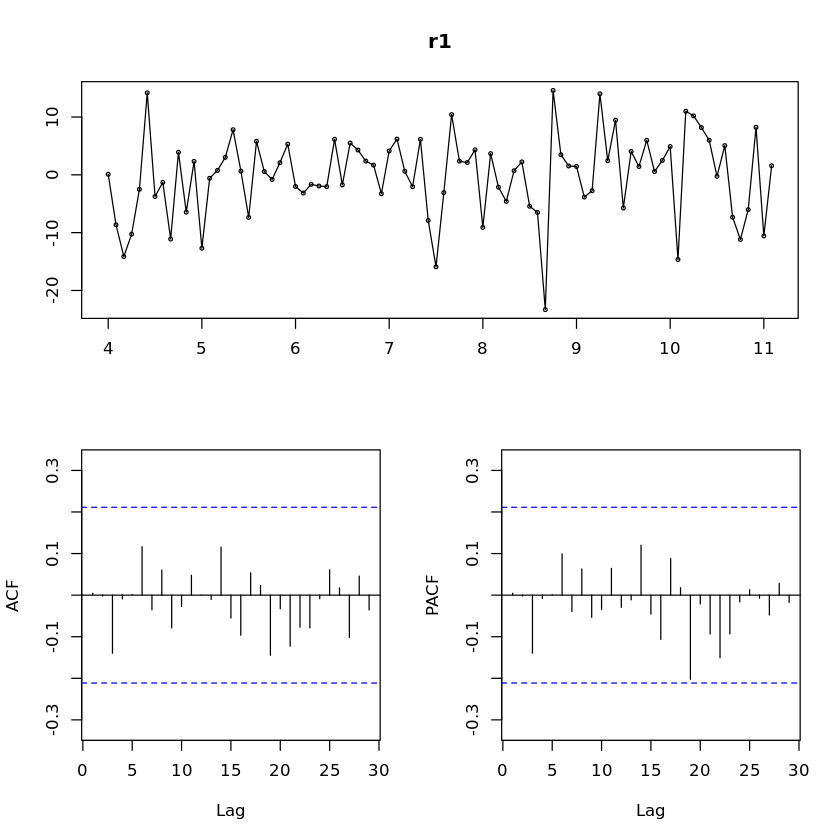

In [ ]:
a1<- Arima(brent1,order=c(0,1,1), seasonal=c(1,0,2))
fit1<- fitted(a1)

plot(brent1)
lines(fit1, col=2)

f1<- forecast(a1)
plot(f1)

r1<- residuals(a1)
tsdisplay(r1) 

In [ ]:
brent1_vol <- window(vol_br.ts, start=4, end=11 +.9)
brent1_vol

Warning message in window.default(x, ...):
“'end' value not changed”


Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep    
4   267960  385099  305879  332585  576923  427435  415701  466769  657400
5   596999  725957  683434  574821  605361  543857  493196  566263  505286
6   555947  692804  546946  769381  657977  459431  719378  477658  558759
7   645241  654964  684888  402979  457907  781961  738706  649077  684409
8  1047307  896145  718062  806410  808581  572198  850898  725258  818304
9   405942  483298  609695  528154  586185  611358  774197  703921  547723
10  821979  832636  646880  619239  732123  531264  311730  447644  430112
11  526954  448938                                                        
   Oct     Nov     Dec    
4   635057  497093  482401
5   575861  806223  656427
6   472859  465261  567268
7   559896  695425  823195
8   528396  581247  443021
9   669981  775897  590970
10  465973  470730  619846
11

Jan       Feb       Mar       Apr       May       Jun       Jul      
4   86.78085  91.82872  83.97965  66.95171  53.96309  55.82242  69.68156
5   50.49829  35.93382  37.96608  39.63446  42.01419  52.04446  51.51309
6   58.72496  54.73042  55.32051  50.24516  53.03798  50.73860  51.99484
7   64.66052  71.22139  77.80583  81.65794  75.28083  79.81584  74.14447
8   70.97764  64.58223  68.75612  63.66369  60.25826  63.27723  59.94288
9   45.72821  46.54449  41.09178  40.41129  54.85083  57.05463  66.67234
10  75.37999  84.58425  68.99324  80.72671  90.23614 102.32807 107.84391
11  95.78152  82.45190                                                  
   Aug       Sep       Oct       Nov       Dec      
4   64.58242  61.98454  51.75470  57.44513  48.50518
5   42.23973  50.79673  49.86232  47.47503  54.19866
6   56.39503  58.10724  66.19730  67.08678  68.51763
7   57.01371  52.34365  65.86173  64.93884  67.75631
8   59.81348  49.05856  26.85532  39.84517  45.47250
9   63.88803  69.65934  68.30909  74.86807  77.69894
10 104.73611 113.06961 105.26088  92.02514  83.82526
11

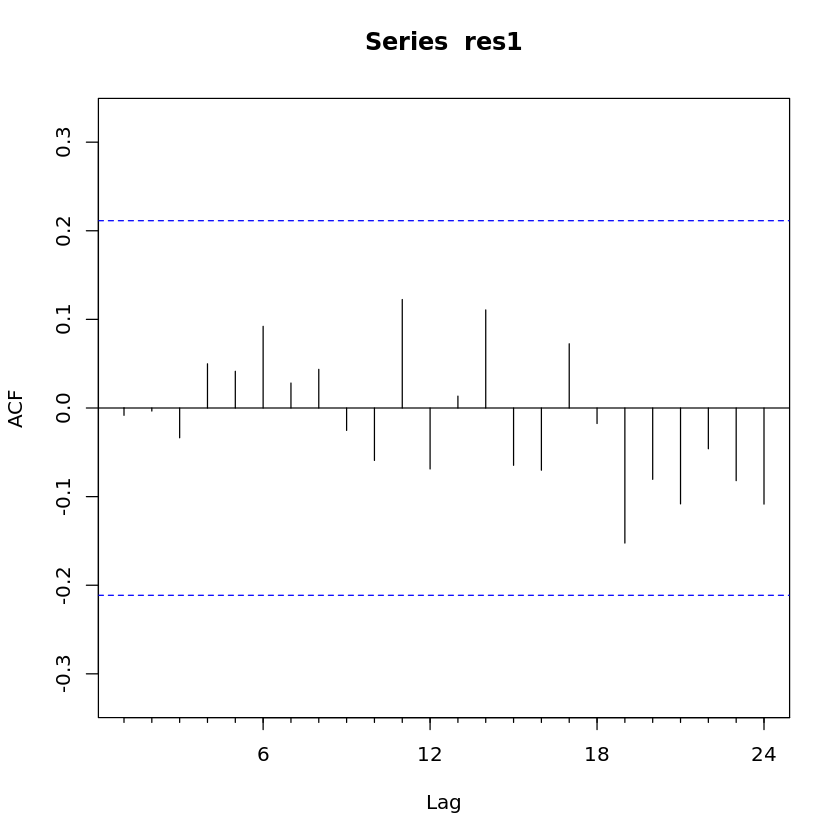

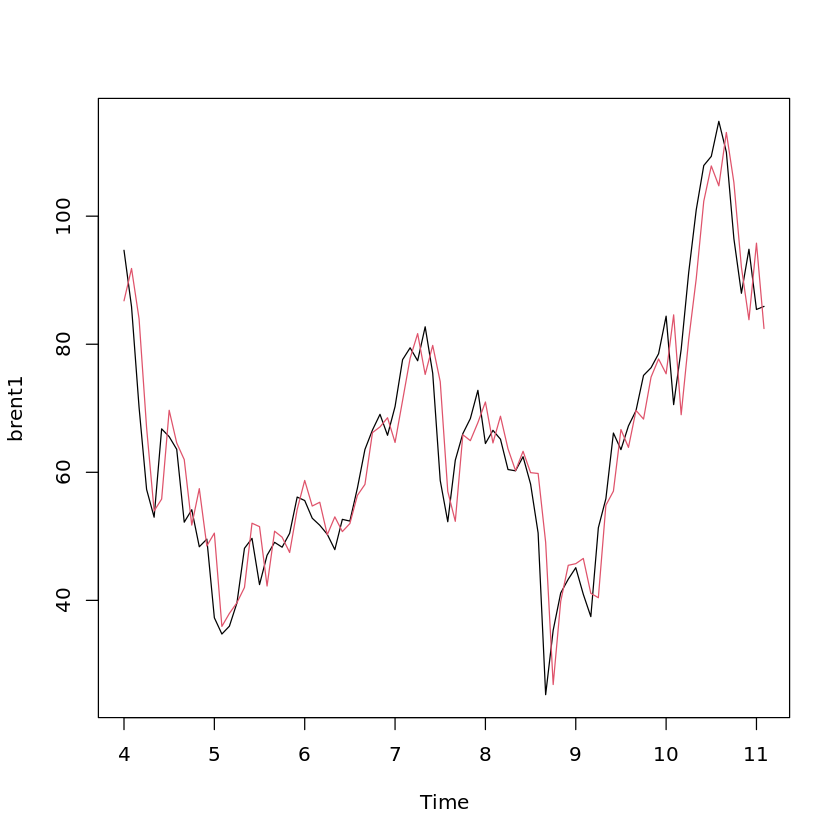

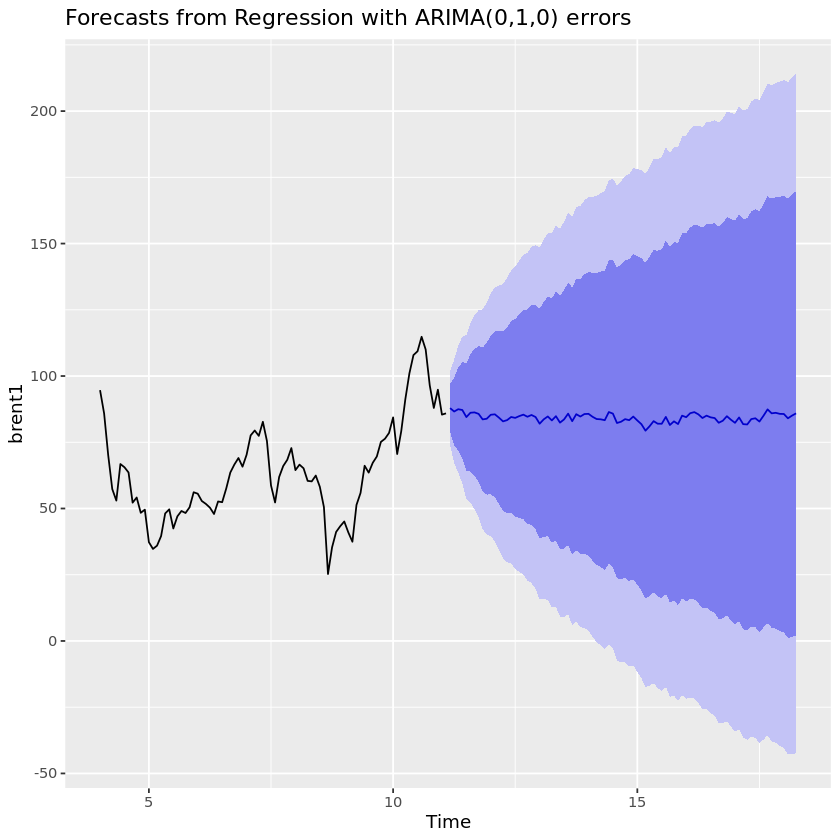


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 8.2763, df = 15, p-value = 0.9122

Model df: 2.   Total lags used: 17



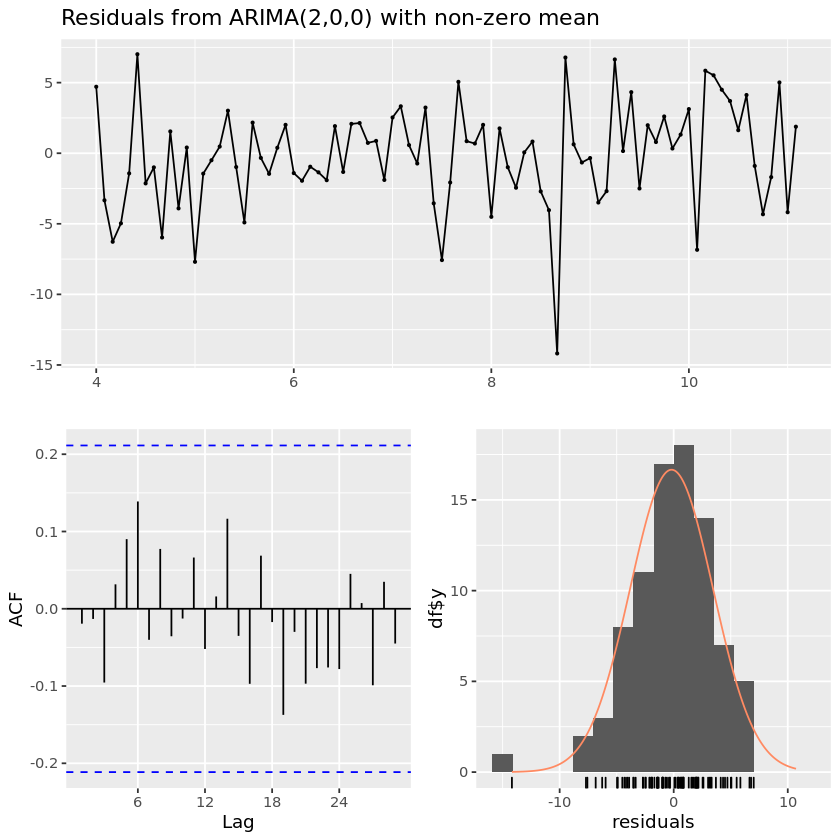

In [ ]:
armax1<- Arima(brent1, xreg=brent1_vol, order=c(1,0,1))
res1<- residuals(armax1)
Acf(res1)

fitted(armax1)
plot(brent1)
lines(fitted(armax1), col=2)

########procedure also available with auto.arima
auto.arima<- auto.arima(brent1, xreg=brent1_vol)
price_forecast <- forecast(auto.arima, xreg=brent1_vol, h=20)
autoplot(price_forecast)
checkresiduals(modelfit)

In [ ]:
close_crd.ts <- window(close_co.ts, start=4, end=11 +.9)
close_crd.ts

Warning message in window.default(x, ...):
“'end' value not changed”


Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov   
4   91.16  80.54  66.15  53.27  48.24  59.63  60.30  59.47  47.12  49.20  45.09
5   37.04  33.62  33.75  38.34  45.92  48.33  41.60  44.70  48.24  46.86  49.44
6   54.01  50.60  49.33  48.32  46.04  50.17  47.23  51.67  57.40  60.42  64.73
7   64.94  67.04  74.15  69.80  73.25  65.31  50.93  45.41  53.79  57.22  60.14
8   53.50  58.47  58.58  55.10  54.18  55.17  51.56  44.76  18.84  35.49  39.27
9   42.61  40.22  35.79  48.52  52.20  61.50  59.16  63.58  66.32  73.47  73.95
10  83.57  66.18  75.21  88.15  95.72 100.28 104.69 105.76  98.62  89.55  79.49
11  80.55  80.26                                                               
   Dec   
4   46.59
5   53.72
6   61.64
7   63.91
8   40.27
9   75.03
10  86.53
11

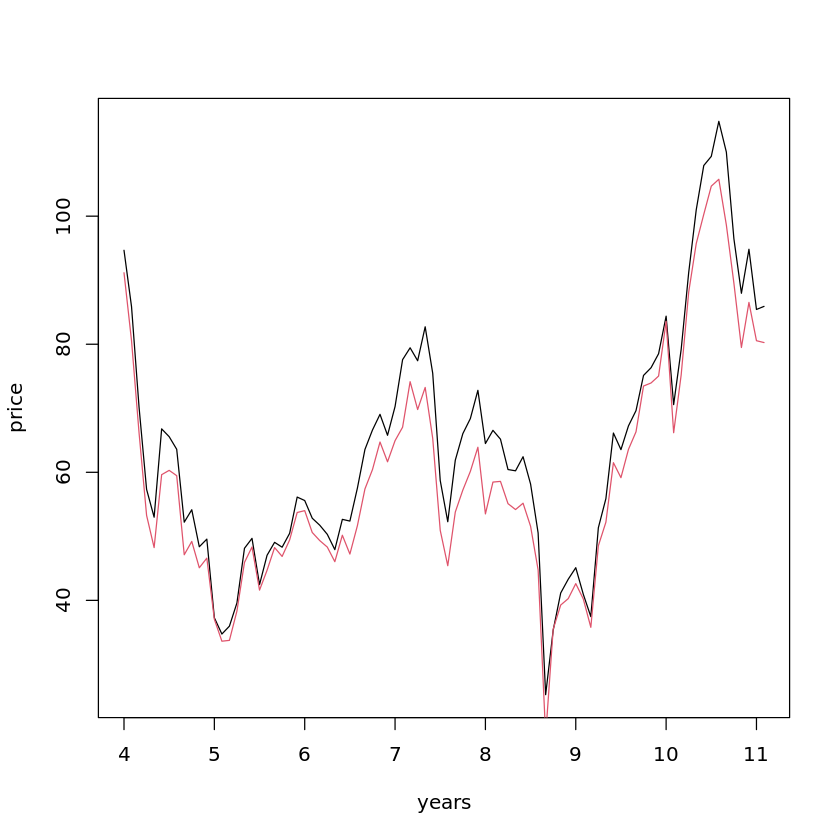

In [ ]:
plot(brent1, ylab="price", xlab="years")
lines(close_crd.ts, col=2)

[1] 346.3372


Call:
tslm(formula = brent1 ~ trend + season + close_crd.ts)

Residuals:
   Min     1Q Median     3Q    Max 
-4.444 -1.696 -0.476  1.627  7.839 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.533133   1.367393  -0.390   0.6978    
trend         0.006993   0.012981   0.539   0.5917    
season2       1.260737   1.295023   0.974   0.3336    
season3       0.491388   1.343245   0.366   0.7156    
season4       0.405341   1.341707   0.302   0.7634    
season5       1.297274   1.339707   0.968   0.3361    
season6       2.118649   1.338132   1.583   0.1177    
season7       1.479715   1.340181   1.104   0.2732    
season8       1.902364   1.340622   1.419   0.1602    
season9       2.637181   1.347102   1.958   0.0541 .  
season10      0.793536   1.342451   0.591   0.5563    
season11      0.757438   1.343310   0.564   0.5746    
season12      1.128576   1.341361   0.841   0.4029    
close_crd.ts  1.062457   0.018429  57.652   <2e-16 ***
---
Signif. co

Jan       Feb       Mar       Apr       May       Jun       Jul      
4   96.32744  86.31187  70.26076  56.49726  52.05203  64.98178  65.06168
5   38.91118  36.54531  35.92107  40.71870  49.67104  53.05994  45.27766
6   57.02499  54.66974  52.55807  51.40593  49.88246  55.09877  51.34321
7   68.72157  72.22046  79.01217  74.31143  78.87583  71.26829  55.35822
8   56.65098  63.19912  62.55364  58.77723  58.69869  60.57889  56.11149
9   45.16474  43.89320  38.42416  51.87018  56.67895  67.38817  64.27008
10  88.76689  71.55850  80.39013  94.05927 103.00099 108.67416 112.72766
11  85.64220  86.60181                                                  
   Aug       Sep       Oct       Nov       Dec      
4   64.60949  52.22995  52.60322  48.20741  50.17923
5   49.00092  53.50383  50.20098  52.91302  57.83847
6   56.49016  63.31985  64.69182  69.24191  66.33704
7   49.92310  59.56830  61.37587  64.44914  68.83274
8   49.31642  22.51935  38.37261  42.35959  43.80017
9   69.39578  73.04872  78.80864  79.28951  80.81509
10 114.29413 107.45000  95.97686  85.25944  93.11727
11

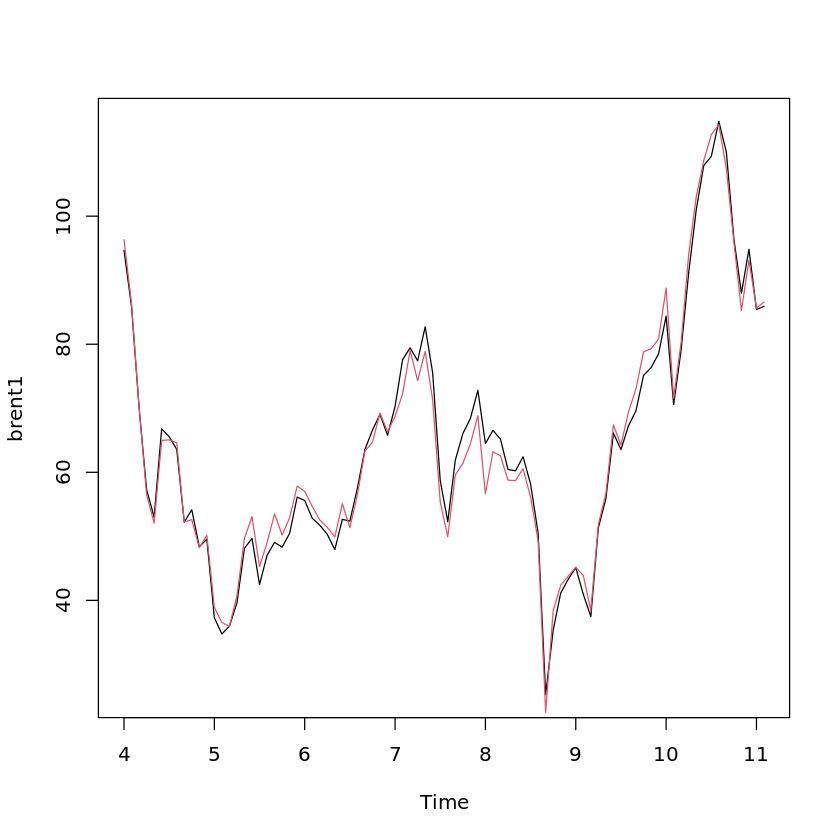

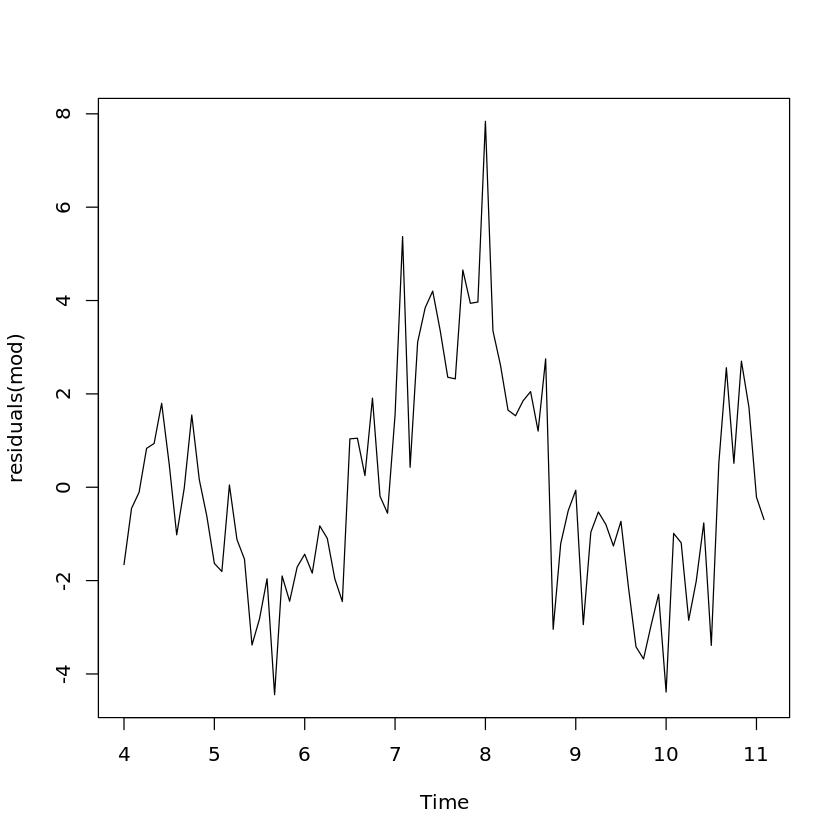

In [ ]:
####we try with a simple arima model, ARMAX
auto.a<- auto.arima(brent1, xreg=close_crd.ts) 
AIC(auto.a)

###### we try with a regression model with trend, season and external variable
mod<- tslm(brent1~ trend+season+close_crd.ts) 
summary(mod)
fitted(mod)
plot(brent1)
lines(fitted(mod), col=2)
plot(residuals(mod))

Jan         Feb         Mar         Apr         May         Jun        
4  -0.52986236 -0.98020066 -0.55789799 -0.49395123  0.28440851  0.57348282
5   0.48526016 -0.91270846 -1.28035863 -1.10844290 -1.25304073 -1.16732117
6  -0.86594991 -1.25276559 -1.93408023 -0.99501730 -1.03796280 -0.45450351
7   0.54048636  0.75360470  1.91066288  1.26317487  3.39809307  2.80393681
8   3.23317260  3.42071268  4.02069933  3.30442797  1.88412872  1.16915637
9  -2.90374663 -0.43709377 -0.94213359 -0.16473409 -1.13408622 -0.94028901
10 -3.44287136 -2.18677043 -1.59573937 -1.87189054 -1.77767050 -1.42490910
11  1.50671504  0.52121405                                                
   Jul         Aug         Sep         Oct         Nov         Dec        
4   1.14791867  0.64265075  0.24125433  0.22957052  0.33953436  0.24392001
5  -1.74330145 -1.49072890 -2.11708703 -3.40236884 -1.82370979 -2.35198287
6  -1.22836650 -0.26251042  0.59003535  0.02572677  1.39147362 -0.03009363
7   2.39858748  2.63332831  2.80499021  1.64600677  3.53667510  3.09303085
8   1.14474218  1.65233567  1.48215610  0.90757058 -0.78544501 -0.27102561
9  -1.10587377 -0.54022901 -1.83740670 -0.54839836 -2.46599425 -2.65315765
10 -1.56695168 -1.61257189  0.18084390  1.17492876  0.82009798  1.89849018
11

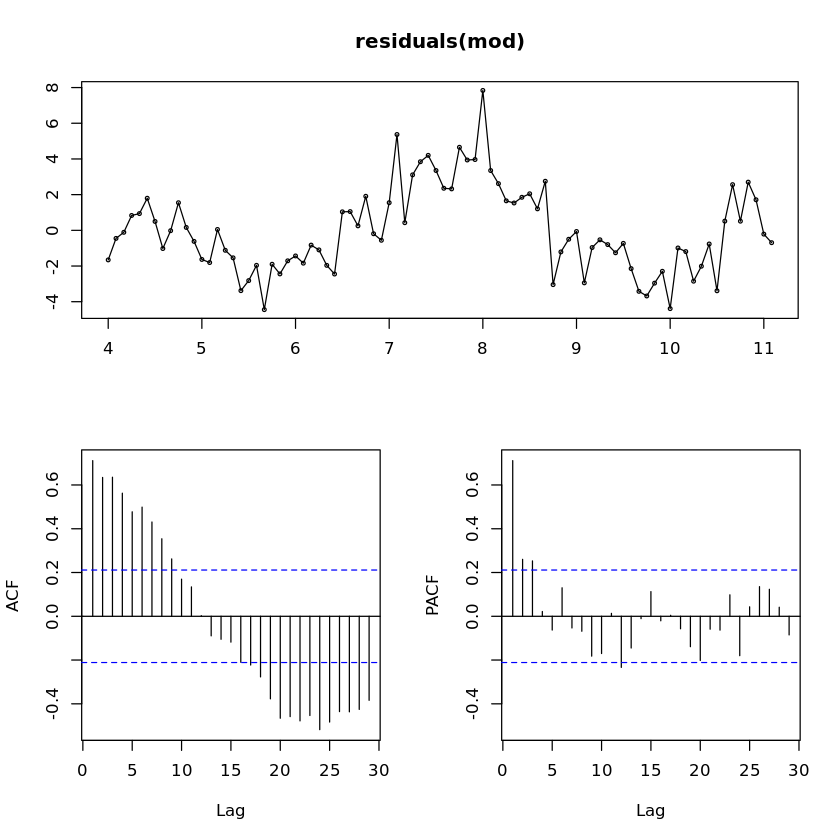

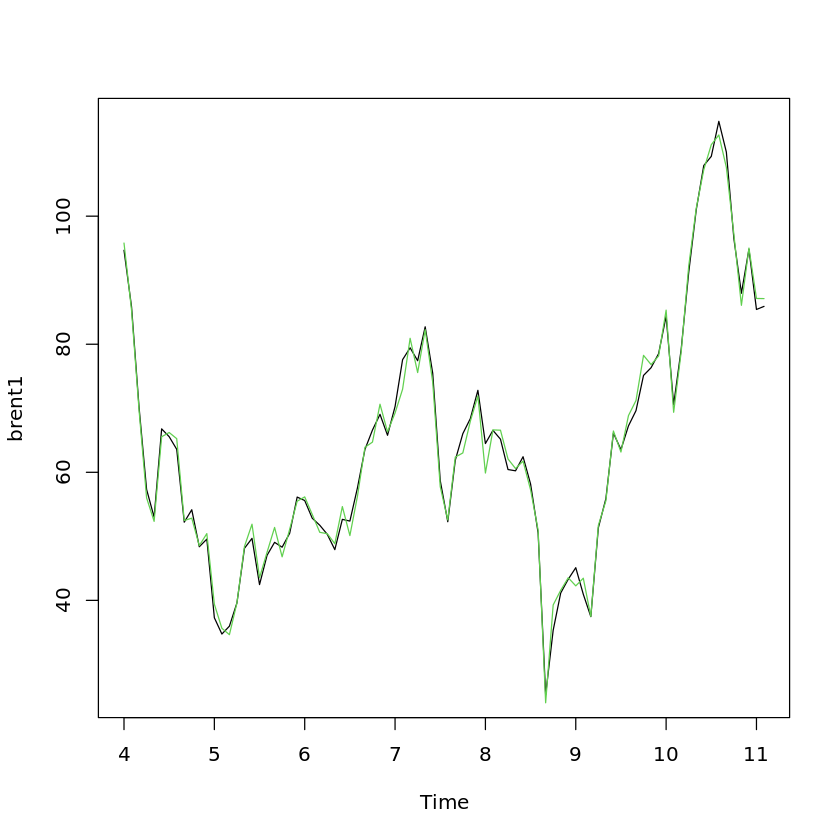

In [ ]:
#####analysis of residuals: autocorrelation? 
dw<- dwtest(mod, alt="two.sided")
tsdisplay(residuals(mod))

#####fit an arima model to residuals
aar<- auto.arima(residuals(mod))
fitted(aar)

#######complete the analysis by summing predictions made with linear model and arma on residuals
plot(brent1)
lines(fitted(mod)+fitted(aar), col=3)

######Notice the difference between the two methods: ARMAX and linear regression+ arima on residuals

In [ ]:
## garch modelling
## day-day trading
d_co <- getSymbols("CL=F", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="daily", auto.assign=FALSE)
df_d_co = data.frame(date = index(d_co), d_co, row.names=NULL)
df_d_co<- na.omit(df_d_co)
df_d_co.ts <- ts(df_d_co$CL.F.Close)
df_d_co.ts
## daily return

daily_ret <- (df_d_co$CL.F.Open-df_d_co$CL.F.Close)/df_d_co$CL.F.Close

daily_ret <- data.frame(df_d_co$date, daily_ret)
colnames(daily_ret) <- c("date", "return")
rownames(daily_ret) <- 1:nrow(daily_ret)

downloading  CL=F .....

done.


Warning message:
“CL=F contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


A Time Series:
   [1]  91.86  91.40  91.54  91.38  90.86  88.86  89.11  87.87  86.19  87.33
  [11]  85.64  89.34  92.19  90.77  90.86  90.54  89.03  87.48  86.94  86.71
  [21]  86.73  85.58  84.81  84.32  84.99  86.36  86.20  93.57  98.10  97.28
  [31]  97.88  96.97  99.63 102.23 101.91 104.42 105.44 105.02 104.38 102.70
  [41] 101.16 101.19  97.18  97.98 101.42 101.07 102.33 104.00 105.75 105.60
  [51] 105.40 103.98 104.79 104.27 106.72 107.94 108.47 108.34 108.83 110.30
  [61] 112.79 109.92 106.25 107.11 108.11 109.66 107.12 108.15 111.45 112.29
  [71] 112.28 112.21 112.76 112.86 113.93 113.52 111.05 109.24  99.80  97.18
  [81] 102.55 103.88  98.21  98.97  99.65  97.37  96.91 100.10  98.44  99.49
  [91]  97.70  99.59 101.32 100.23 100.59 102.70 100.29 100.40 100.22  99.01
 [101]  99.09 100.74 101.93  99.29  97.30  99.37  94.81  94.95  93.01  93.26
 [111]  93.40  95.41  91.02  91.16  90.61  92.89  94.77  95.42  94.94  96.89
 [121]  96.65  98.67  96.20  95.15  97.43  98.05  95.69  97.24  95.93  97.50
 [131]  98.14  99.13  99.87  99.20  99.59  97.40  97.44  95.70  94.89  93.79
 [141]  91.93  86.63  86.88  81.31  79.30  82.89  85.72  85.38  87.88  86.65
 [151]  87.58  82.38  82.26  84.12  85.44  85.16  85.30  85.37  87.27  88.90
 [161]  88.81  88.93  86.45  86.02  89.34  89.05  87.24  88.19  90.21  88.91
 [171]  89.40  87.96  85.70  86.89  85.92  80.51  79.85  80.24  84.45  81.21
 [181]  82.14  79.20  77.61  75.67  79.68  82.59  82.98  85.41  85.81  85.57
 [191]  84.23  86.80  86.38  88.34  86.11  85.30  87.40  91.27  93.17  90.20
 [201]  93.96  93.32  93.19  92.19  92.51  94.07  94.26  95.52  96.80  95.74
 [211]  97.78  98.99  98.14  99.37 102.59  98.82  97.41  96.92  98.01  96.17
 [221]  96.77  98.21  99.79 100.36 100.20 100.96 100.99 101.28 100.49  98.34
 [231]  99.41  97.77 100.14  94.95  93.87  93.53  93.88  97.22  98.67  99.53
 [241]  99.68 101.34  99.36  99.65  98.83 102.96 103.22 101.81 101.56 101.31
 [251] 102.24 100.87  99.10  98.70 100.71 100.59 100.39  98.46  99.58  98.95
 [261]  99.40  99.70  99.56  98.78  98.48  97.61  96.36  97.84  96.91  98.41
 [271]  98.71  99.84  98.67 100.91 100.74 101.80 102.31 103.24 105.84 106.28
 [281] 107.83 109.77 108.56 106.55 107.07 108.84 106.70 106.72 104.70 106.16
 [291] 106.58 107.40 106.34 106.71 105.43 105.11 107.06 108.09 105.61 107.27
 [301] 105.35 106.87 107.03 107.33 105.41 102.78 103.02 105.23 104.01 101.47
 [311] 103.31 102.46 101.02 102.70 103.64 102.83 102.93 104.20 102.67 102.27
 [321] 103.05 103.11 103.55 104.12 104.55 104.93 104.87 106.16 105.22 102.54
 [331]  98.49  97.94  97.01  96.81  97.08  96.13  94.78  93.98  92.81  92.56
 [341]  91.48  92.57  91.66  89.90  90.66  90.86  90.76  87.82  86.53  83.23
 [351]  83.98  84.29  85.02  84.82  84.10  82.70  83.32  82.62  83.91  84.03
 [361]  83.27  84.03  81.80  78.20  79.76  79.21  79.36  80.21  77.69  84.96
 [371]  83.75  87.66  87.22  84.45  85.99  83.91  85.81  86.08  87.10  88.43
 [381]  89.22  89.87  92.66  91.44  88.14  88.50  88.97  89.39  90.13  89.78
 [391]  88.06  88.91  87.13  91.40  92.20  93.67  93.35  93.36  92.87  92.73
 [401]  93.43  94.33  95.60  96.01  95.97  96.68  97.26  96.27  96.15  95.47
 [411]  96.33  95.49  94.62  96.47  95.30  95.36  95.53  96.42  96.54  97.17
 [421]  97.01  98.31  99.00  96.62  95.29  91.98  91.87  92.89  91.93  91.37
 [431]  89.98  91.85  92.19  92.48  91.89  88.14  91.71  89.88  89.33  92.39
 [441]  91.25  92.07  91.86  91.85  92.09  92.12  92.10  90.05  88.73  86.67
 [451]  85.73  86.05  86.28  86.24  87.09  84.86  85.65  88.71  84.44  85.09
 [461]  86.07  85.57  85.38  86.32  85.45  86.67  89.28  86.75  87.38  88.28
 [471]  87.74  87.18  86.49  88.07  88.91  89.09  88.50  87.88  86.26  85.93
 [481]  85.56  85.79  86.77  85.89  86.73  87.20  87.93  89.51  90.13  88.66
 [491]  88.61  90.98  90.87  90.80  91.82  93.12  92.92  93.09  93.19  93.15
 [501]  93.10  93.82  93.56  94.14  93.28  94.24  95.49  95.56  96.24  95.23
 [511]  95.95  95.88  96.44  97.57  97.94  97.49  97.77  9

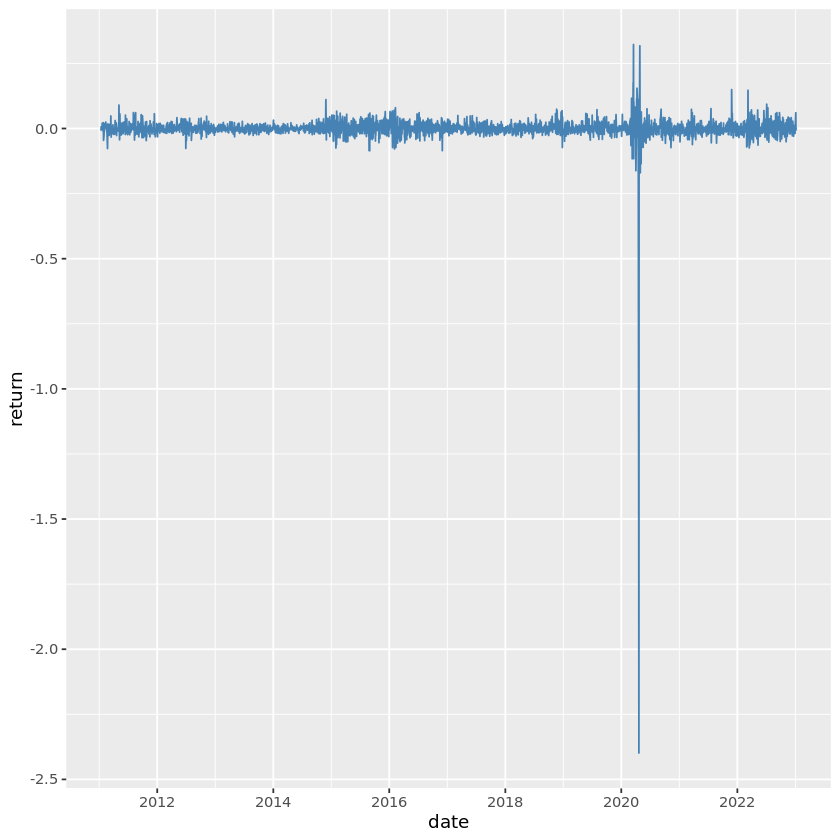

In [ ]:
p1 <- ggplot(daily_ret, aes(x=date, y=return))
p1 + geom_line(colour="steelblue")

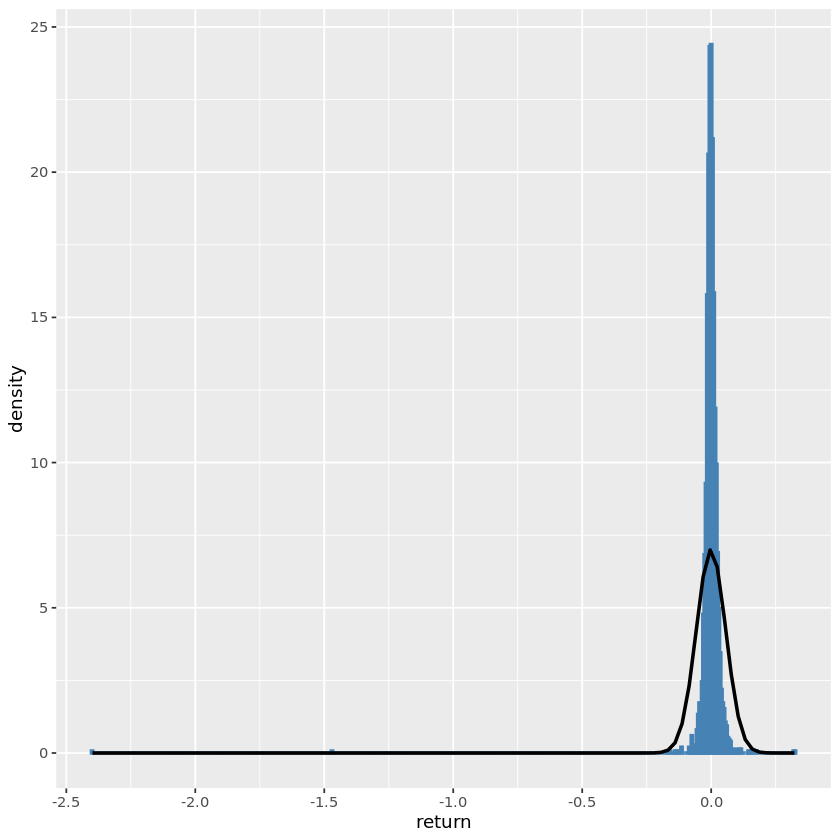

In [ ]:
p2 <- ggplot(daily_ret) 

p2 + geom_histogram(aes(x=return, y=..density..), binwidth = 0.005, color="steelblue", fill="grey", size=1) +
  stat_function(fun = dnorm, args = list(mean = mean(daily_ret$return, na.rm = T), sd = sd(daily_ret$return, na.rm = T)), size=1)

# 1. Skewness
# As we can see from the plot the return is not symmetrically distributed, 
#rather it is positive skewed (or right skewed). A positive skewness indicating on average it gives us a positive return. 
#But the level of skewness is not very high. p.s. If the distribution is highly right skewed we can use a log transformation to convert
# it into normal in avioding any misleading results.
# 2. Kurtosis
# The plot show us positive Kurtosis comparing with normal distribution. 
#Kurtosis can be used as a measure of risk. A large Kurtosis is associated with a high level of risk because it 
#indicates that there are high probabilities of extremely large and small returns (Heavy-tailed). 
#Meanwhile, a small kurtosis shows a moderate level of risk for the probabilities of extreme returns are relatively low.

In [ ]:
daily_ret_xts <- xts(daily_ret[,-1], order.by=daily_ret[,1])
realizedvol <- rollapply(daily_ret_xts, width = 20, FUN=sd.annualized)
vol <- data.frame(index(realizedvol), realizedvol)
colnames(vol) <- c("date", "volatility")

Warning message:
“Removed 19 row(s) containing missing values (geom_path).”


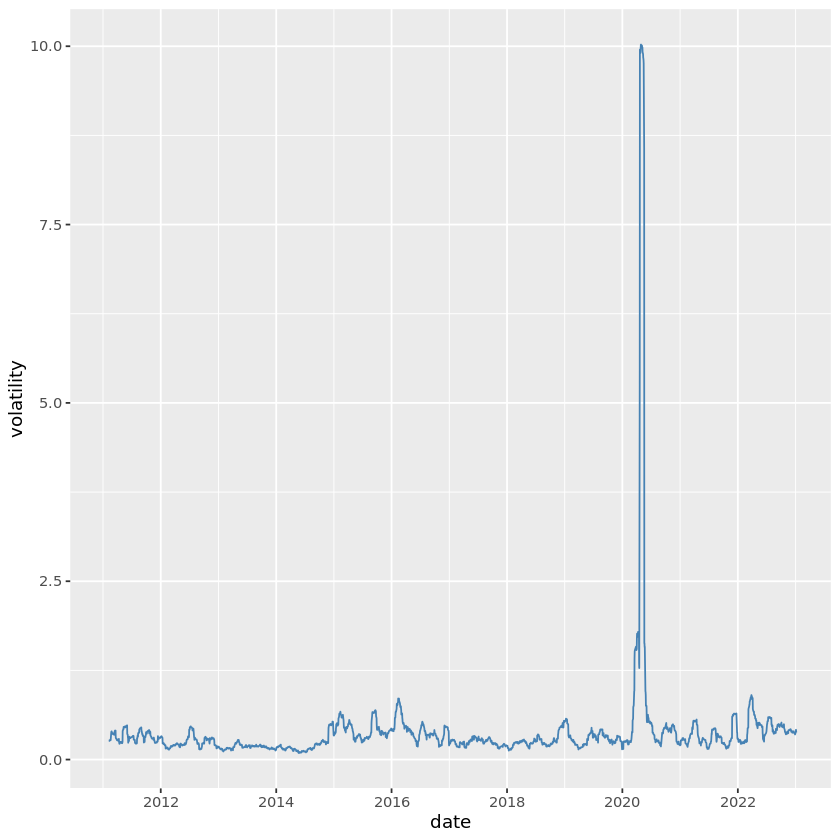

In [ ]:
p3 <- ggplot(vol, aes(x=date, y=volatility))
p3 +
  geom_line( color="steelblue")

In [ ]:
garch_spec <- ugarchspec(variance.model=list(model="sGARCH", garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0)),
distribution.model="norm") ##(non) normal innovation
fit_garch <- ugarchfit(spec = garch_spec, data = vol[-c(1:19),2])
fit_garch


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.256409    0.002680   95.686        0
omega   0.000476    0.000039   12.335        0
alpha1  0.962010    0.031326   30.709        0
beta1   0.000000    0.001214    0.000        1

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.256409    0.022912  11.1912 0.000000
omega   0.000476    0.000164   2.8931 0.003814
alpha1  0.962010    0.067030  14.3520 0.000000
beta1   0.000000    0.001515   0.0000 1.000000

LogLikelihood : 3239.926 

Information Criteria
------------------------------------
                    
Akaike       -2.1587
Bayes        -2.1507
Shibata      -2.1587
Hannan-Quinn -2.1558

Weig

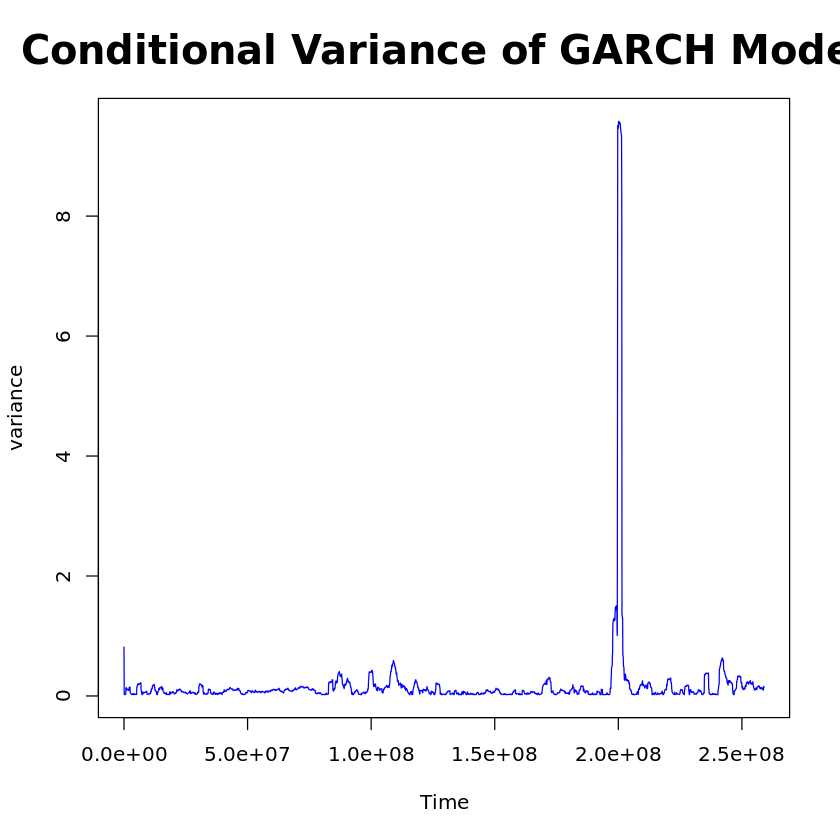

In [ ]:
#Conditional Volatility Plot for GARCH Model
plot.ts(sigma(fit_garch), ylab="variance", col="blue", main = "Conditional Variance of GARCH Model", cex.main=2)

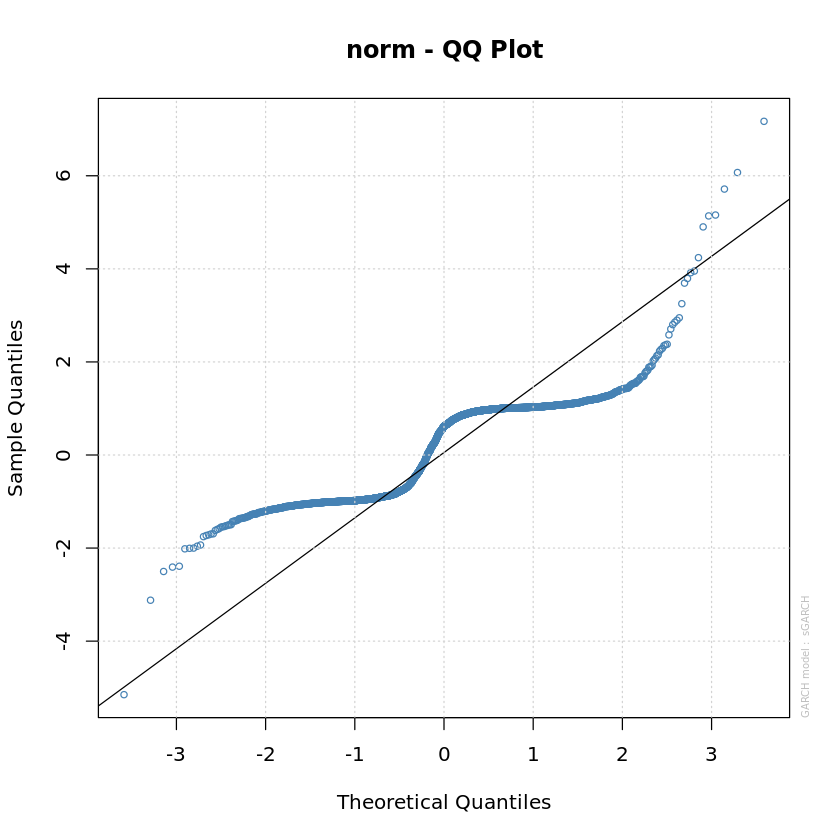

In [ ]:
plot(fit_garch, which=9)


please wait...calculating quantiles...


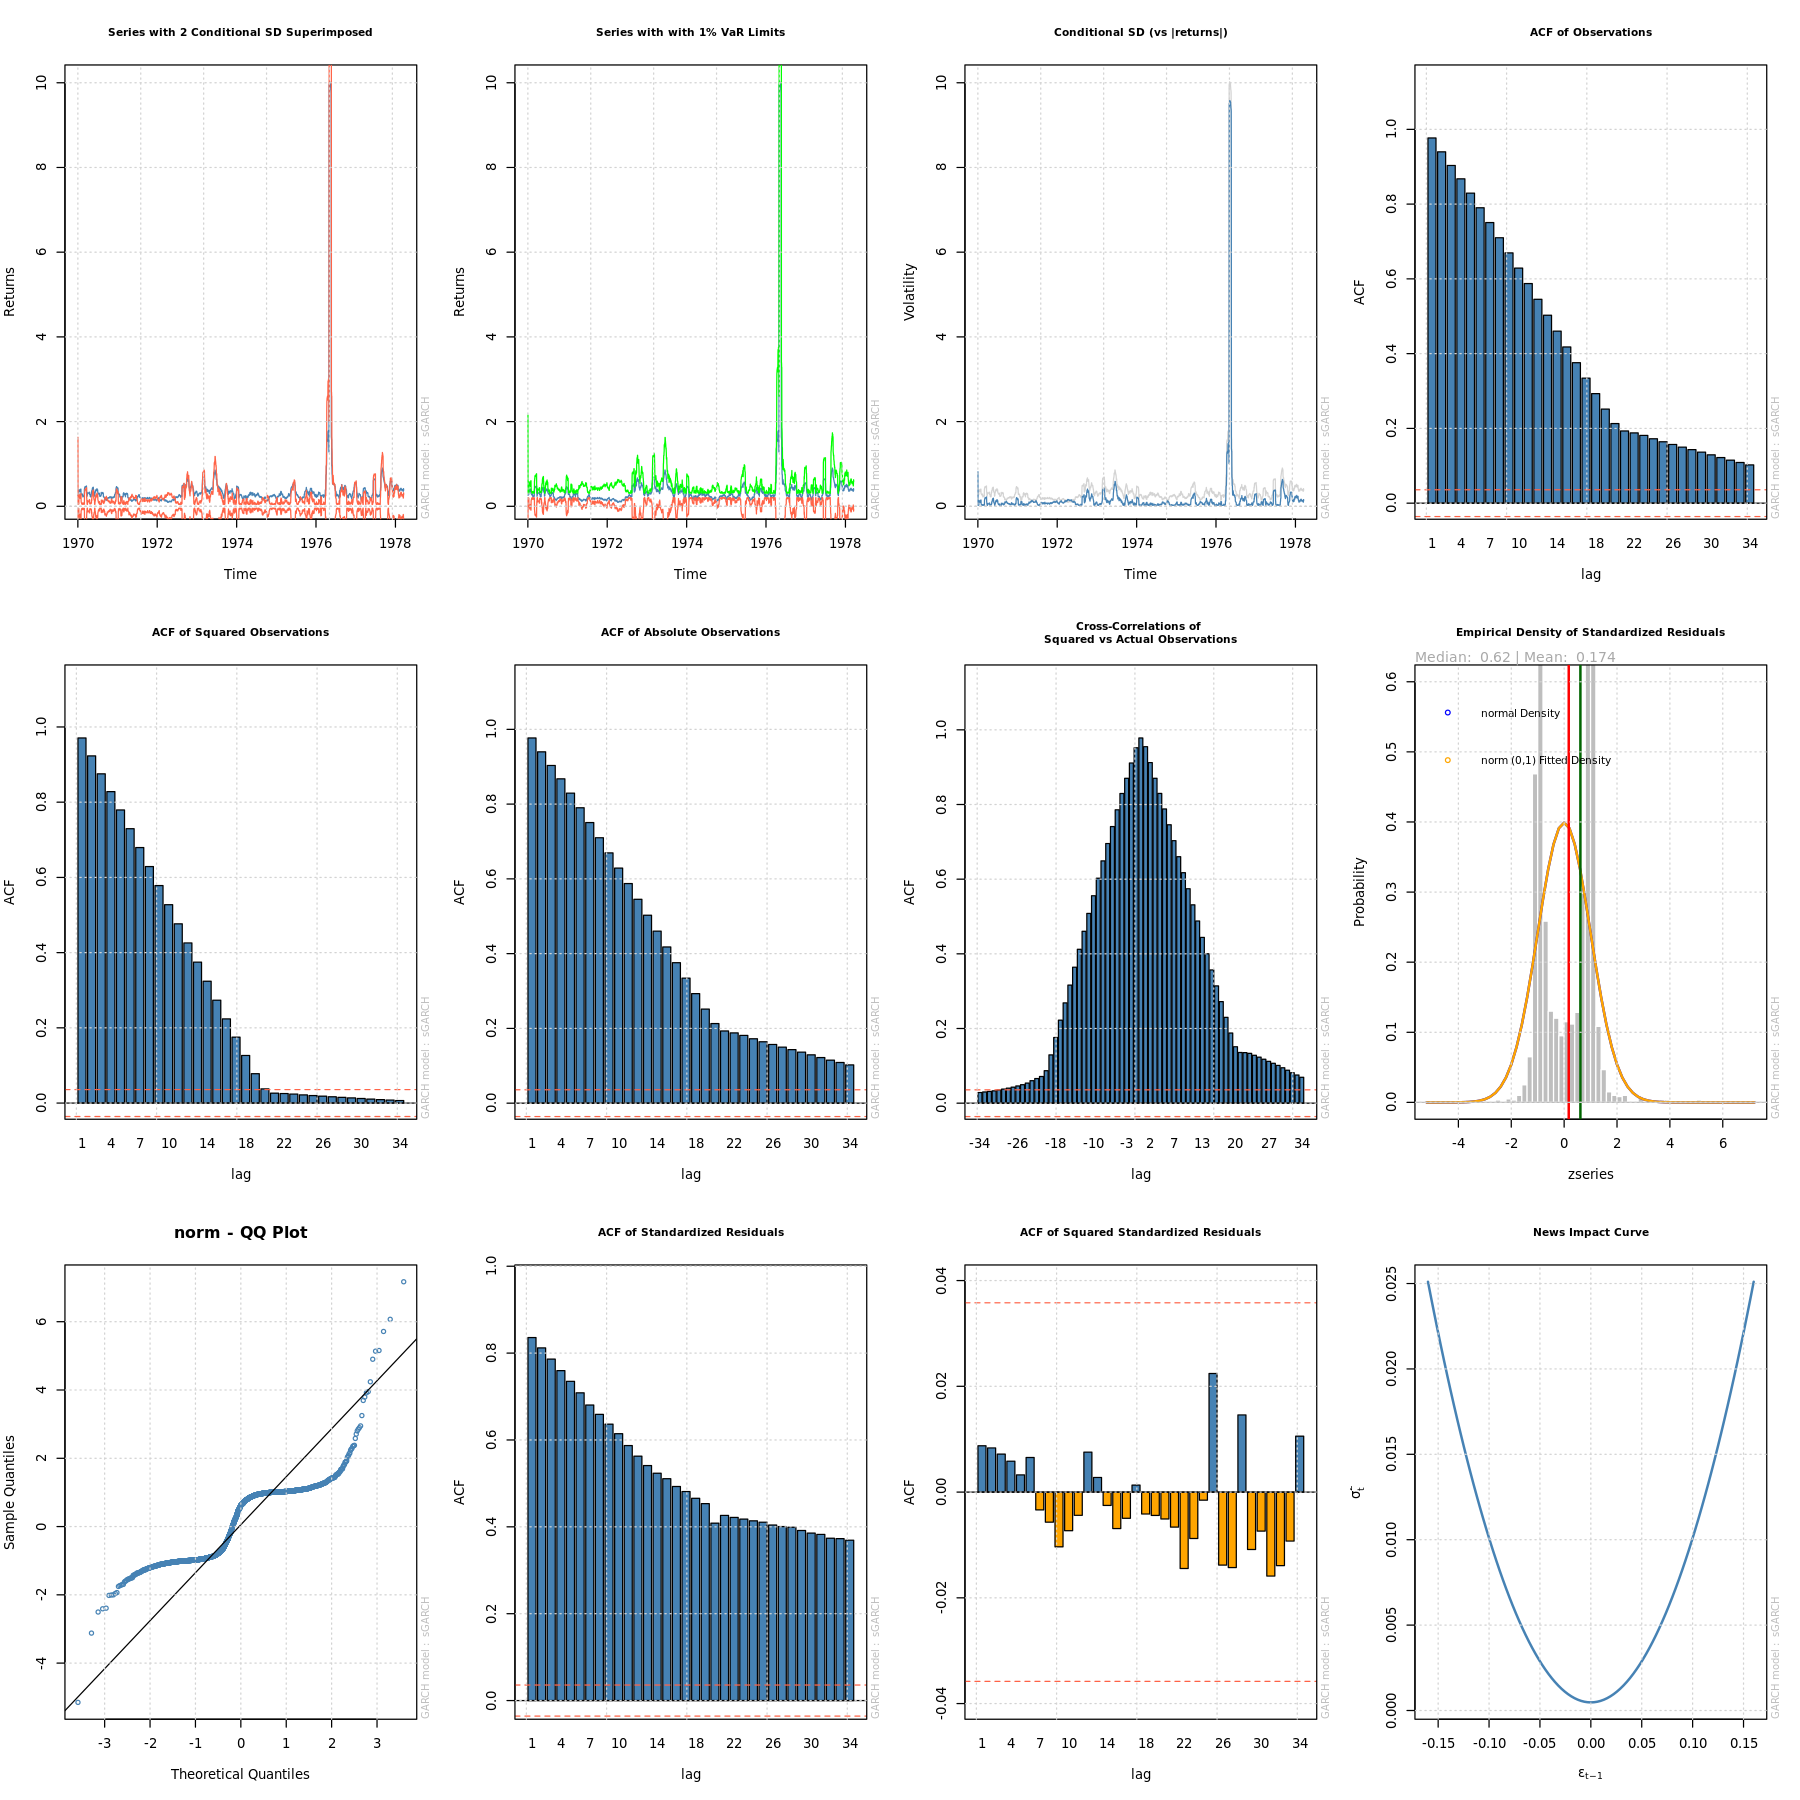

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)
plot(fit_garch, which= "all")

In [ ]:
####### financial indicators
## S&P500
sp <- getSymbols("^GSPC", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_sp = data.frame(date = index(sp), sp, row.names=NULL)
df_sp<- na.omit(df_sp)
df_sp.ts <- ts(df_sp$GSPC.Close, frequency=12)
df_sp.ts
## Nasdaq
nas <- getSymbols("^IXIC", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_nas = data.frame(date = index(nas), nas, row.names=NULL)
df_nas<- na.omit(df_nas)
df_nas.ts <- ts(df_nas$IXIC.Close, frequency=12)
df_nas.ts
## Gold futures
# gold <- getSymbols("GC=F", verbose = TRUE, src = "yahoo", 
#              from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
# df_gold = data.frame(date = index(gold), gold, row.names=NULL)
# df_gold<- na.omit(df_gold)
# df_gold.ts <- ts(df_gold$GC.F.Close, frequency=12)
# df_gold.ts

## EUR/US
eus <- getSymbols("EURUSD=X", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_eus = data.frame(date = index(eus), eus, row.names=NULL)
df_eus<- na.omit(df_eus)
df_eus <- head(df_eus, - 1)
df_eus.ts <- ts(df_eus$EURUSD.X.Close, frequency=12)
df_eus.ts
## 10-YR bond
tnx <- getSymbols("^TNX", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_tnx = data.frame(date = index(tnx), tnx, row.names=NULL)
df_tnx<- na.omit(df_tnx)
df_tnx.ts <- ts(df_tnx$TNX.Close, frequency=12)
df_tnx.ts



downloading  ^GSPC .....

done.


date       GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume 
1   2011-02-01 1289.14   1344.07   1289.14  1327.22     59223660000
2   2011-03-01 1328.64   1332.28   1249.05  1325.83     89507640000
3   2011-04-01 1329.48   1364.56   1294.70  1363.61     77364810000
4   2011-05-01 1365.21   1370.58   1311.80  1345.20     81708980000
5   2011-06-01 1345.20   1345.20   1258.07  1320.64     86122730000
6   2011-07-01 1320.64   1356.48   1282.86  1292.28     81102170000
7   2011-08-01 1292.59   1307.38   1101.54  1218.89    108419170000
8   2011-09-01 1219.12   1229.29   1114.22  1131.42    102786820000
9   2011-10-01 1131.21   1292.66   1074.77  1253.30     98063670000
10  2011-11-01 1251.00   1277.55   1158.66  1246.96     84275050000
11  2011-12-01 1246.91   1269.37   1202.37  1257.60     74742430000
12  2012-01-01 1258.86   1333.47   1258.86  1312.41     79567560000
13  2012-02-01 1312.45   1378.04   1312.45  1365.68     78385710000
14  2012-03-01 1365.90   1419.15   1340.03  1408.47     83899660000
15  2012-04-01 1408.47   1422.38   1357.38  1397.91     74761710000
16  2012-05-01 1397.86   1415.32   1291.98  1310.33     86920490000
17  2012-06-01 1309.87   1363.46   1266.74  1362.16     81582440000
18  2012-07-01 1362.33   1391.74   1325.41  1379.32     73103810000
19  2012-08-01 1379.32   1426.68   1354.65  1406.58     70283810000
20  2012-09-01 1406.54   1474.51   1396.56  1440.67     69784280000
21  2012-10-01 1440.90   1470.96   1403.28  1412.16     71752320000
22  2012-11-01 1412.20   1434.27   1343.35  1416.18     71489310000
23  2012-12-01 1416.34   1448.00   1398.11  1426.19     66388180000
24  2013-01-01 1426.19   1509.94   1426.19  1498.11     75848510000
25  2013-02-01 1498.11   1530.94   1485.01  1514.68     69273480000
26  2013-03-01 1514.68   1570.28   1501.48  1569.19     68527110000
27  2013-04-01 1569.18   1597.57   1536.03  1597.57     77098000000
28  2013-05-01 1597.55   1687.18   1581.28  1630.74     76447250000
29  2013-06-01 1631.71   1654.19   1560.33  1606.28     74946790000
30  2013-07-01 1609.78   1698.78   1604.57  1685.73     68106820000
⋮   ⋮          ⋮         ⋮         ⋮        ⋮          ⋮           
115 2020-08-01 3288.26   3514.77   3284.53  3500.31     82466520000
116 2020-09-01 3507.44   3588.11   3209.45  3363.00     92310780000
117 2020-10-01 3385.87   3549.85   3233.94  3269.96     89938980000
118 2020-11-01 3296.20   3645.99   3279.74  3621.63    101247180000
119 2020-12-01 3645.87   3760.20   3633.40  3756.07     96375680000
120 2021-01-01 3764.61   3870.90   3662.71  3714.24    106117800000
121 2021-02-01 3731.17   3950.43   3725.62  3811.15     99082320000
122 2021-03-01 3842.51   3994.41   3723.34  3972.89    122371150000
123 2021-04-01 3992.78   4218.78   3992.78  4181.17     83124090000
124 2021-05-01 4191.98   4238.04   4056.88  4204.11     88321860000
125 2021-06-01 4216.52   4302.43   4164.40  4297.50    102544180000
126 2021-07-01 4300.73   4429.97   4233.13  4395.26     84255620000
127 2021-08-01 4406.86   4537.36   4367.73  4522.68     80500760000
128 2021-09-01 4528.80   4545.85   4305.91  4307.54     85528860000
129 2021-10-01 4317.16   4608.08   4278.94  4605.38     80253600000
130 2021-11-01 4610.62   4743.83   4560.00  4567.00     88268840000
131 2021-12-01 4602.82   4808.93   4495.12  4766.18     92750180000
132 2022-01-01 4778.14   4818.62   4222.62  4515.55     95562890000
133 2022-02-01 4519.57   4595.31   4114.65  4373.94     92667710000
134 2022-03-01 4363.14   4637.30   4157.87  4530.41    123546260000
135 2022-04-01 4540.32   4593.45   4124.28  4131.93     90367840000
136 2022-05-01 4130.61   4307.66   3810.32  4132.15    108860390000
137 2022-06-01 4149.78   4177.51   3636.87  3785.38    106116710000
138 2022-07-01 3781.00   4140.15   3721.56  4130.29     81688320000
139 2022-08-01 4112.38   4325.28   3954.53  3955.00     92252350000
140 2022-09-01 3936.73   4119.28   3584.13  3585.62     94241020000
141 2022-10-01 3609.78   3905.42   3491.58  3871.98     9582

Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep    
1  1327.22 1325.83 1363.61 1345.20 1320.64 1292.28 1218.89 1131.42 1253.30
2  1365.68 1408.47 1397.91 1310.33 1362.16 1379.32 1406.58 1440.67 1412.16
3  1514.68 1569.19 1597.57 1630.74 1606.28 1685.73 1632.97 1681.55 1756.54
4  1859.45 1872.34 1883.95 1923.57 1960.23 1930.67 2003.37 1972.29 2018.05
5  2104.50 2067.89 2085.51 2107.39 2063.11 2103.84 1972.18 1920.03 2079.36
6  1932.23 2059.74 2065.30 2096.95 2098.86 2173.60 2170.95 2168.27 2126.15
7  2363.64 2362.72 2384.20 2411.80 2423.41 2470.30 2471.65 2519.36 2575.26
8  2713.83 2640.87 2648.05 2705.27 2718.37 2816.29 2901.52 2913.98 2711.74
9  2784.49 2834.40 2945.83 2752.06 2941.76 2980.38 2926.46 2976.74 3037.56
10 2954.22 2584.59 2912.43 3044.31 3100.29 3271.12 3500.31 3363.00 3269.96
11 3811.15 3972.89 4181.17 4204.11 4297.50 4395.26 4522.68 4307.54 4605.38
12 4373.94 4530.41 4131.93 4132.15 3785.38 4130.29 3955.00 3585.62 3871.98
   Oct     Nov     Dec    
1  1246.96 1257.60 1312.41
2  1416.18 1426.19 1498.11
3  1805.81 1848.36 1782.59
4  2067.56 2058.90 1994.99
5  2080.41 2043.94 1940.24
6  2198.81 2238.83 2278.87
7  2647.58 2673.61 2823.81
8  2760.17 2506.85 2704.10
9  3140.98 3230.78 3225.52
10 3621.63 3756.07 3714.24
11 4567.00 4766.18 4515.55
12 4080.11 3839.50 3895.08

downloading  ^IXIC .....

done.


Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
1   2782.27  2781.07  2873.54  2835.30  2773.52  2756.38  2579.46  2415.40
2   2966.89  3091.57  3046.36  2827.34  2935.05  2939.52  3066.96  3116.23
3   3160.19  3267.52  3328.79  3455.91  3403.25  3626.37  3589.87  3771.48
4   4308.12  4198.99  4114.56  4242.62  4408.18  4369.77  4580.27  4493.39
5   4963.53  4900.88  4941.42  5070.03  4986.87  5128.28  4776.51  4620.16
6   4557.95  4869.85  4775.36  4948.05  4842.67  5162.13  5213.22  5312.00
7   5825.44  5911.74  6047.61  6198.52  6140.42  6348.12  6428.66  6495.96
8   7273.01  7063.45  7066.27  7442.12  7510.30  7671.79  8109.54  8046.35
9   7532.53  7729.32  8095.39  7453.15  8006.24  8175.42  7962.88  7999.34
10  8567.37  7700.10  8889.55  9489.87 10058.77 10745.27 11775.46 11167.51
11 13192.35 13246.87 13962.68 13748.74 14503.95 14672.68 15259.24 14448.58
12 13751.40 14220.52 12334.64 12081.39 11028.74 12390.69 11816.20 10575.62
   Sep      Oct      Nov      Dec     
1   2684.41  2620.34  2605.15  2813.84
2   2977.23  3010.24  3019.51  3142.13
3   3919.71  4059.89  4176.59  4103.88
4   4630.74  4791.63  4736.05  4635.24
5   5053.75  5108.67  5007.41  4613.95
6   5189.14  5323.68  5383.12  5614.79
7   6727.67  6873.97  6903.39  7411.48
8   7305.90  7330.54  6635.28  7281.74
9   8292.36  8665.47  8972.60  9150.94
10 10911.59 12198.74 12888.28 13070.69
11 15498.39 15537.69 15644.97 14239.88
12 10988.15 11468.00 10466.48 10569.29

downloading  EURUSD=X .....

done.


Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
1  1.373438 1.412130 1.482096 1.432234 1.447890 1.433199 1.443314 1.358585
2  1.347800 1.334508 1.324152 1.237471 1.266496 1.225941 1.251095 1.284505
3  1.315097 1.280787 1.309586 1.304393 1.301304 1.326489 1.322401 1.349546
4  1.370746 1.375213 1.381368 1.363457 1.364443 1.339603 1.313456 1.269084
5  1.119796 1.083025 1.111432 1.096035 1.122297 1.093924 1.121403 1.125594
6  1.092395 1.133466 1.144833 1.114840 1.112805 1.116807 1.115324 1.121957
7  1.058425 1.068707 1.090750 1.117169 1.144165 1.174729 1.189343 1.174164
8  1.223032 1.233198 1.212283 1.166725 1.170494 1.170741 1.166466 1.162304
9  1.138019 1.123305 1.118518 1.113115 1.139095 1.115797 1.101200 1.094271
10 1.103000 1.103047 1.087725 1.111000 1.124720 1.187225 1.191824 1.174205
11 1.207361 1.172360 1.212709 1.219007 1.190193 1.186780 1.179690 1.160160
12 1.118105 1.116184 1.054630 1.077354 1.044659 1.022704 1.002506 0.982956
   Sep      Oct      Nov      Dec     
1  1.414007 1.332410 1.295605 1.313957
2  1.296260 1.297353 1.322769 1.356834
3  1.372401 1.359398 1.381006 1.355877
4  1.261336 1.243797 1.216205 1.128796
5  1.100897 1.058302 1.093398 1.082591
6  1.098467 1.064849 1.052000 1.070859
7  1.165270 1.185199 1.200005 1.240957
8  1.134636 1.139277 1.143995 1.148765
9  1.115449 1.102000 1.120230 1.102913
10 1.167679 1.197146 1.229990 1.213900
11 1.156136 1.129344 1.132503 1.115237
12 0.995500 1.032450 1.072846 1.052222

downloading  ^TNX .....

done.


Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  
1  3.414 3.454 3.296 3.050 3.158 2.805 2.218 1.924 2.175 2.068 1.871 1.799
2  1.977 2.216 1.915 1.581 1.659 1.492 1.562 1.637 1.686 1.606 1.756 1.985
3  1.888 1.852 1.675 2.164 2.478 2.593 2.749 2.615 2.542 2.741 3.026 2.668
4  2.658 2.723 2.648 2.457 2.516 2.556 2.343 2.508 2.335 2.194 2.170 1.675
5  2.002 1.934 2.046 2.095 2.335 2.205 2.200 2.060 2.151 2.218 2.269 1.931
6  1.740 1.786 1.819 1.834 1.488 1.458 1.568 1.608 1.834 2.368 2.446 2.451
7  2.358 2.396 2.282 2.196 2.302 2.292 2.121 2.326 2.376 2.417 2.405 2.720
8  2.868 2.741 2.936 2.822 2.849 2.964 2.853 3.056 3.159 3.013 2.686 2.635
9  2.711 2.414 2.509 2.142 2.000 2.021 1.506 1.675 1.691 1.776 1.919 1.520
10 1.127 0.698 0.622 0.648 0.653 0.536 0.693 0.677 0.860 0.844 0.917 1.093
11 1.460 1.746 1.631 1.581 1.443 1.239 1.304 1.529 1.557 1.443 1.512 1.782
12 1.839 2.327 2.887 2.844 2.972 2.642 3.133 3.804 4.077 3.703 3.879 3.569

In [ ]:
oil_price <- Quandl("EIA/STEO_RAIMUUS_M", start_date=start_date, end_date=end_date, collapse="monthly")
#oil_price <- na.omit(oil_price)
oil_price

Date       Value 
1   2022-12-31 67.25 
2   2022-11-30 68.25 
3   2022-10-31 69.25 
4   2022-09-30 72.25 
5   2022-08-31 76.00 
6   2022-07-31 78.00 
7   2022-06-30 80.00 
8   2022-05-31 81.00 
9   2022-04-30 82.50 
10  2022-03-31 82.50 
11  2022-02-28 84.50 
12  2022-01-31 80.97 
13  2021-12-31 69.71 
14  2021-11-30 72.47 
15  2021-10-31 76.08 
16  2021-09-30 69.26 
17  2021-08-31 65.66 
18  2021-07-31 69.88 
19  2021-06-30 68.85 
20  2021-05-31 63.81 
21  2021-04-30 60.86 
22  2021-03-31 59.78 
23  2021-02-28 55.67 
24  2021-01-31 49.52 
25  2020-12-31 45.34 
26  2020-11-30 39.15 
27  2020-10-31 37.81 
28  2020-09-30 38.73 
29  2020-08-31 41.72 
30  2020-07-31 39.33 
⋮   ⋮          ⋮     
115 2013-06-30  97.17
116 2013-05-31  98.50
117 2013-04-30  96.45
118 2013-03-31  99.11
119 2013-02-28  99.23
120 2013-01-31  97.91
121 2012-12-31  93.70
122 2012-11-30  98.07
123 2012-10-31 100.92
124 2012-09-30 101.82
125 2012-08-31  97.04
126 2012-07-31  92.99
127 2012-06-30  92.18
128 2012-05-31 103.26
129 2012-04-30 108.54
130 2012-03-31 111.00
131 2012-02-29 108.08
132 2012-01-31 105.25
133 2011-12-31 106.52
134 2011-11-30 107.67
135 2011-10-31 101.99
136 2011-09-30 101.05
137 2011-08-31  99.00
138 2011-07-31 105.94
139 2011-06-30 105.38
140 2011-05-31 107.98
141 2011-04-30 113.02
142 2011-03-31 102.43
143 2011-02-28  91.42
144 2011-01-31  87.61

In [ ]:
brent_price <- read.csv("Europe_Brent_Spot_Price_FOB.csv")
brent_price <- na.omit(brent_price)
brent_price

Month    Europe.Brent.Spot.Price.FOB.Dollars.per.Barrel
1   Dec 2022  80.92                                        
2   Nov 2022  91.42                                        
3   Oct 2022  93.33                                        
4   Sep 2022  89.76                                        
5   Aug 2022 100.45                                        
6   Jul 2022 111.93                                        
7   Jun 2022 122.71                                        
8   May 2022 113.34                                        
9   Apr 2022 104.58                                        
10  Mar 2022 117.25                                        
11  Feb 2022  97.13                                        
12  Jan 2022  86.51                                        
13  Dec 2021  74.17                                        
14  Nov 2021  81.05                                        
15  Oct 2021  83.54                                        
16  Sep 2021  74.49                                        
17  Aug 2021  70.75                                        
18  Jul 2021  75.17                                        
19  Jun 2021  73.16                                        
20  May 2021  68.53                                        
21  Apr 2021  64.81                                        
22  Mar 2021  65.41                                        
23  Feb 2021  62.28                                        
24  Jan 2021  54.77                                        
25  Dec 2020  49.99                                        
26  Nov 2020  42.69                                        
27  Oct 2020  40.19                                        
28  Sep 2020  40.91                                        
29  Aug 2020  44.74                                        
30  Jul 2020  43.24                                        
⋮   ⋮        ⋮                                             
115 Jun 2013 102.92                                        
116 May 2013 102.56                                        
117 Apr 2013 102.25                                        
118 Mar 2013 108.47                                        
119 Feb 2013 116.05                                        
120 Jan 2013 112.96                                        
121 Dec 2012 109.49                                        
122 Nov 2012 109.06                                        
123 Oct 2012 111.71                                        
124 Sep 2012 112.86                                        
125 Aug 2012 113.36                                        
126 Jul 2012 102.62                                        
127 Jun 2012  95.16                                        
128 May 2012 110.34                                        
129 Apr 2012 119.75                                        
130 Mar 2012 125.45                                        
131 Feb 2012 119.33                                        
132 Jan 2012 110.69                                        
133 Dec 2011 107.87                                        
134 Nov 2011 110.77                                        
135 Oct 2011 109.55                                        
136 Sep 2011 112.83                                        
137 Aug 2011 110.22                                        
138 Jul 2011 116.97                                        
139 Jun 2011 113.83                                        
140 May 2011 114.99                                        
141 Apr 2011 123.26                                        
142 Mar 2011 114.64                                        
143 Feb 2011 103.72                                        
144 Jan 2011  96.52

In [ ]:
### search data
Quandl.search("oil brent price")

Crude Oil Prices: Brent - Europe
Code: FRED/ACOILBRENTEU
Desc: Dollars per Barrel Not Seasonally Adjusted, Definitions, Sources and Explanatory http://www.eia.doe.gov/dnav/pet/TblDefs/pet_pri_spt_tbldef2.asp 
Freq: annual
Cols: Date | Value

Crude Oil Prices: Brent - Europe
Code: FRED/MCOILBRENTEU
Desc: Dollars per Barrel Not Seasonally Adjusted, Definitions, Sources and Explanatory http://www.eia.doe.gov/dnav/pet/TblDefs/pet_pri_spt_tbldef2.asp 
Freq: monthly
Cols: Date | Value

Crude Oil Prices: Brent - Europe
Code: FRED/DCOILBRENTEU
Desc: Dollars per Barrel Not Seasonally Adjusted, Definitions, Sources and Explanatory http://www.eia.doe.gov/dnav/pet/TblDefs/pet_pri_spt_tbldef2.asp 
Freq: daily
Cols: Date | Value

Crude Oil Prices: Brent - Europe
Code: FRED/WCOILBRENTEU
Desc: Dollars per Barrel Not Seasonally Adjusted, Definitions, Sources and Explanatory http://www.eia.doe.gov/dnav/pet/TblDefs/pet_pri_spt_tbldef2.asp 
Freq: weekly
Cols: Date | Value

International Liquids ; Crude Oi

In [ ]:
###### short term indicators
## inventory levels
#stock <- Quandl("JODI/OIL_CRSCBK_USA", start_date=start_date, end_date=end_date, collapse="monthly")
#stock

## refiner profit markets

## supply growth vs demand growth



In [ ]:
#stock <- na.omit(stock)
#stock

In [ ]:
######long term indicators
## prices vs marginal cost

## balance supply demand

## forward curve pricing

#####be secularly aware but not cyclically blind and the reverse

In [ ]:
oil_price$Value

[1]  67.25  68.25  69.25  72.25  76.00  78.00  80.00  81.00  82.50  82.50
 [11]  84.50  80.97  69.71  72.47  76.08  69.26  65.66  69.88  68.85  63.81
 [21]  60.86  59.78  55.67  49.52  45.34  39.15  37.81  38.73  41.72  39.33
 [31]  36.14  22.56  16.74  28.50  47.39  53.87  56.85  55.27  54.44  57.31
 [41]  55.41  59.18  58.16  65.03  65.42  61.14  56.66  49.71  42.80  54.40
 [51]  67.79  66.70  65.48  66.62  66.82  65.89  61.24  56.82  58.03  59.71
 [61]  57.44  56.30  51.40  50.46  47.62  44.76  44.03  47.21  47.47  46.53
 [71]  49.38  48.12  46.72  41.80  44.76  40.86  41.21  41.48  44.13  40.88
 [81]  35.90  32.24  26.66  27.48  33.16  39.05  42.03  41.12  43.23  52.42
 [91]  58.89  57.51  51.62  47.22  47.18  44.74  57.36  74.34  82.75  89.38
[101]  93.23  98.75 100.26  98.46  97.33  97.13  96.10  89.71  90.57  90.36
[111]  97.84 103.49 104.16 101.56  97.17  98.50  96.45  99.11  99.23  97.91
[121]  93.70  98.07 100.92 101.82  97.04  92.99  92.18 103.26 108.54 111.00
[131] 108.08 105.25 106.52 107.67 101.99 101.05  99.00 105.94 105.38 107.98
[141] 113.02 102.43  91.42  87.61

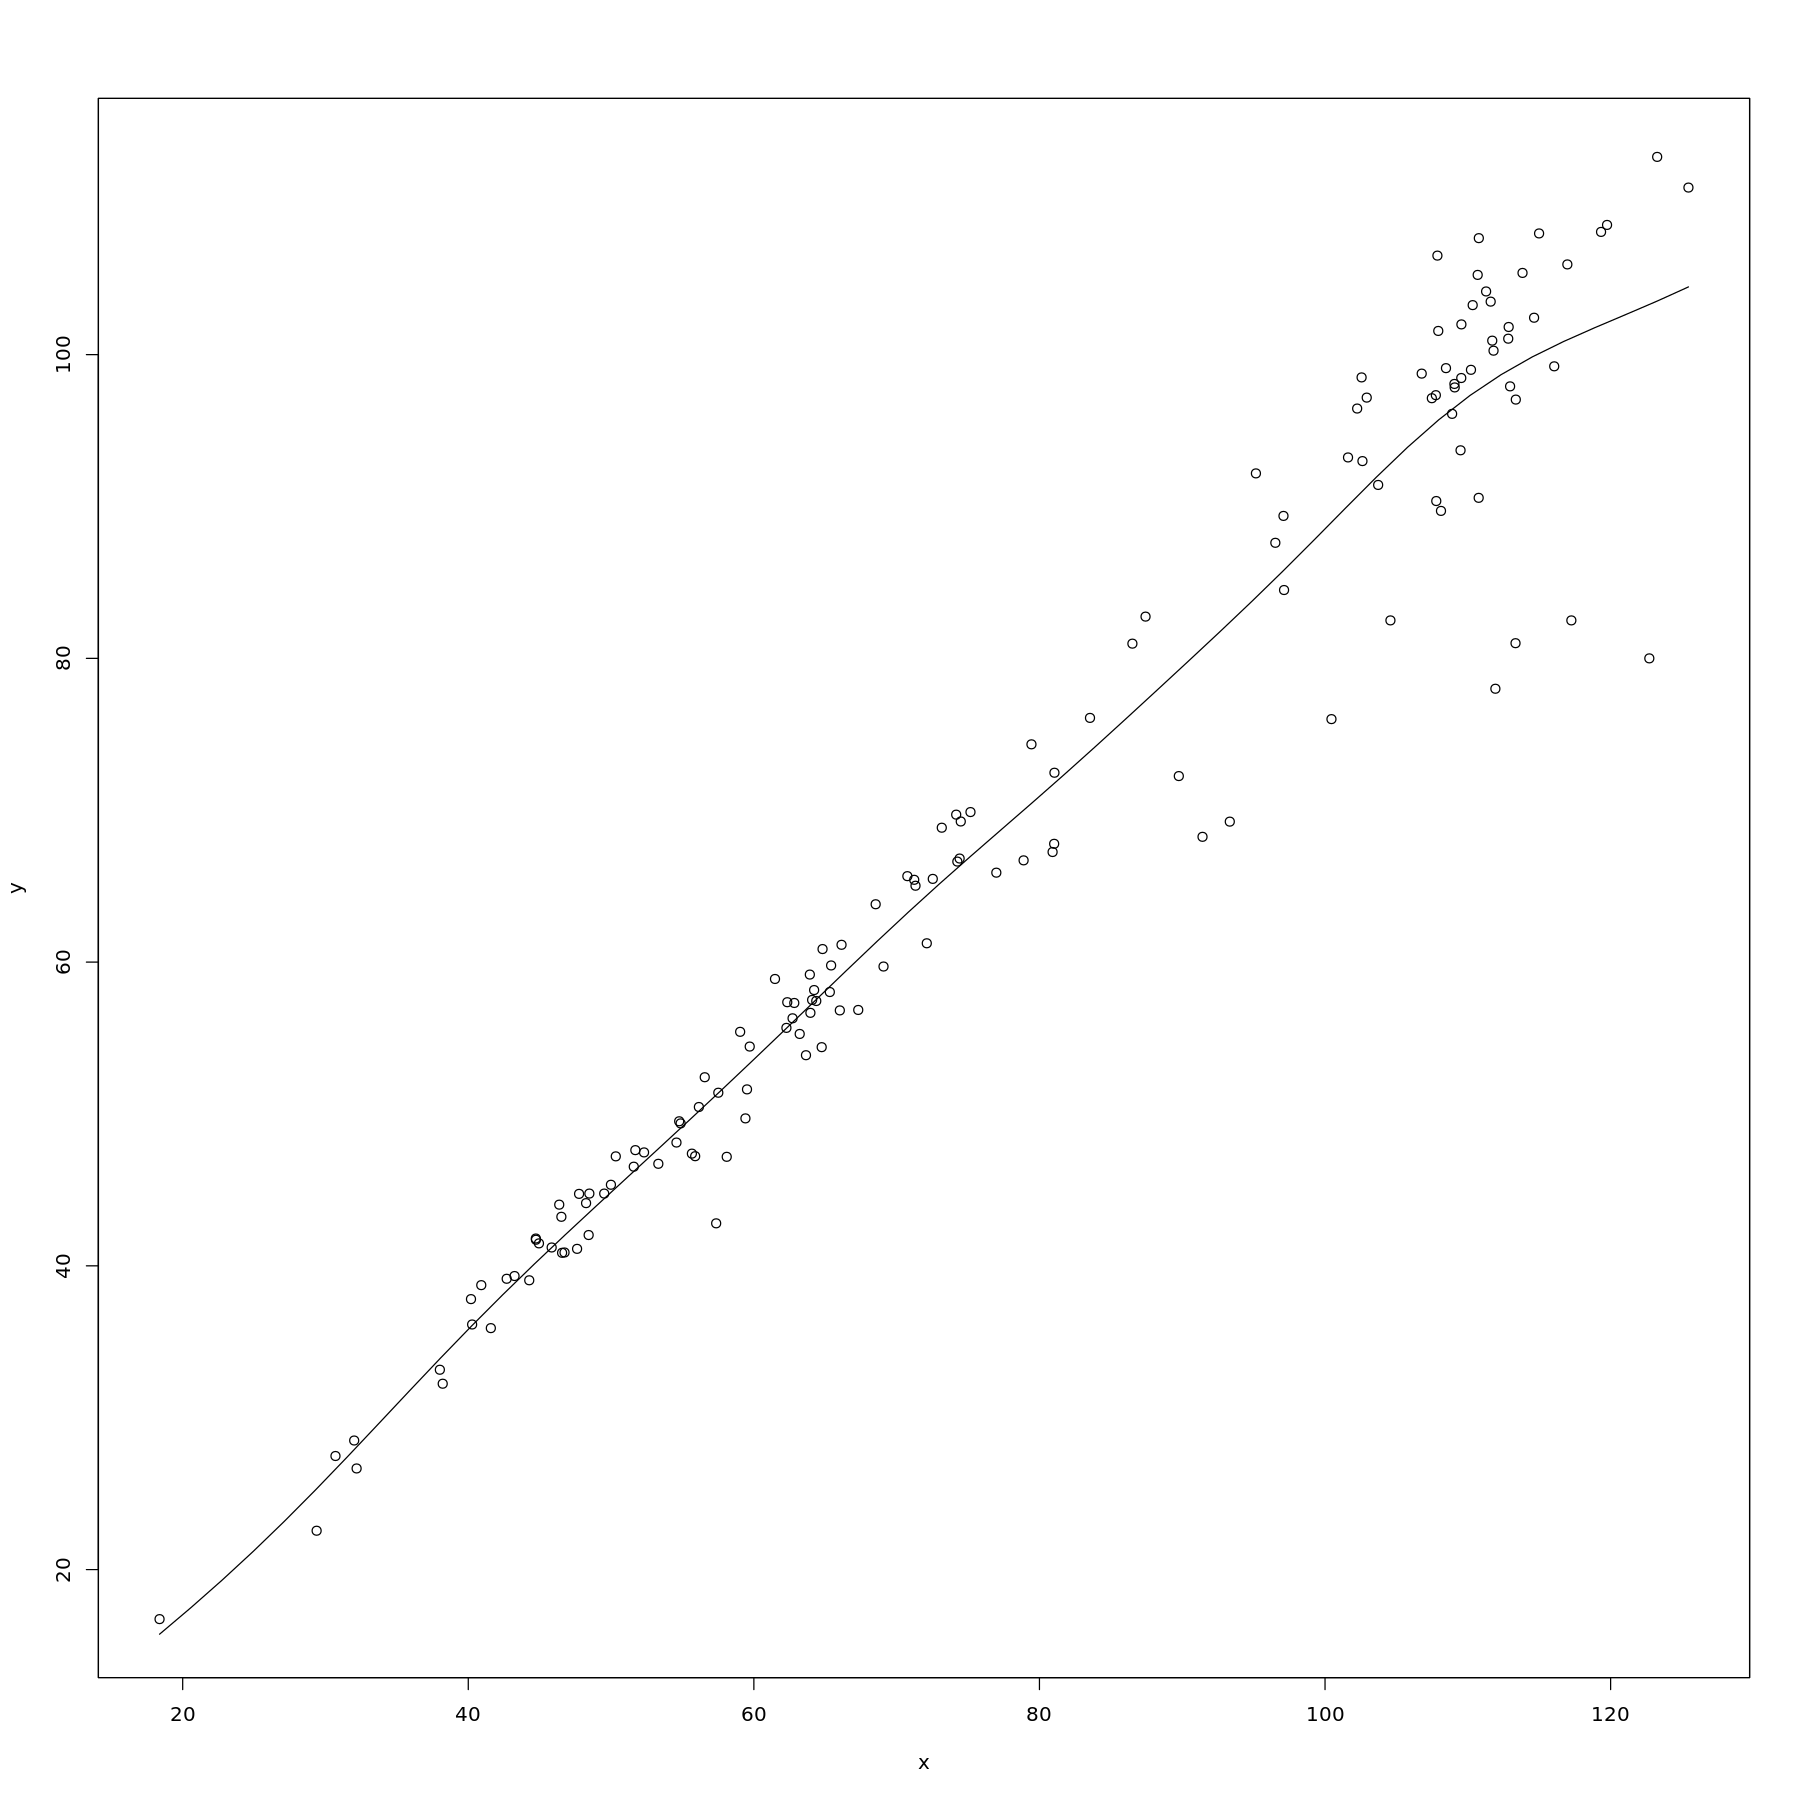

In [ ]:
#-----analysis of variable
#Local regression
y <- oil_price$Value
x <- brent_price$Europe.Brent.Spot.Price.FOB.Dollars.per.Barrel

plot(x,y)
sm.regression(x, y,   h = 10, add = T)

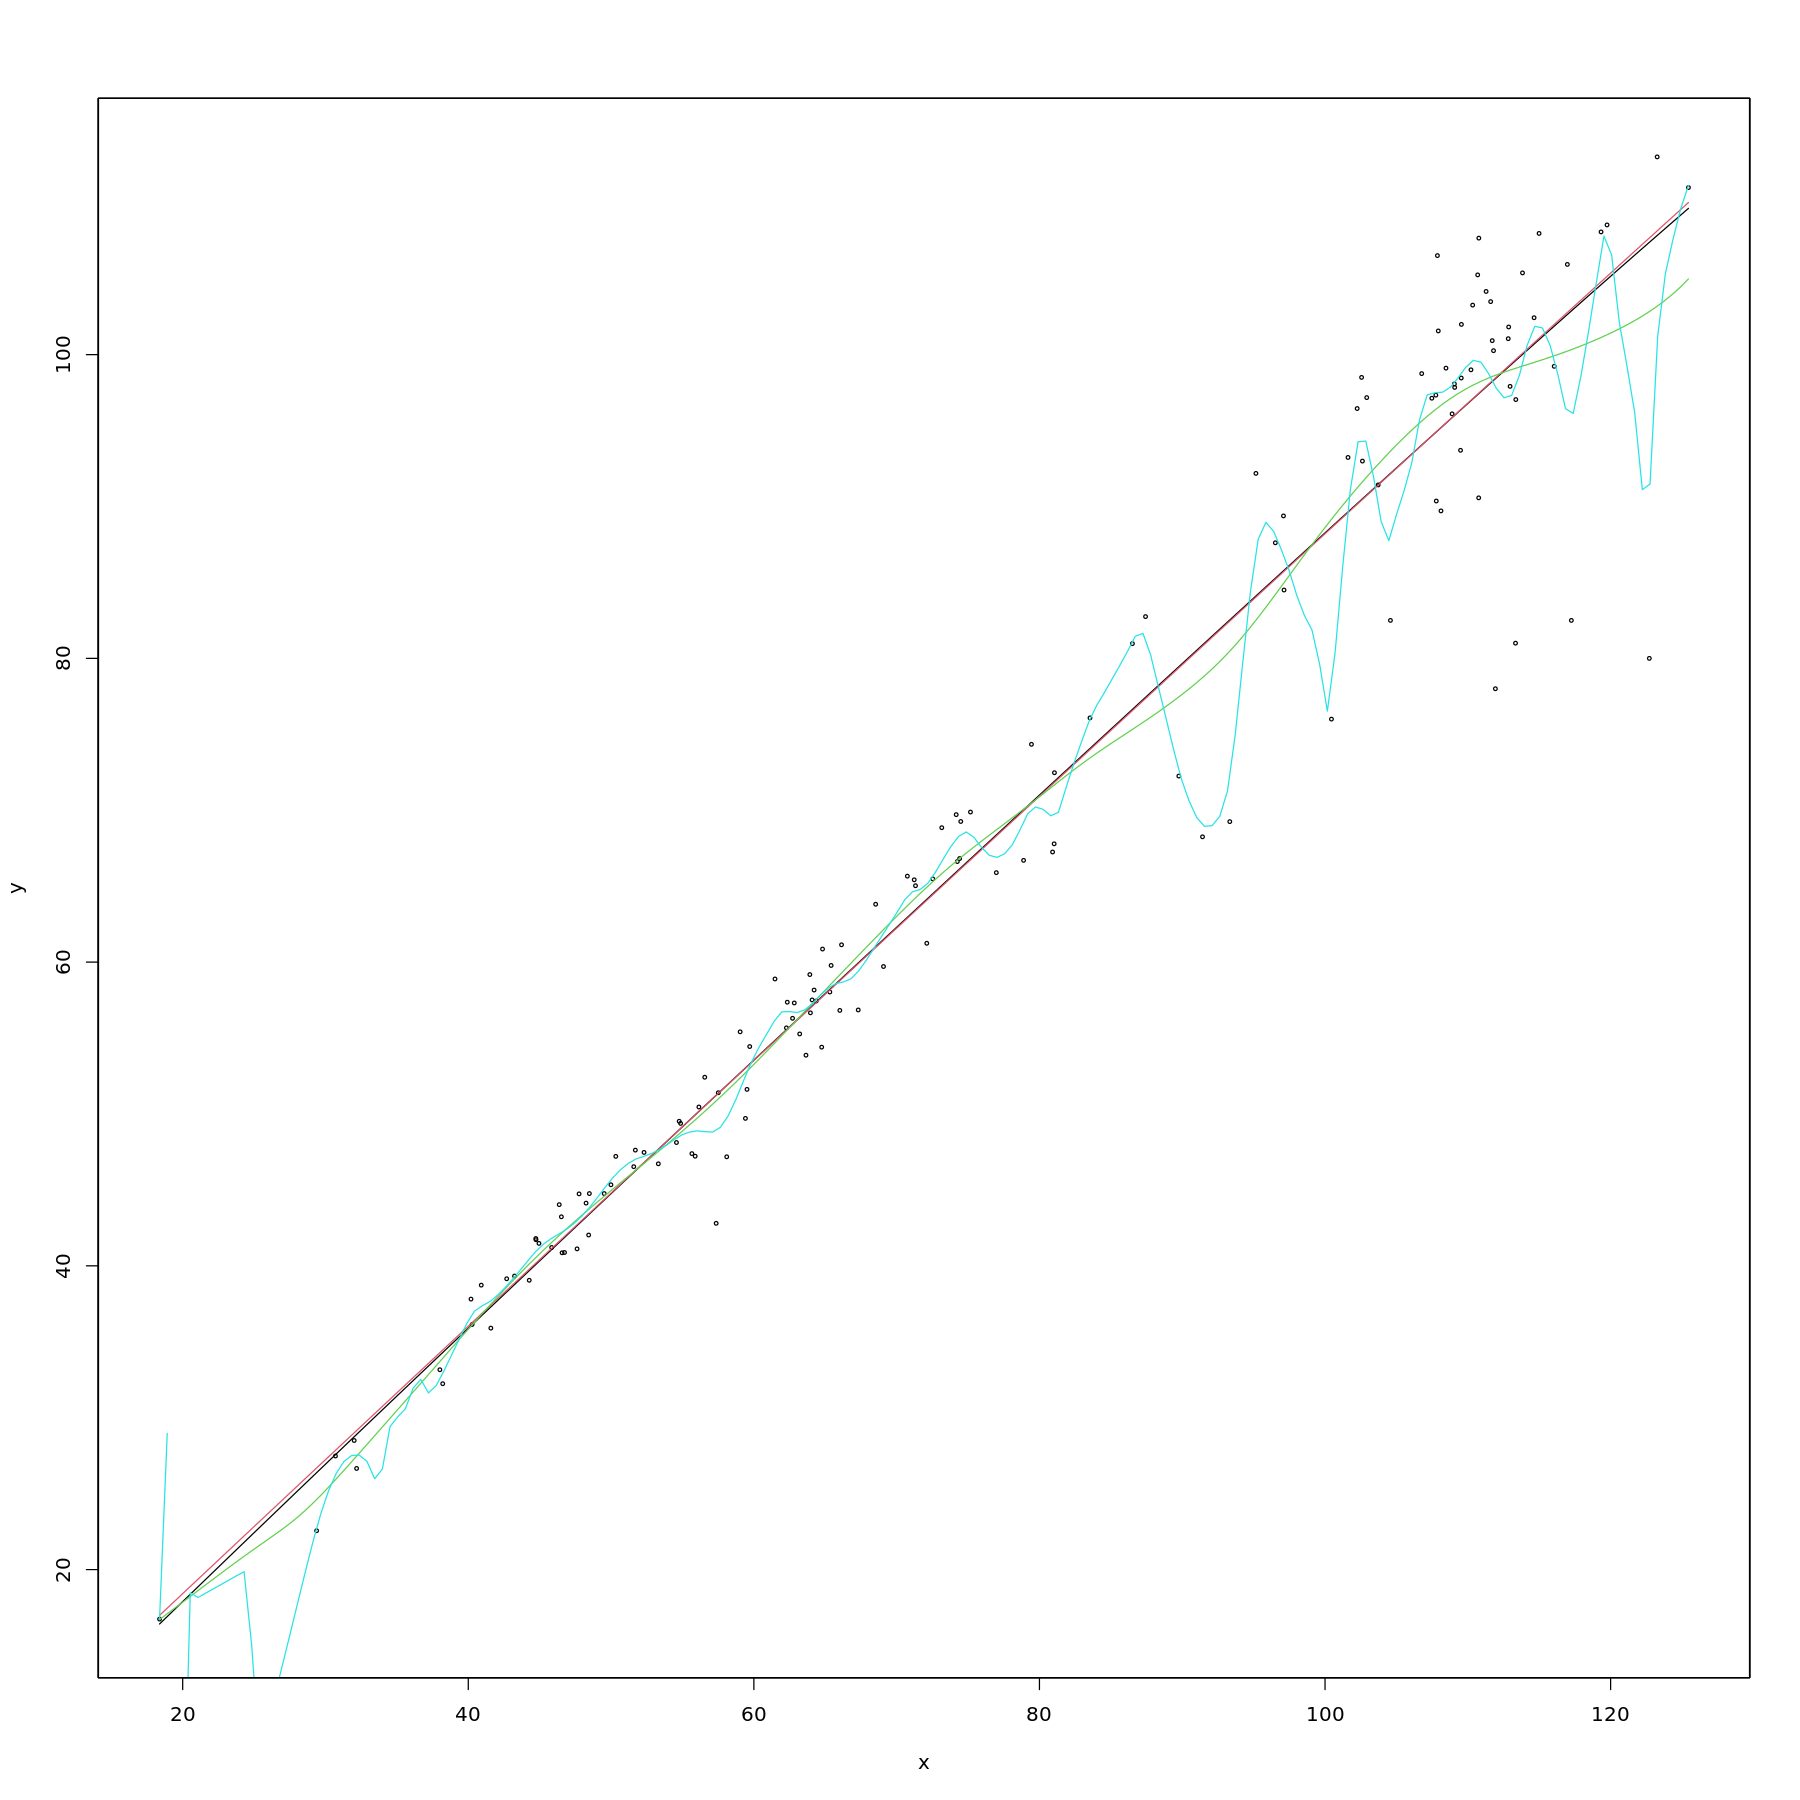

In [ ]:
#We try with different values for h
#increasing the value of h we have a smoother function, a lower value of h implies a jumpy function

sm.regression(x, y,   h = 30, ngrid=200, col=1)
sm.regression(x, y,   h = 50, add = T, ngrid=200, col=2)
sm.regression(x, y,   h = 5,  add = T, ngrid=200, col=3)
sm.regression(x, y,   h = 1,  add = T, col=5, ngrid=200)

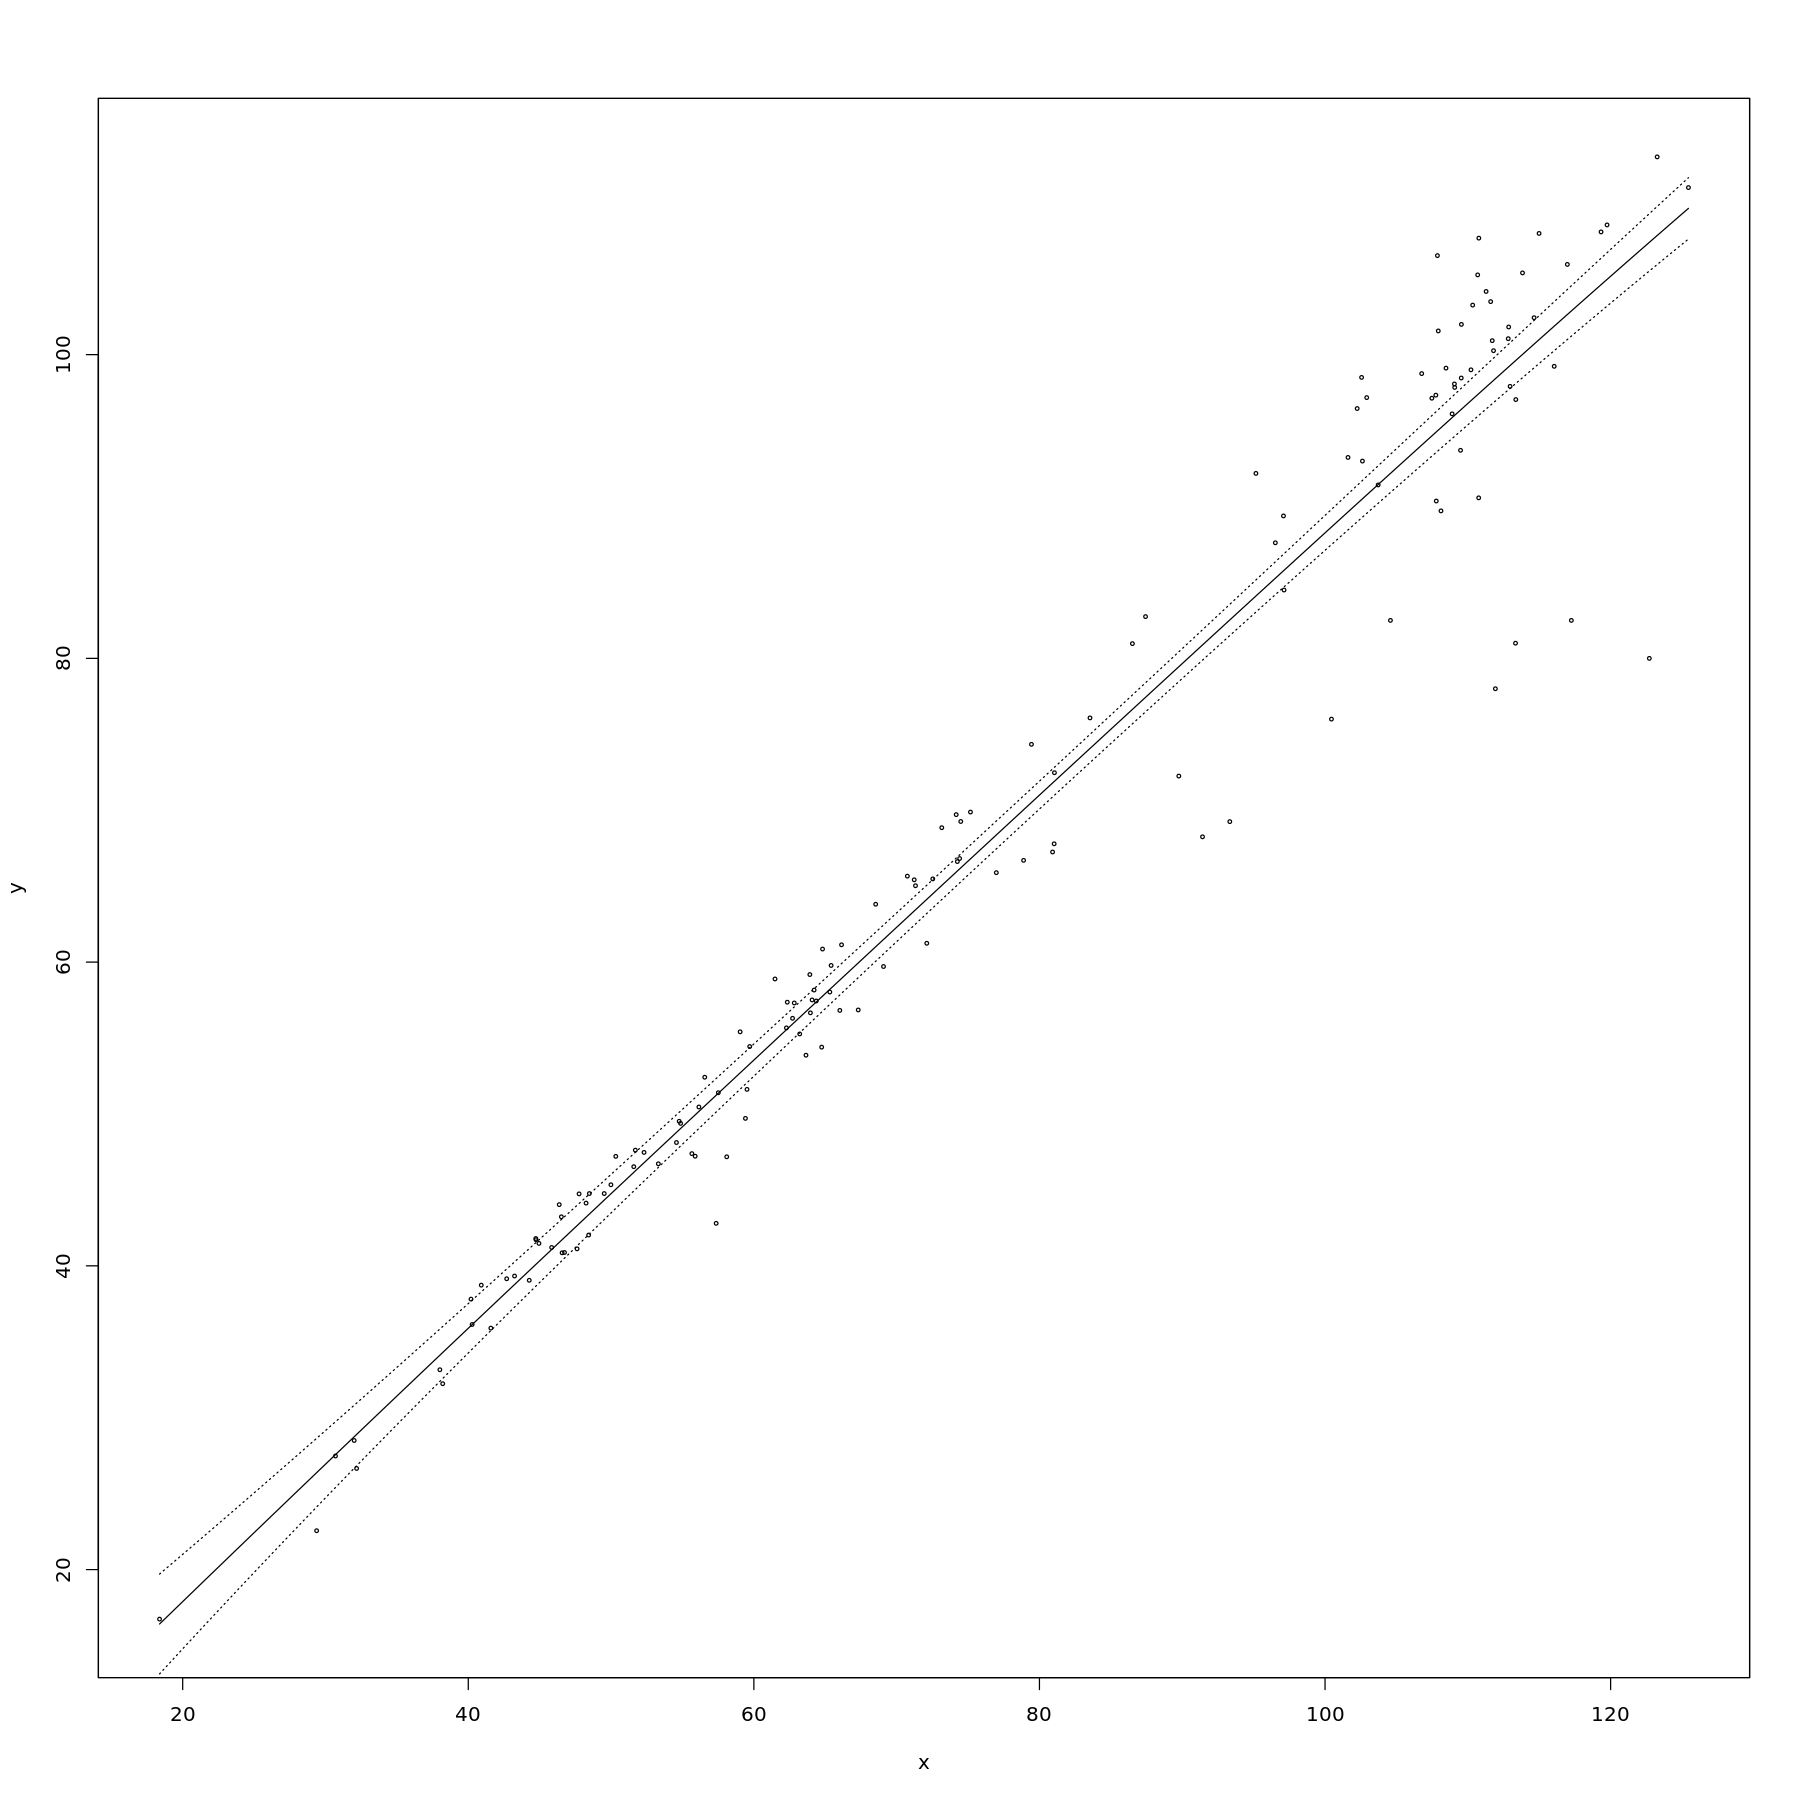

In [ ]:
#We add variability bands
sm.regression(x, y,   h = 30, ngrid=200, display="se")

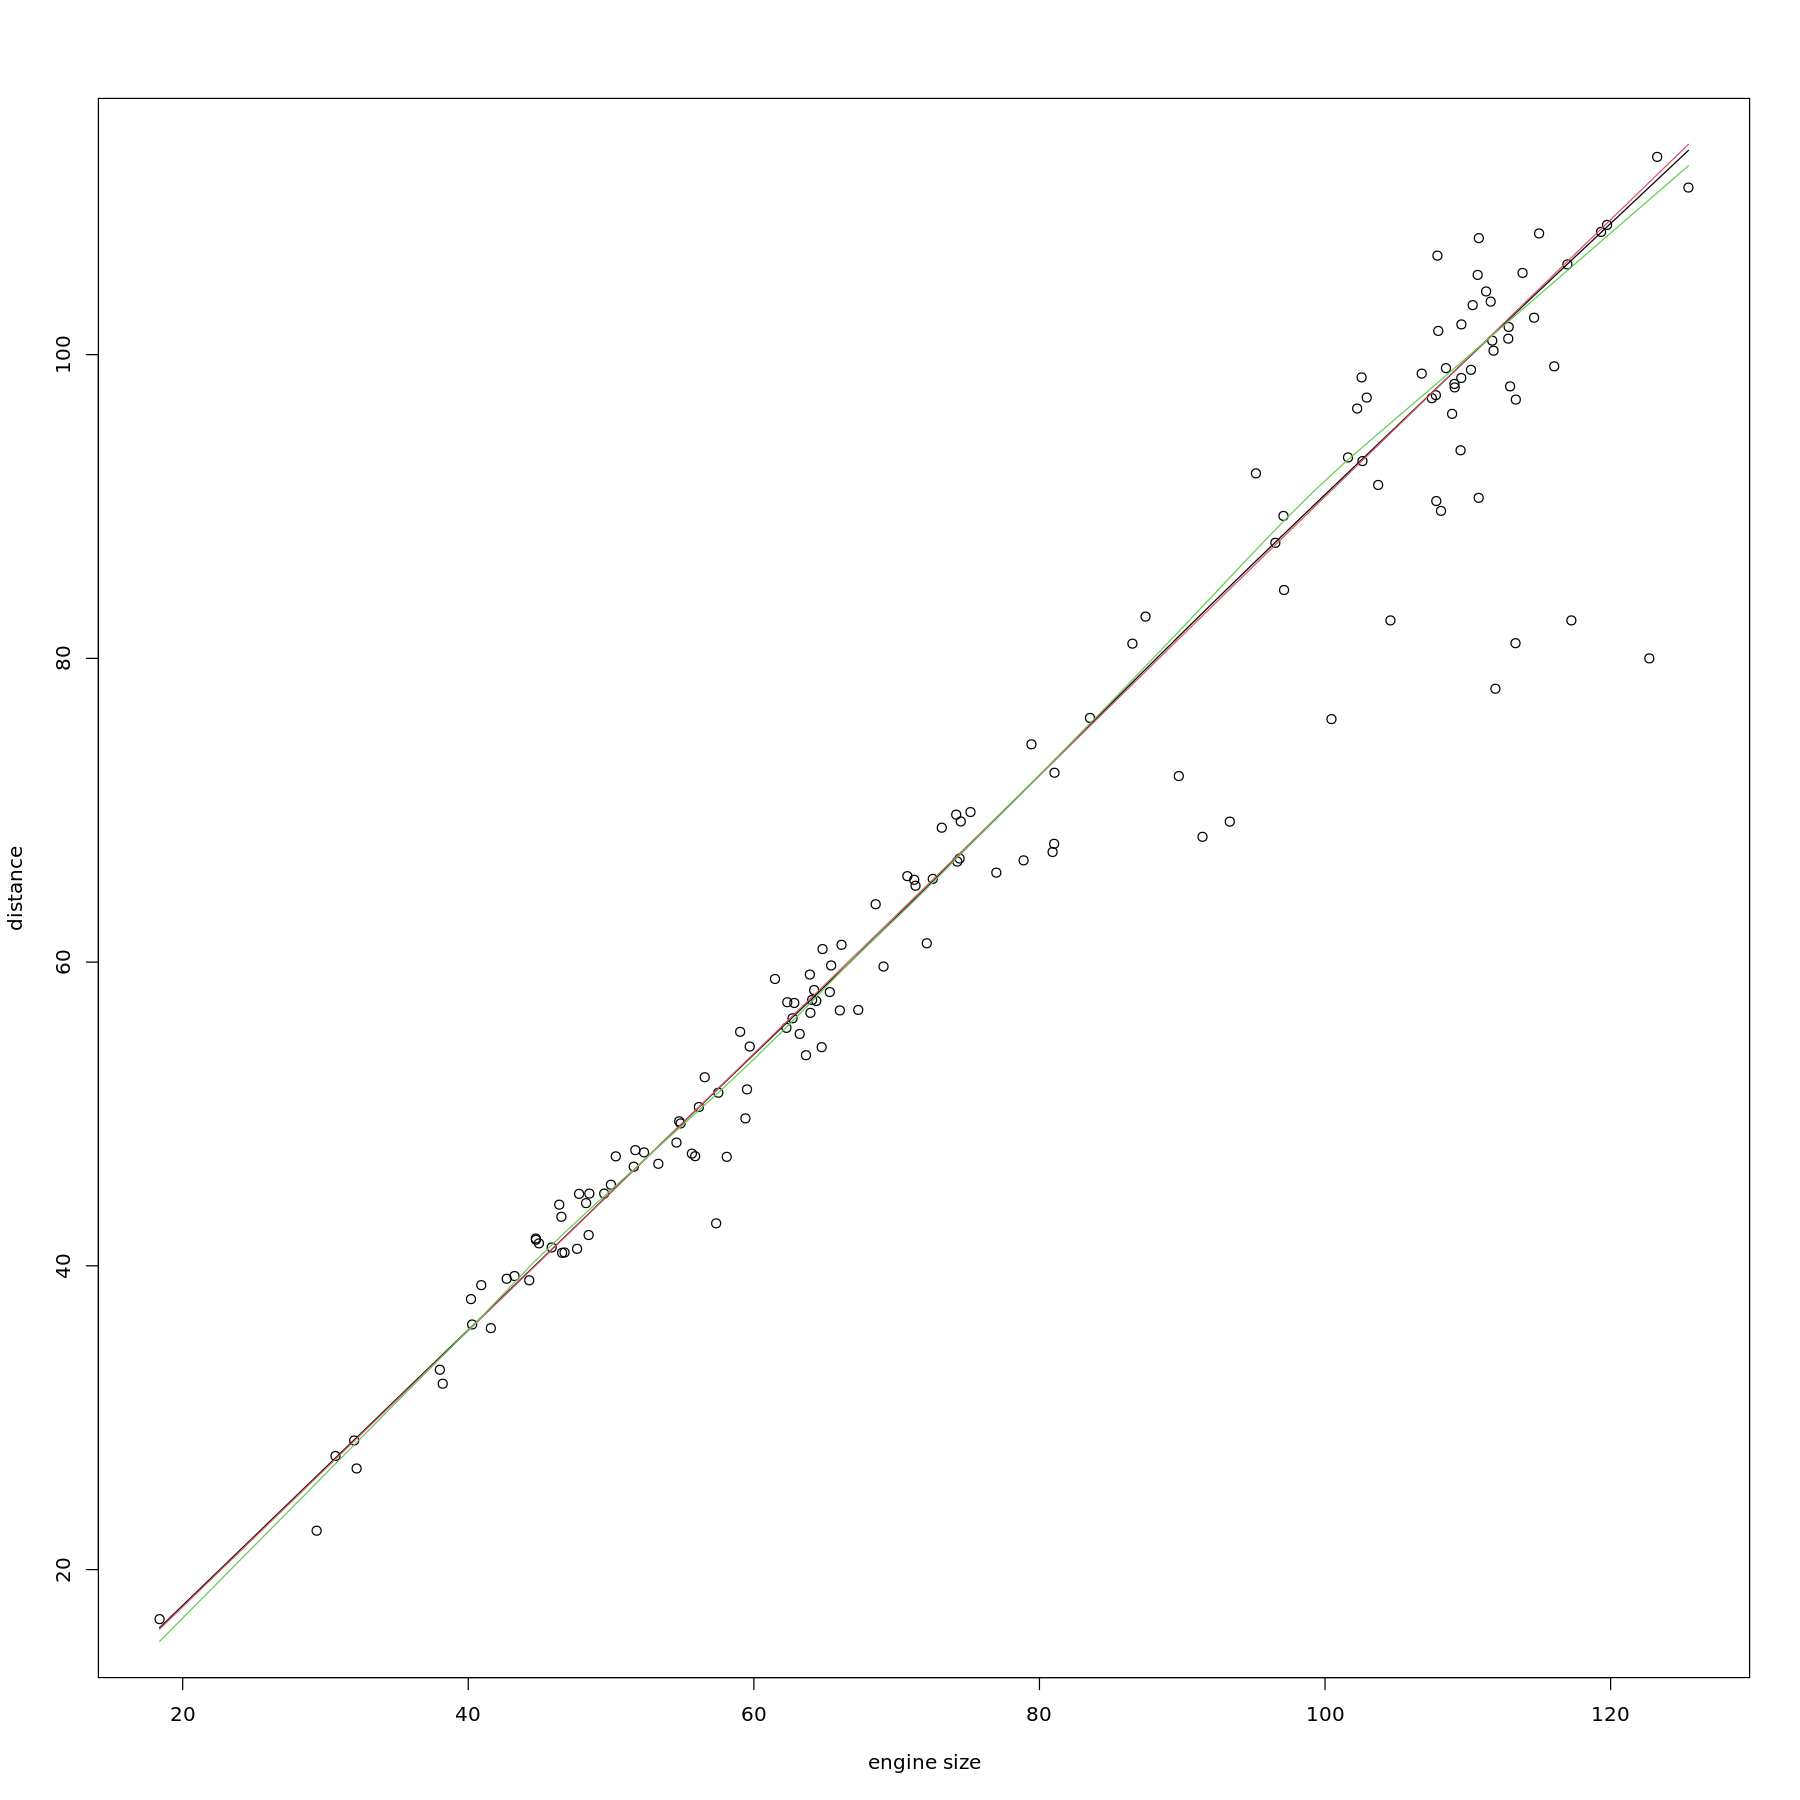

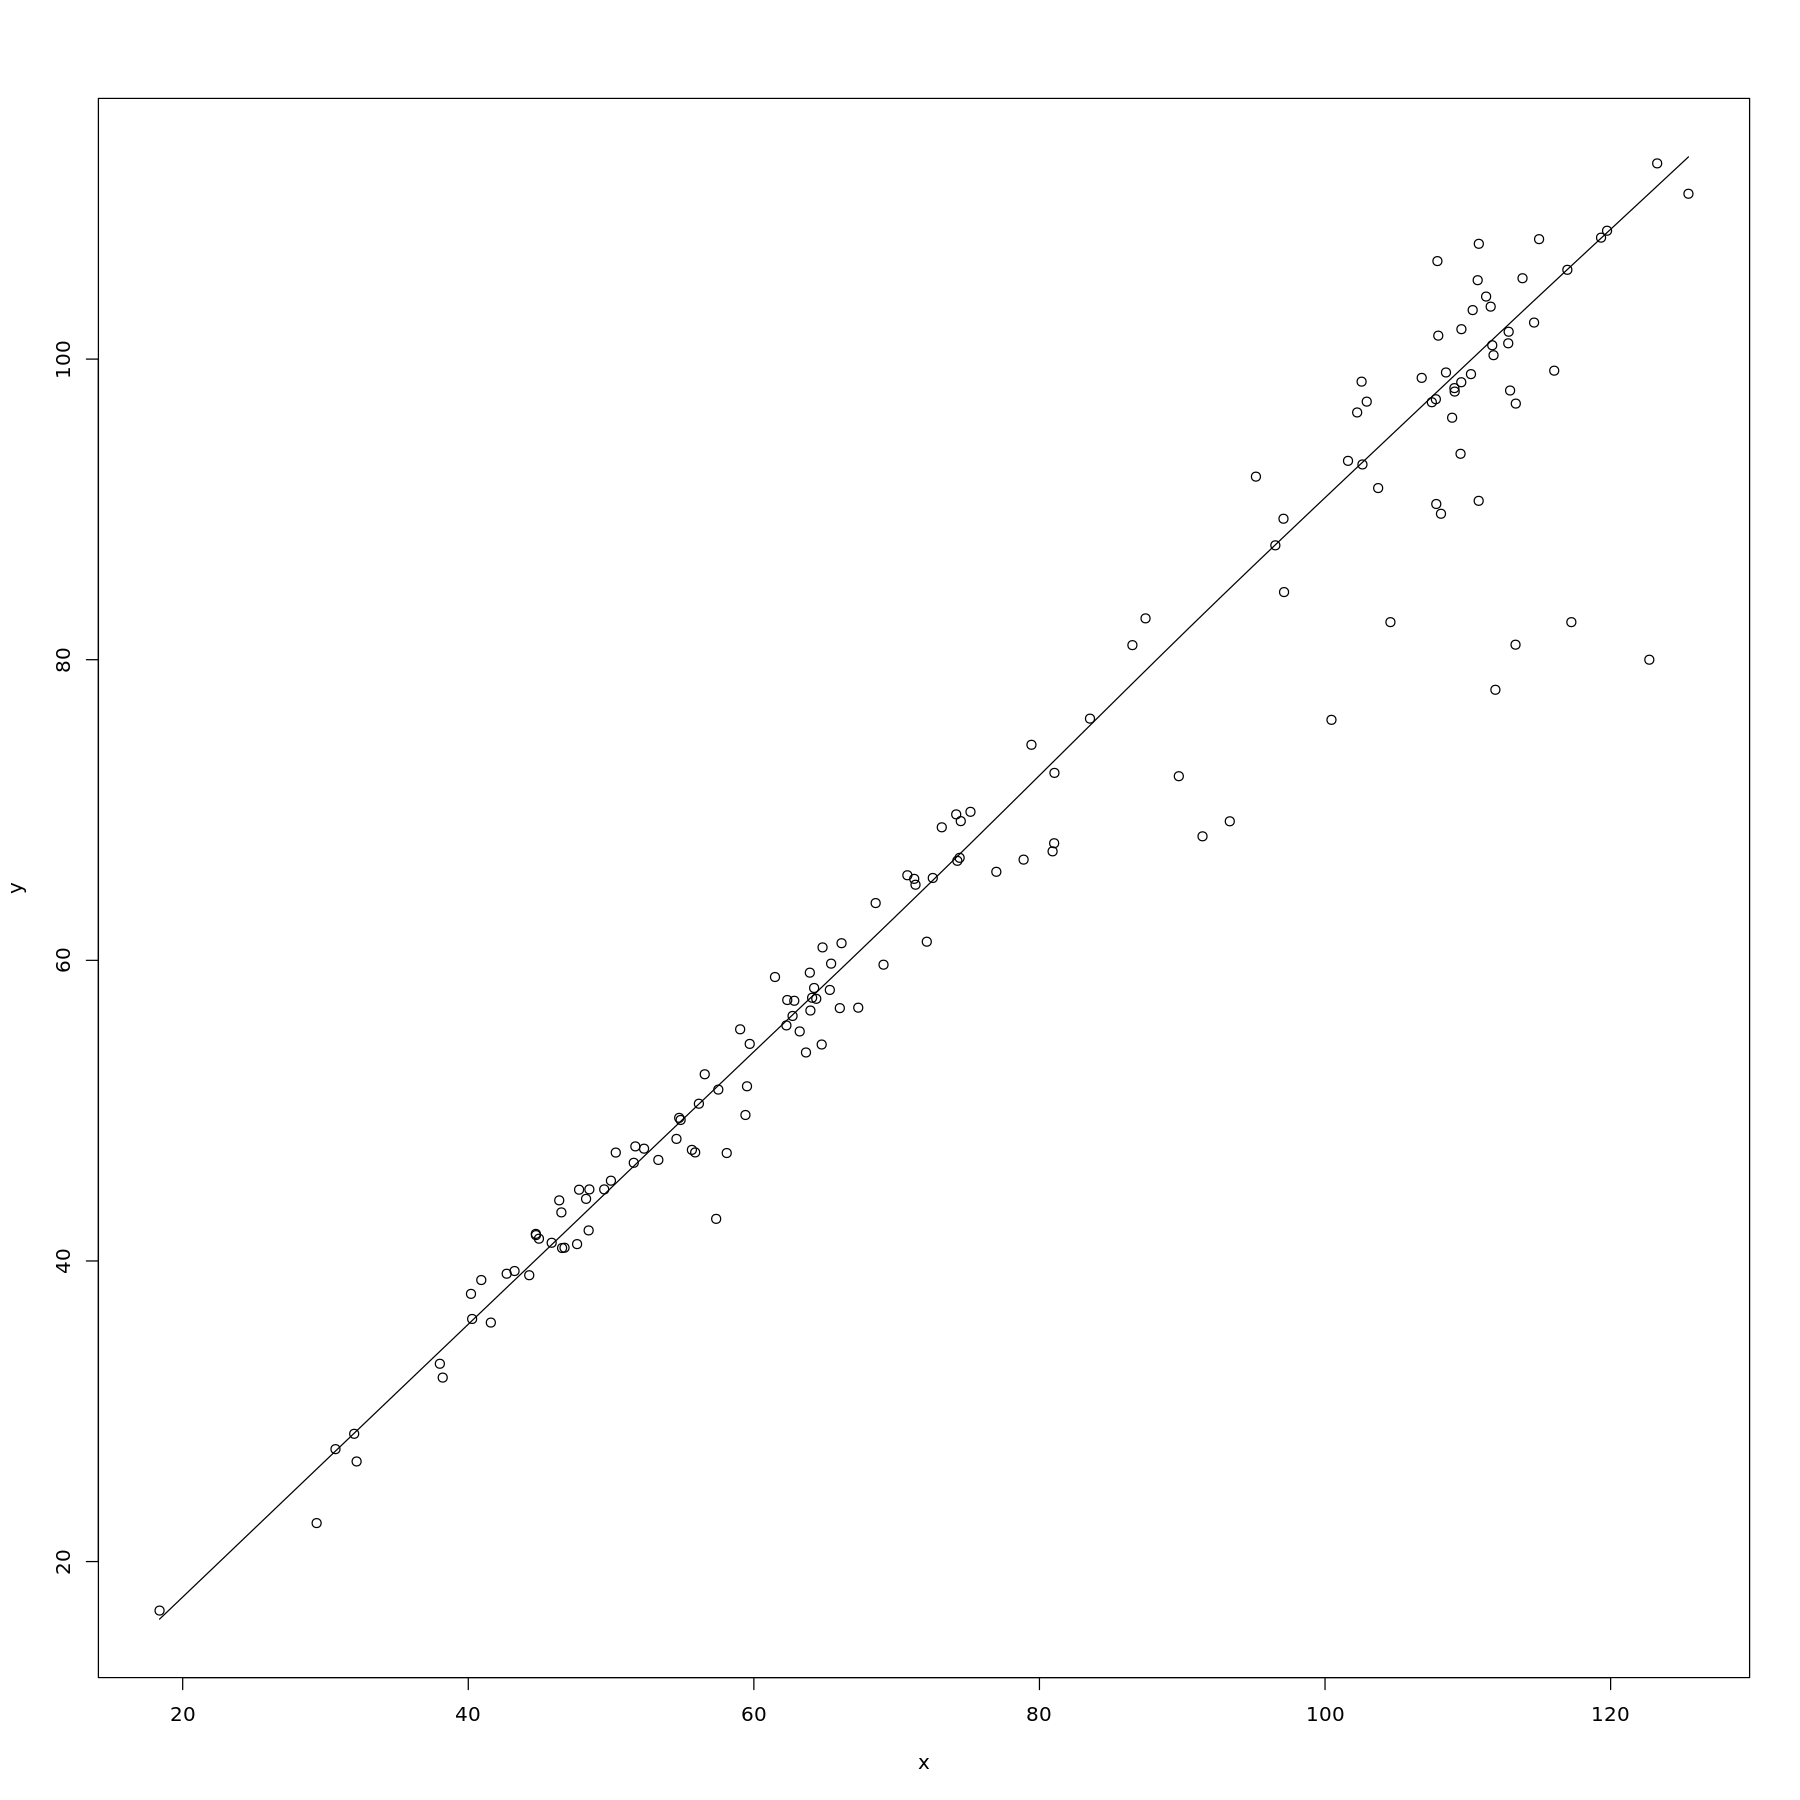

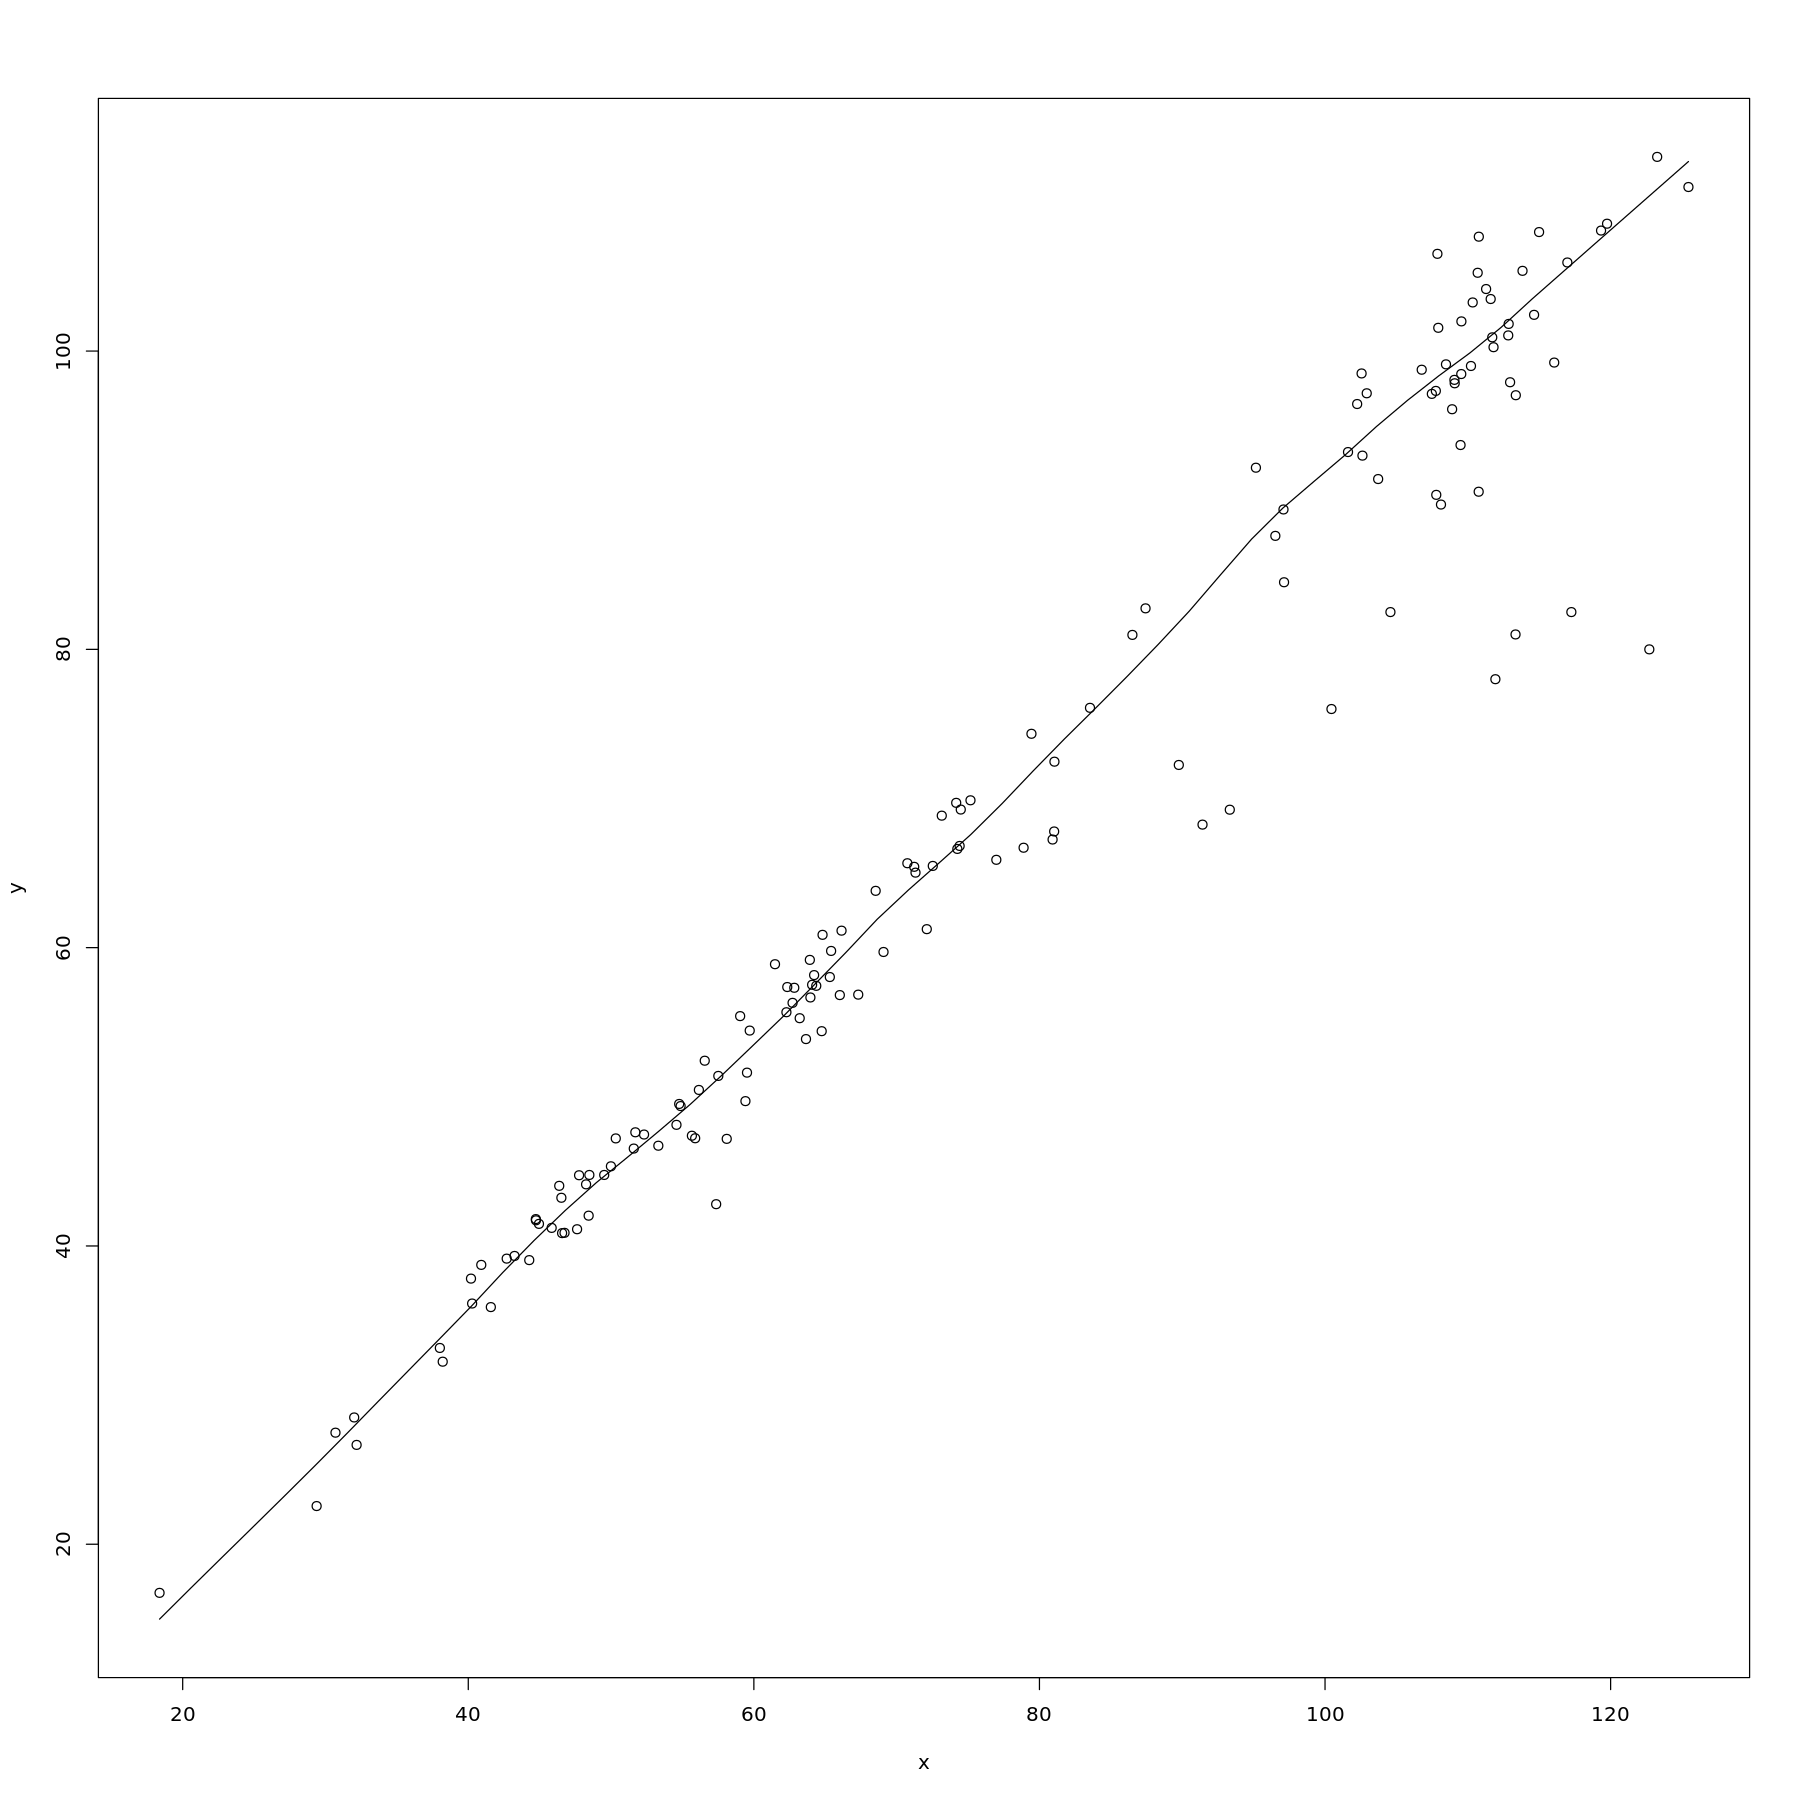

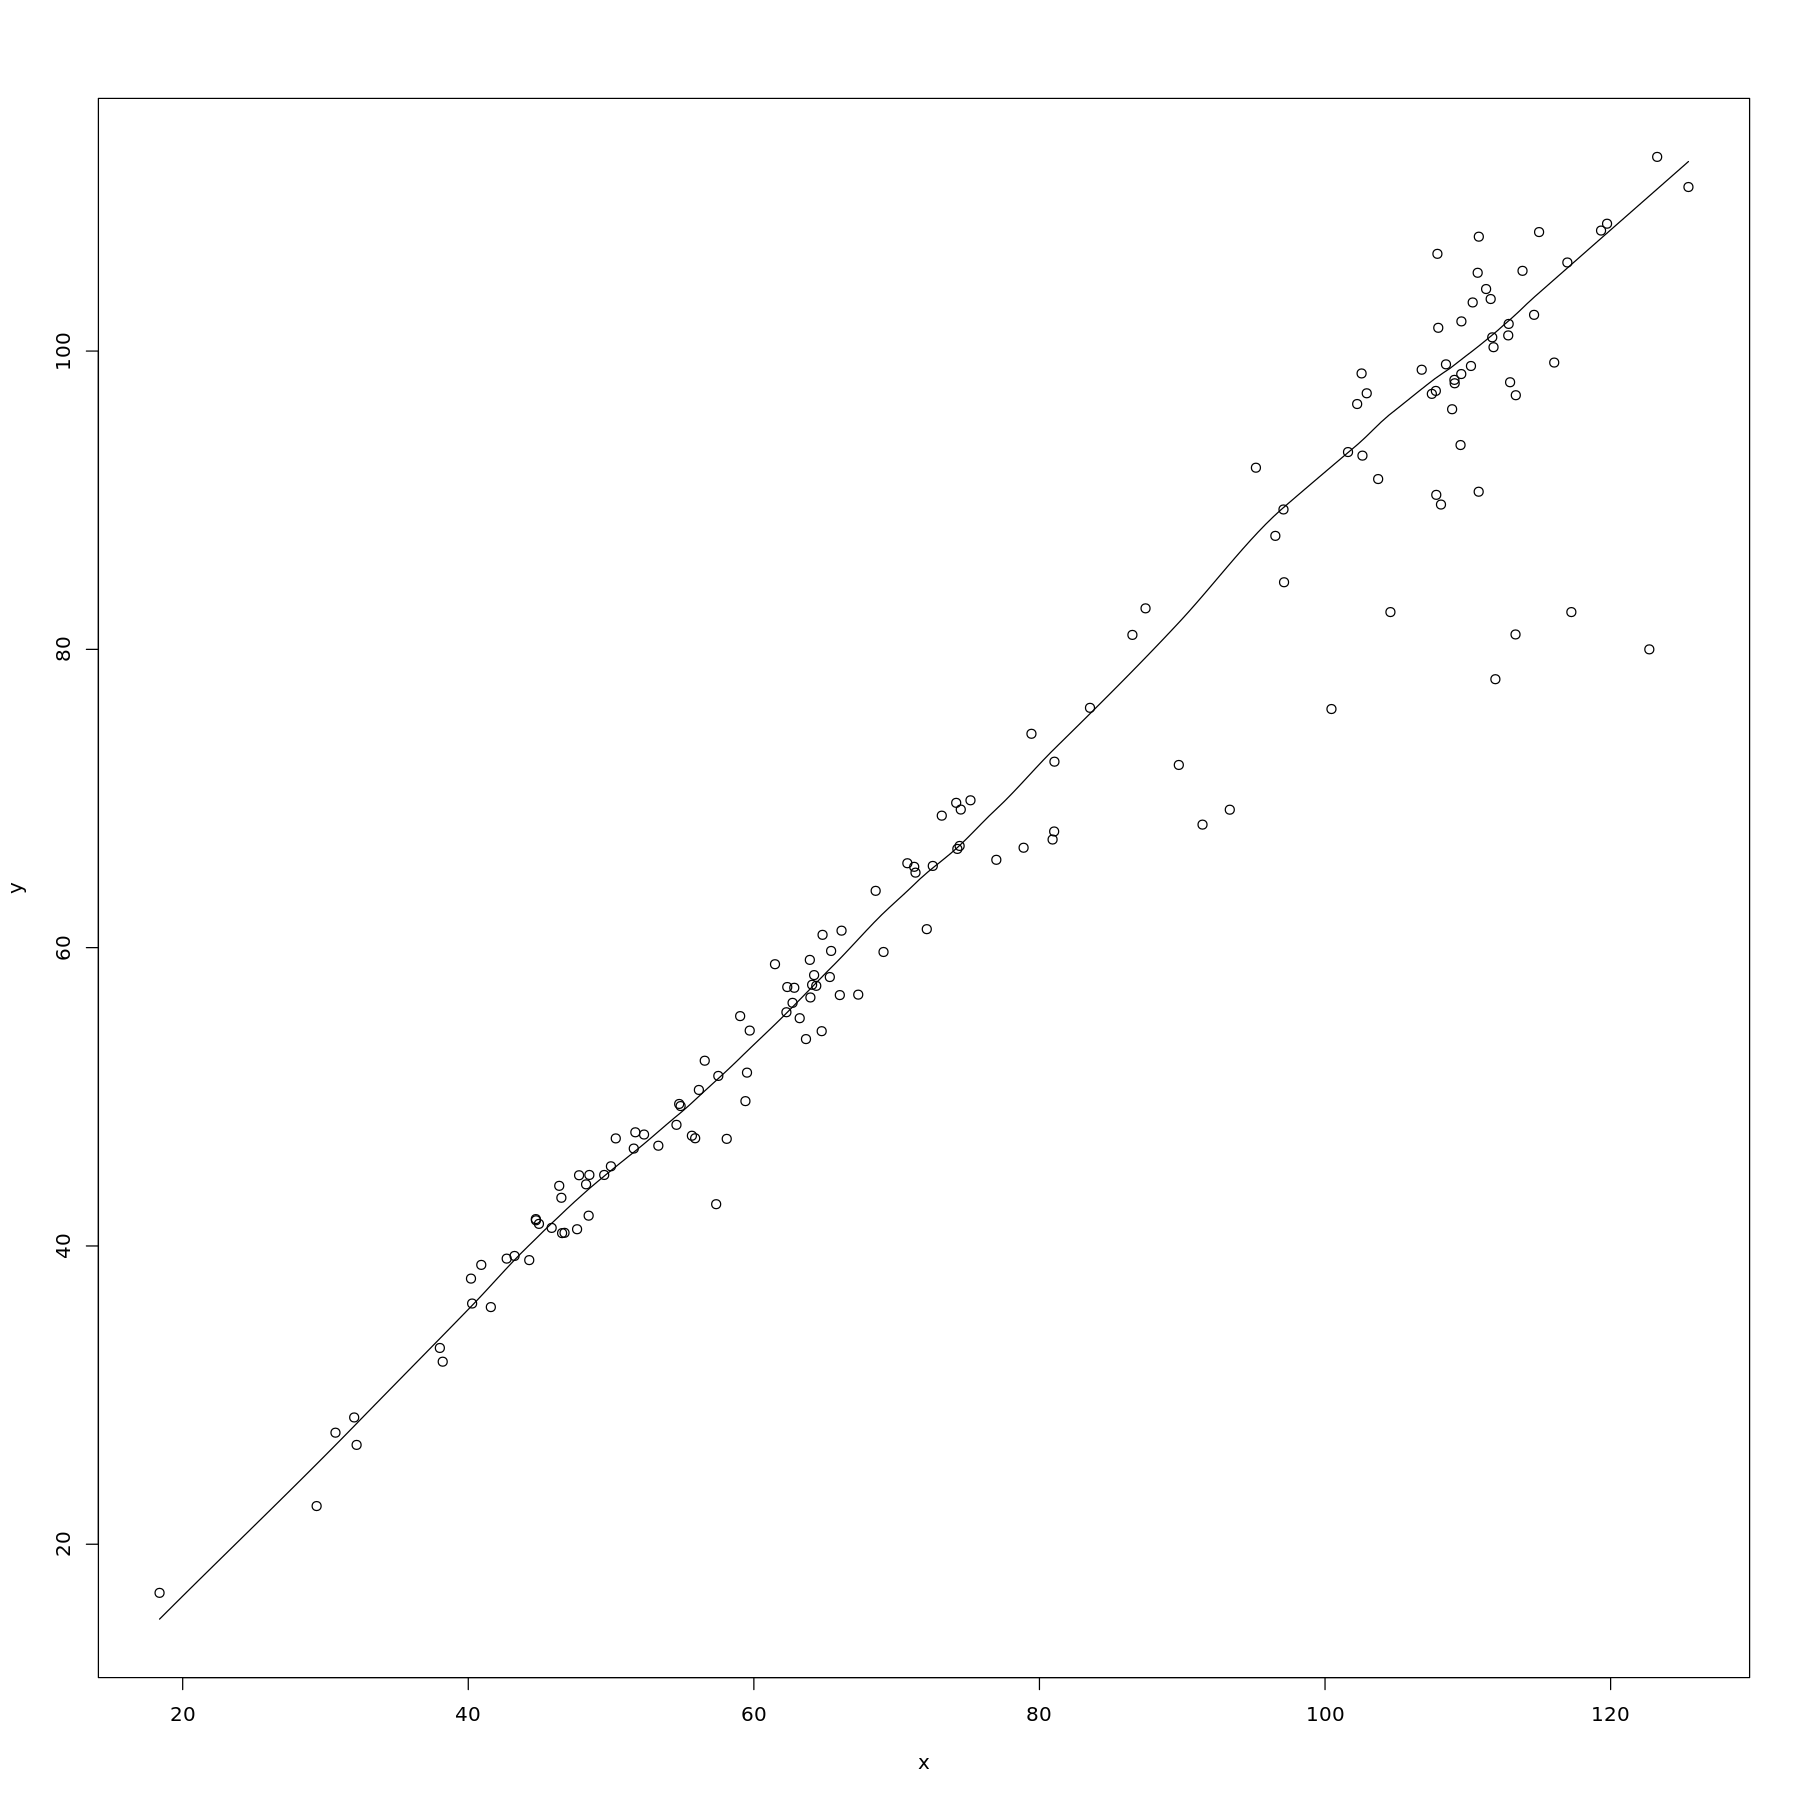

In [ ]:
#Loess (no library required, default tool of R)
plot(x, y, xlab="engine size", ylab="distance")
lo1 <- loess.smooth(x,y) 
#default span= 0.75
lines(lo1)
# we try with other smoothing parameters 'span' 
lo2 <- loess.smooth(x,y,span=0.9)
lines(lo2,col=2)
lo3 <- loess.smooth(x,y,span=0.4)
lines(lo3,col=3)

#another way to perform loess, performs directly the plot
#default span= 2/3

scatter.smooth(x,y) 
scatter.smooth(x,y, span=0.3)
scatter.smooth(x,y, span=0.3, evaluation=200)

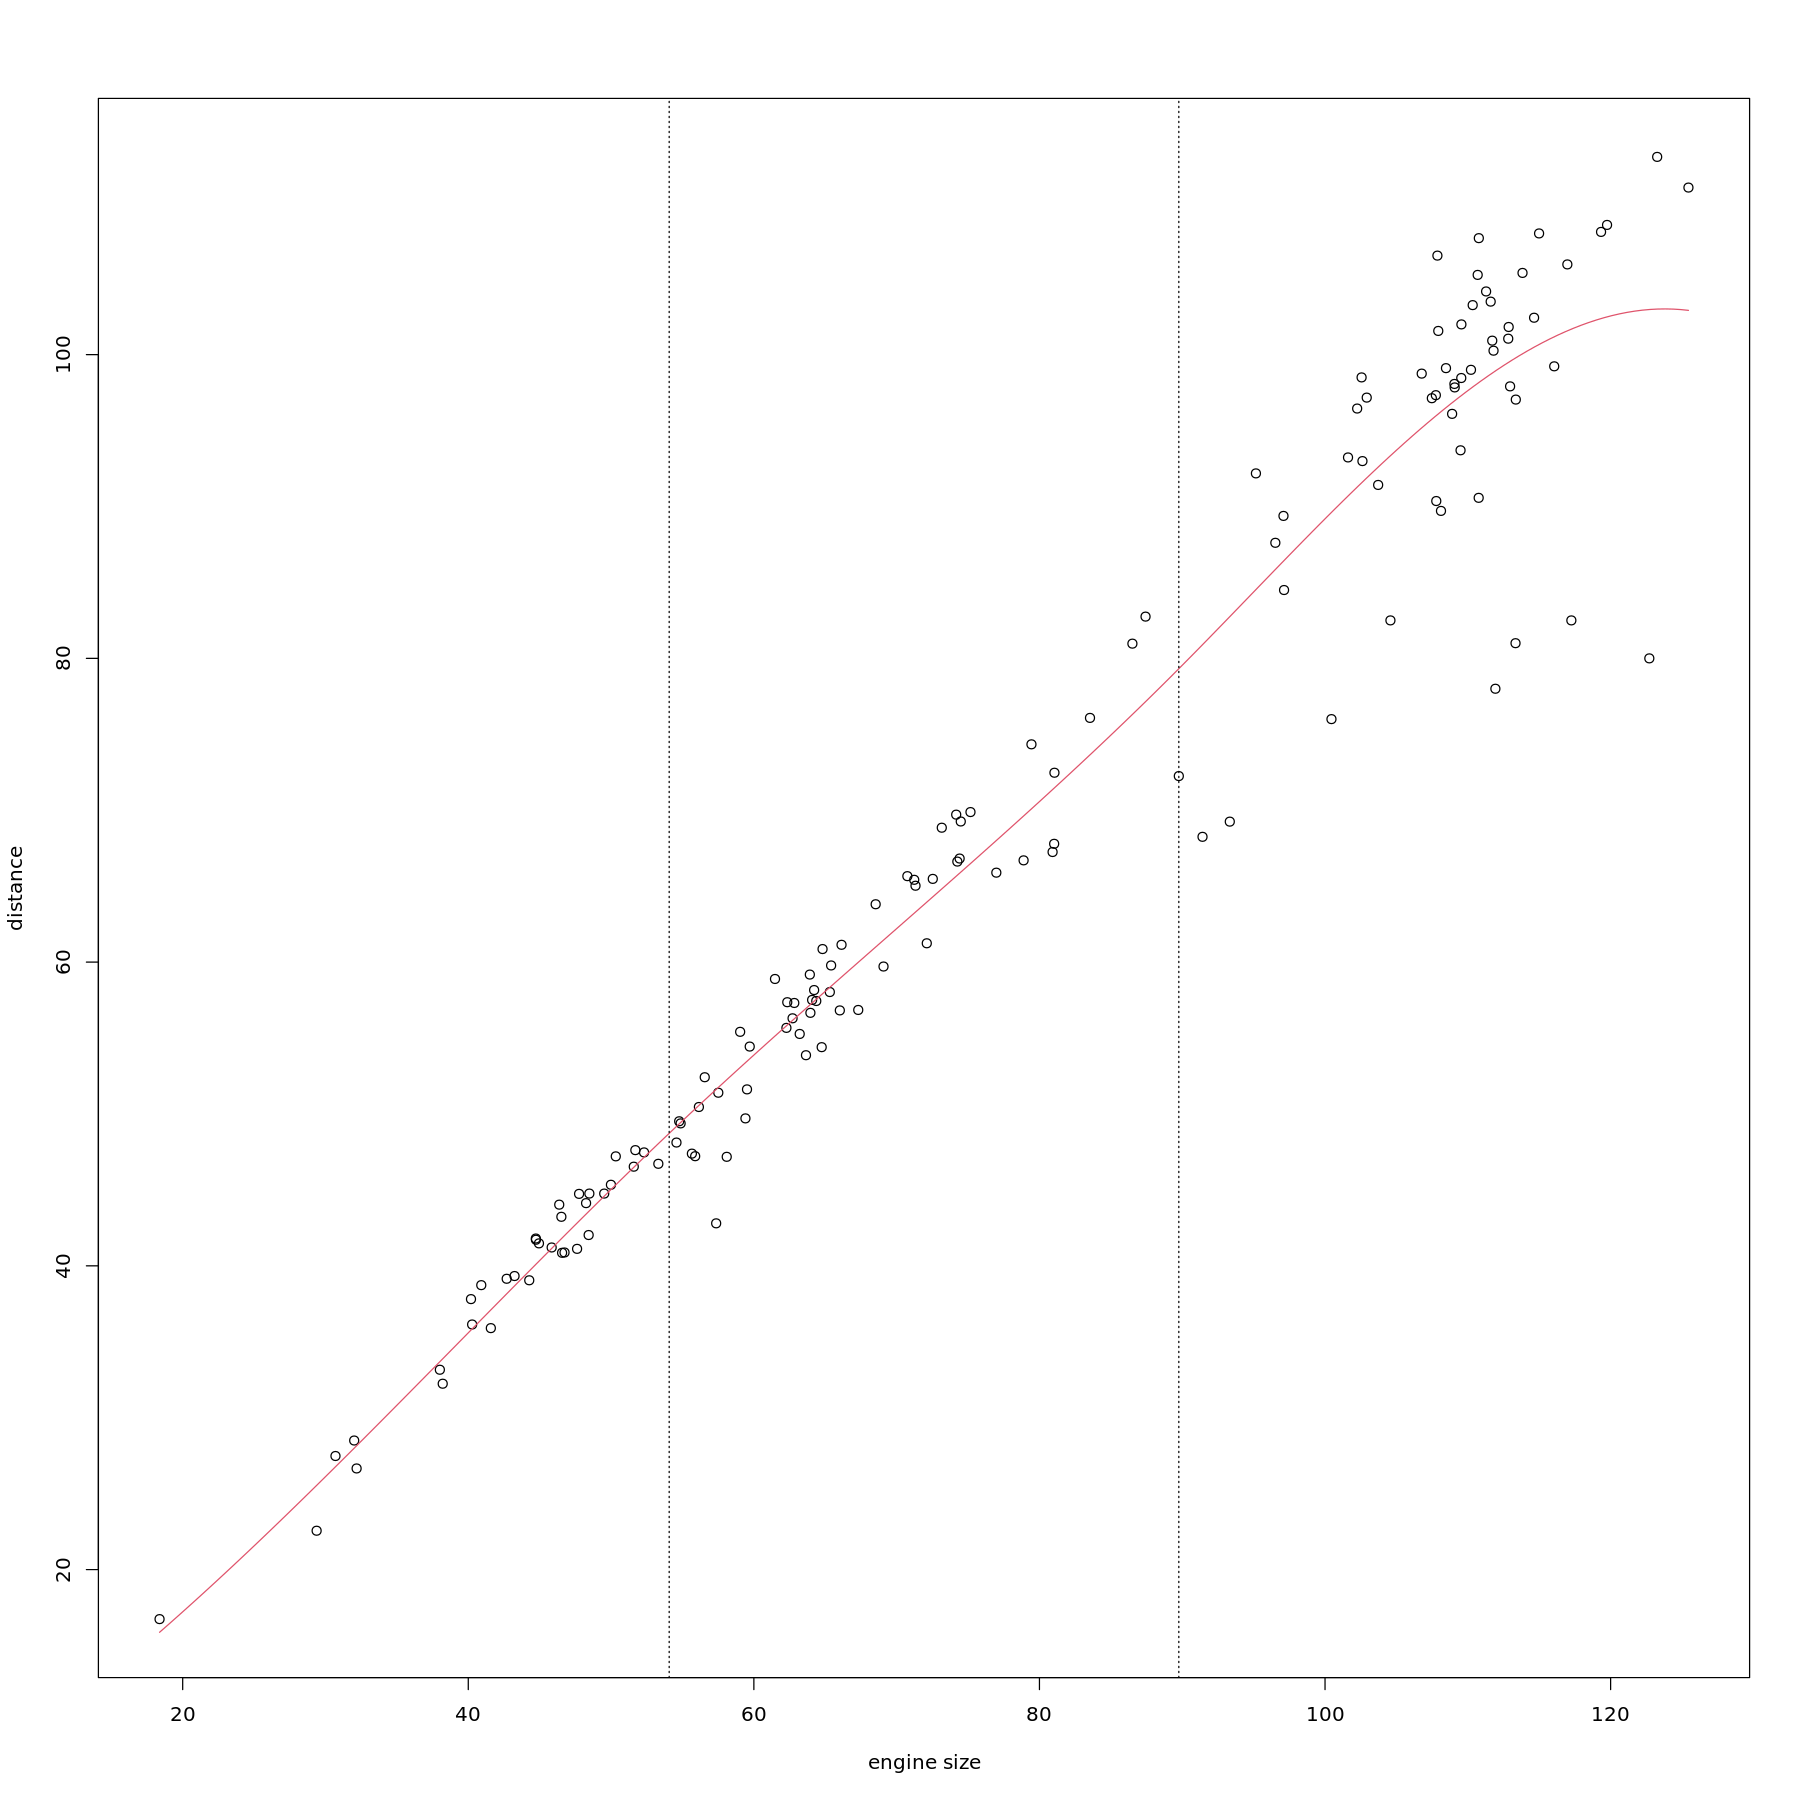

In [ ]:
#######Regression splines (cubic splines)

#
plot(x, y, xlab="engine size", ylab="distance")
#
#we select and identify the knots 'equispaced'
xi<-seq(min(x), max(x), length=4)

#----- Model (2 internal knots)
m1<-lm(y ~ bs(x, knots=xi[2:(length(xi)-1)], degree=3))

###---- for graphical reasons select 200 points where to evaluate the model
xxx<-seq(min(x),max(x),length=200)

#Make predictions by using the 'xxx' points
fit1<-predict(m1, data.frame(x=xxx))
#########
plot(x,y,xlab="engine size", ylab="distance")
lines(xxx,fit1,col=2)

######vertical plots to indicate the knots
abline(v=xi[2], lty=3)
abline(v=xi[3], lty=3)

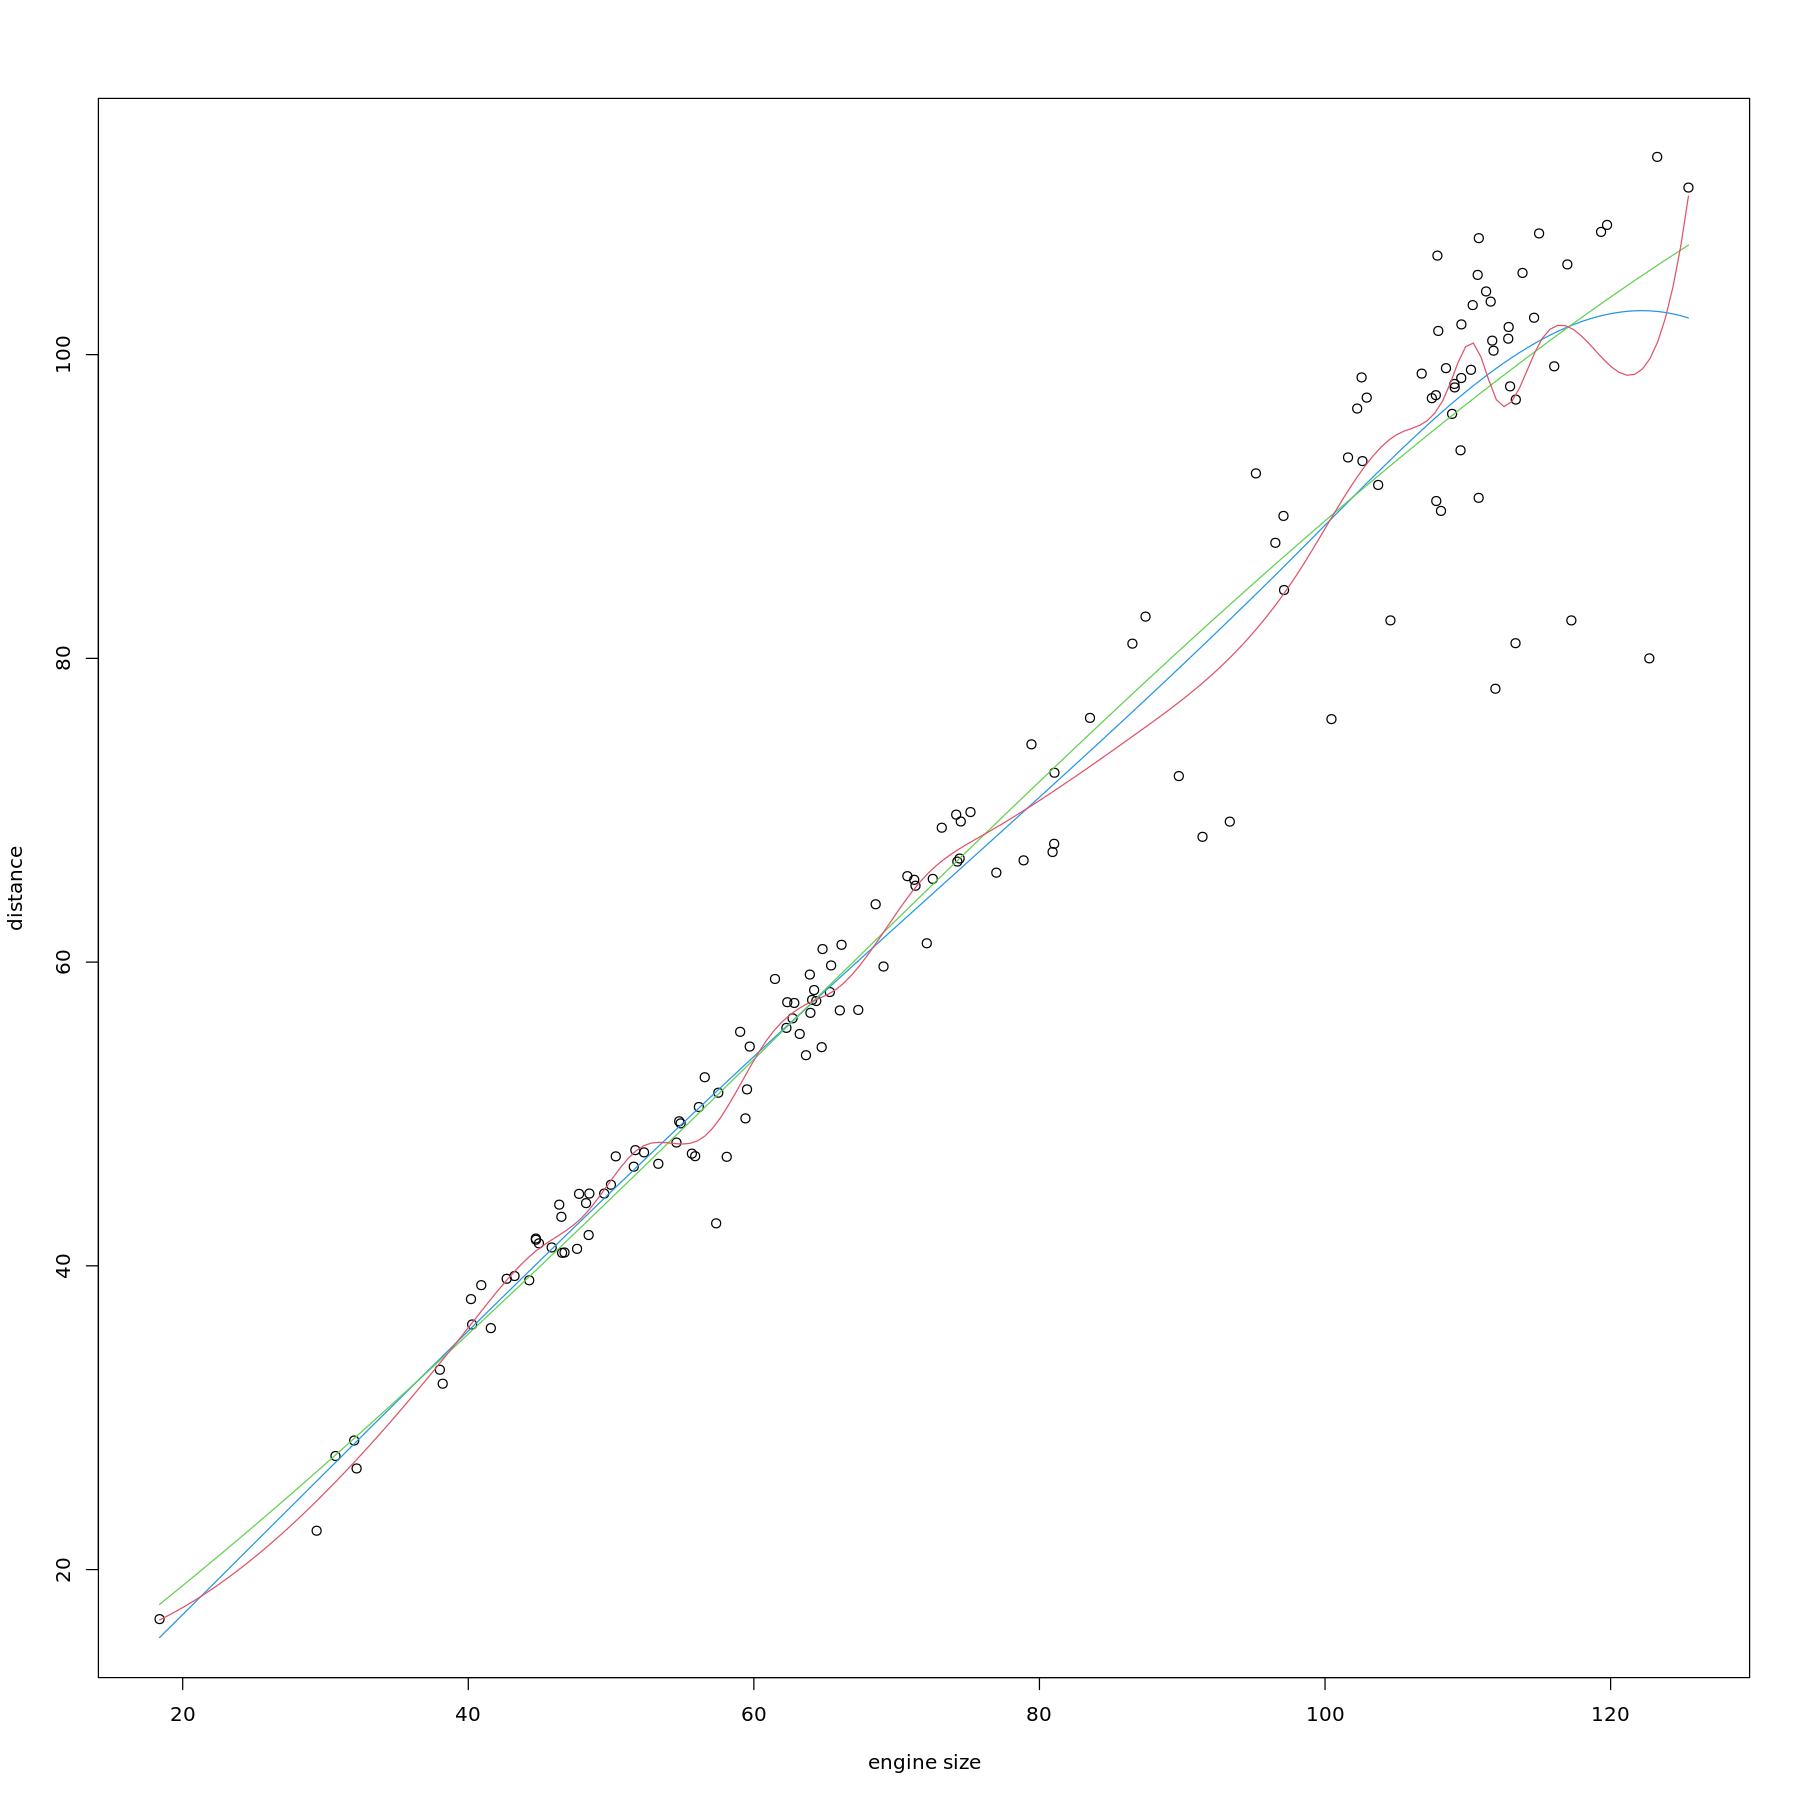

In [ ]:
#we may select the knots by using the degrees of freedom
#
#basic functions b-spline for a cubic spline (degree=3)
#df directly related to the number of knots
#df=length(knots) + degree 
#The knots are selected by using the quantiles of 'x' distribution 

plot(x,y,xlab="engine size", ylab="distance")

# first model with 2 internal knots
m1<-lm(y~bs(x, df=5, degree=3)) 
fit1<-predict(m1, data.frame(x=xxx))
lines(xxx,fit1,col=4)
#
# second model with no internal knots 
m2 <- lm(y ~ bs(x, df=3, degree=3)) 
fit2<-predict(m2,data.frame(x=xxx))
#plot(x,y,xlab="engine size", ylab="distance")
lines(xxx,fit2,col=3)
#
# Third model with 17 knots 
m3<-lm(y~bs(x,df=20,degree=3))
fit3<-predict(m3,data.frame(x=xxx))
#plot(x,y,xlab="engine size", ylab="distance")
lines(xxx,fit3,col=2)
#

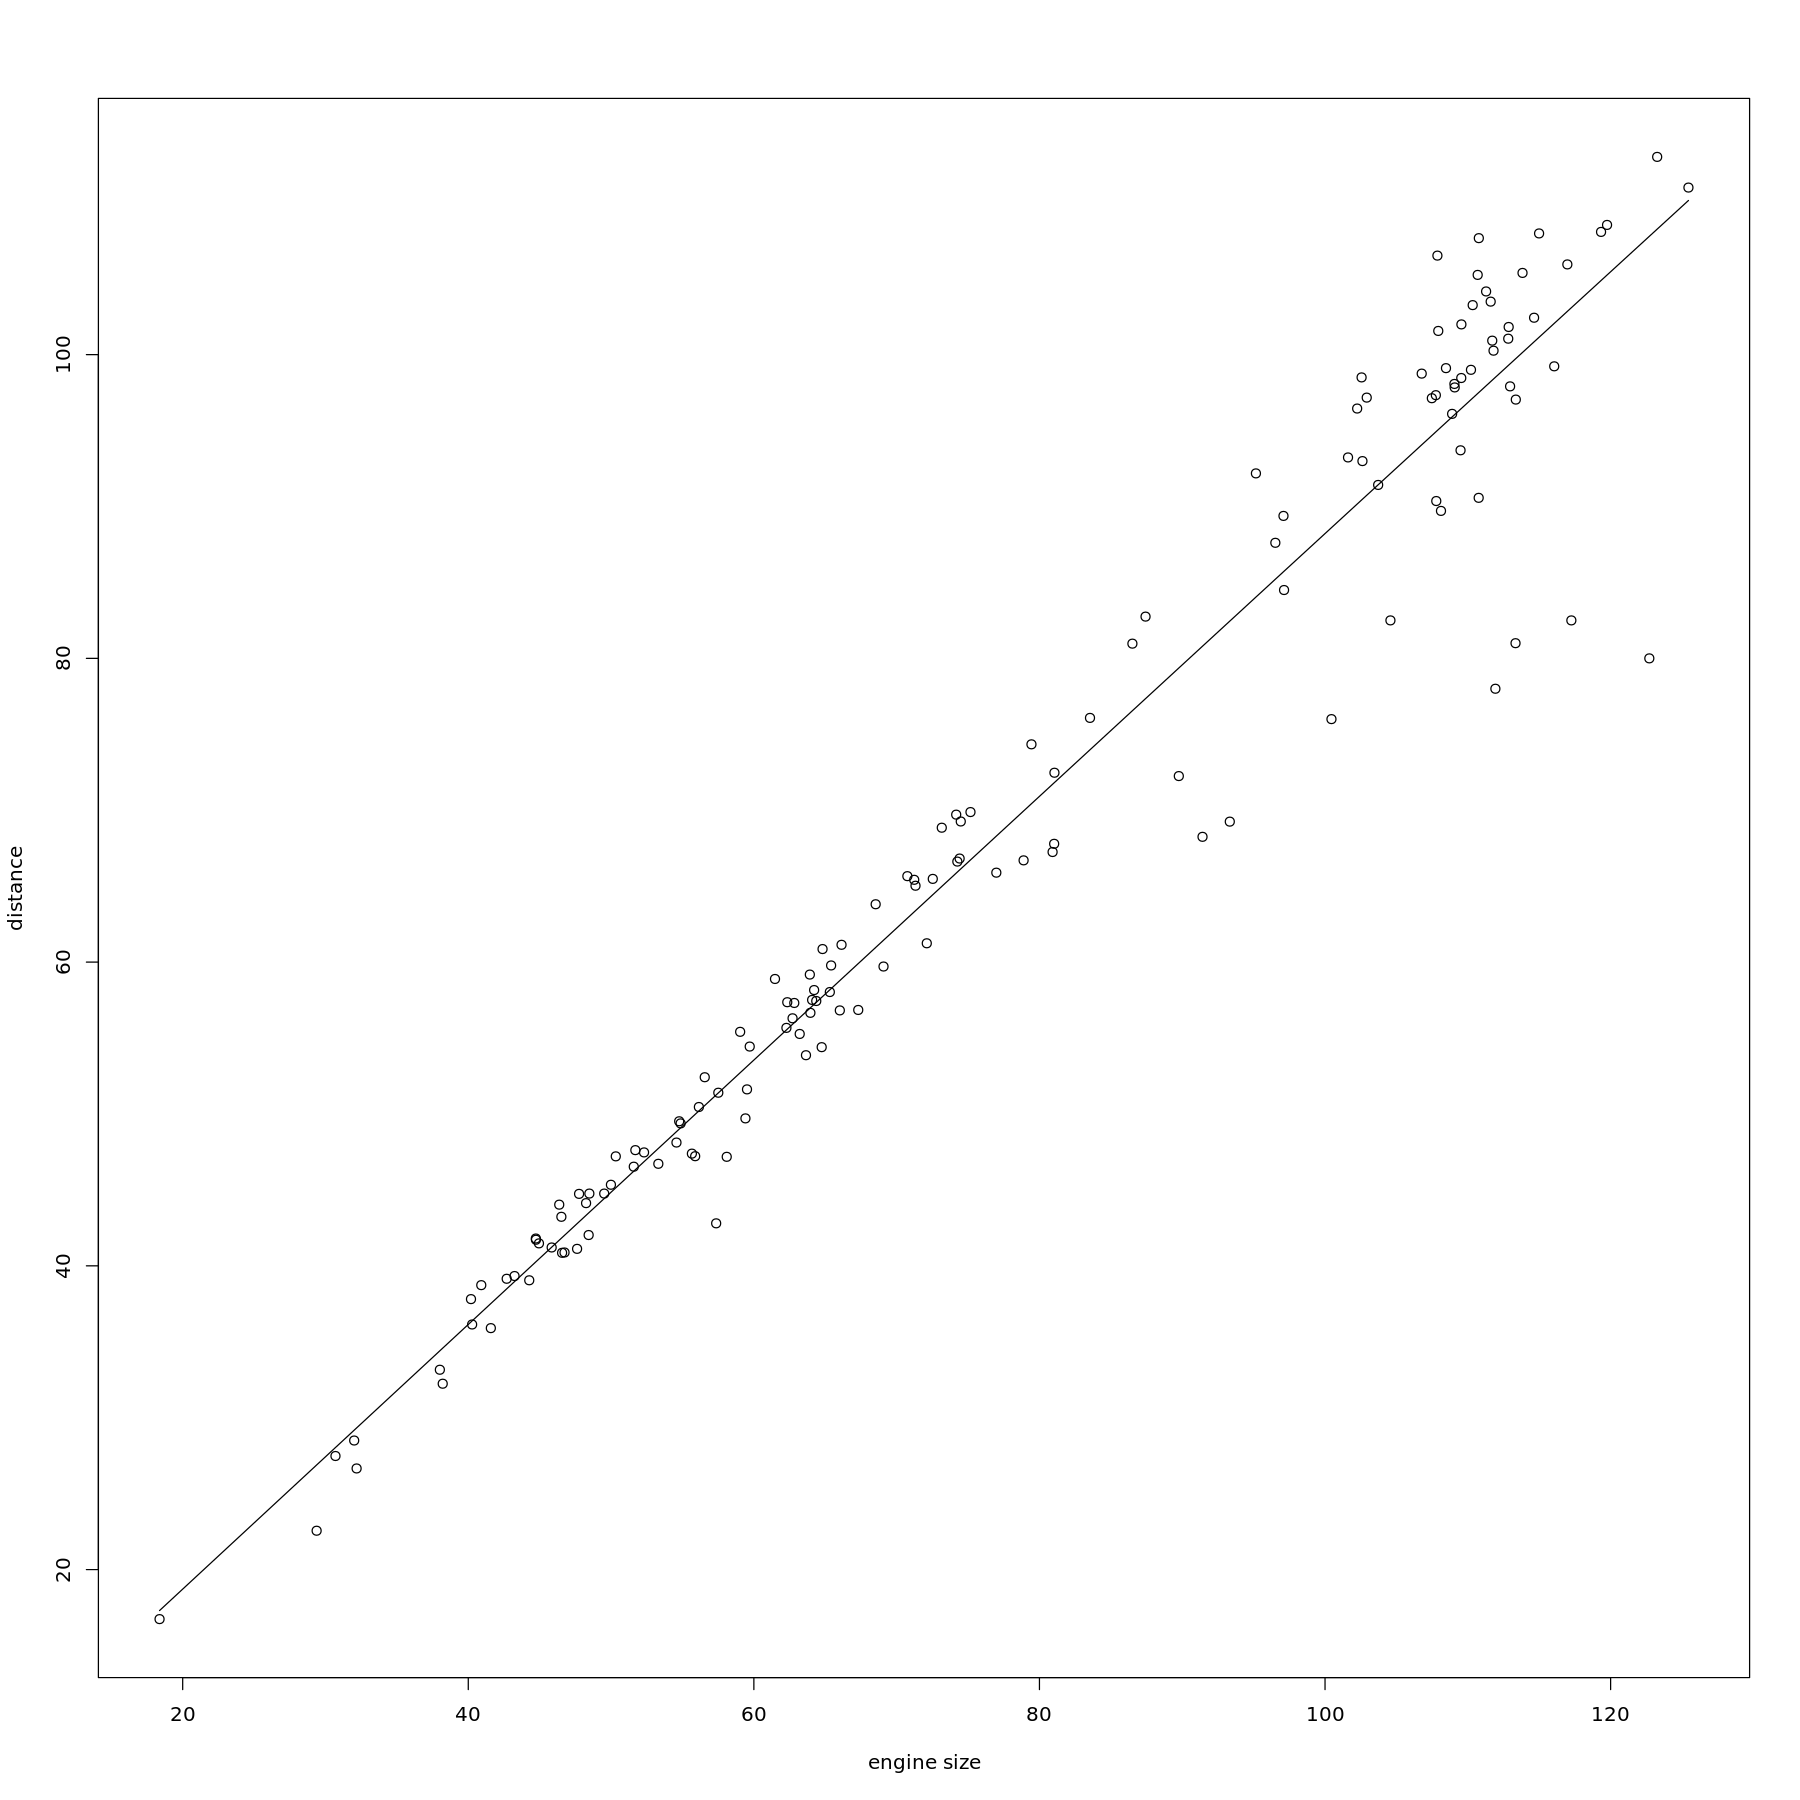

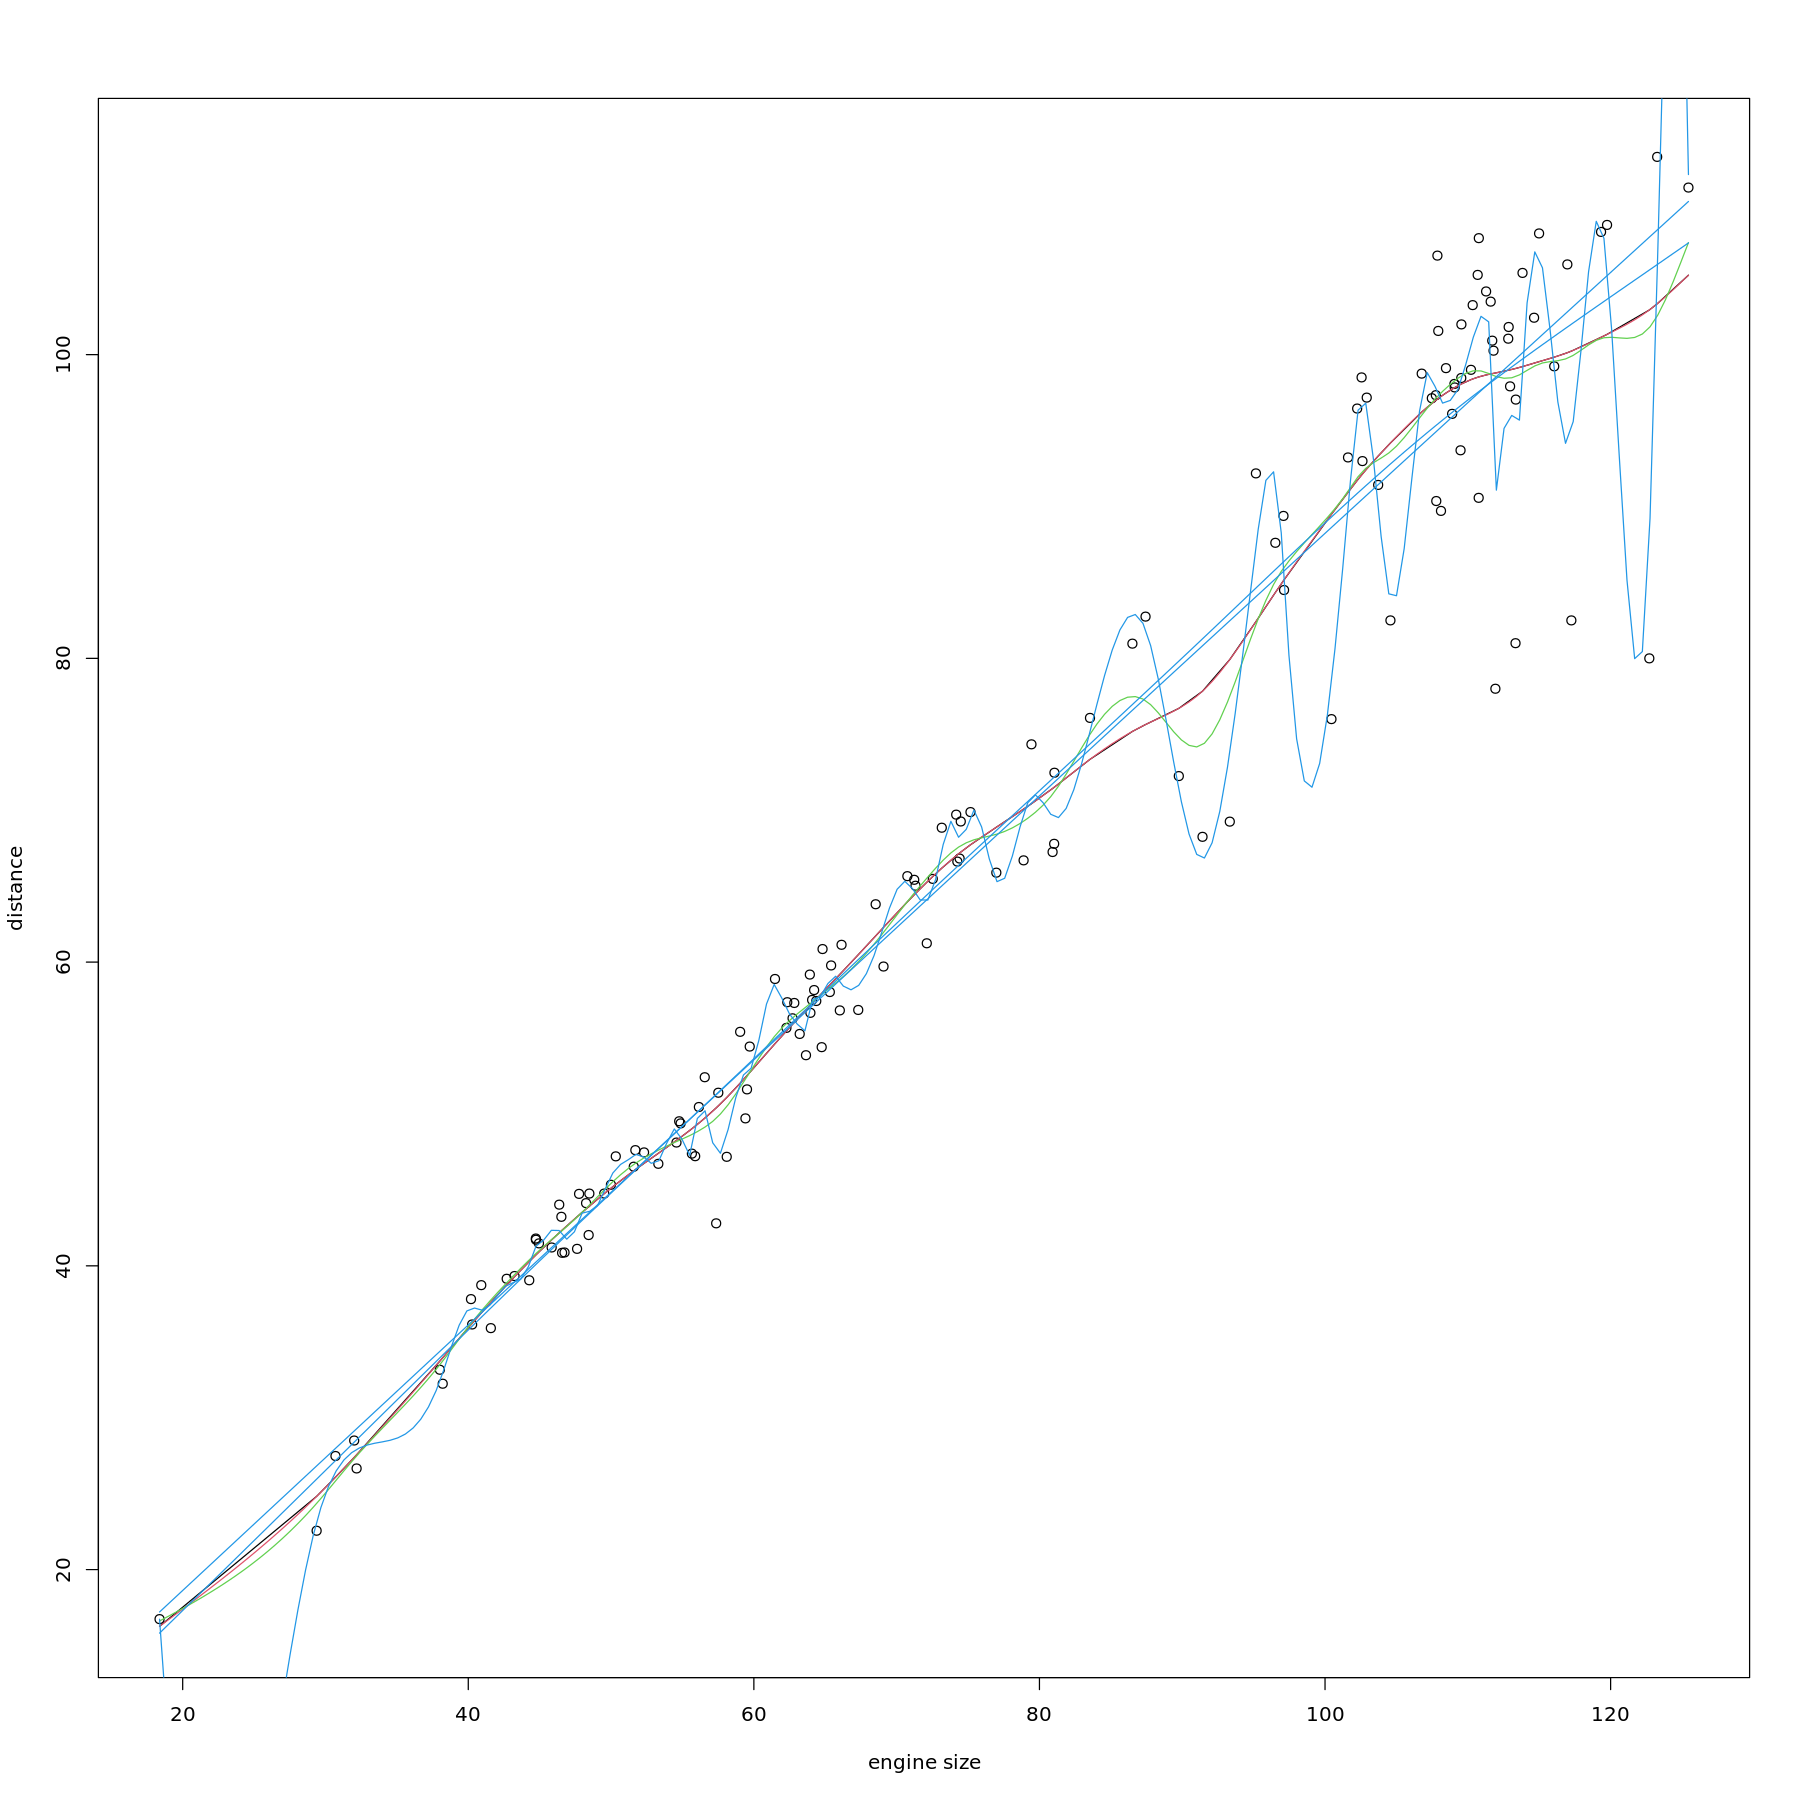

In [ ]:
#Smoothing splines

plot(x,y,xlab="engine size", ylab="distance")
s <- smooth.spline(x,y)
lines(s)

# Model 1
plot(x,y,xlab="engine size", ylab="distance")
s1 <- smooth.spline(x,y, lambda=0.0001)
lines(s1)
#
p1<- predict(s1, x=xxx)
lines(p1, col=2)
#
# Model 2
s2 <- smooth.spline(x,y, lambda=0.00001)
p2<- predict(s2, x=xxx)
lines(p2, col=3)
#
# Model 3
s3 <- smooth.spline(x,y, lambda=0.01)
p3<- predict(s3, x=xxx)
lines(p3, col=4)

# Model 4
s4 <- smooth.spline(x,y, lambda=1)
p4<- predict(s4, x=xxx)
lines(p4, col=4)

# Model 5
s5 <- smooth.spline(x,y, lambda=0.00000001)
p5<- predict(s5, x=xxx)
lines(p5, col=4)

In [ ]:
######Generalized Additive Models#######
oil_price.ts <- ts(oil_price$Value, frequency=12)
tt<- (1:length(oil_price.ts))
seas <- factor(c(rep(1:12,length(oil_price.ts)/12))) 
#####1:3 because there are three observations 'out' 
mod2 <- lm(oil_price.ts~ tt+seas+df_sp.ts)
summary(mod2)
AIC(mod2)






Call:
lm(formula = oil_price.ts ~ tt + seas + df_sp.ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.436 -14.454   0.725  14.302  36.070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.90554    8.27904   1.800   0.0741 .  
tt          -0.28578    0.13238  -2.159   0.0327 *  
seas2        2.47036    7.90959   0.312   0.7553    
seas3        4.38779    7.90961   0.555   0.5800    
seas4        4.96546    7.91085   0.628   0.5313    
seas5        4.99568    7.91410   0.631   0.5290    
seas6        4.81554    7.91224   0.609   0.5438    
seas7        5.06769    7.91266   0.640   0.5230    
seas8        7.00515    7.92754   0.884   0.3785    
seas9        4.31420    7.91889   0.545   0.5868    
seas10       1.39684    7.91736   0.176   0.8602    
seas11       1.30907    7.91892   0.165   0.8690    
seas12      -0.63749    7.92226  -0.080   0.9360    
df_sp.ts     0.02812    0.00577   4.873 3.14e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 

[1] 1277.532

In [ ]:
#now try with a GAM
#Values for df should be greater than 1, with df=1 implying a linear fit. Default is df=4
g1 <- gam(oil_price.ts~s(tt)+seas+s(df_sp.ts))
summary(g1)


Call: gam(formula = oil_price.ts ~ s(tt) + seas + s(df_sp.ts))
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-34.723  -5.897   1.115   7.020  20.975 

(Dispersion Parameter for gaussian family taken to be 128.1073)

    Null Deviance: 85347.88 on 143 degrees of freedom
Residual Deviance: 15885.28 on 123.9998 degrees of freedom
AIC: 1127.935 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
             Df Sum Sq Mean Sq  F value  Pr(>F)    
s(tt)         1  32294   32294 252.0889 < 2e-16 ***
seas         11    598      54   0.4241 0.94294    
s(df_sp.ts)   1    490     490   3.8245 0.05276 .  
Residuals   124  15885     128                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F     Pr(F)    
(Intercept)                             
s(tt)             3 44.357 < 2.2e-16 ***
seas                                    
s(df_sp.ts)       3 14.901 2.415e-08 ***
---


[1] 1127.935


Call: gam(formula = oil_price.ts ~ (tt) + seas + (df_sp.ts))
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-42.4362 -14.4541   0.7246  14.3021  36.0700 

(Dispersion Parameter for gaussian family taken to be 375.3335)

    Null Deviance: 85347.88 on 143 degrees of freedom
Residual Deviance: 48793.36 on 130 degrees of freedom
AIC: 1277.532 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
           Df Sum Sq Mean Sq F value    Pr(>F)    
tt          1  27031 27031.2 72.0191 4.151e-14 ***
seas       11    611    55.5  0.1479    0.9994    
df_sp.ts    1   8913  8912.6 23.7458 3.143e-06 ***
Residuals 130  48793   375.3                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 1277.532

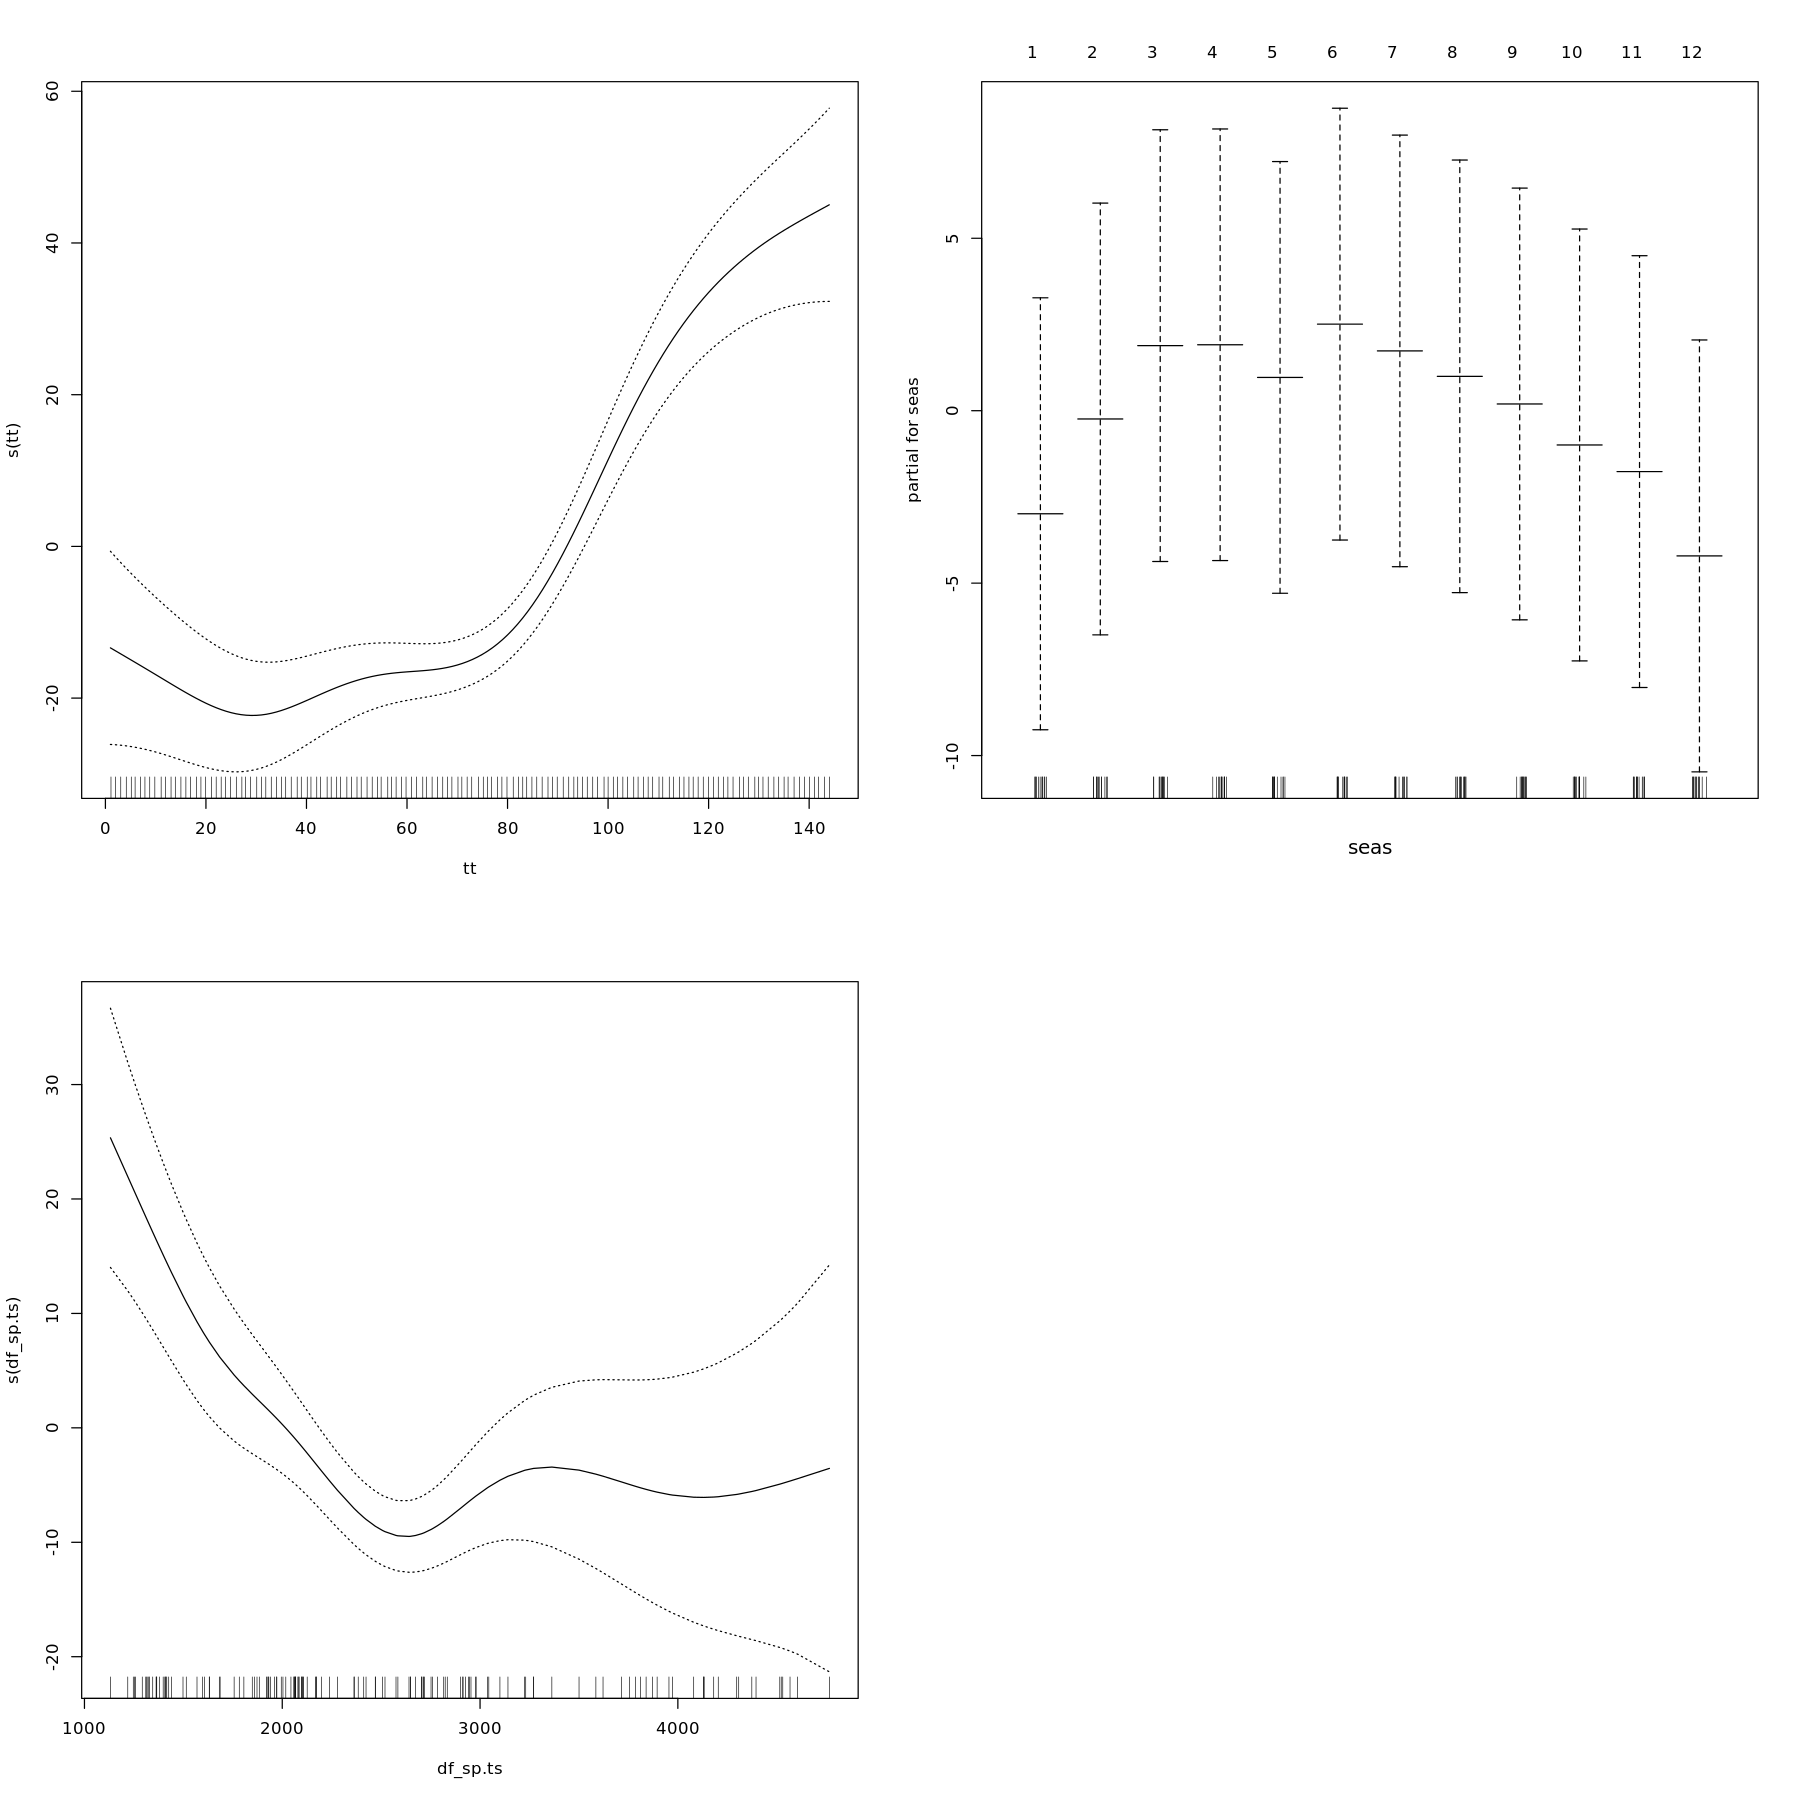

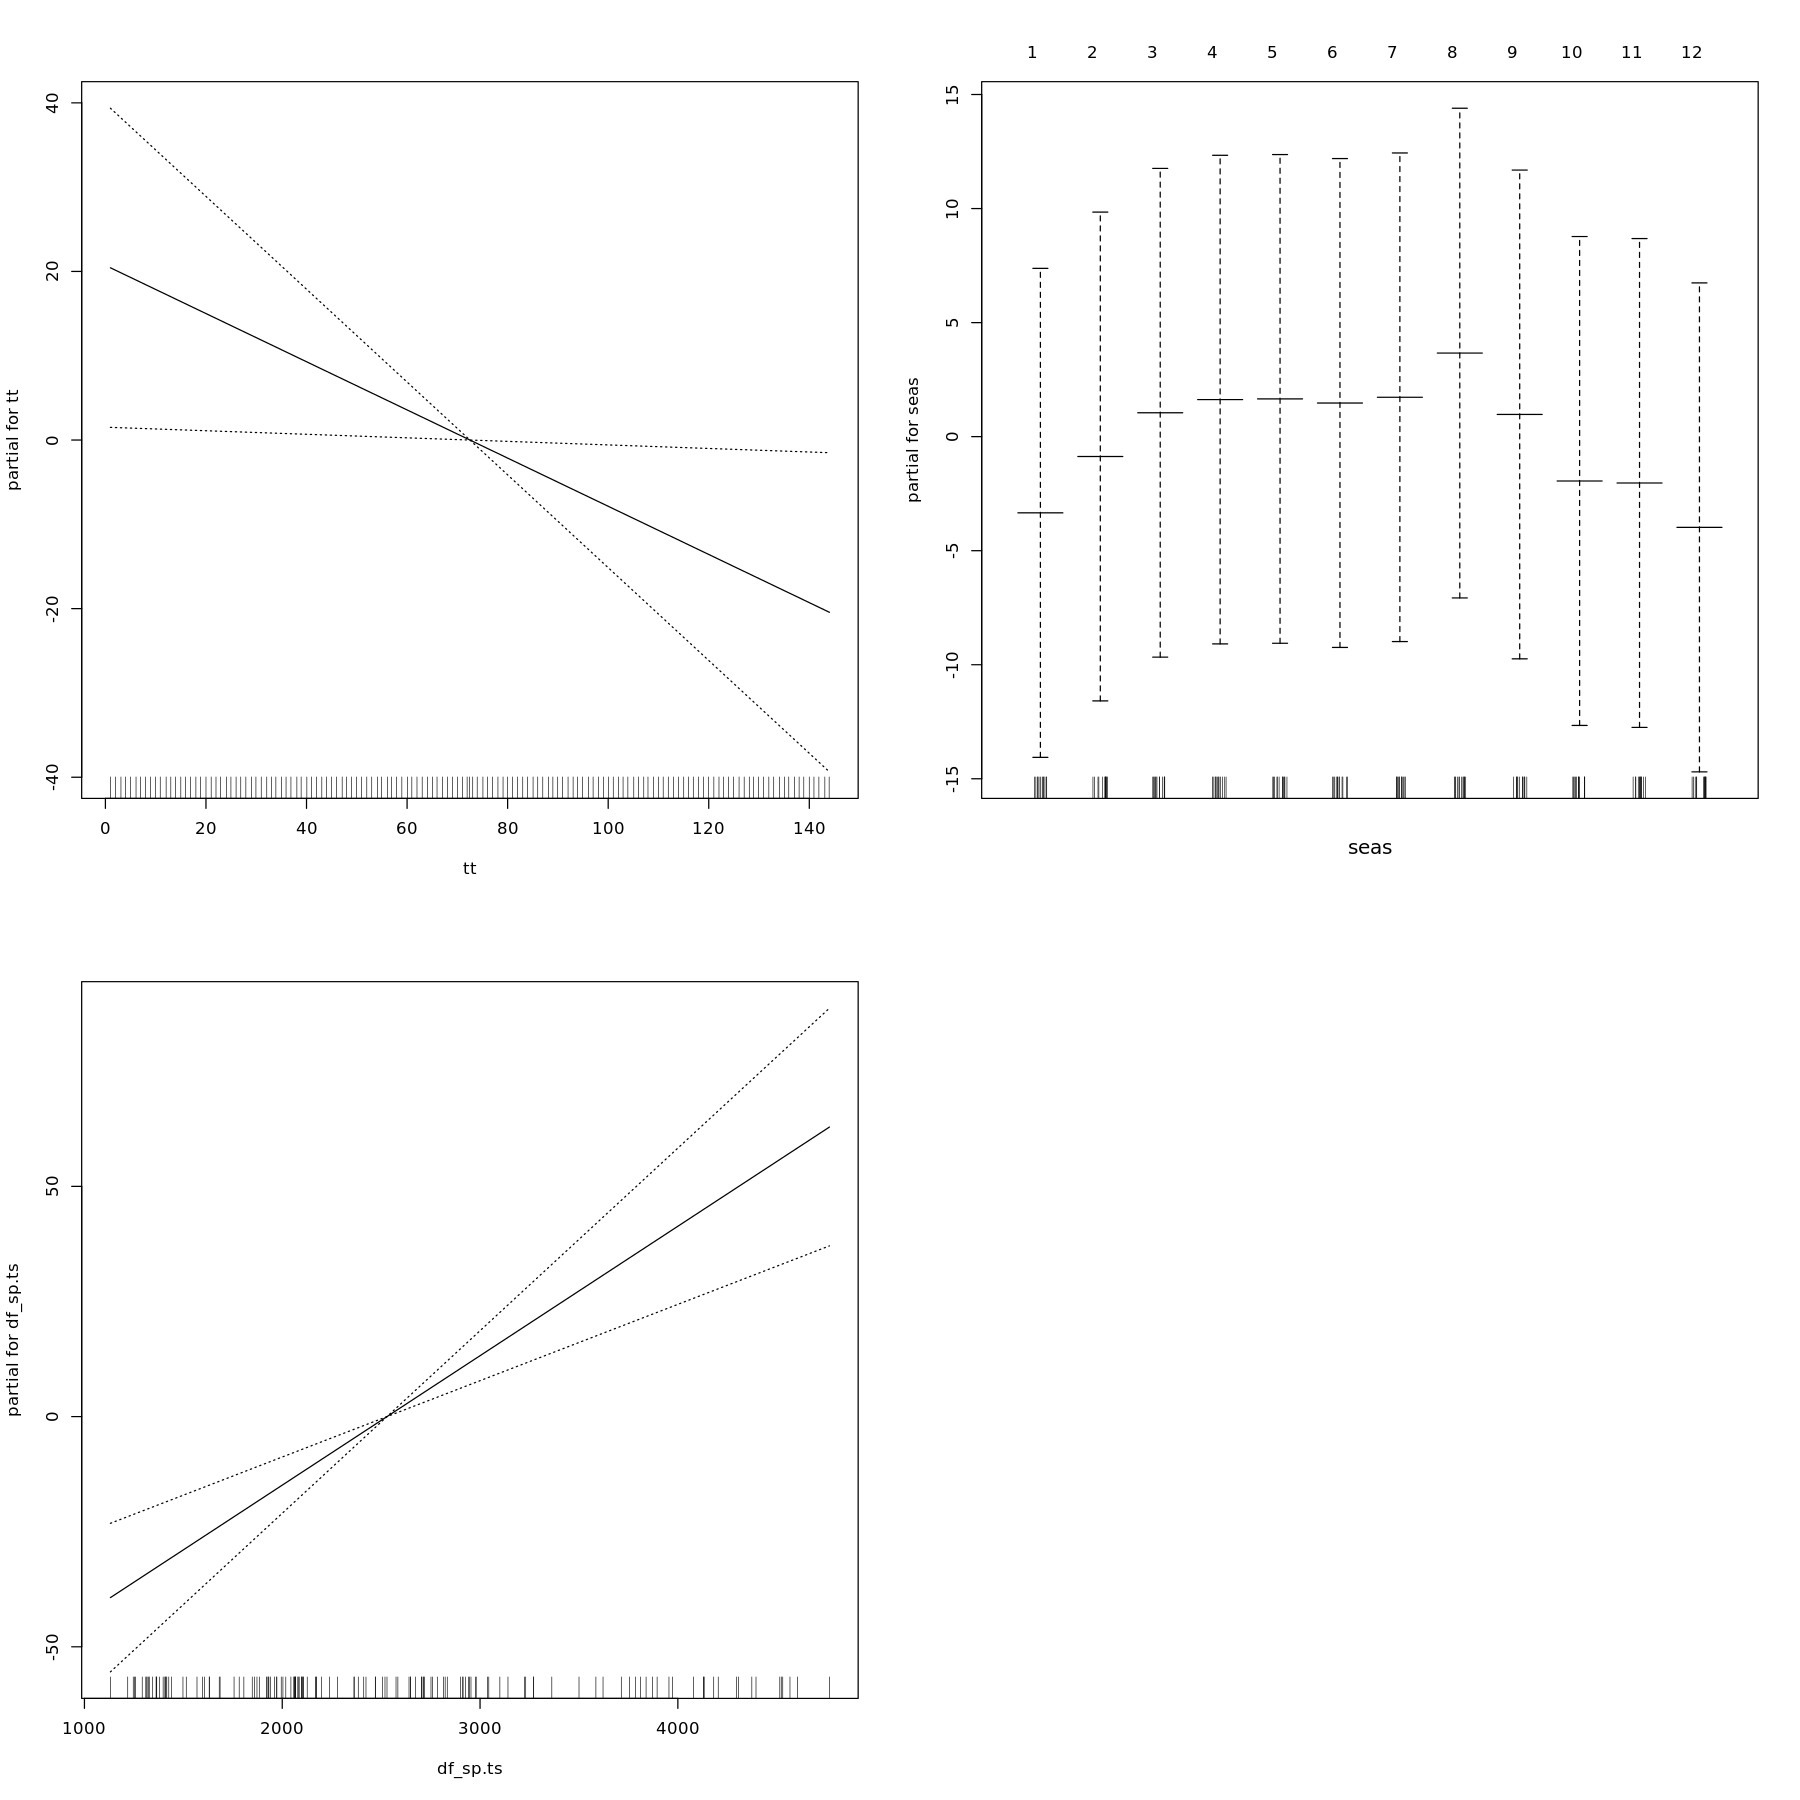

In [ ]:
#######time and sp have a nonlinear effect (always take care of interpretability!)

par(mfrow=c(2,2))
plot(g1, se=T)
AIC(g1)


####linear model may be also performed with library(gam)
g0 <- gam(oil_price.ts~(tt)+seas+(df_sp.ts))
summary(g0)
par(mfrow=c(2,2))
plot(g0, se=T)
AIC(g0)

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lo.wam convergence not obtained in  30  iterations”
Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lo.wam convergence not obtained in  30  iterations”



Call: gam(formula = oil_price.ts ~ lo(tt) + seas + lo(df_sp.ts))
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-33.574  -6.150   1.684   6.759  20.512 

(Dispersion Parameter for gaussian family taken to be 129.5123)

    Null Deviance: 85347.88 on 143 degrees of freedom
Residual Deviance: 16203.89 on 125.1147 degrees of freedom
AIC: 1128.565 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                 Df Sum Sq Mean Sq  F value Pr(>F)    
lo(tt)         1.00  32013   32013 247.1828 <2e-16 ***
seas          11.00    554      50   0.3889 0.9583    
lo(df_sp.ts)   1.00     42      42   0.3230 0.5708    
Residuals    125.11  16204     130                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
             Npar Df Npar F     Pr(F)    
(Intercept)                              
lo(tt)           2.3 43.535 2.220e-16 ***
seas                                     
lo(df_sp.ts)     2.6 27.

[1] 1128.565

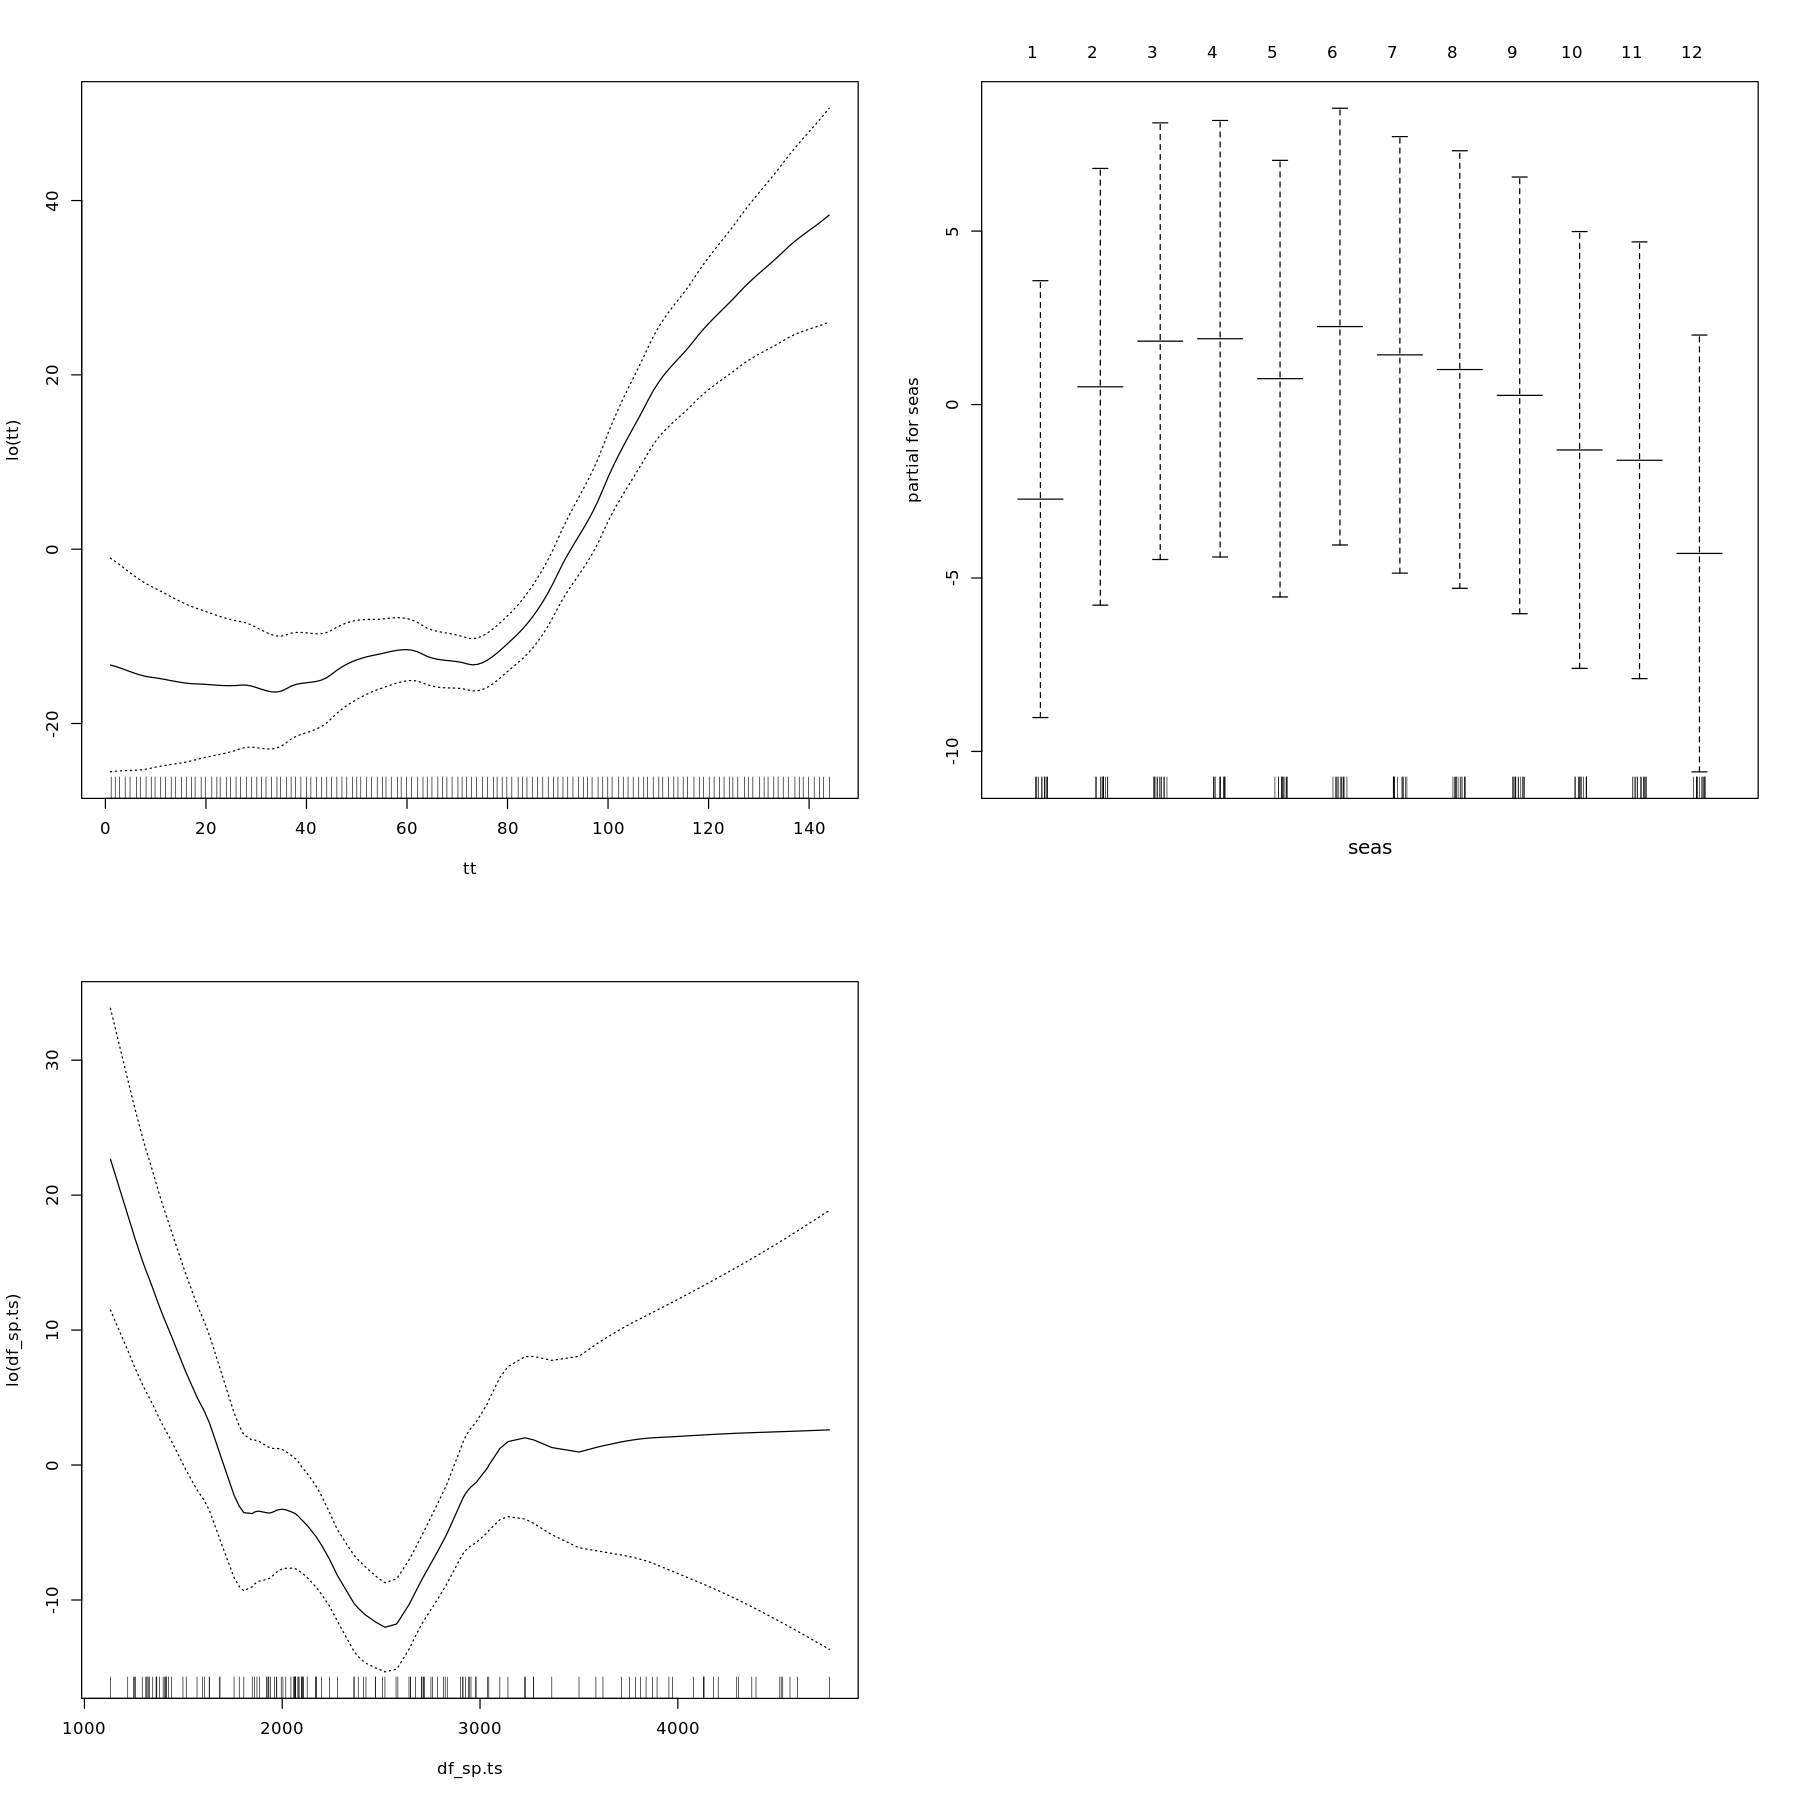

In [ ]:
####GAM with splines performs better###


####try another option with loess (lo)
g2<- gam(oil_price.ts~lo(tt)+seas+lo(df_sp.ts))
summary(g2)
par(mfrow=c(2,2))
plot(g2, se=T)
AIC(g2)

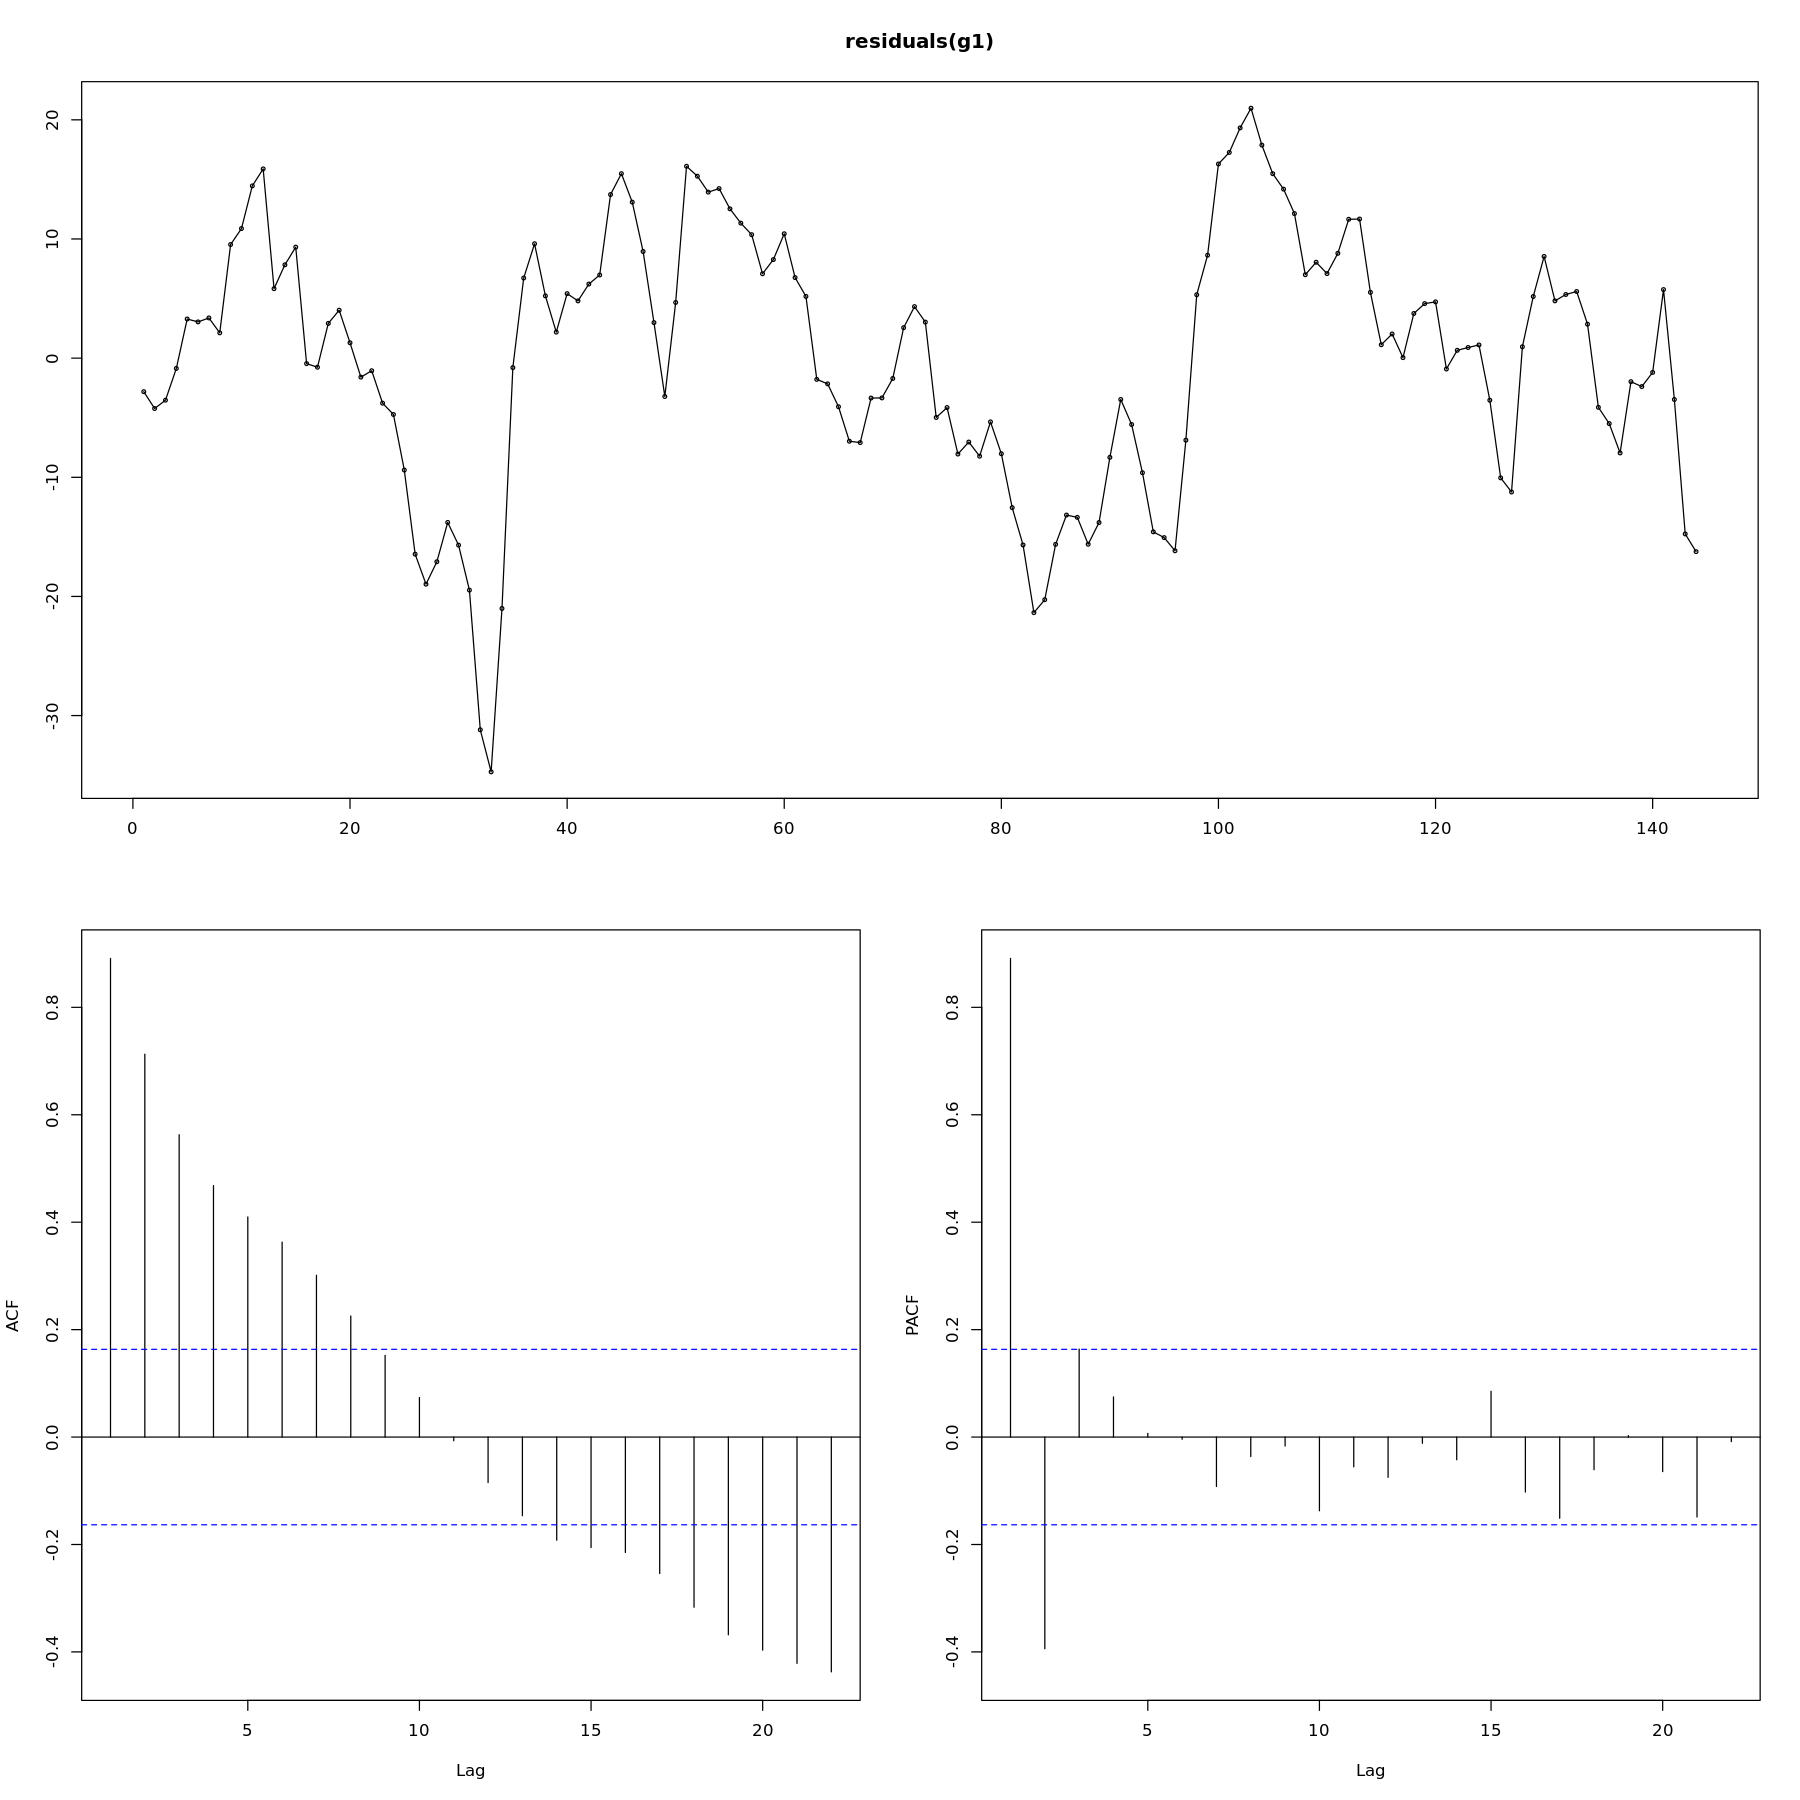

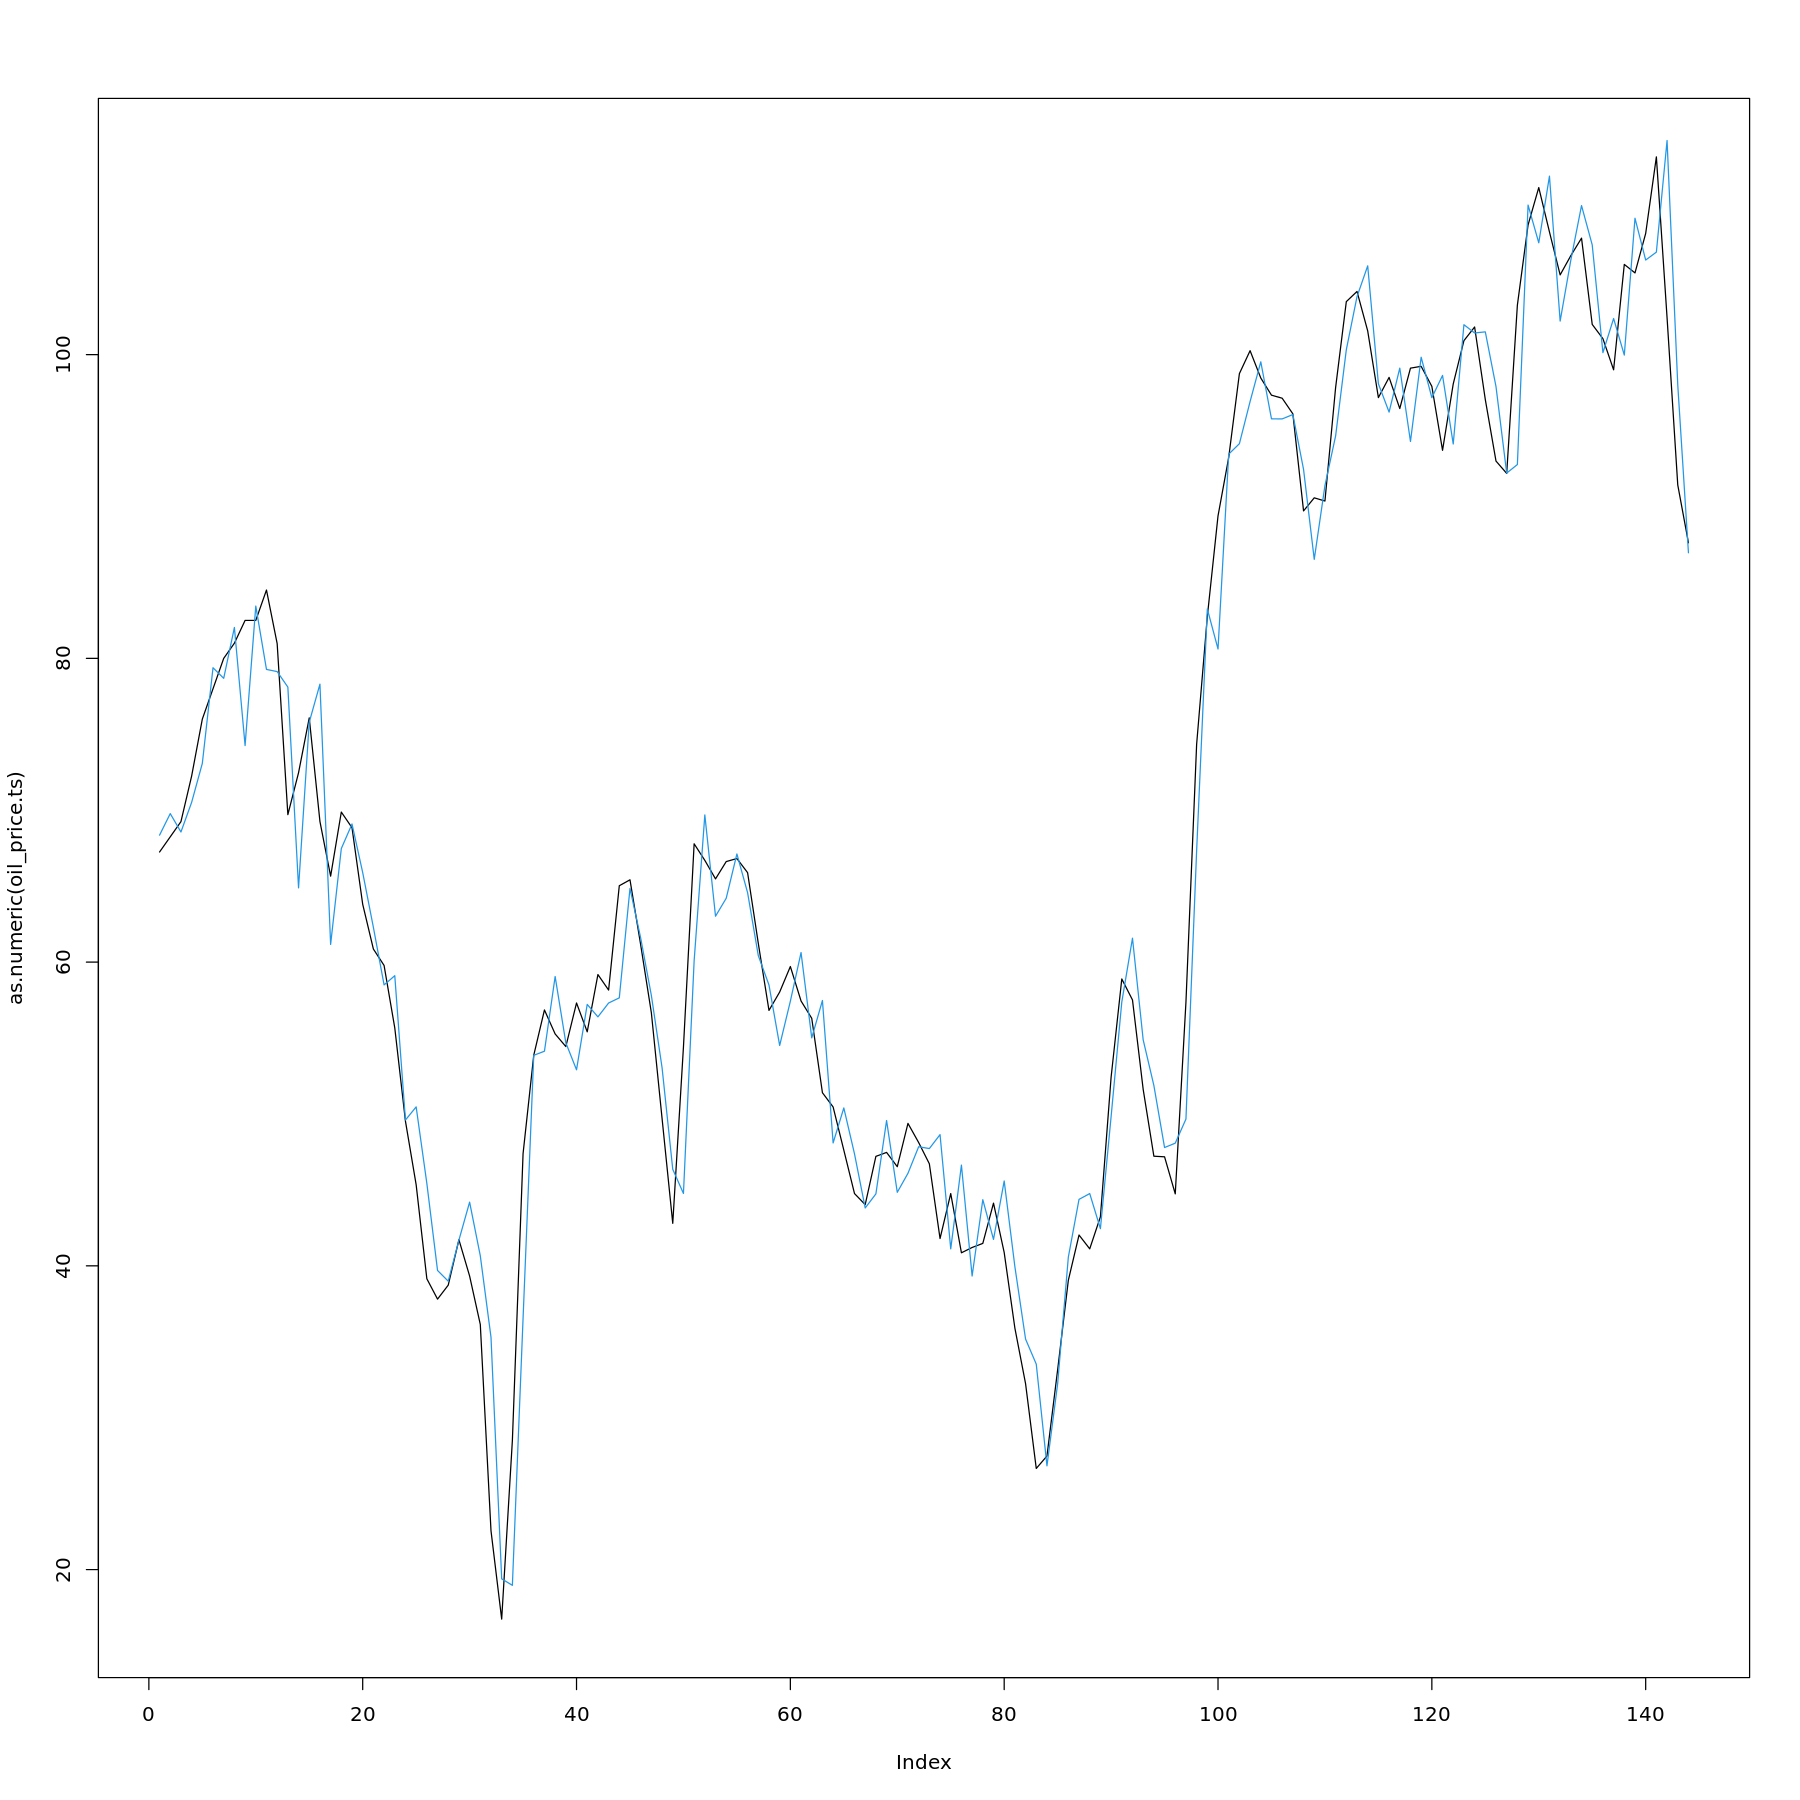

In [ ]:
#######perform analysis of residuals
tsdisplay(residuals(g1))
aar1<- auto.arima(residuals(g1))

plot(as.numeric(oil_price.ts), type="l")
lines(fitted(aar1)+ fitted(g1), col=4)


In [ ]:
####### financial indicators
start_date <- Sys.Date()-(365*18)
end_date <- Sys.Date()
##crudeoil
cl <- getSymbols("CL=F", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="daily", auto.assign=FALSE)
df_cl = data.frame(date = index(cl), cl, row.names=NULL)
df_cl<- na.omit(df_cl)
df_cl.ts <- ts(df_cl$CL.F.Close, frequency=12)
# df_cl.ts
##brent
bz <- getSymbols("BZ=F", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="daily", auto.assign=FALSE)
df_bz = data.frame(date = index(bz), bz, row.names=NULL)
df_bz<- na.omit(df_bz)
df_bz.ts <- ts(df_bz$BZ.F.Close, frequency=12)
# df_bz.ts
## S&P500
sp <- getSymbols("^GSPC", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="daily", auto.assign=FALSE)
df_sp = data.frame(date = index(sp), sp, row.names=NULL)
df_sp<- na.omit(df_sp)
df_sp.ts <- ts(df_sp$GSPC.Close, frequency=12)
# df_sp.ts
## Nasdaq
nas <- getSymbols("^IXIC", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="daily", auto.assign=FALSE)
df_nas = data.frame(date = index(nas), nas, row.names=NULL)
df_nas<- na.omit(df_nas)
df_nas.ts <- ts(df_nas$IXIC.Close, frequency=12)
# df_nas.ts
## Gold futures
gold <- getSymbols("GC=F", verbose = TRUE, src = "yahoo", 
              from=start_date,to=end_date, periodicity="daily", auto.assign=FALSE)
df_gold = data.frame(date = index(gold), gold, row.names=NULL)
df_gold<- na.omit(df_gold)
df_gold.ts <- ts(df_gold$GC.F.Close, frequency=12)
# df_gold.ts

## EUR/US
eus <- getSymbols("EURUSD=X", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="daily", auto.assign=FALSE)
df_eus = data.frame(date = index(eus), eus, row.names=NULL)
df_eus<- na.omit(df_eus)
df_eus.ts <- ts(df_eus$EURUSD.X.Close, frequency=12)
# df_eus.ts
## 10-YR bond
tnx <- getSymbols("^TNX", verbose = TRUE, src = "yahoo", 
               from=start_date,to=end_date, periodicity="daily", auto.assign=FALSE)
df_tnx = data.frame(date = index(tnx), tnx, row.names=NULL)
df_tnx<- na.omit(df_tnx)
df_tnx.ts <- ts(df_tnx$TNX.Close, frequency=12)
# df_tnx.ts



downloading  CL=F .....

done.


Warning message:
“CL=F contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


downloading  BZ=F .....

done.


Warning message:
“BZ=F contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


downloading  ^GSPC .....

done.
downloading  ^IXIC .....

done.
downloading  GC=F .....

done.


Warning message:
“GC=F contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


downloading  EURUSD=X .....

done.


Warning message:
“EURUSD=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


downloading  ^TNX .....

done.


Warning message:
“^TNX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


In [ ]:
cbind.fill <- function(...){
    nm <- list(...) 
    nm <- lapply(nm, as.matrix)
    n <- max(sapply(nm, nrow)) 
    do.call(cbind, lapply(nm, function (x) 
        rbind(x, matrix(, n-nrow(x), ncol(x))))) 
}

In [ ]:
set.seed(12345)
#data <- cbind.fill(df_cl, df_bz, df_sp, df_nas, df_gold, df_eus, df_tnx)
data <- left_join(df_cl, df_bz, by = "date")
data <- left_join(data, df_sp, by = "date")
data <- left_join(data, df_nas, by = "date")
data <- left_join(data, df_gold, by = "date")
data <- left_join(data, df_eus, by = "date")
data <- left_join(data, df_tnx, by = "date")
data <- na.omit(data)
#data

In [ ]:
data <- data[,!names(data) %in% c("CL.F.Adjusted")]

In [ ]:
head(data)


date       CL.F.Open CL.F.High CL.F.Low CL.F.Close CL.F.Volume BZ.F.Open
637 2007-07-30 76.95     77.33     76.05    76.83      189456      75.85    
638 2007-07-31 76.70     78.28     76.60    78.21      196464      75.70    
639 2007-08-01 77.94     78.77     76.09    76.53      306683      77.00    
640 2007-08-02 76.74     77.44     75.52    76.86      214006      75.22    
641 2007-08-03 76.89     77.36     75.04    75.48      233021      75.39    
642 2007-08-06 75.04     75.10     71.60    72.06      292987      74.54    
    BZ.F.High BZ.F.Low BZ.F.Close ⋯ EURUSD.X.Low EURUSD.X.Close EURUSD.X.Volume
637 76.53     75.44    75.74      ⋯ 1.362602     1.371197       0              
638 77.17     75.67    77.05      ⋯ 1.367204     1.367204       0              
639 77.06     74.86    75.35      ⋯ 1.364592     1.367708       0              
640 76.21     74.27    75.76      ⋯ 1.365300     1.370708       0              
641 76.00     74.53    74.75      ⋯ 1.368907     1.378702       0              
642 74.60     70.87    71.17      ⋯ 1.378398     1.379691       0              
    EURUSD.X.Adjusted TNX.Open TNX.High TNX.Low TNX.Close TNX.Volume
637 1.371197          4.763    4.810    4.763   4.804     0         
638 1.367204          4.837    4.843    4.769   4.771     0         
639 1.367708          4.733    4.780    4.721   4.759     0         
640 1.370708          4.802    4.806    4.753   4.753     0         
641 1.378702          4.766    4.774    4.694   4.700     0         
642 1.379691          4.682    4.735    4.680   4.731     0         
    TNX.Adjusted
637 4.804       
638 4.771       
639 4.759       
640 4.753       
641 4.700       
642 4.731

In [ ]:
data[,c(10, 16, 22, 28, 36, 40)]

BZ.F.Close GSPC.Close IXIC.Close GC.F.Close EURUSD.X.Adjusted TNX.Close
637  75.74      1473.91    2583.28    664.1      1.371197          4.804    
638  77.05      1455.27    2546.27    666.9      1.367204          4.771    
639  75.35      1465.81    2553.87    663.6      1.367708          4.759    
640  75.76      1472.20    2575.98    664.6      1.370708          4.753    
641  74.75      1433.06    2511.25    672.5      1.378702          4.700    
642  71.17      1467.67    2547.33    671.5      1.379691          4.731    
643  71.80      1476.71    2561.60    670.6      1.374098          4.743    
644  70.99      1497.49    2612.98    674.5      1.380300          4.860    
645  70.21      1453.09    2556.49    661.4      1.367409          4.790    
646  70.39      1453.64    2544.89    670.3      1.368907          4.776    
647  70.23      1452.92    2542.24    669.7      1.361304          4.778    
648  70.51      1426.54    2499.12    668.6      1.353491          4.732    
649  71.64      1406.70    2458.83    668.9      1.342805          4.706    
650  69.77      1411.27    2451.07    648.3      1.342498          4.600    
651  70.44      1445.94    2505.03    656.9      1.349400          4.673    
652  69.85      1445.55    2508.59    656.7      1.347491          4.634    
653  68.69      1447.12    2521.30    656.7      1.345497          4.590    
654  68.70      1464.07    2552.80    659.1      1.354995          4.620    
655  69.86      1462.50    2541.70    658.9      1.355693          4.618    
656  70.62      1479.37    2576.69    668.0      1.366699          4.633    
657  70.95      1466.79    2561.25    666.8      1.363791          4.596    
658  70.55      1432.36    2500.64    664.4      1.359897          4.530    
659  72.13      1463.76    2563.16    666.3      1.367409          4.553    
660  71.90      1457.64    2565.30    665.0      1.364201          4.502    
661  72.69      1473.99    2596.36    673.0      1.364201          4.537    
662  73.92      1489.42    2630.24    682.5      1.362008          4.558    
663  74.34      1472.29    2605.95    681.7      1.365393          4.473    
664  74.77      1478.55    2614.32    695.6      1.369600          4.500    
665  75.07      1453.55    2565.70    700.8      1.377505          4.368    
667  76.38      1471.49    2597.47    712.2      1.384006          4.364    
⋮    ⋮          ⋮          ⋮          ⋮          ⋮                 ⋮        
4497 83.63      4026.12    11226.36   1753.3     1.040810          3.691    
4498 83.19      3963.94    11049.50   1740.1     1.036753          3.703    
4499 83.03      3957.63    10983.78   1748.4     1.034554          3.748    
4500 85.43      4080.11    11468.00   1746.0     1.032450          3.703    
4501 86.88      4076.57    11482.45   1801.1     1.042535          3.529    
4502 85.57      4071.70    11461.50   1795.9     1.052842          3.506    
4503 82.68      3998.84    11239.94   1767.4     1.054419          3.599    
4504 79.35      3941.26    11014.89   1769.3     1.049692          3.513    
4505 77.17      3933.92    10958.55   1785.5     1.046901          3.408    
4506 76.15      3963.51    11082.00   1788.7     1.051326          3.491    
4507 76.10      3934.38    11004.62   1798.1     1.055966          3.567    
4508 77.99      3990.56    11143.74   1780.5     1.052222          3.611    
4509 80.68      4019.65    11256.81   1813.9     1.054174          3.501    
4510 82.70      3995.32    11170.89   1807.5     1.062665          3.503    
4511 81.21      3895.75    10810.53   1777.2     1.067635          3.450    
4512 79.04      3852.36    10705.41   1790.0     1.064056          3.482    
4513 79.80      3817.66    10546.03   1787.7     1.058504          3.581    
4514 79.99      3821.62    10547.11   1815.9     1.061458          3.684    
4515 82.20      3878.44    10709.37   1815.9     1.062699          3.684    
4516 80.98      3822.39    10476.12   1787.0     1.061008          3.669    
4

'data.frame':	3801 obs. of  42 variables:
 $ date             : Date, format: "2007-07-30" "2007-07-31" ...
 $ CL.F.Open        : num  76.9 76.7 77.9 76.7 76.9 ...
 $ CL.F.High        : num  77.3 78.3 78.8 77.4 77.4 ...
 $ CL.F.Low         : num  76.1 76.6 76.1 75.5 75 ...
 $ CL.F.Close       : num  76.8 78.2 76.5 76.9 75.5 ...
 $ CL.F.Volume      : num  189456 196464 306683 214006 233021 ...
 $ BZ.F.Open        : num  75.8 75.7 77 75.2 75.4 ...
 $ BZ.F.High        : num  76.5 77.2 77.1 76.2 76 ...
 $ BZ.F.Low         : num  75.4 75.7 74.9 74.3 74.5 ...
 $ BZ.F.Close       : num  75.7 77.1 75.3 75.8 74.8 ...
 $ BZ.F.Volume      : num  2575 3513 3930 6180 4387 ...
 $ BZ.F.Adjusted    : num  75.7 77.1 75.3 75.8 74.8 ...
 $ GSPC.Open        : num  1459 1474 1455 1465 1472 ...
 $ GSPC.High        : num  1478 1488 1468 1476 1473 ...
 $ GSPC.Low         : num  1454 1454 1440 1461 1433 ...
 $ GSPC.Close       : num  1474 1455 1466 1472 1433 ...
 $ GSPC.Volume      : num  4.13e+09 4.52e+09 5.2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -37.63   52.38   71.65   72.63   92.76  145.29 

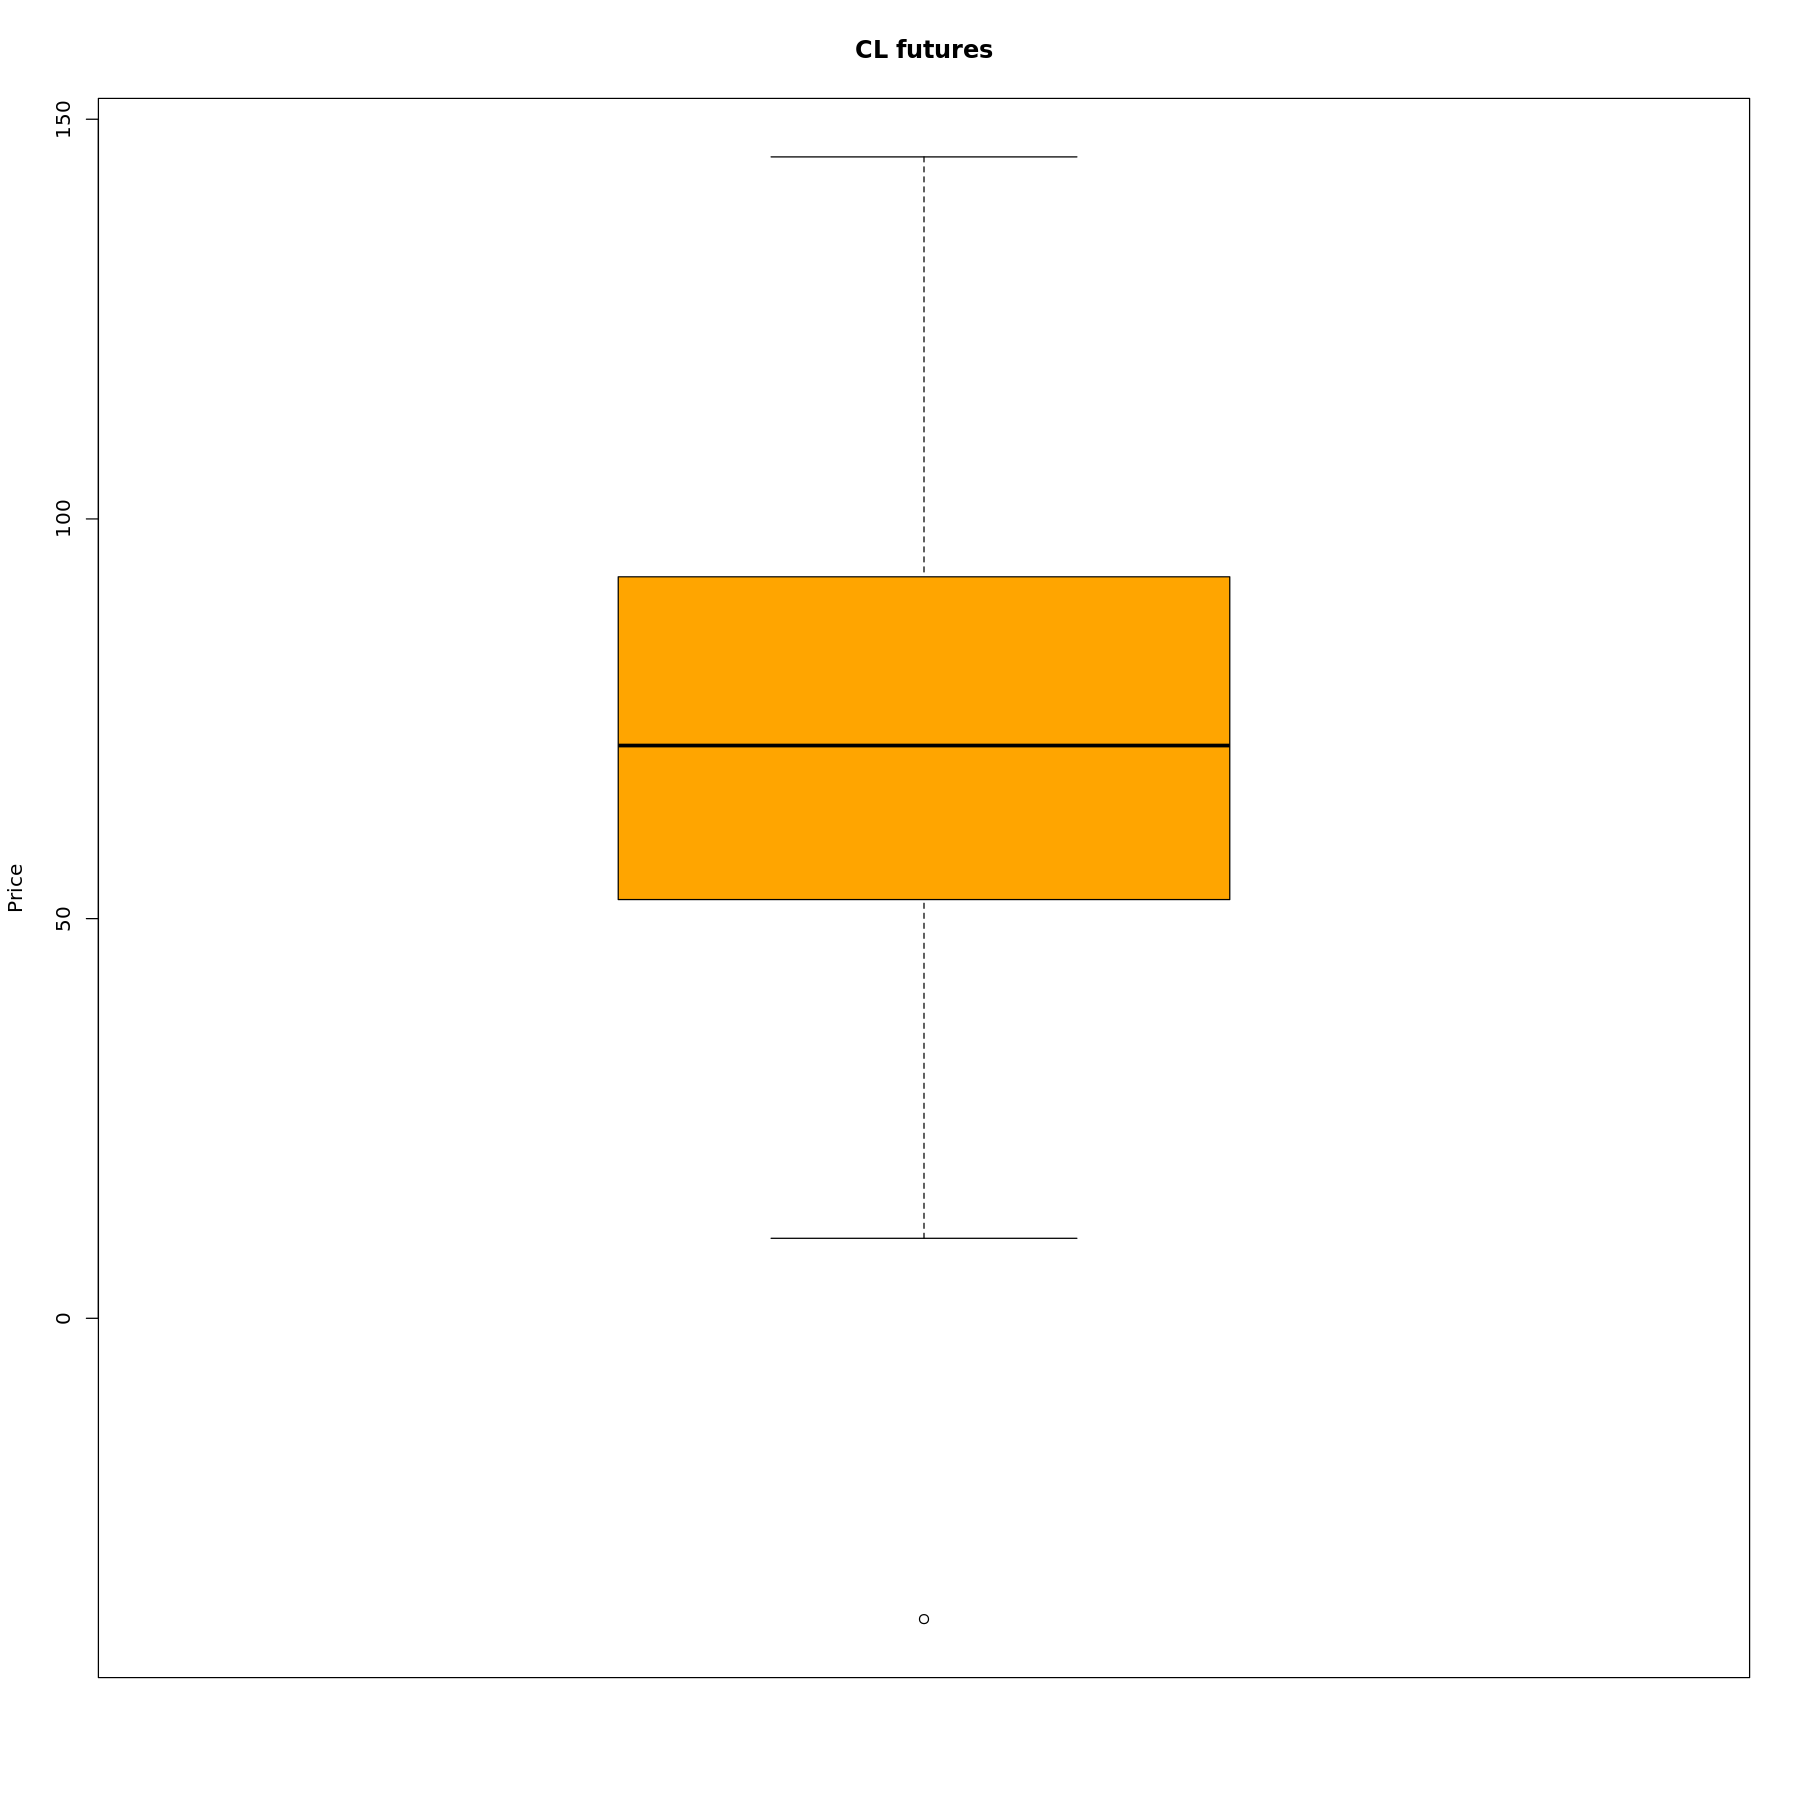

      date              CL.F.Open        CL.F.High         CL.F.Low     
 Min.   :2007-07-30   Min.   :-14.00   Min.   : 13.69   Min.   :-40.32  
 1st Qu.:2011-07-20   1st Qu.: 52.37   1st Qu.: 53.27   1st Qu.: 51.44  
 Median :2015-06-08   Median : 71.71   Median : 72.63   Median : 70.62  
 Mean   :2015-05-20   Mean   : 72.65   Mean   : 73.79   Mean   : 71.41  
 3rd Qu.:2019-03-27   3rd Qu.: 92.83   3rd Qu.: 93.87   3rd Qu.: 91.40  
 Max.   :2023-01-09   Max.   :145.19   Max.   :147.27   Max.   :143.22  
   CL.F.Close      CL.F.Volume        BZ.F.Open        BZ.F.High     
 Min.   :-37.63   Min.   :  48516   Min.   : 19.56   Min.   : 21.27  
 1st Qu.: 52.38   1st Qu.: 255394   1st Qu.: 56.83   1st Qu.: 57.72  
 Median : 71.65   Median : 338622   Median : 74.60   Median : 75.50  
 Mean   : 72.63   Mean   : 395503   Mean   : 78.14   Mean   : 79.10  
 3rd Qu.: 92.76   3rd Qu.: 508736   3rd Qu.:103.83   3rd Qu.:105.03  
 Max.   :145.29   Max.   :2288230   Max.   :146.08   Max.   :147.43  

   BZ.F.Close       GSPC.Close       IXIC.Close      GC.F.Close    
 Min.   : 19.33   Min.   : 676.5   Min.   : 1269   Min.   : 648.3  
 1st Qu.: 56.66   1st Qu.:1353.4   1st Qu.: 2737   1st Qu.:1194.3  
 Median : 74.65   Median :2044.2   Median : 4775   Median :1305.7  
 Mean   : 78.15   Mean   :2224.5   Mean   : 5860   Mean   :1366.0  
 3rd Qu.:103.80   3rd Qu.:2840.0   3rd Qu.: 7826   3rd Qu.:1642.5  
 Max.   :146.08   Max.   :4796.6   Max.   :16057   Max.   :2051.5  
 EURUSD.X.Adjusted   TNX.Close    
 Min.   :0.9596    Min.   :0.499  
 1st Qu.:1.1236    1st Qu.:1.833  
 Median :1.2146    Median :2.387  
 Mean   :1.2393    Mean   :2.455  
 3rd Qu.:1.3499    3rd Qu.:2.985  
 Max.   :1.5988    Max.   :4.860  

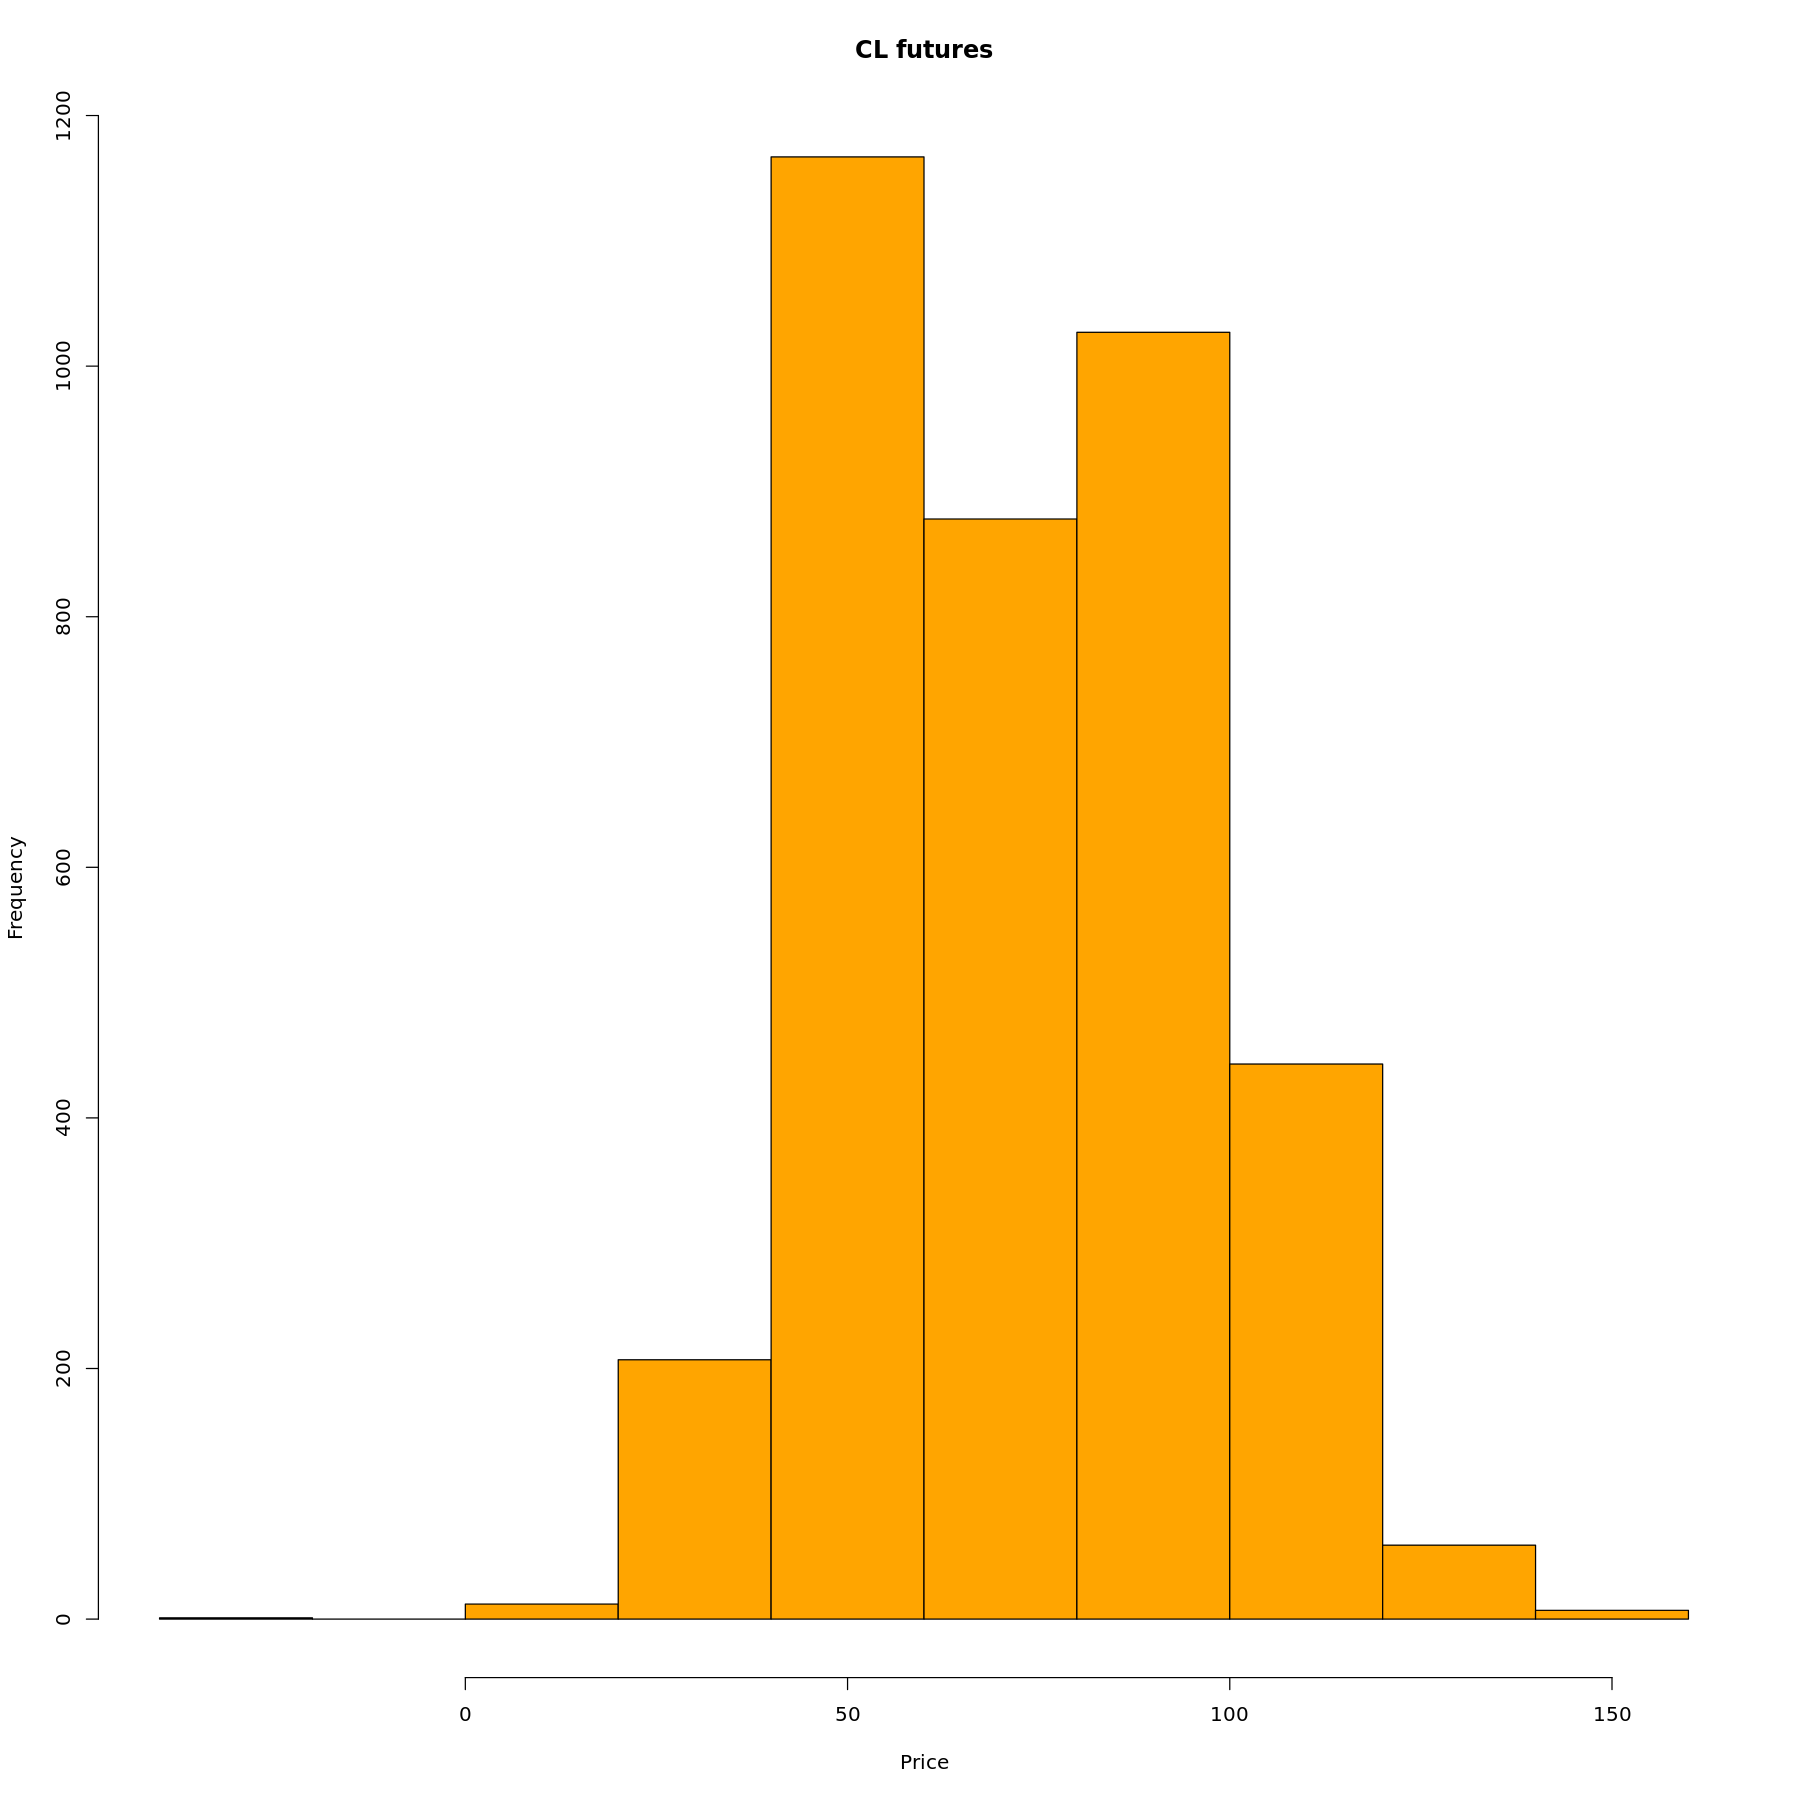

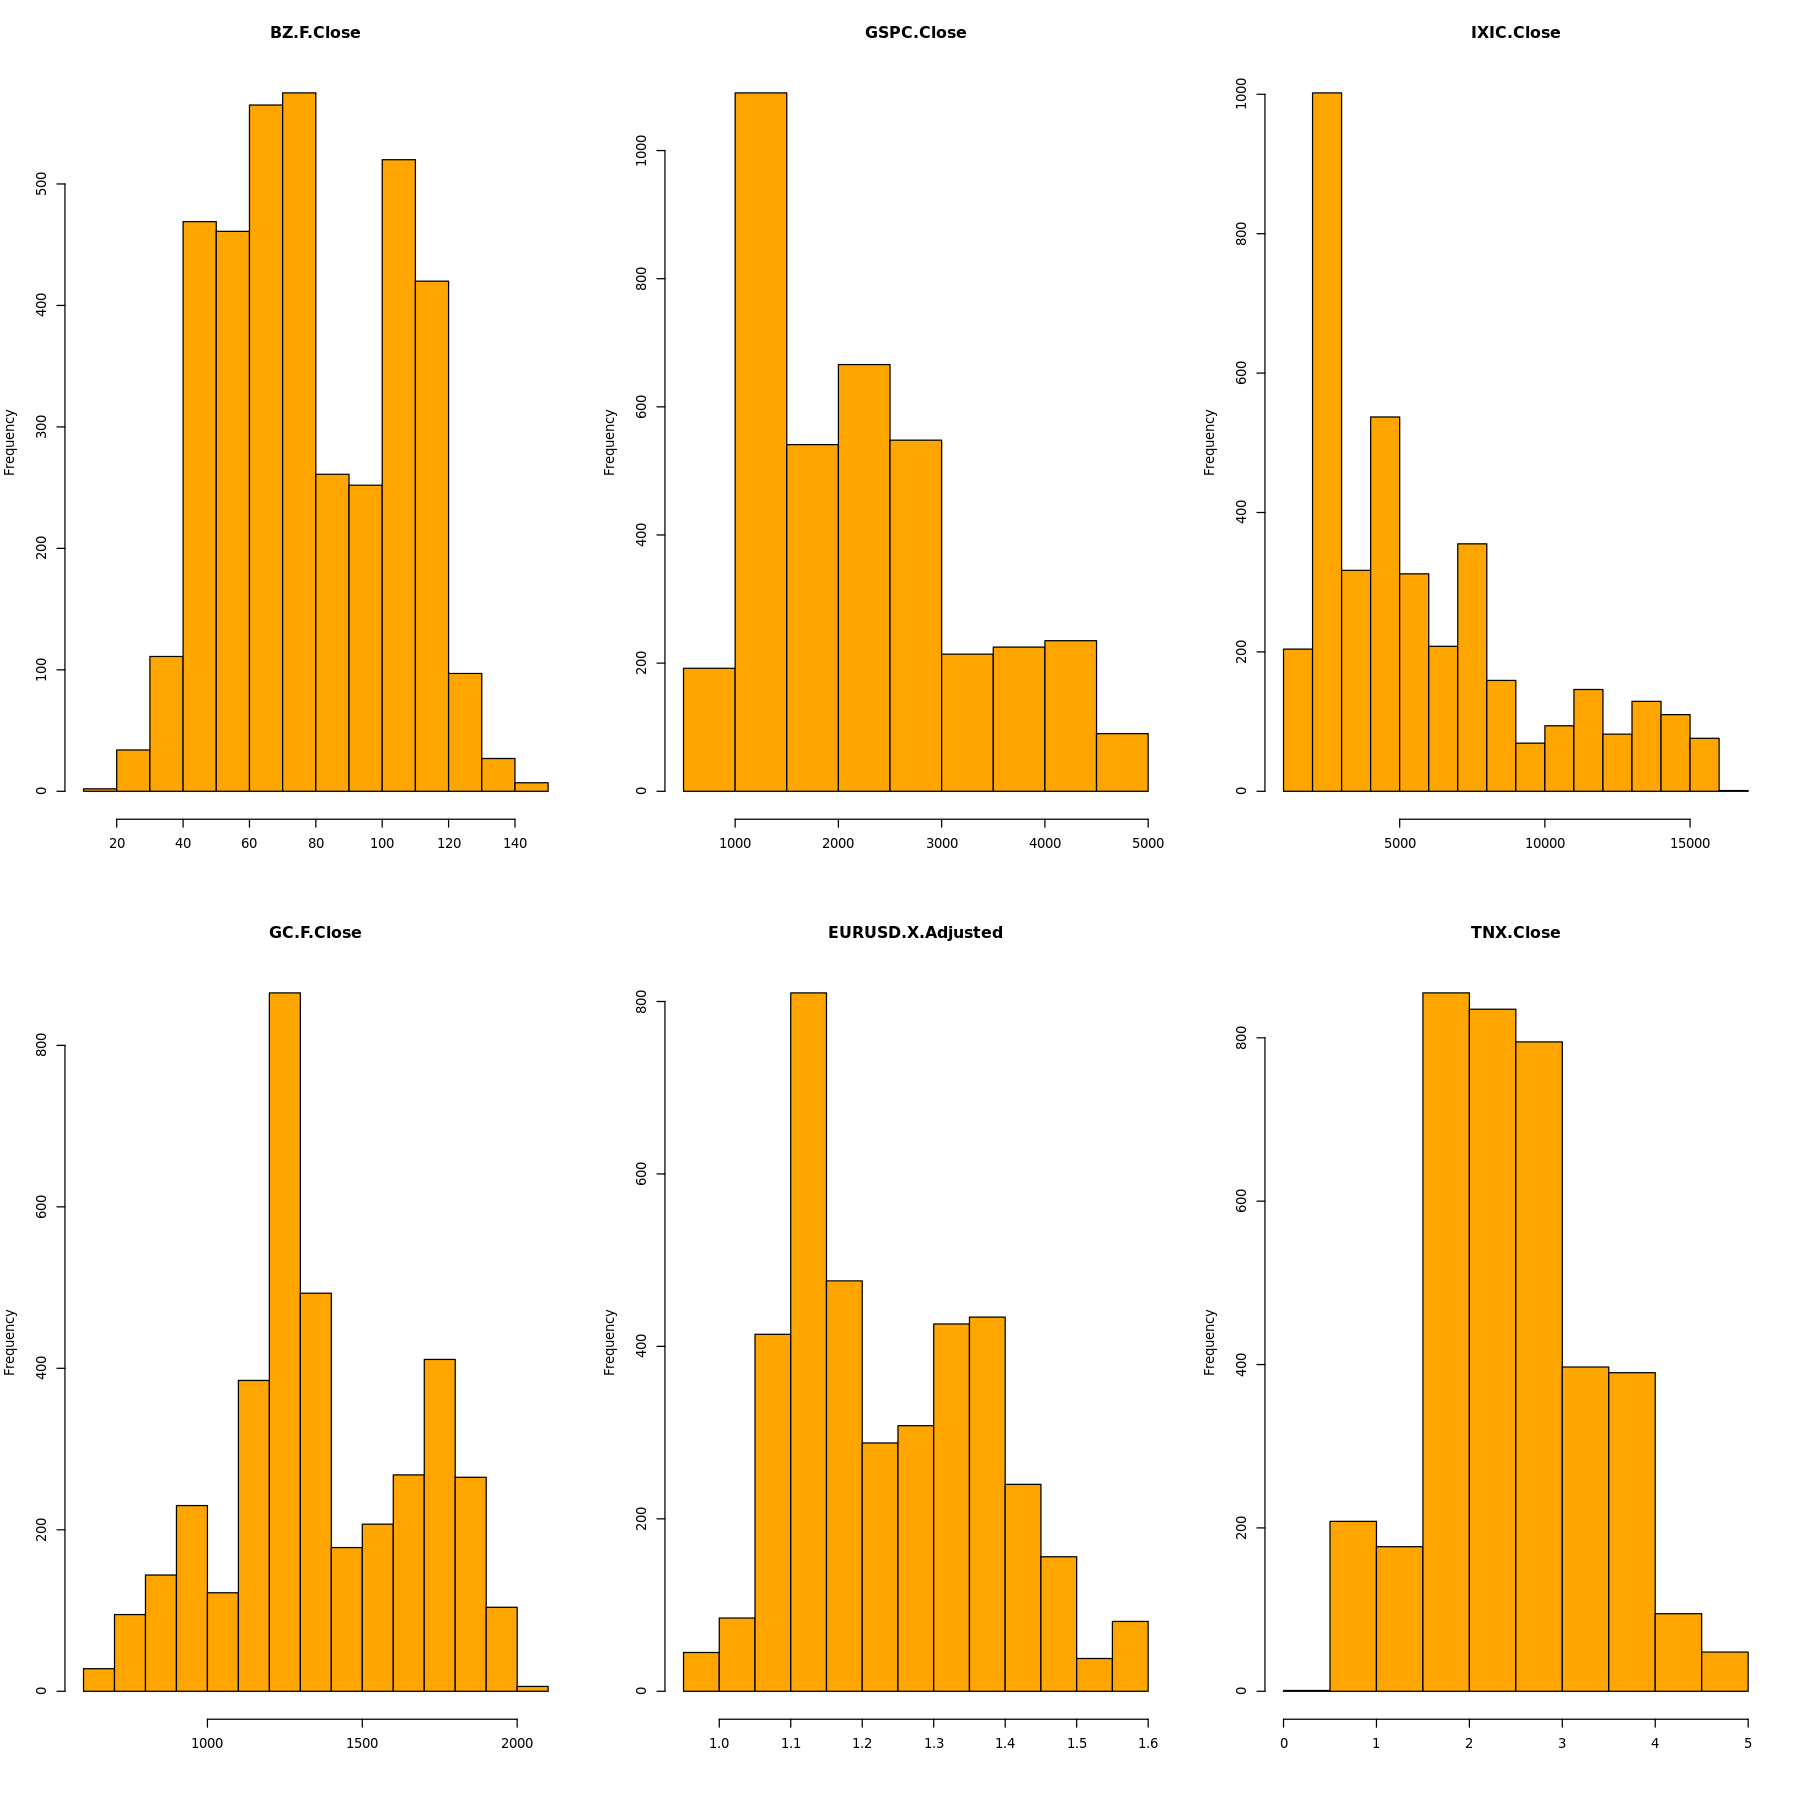

In [ ]:
str(data)
# Response variable
summary(data$CL.F.Close)
boxplot(data$CL.F.Close, col="orange", main="CL futures", ylab="Price")
#
hist(data$CL.F.Close, col="orange", main="CL futures", xlab="Price")
#
#explanatory variables
#"BZ.F.Close","GSPC.Close","IXIC.Close","GC.F.Close","EURUSD.X.Close","TNX.Close"
summary(data)

summary(data[,c(10, 16, 22, 28, 36, 40)])
par(mfrow=c(2,3))
for(i in c(10, 16, 22, 28, 36, 40)){
  hist(data[,i], col="orange", main=paste(colnames(data)[i]), xlab="")
}


   BZ.F.Close      GSPC.Close      IXIC.Close      GC.F.Close   
 Min.   :2.962   Min.   :6.517   Min.   :7.146   Min.   :6.474  
 1st Qu.:4.037   1st Qu.:7.210   1st Qu.:7.915   1st Qu.:7.085  
 Median :4.313   Median :7.623   Median :8.471   Median :7.174  
 Mean   :4.300   Mean   :7.604   Mean   :8.477   Mean   :7.193  
 3rd Qu.:4.642   3rd Qu.:7.952   3rd Qu.:8.965   3rd Qu.:7.404  
 Max.   :4.984   Max.   :8.476   Max.   :9.684   Max.   :7.626  
 EURUSD.X.Adjusted    TNX.Close      
 Min.   :-0.04122   Min.   :-0.6951  
 1st Qu.: 0.11653   1st Qu.: 0.6060  
 Median : 0.19439   Median : 0.8700  
 Mean   : 0.20857   Mean   : 0.8247  
 3rd Qu.: 0.30000   3rd Qu.: 1.0936  
 Max.   : 0.46925   Max.   : 1.5810  

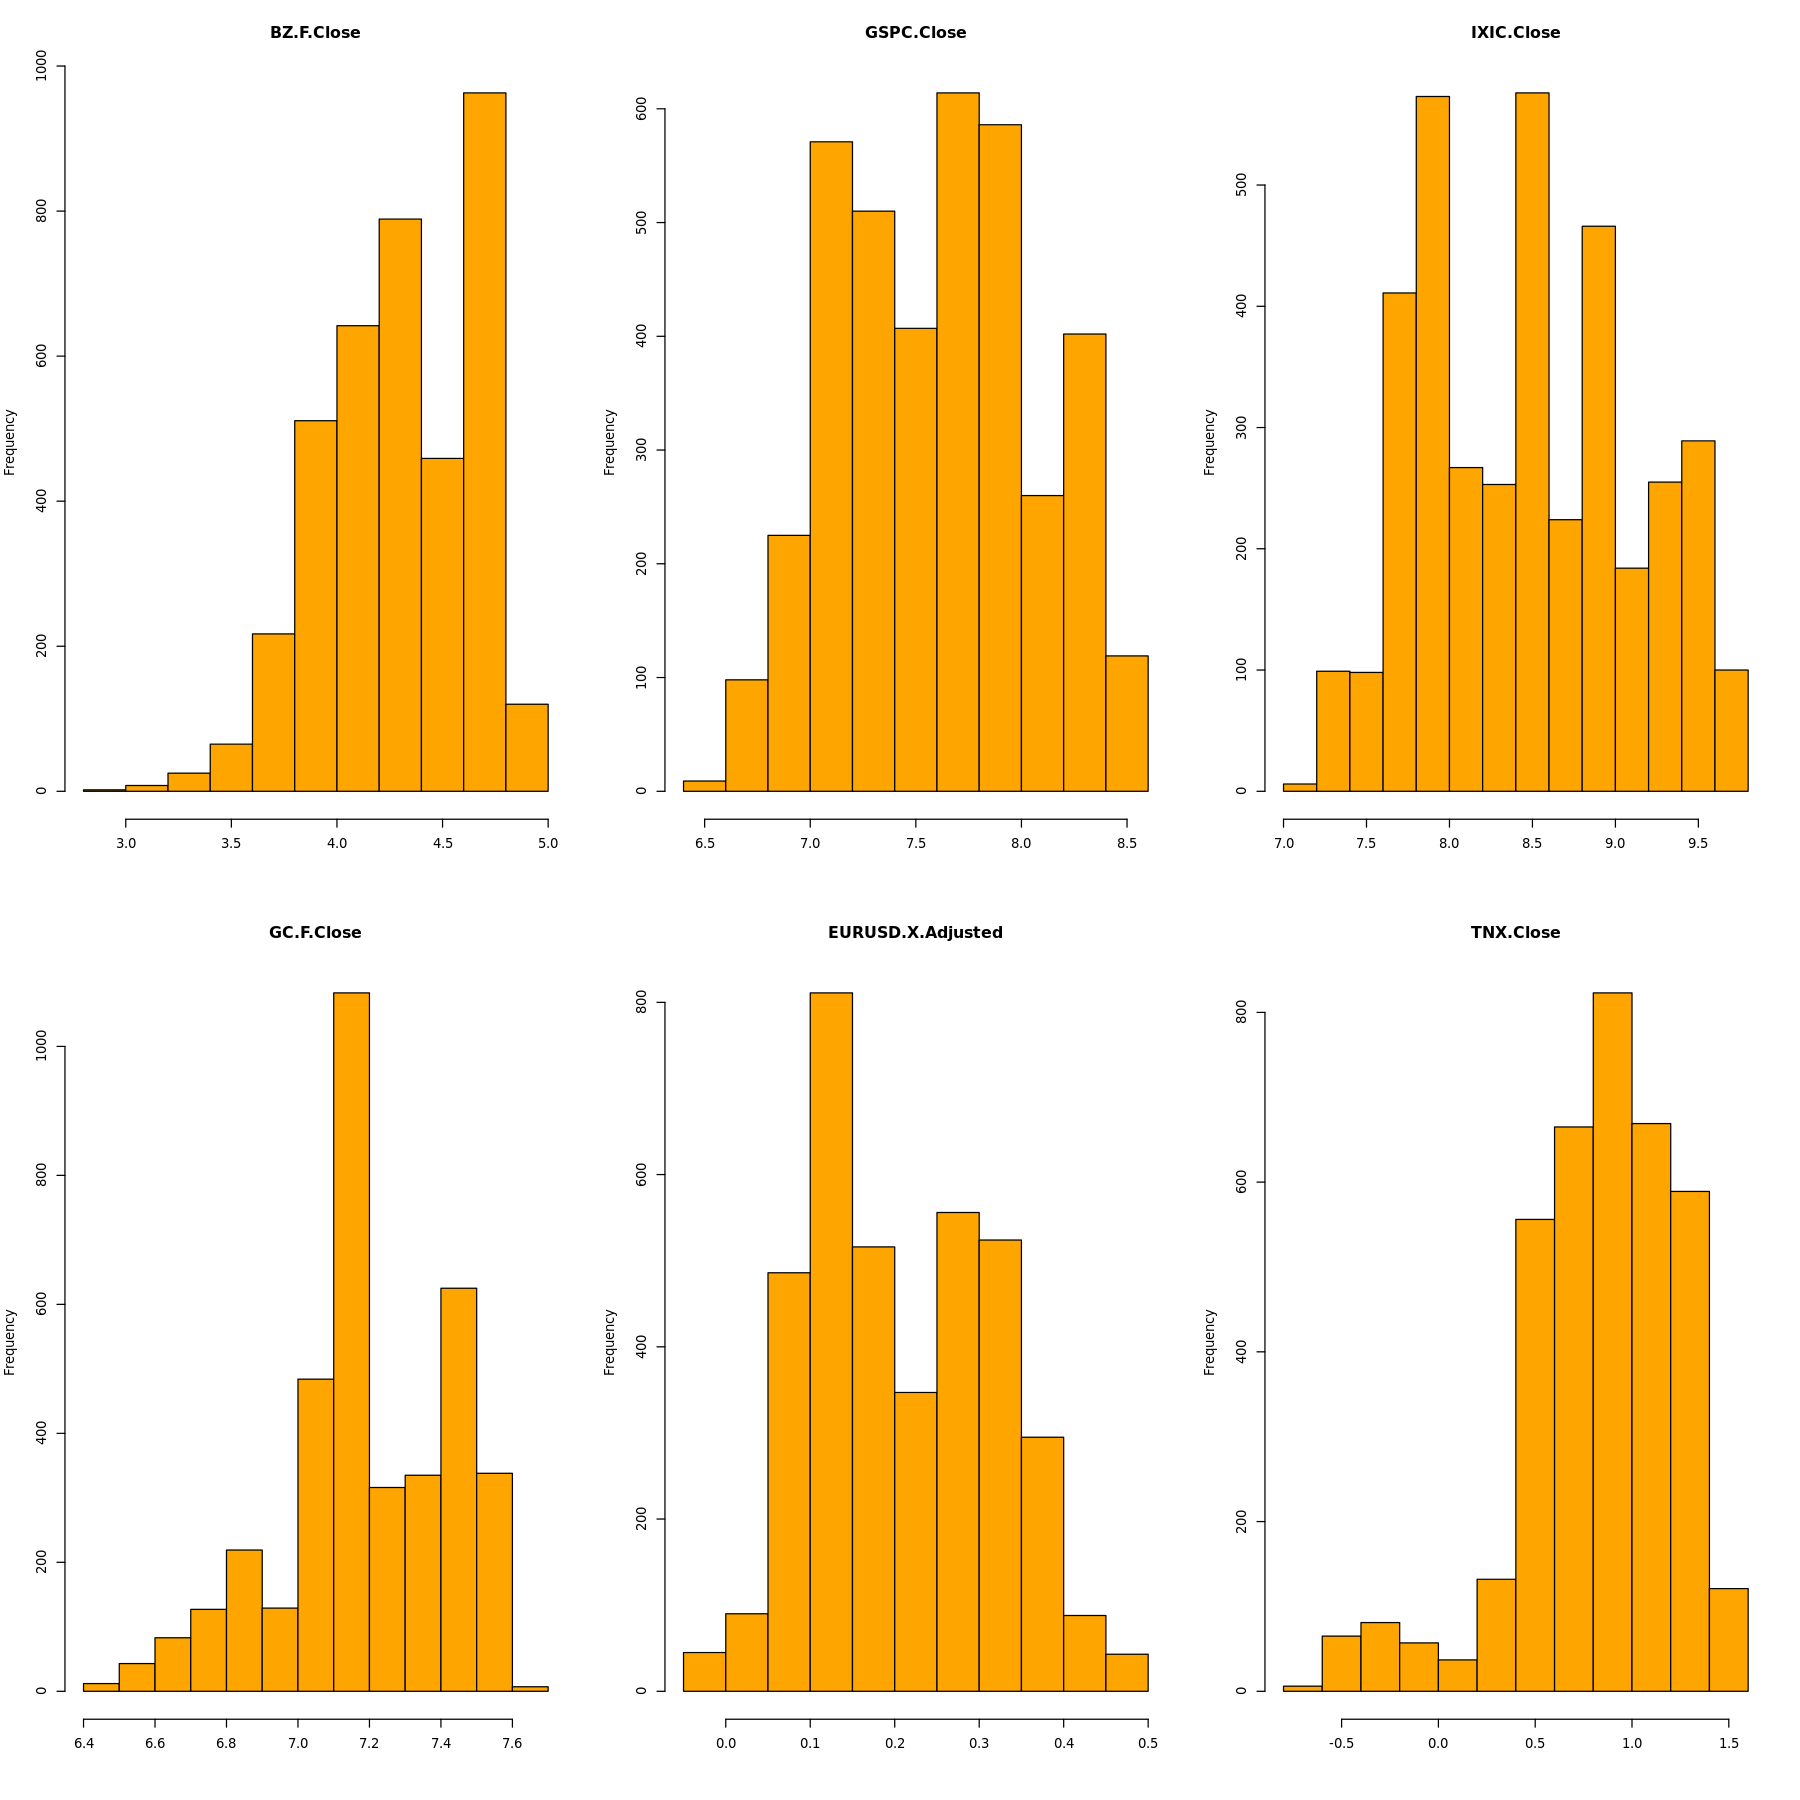

In [ ]:
#transform quantitative variables in log scale
data$BZ.F.Close <- log(data$BZ.F.Close)
data$GSPC.Close <- log(data$GSPC.Close)
data$IXIC.Close <- log(data$IXIC.Close)
data$GC.F.Close <- log(data$GC.F.Close)
data$EURUSD.X.Adjusted <- log(data$EURUSD.X.Adjusted)
data$TNX.Close <- log(data$TNX.Close)

summary(data[,c(10, 16, 22, 28, 36, 40)])
par(mfrow=c(2,3))
for(i in c(10, 16, 22, 28, 36, 40)){
  hist(data[,i], col="orange", main=paste(colnames(data)[i]), xlab="")
}

In [ ]:
#transform release_date in numeric 
data$date<-as.numeric(data$date)
summary(data$date)

# Set train and test
set.seed(12345)
train = sample (1:nrow(data), 0.7*nrow(data))
data.train=data[train ,]
data.test=data[-train ,]

# make some variables factor
# data.train[,c(3,7, 10:24)]= lapply(data.train[,c(3,7, 10:24)],factor)
# data.test[,c(3,7, 10:24)]= lapply(data.test[,c(3,7, 10:24)],factor)

str(data.train)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13724   15175   16594   16576   17982   19366 

'data.frame':	2660 obs. of  42 variables:
 $ date             : num  17011 13796 14831 14845 15610 ...
 $ CL.F.Open        : num  41.1 80.2 81.4 72.9 90.1 ...
 $ CL.F.High        : num  41.7 81.3 81.6 73.1 92.4 ...
 $ CL.F.Low         : num  40.6 79.7 79.2 71.3 89.9 ...
 $ CL.F.Close       : num  41.6 81.3 80.2 71.6 91.8 ...
 $ CL.F.Volume      : num  478763 264143 385854 340994 237289 ...
 $ BZ.F.Open        : num  42.5 77.4 79.4 72.8 111 ...
 $ BZ.F.High        : num  42.8 78.7 80 73.1 112.4 ...
 $ BZ.F.Low         : num  41.8 77 78.5 72.1 111 ...
 $ BZ.F.Close       : num  3.75 4.36 4.38 4.28 4.72 ...
 $ BZ.F.Volume      : num  428 5814 266 284 1191 ...
 $ BZ.F.Adjusted    : num  42.5 78.6 79.6 72.4 112 ...
 $ GSPC.Open        : num  2169 1565 1123 1063 1433 ...
 $ GSPC.High        : num  2177 1565 1127 1063 1450 ...
 $ GSPC.Low         : num  2163 1555 1112 1047 1433 ...
 $ GSPC.Close       : num  7.68 7.35 7.02 6.96 7.28 ...
 $ GSPC.Volume      : num  4.04e+09 3.04e+09 3.98e+09 4.

In [ ]:
##########################
####Linear Model#########
#########################


m1 <- lm(CL.F.Close~.-BZ.F.Close , data=data.train)

summary(m1)

###############################
###### Stepwise Regression#####

m2 <- step(m1, direction="both")
summary(m2)



#Prediction
p.lm <- predict(m2, newdata=data.test)
dev.lm <- sum((p.lm-data.test$CL.F.Close)^2)
dev.lm

AIC(m2)



Call:
lm(formula = CL.F.Close ~ . - BZ.F.Close, data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6930 -0.1909 -0.0079  0.1750  5.9665 

Coefficients: (2 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -7.434e-01  3.450e+00  -0.215 0.829425    
date              -5.554e-05  5.229e-05  -1.062 0.288272    
CL.F.Open         -5.952e-01  1.093e-02 -54.464  < 2e-16 ***
CL.F.High          7.152e-01  1.003e-02  71.324  < 2e-16 ***
CL.F.Low           8.716e-01  6.855e-03 127.155  < 2e-16 ***
CL.F.Volume        2.046e-07  6.145e-08   3.330 0.000879 ***
BZ.F.Open          3.864e-01  1.568e-02  24.644  < 2e-16 ***
BZ.F.High         -5.195e-01  1.595e-02 -32.573  < 2e-16 ***
BZ.F.Low          -6.694e-01  1.629e-02 -41.083  < 2e-16 ***
BZ.F.Volume       -4.475e-09  1.037e-06  -0.004 0.996559    
BZ.F.Adjusted      8.109e-01  1.433e-02  56.586  < 2e-16 ***
GSPC.Open          5.085e-03  1.248e-03   4.074 4.

Start:  AIC=-4377.3
CL.F.Close ~ (date + CL.F.Open + CL.F.High + CL.F.Low + CL.F.Volume + 
    BZ.F.Open + BZ.F.High + BZ.F.Low + BZ.F.Close + BZ.F.Volume + 
    BZ.F.Adjusted + GSPC.Open + GSPC.High + GSPC.Low + GSPC.Close + 
    GSPC.Volume + GSPC.Adjusted + IXIC.Open + IXIC.High + IXIC.Low + 
    IXIC.Close + IXIC.Volume + IXIC.Adjusted + GC.F.Open + GC.F.High + 
    GC.F.Low + GC.F.Close + GC.F.Volume + GC.F.Adjusted + EURUSD.X.Open + 
    EURUSD.X.High + EURUSD.X.Low + EURUSD.X.Close + EURUSD.X.Volume + 
    EURUSD.X.Adjusted + TNX.Open + TNX.High + TNX.Low + TNX.Close + 
    TNX.Volume + TNX.Adjusted) - BZ.F.Close


Step:  AIC=-4377.3
CL.F.Close ~ date + CL.F.Open + CL.F.High + CL.F.Low + CL.F.Volume + 
    BZ.F.Open + BZ.F.High + BZ.F.Low + BZ.F.Volume + BZ.F.Adjusted + 
    GSPC.Open + GSPC.High + GSPC.Low + GSPC.Close + GSPC.Volume + 
    GSPC.Adjusted + IXIC.Open + IXIC.High + IXIC.Low + IXIC.Close + 
    IXIC.Volume + IXIC.Adjusted + GC.F.Open + GC.F.High + GC.F.Low + 
    G


Call:
lm(formula = CL.F.Close ~ CL.F.Open + CL.F.High + CL.F.Low + 
    CL.F.Volume + BZ.F.Open + BZ.F.High + BZ.F.Low + BZ.F.Adjusted + 
    GSPC.Open + GSPC.High + GSPC.Low + GSPC.Volume + GSPC.Adjusted + 
    IXIC.Open + IXIC.High + IXIC.Low + IXIC.Close + IXIC.Adjusted + 
    GC.F.Open + GC.F.High + GC.F.Low + GC.F.Adjusted + EURUSD.X.Open + 
    EURUSD.X.High + EURUSD.X.Adjusted + TNX.Open + TNX.High + 
    TNX.Low + TNX.Close + TNX.Adjusted, data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6680 -0.1927 -0.0080  0.1741  6.0005 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.009e-01  1.433e+00   0.140 0.888531    
CL.F.Open         -5.947e-01  1.086e-02 -54.758  < 2e-16 ***
CL.F.High          7.151e-01  9.947e-03  71.893  < 2e-16 ***
CL.F.Low           8.720e-01  6.822e-03 127.805  < 2e-16 ***
CL.F.Volume        1.998e-07  5.692e-08   3.510 0.000456 ***
BZ.F.Open          3.852e-01  1.561e-02  24.682  < 2e

[1] 162.4659

[1] 3160.125

In [ ]:
#################################
######################GAM--------

###################
##Stepwise GAM
#Start with a linear model (df=1)
g3 <- gam(CL.F.Close~.-BZ.F.Close, data=data.train)

#Show the linear effects 
#par(mfrow=c(3,5))
plot(g3, se=T) 

#Perform stepwise selection using gam scope
#Values for df should be greater than 1, with df=1 implying a linear fit

sc = gam.scope(data.train[,-8], response=8, arg=c("df=2","df=3","df=4"))
g4<- step.Gam(g3, scope=sc, trace=T)
summary(g4)

AIC(g4)

#par(mfrow=c(3,4))
plot(g4, se=T)

# if we want to see better some plot (1, 2)
#par(mfrow=c(1,1))
plot(g4, se=T)#, ask=T)


#Prediction

# make some variables factor
# data.test[,c(3,7, 10:24)]= lapply(data.test[,c(3,7, 10:24)],factor)
p.gam <- predict(g4,newdata=data.test)     
dev.gam <- sum((p.gam-data.test$CL.F.Close)^2)
dev.gam


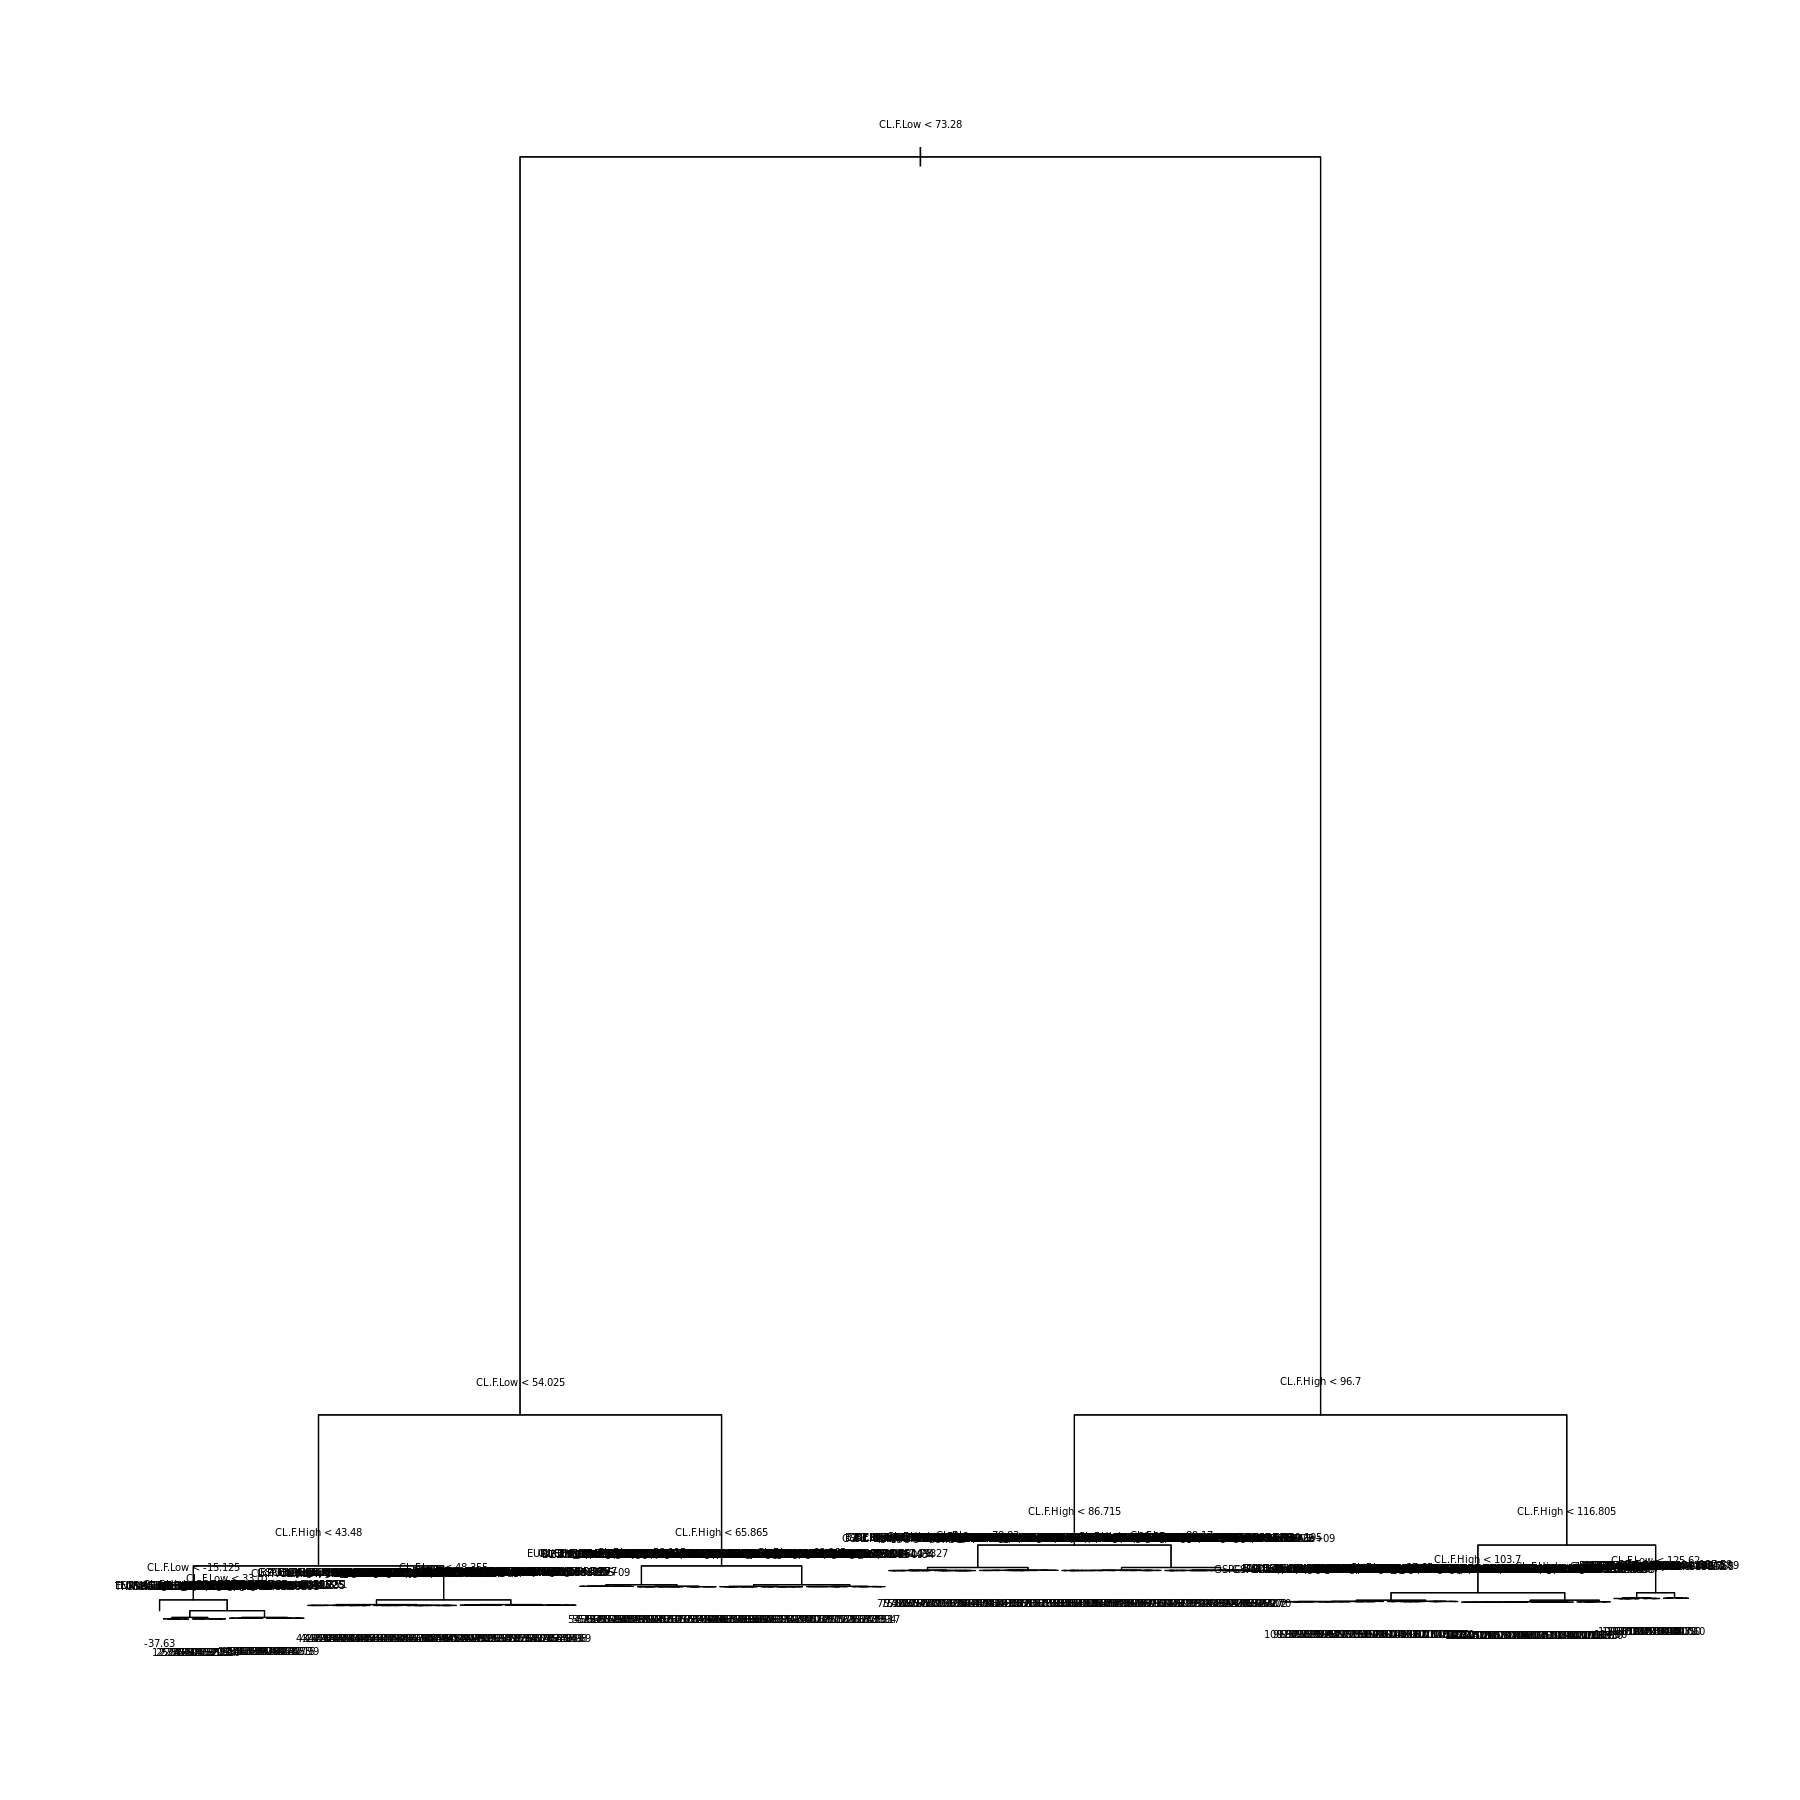

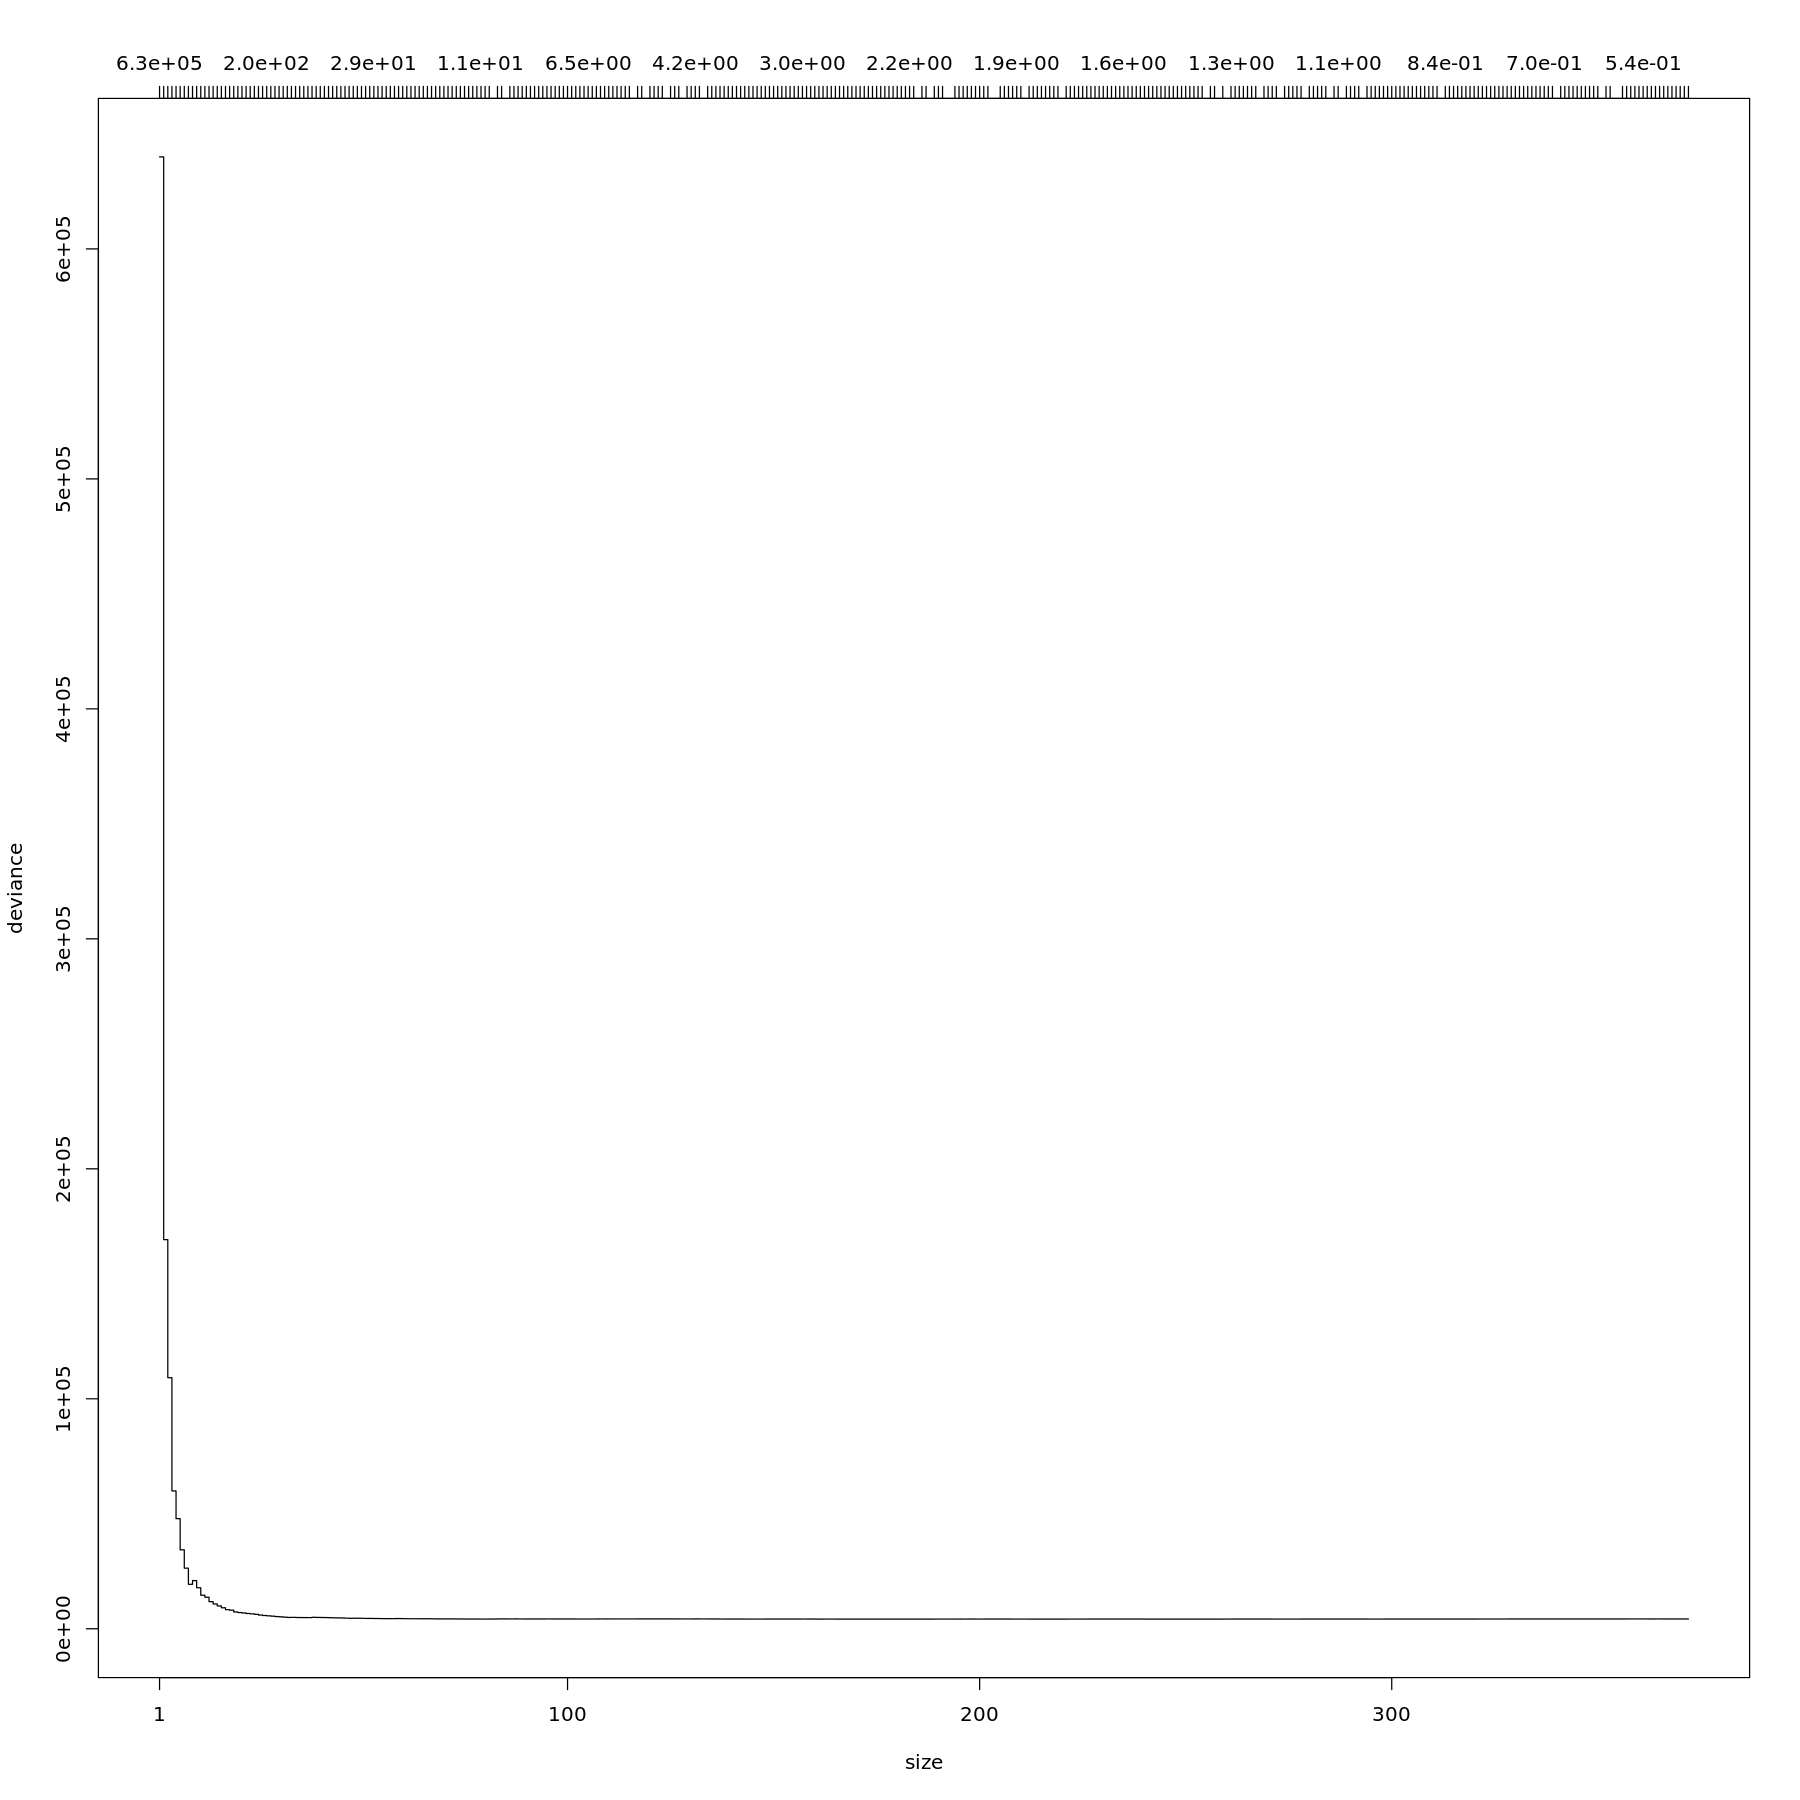

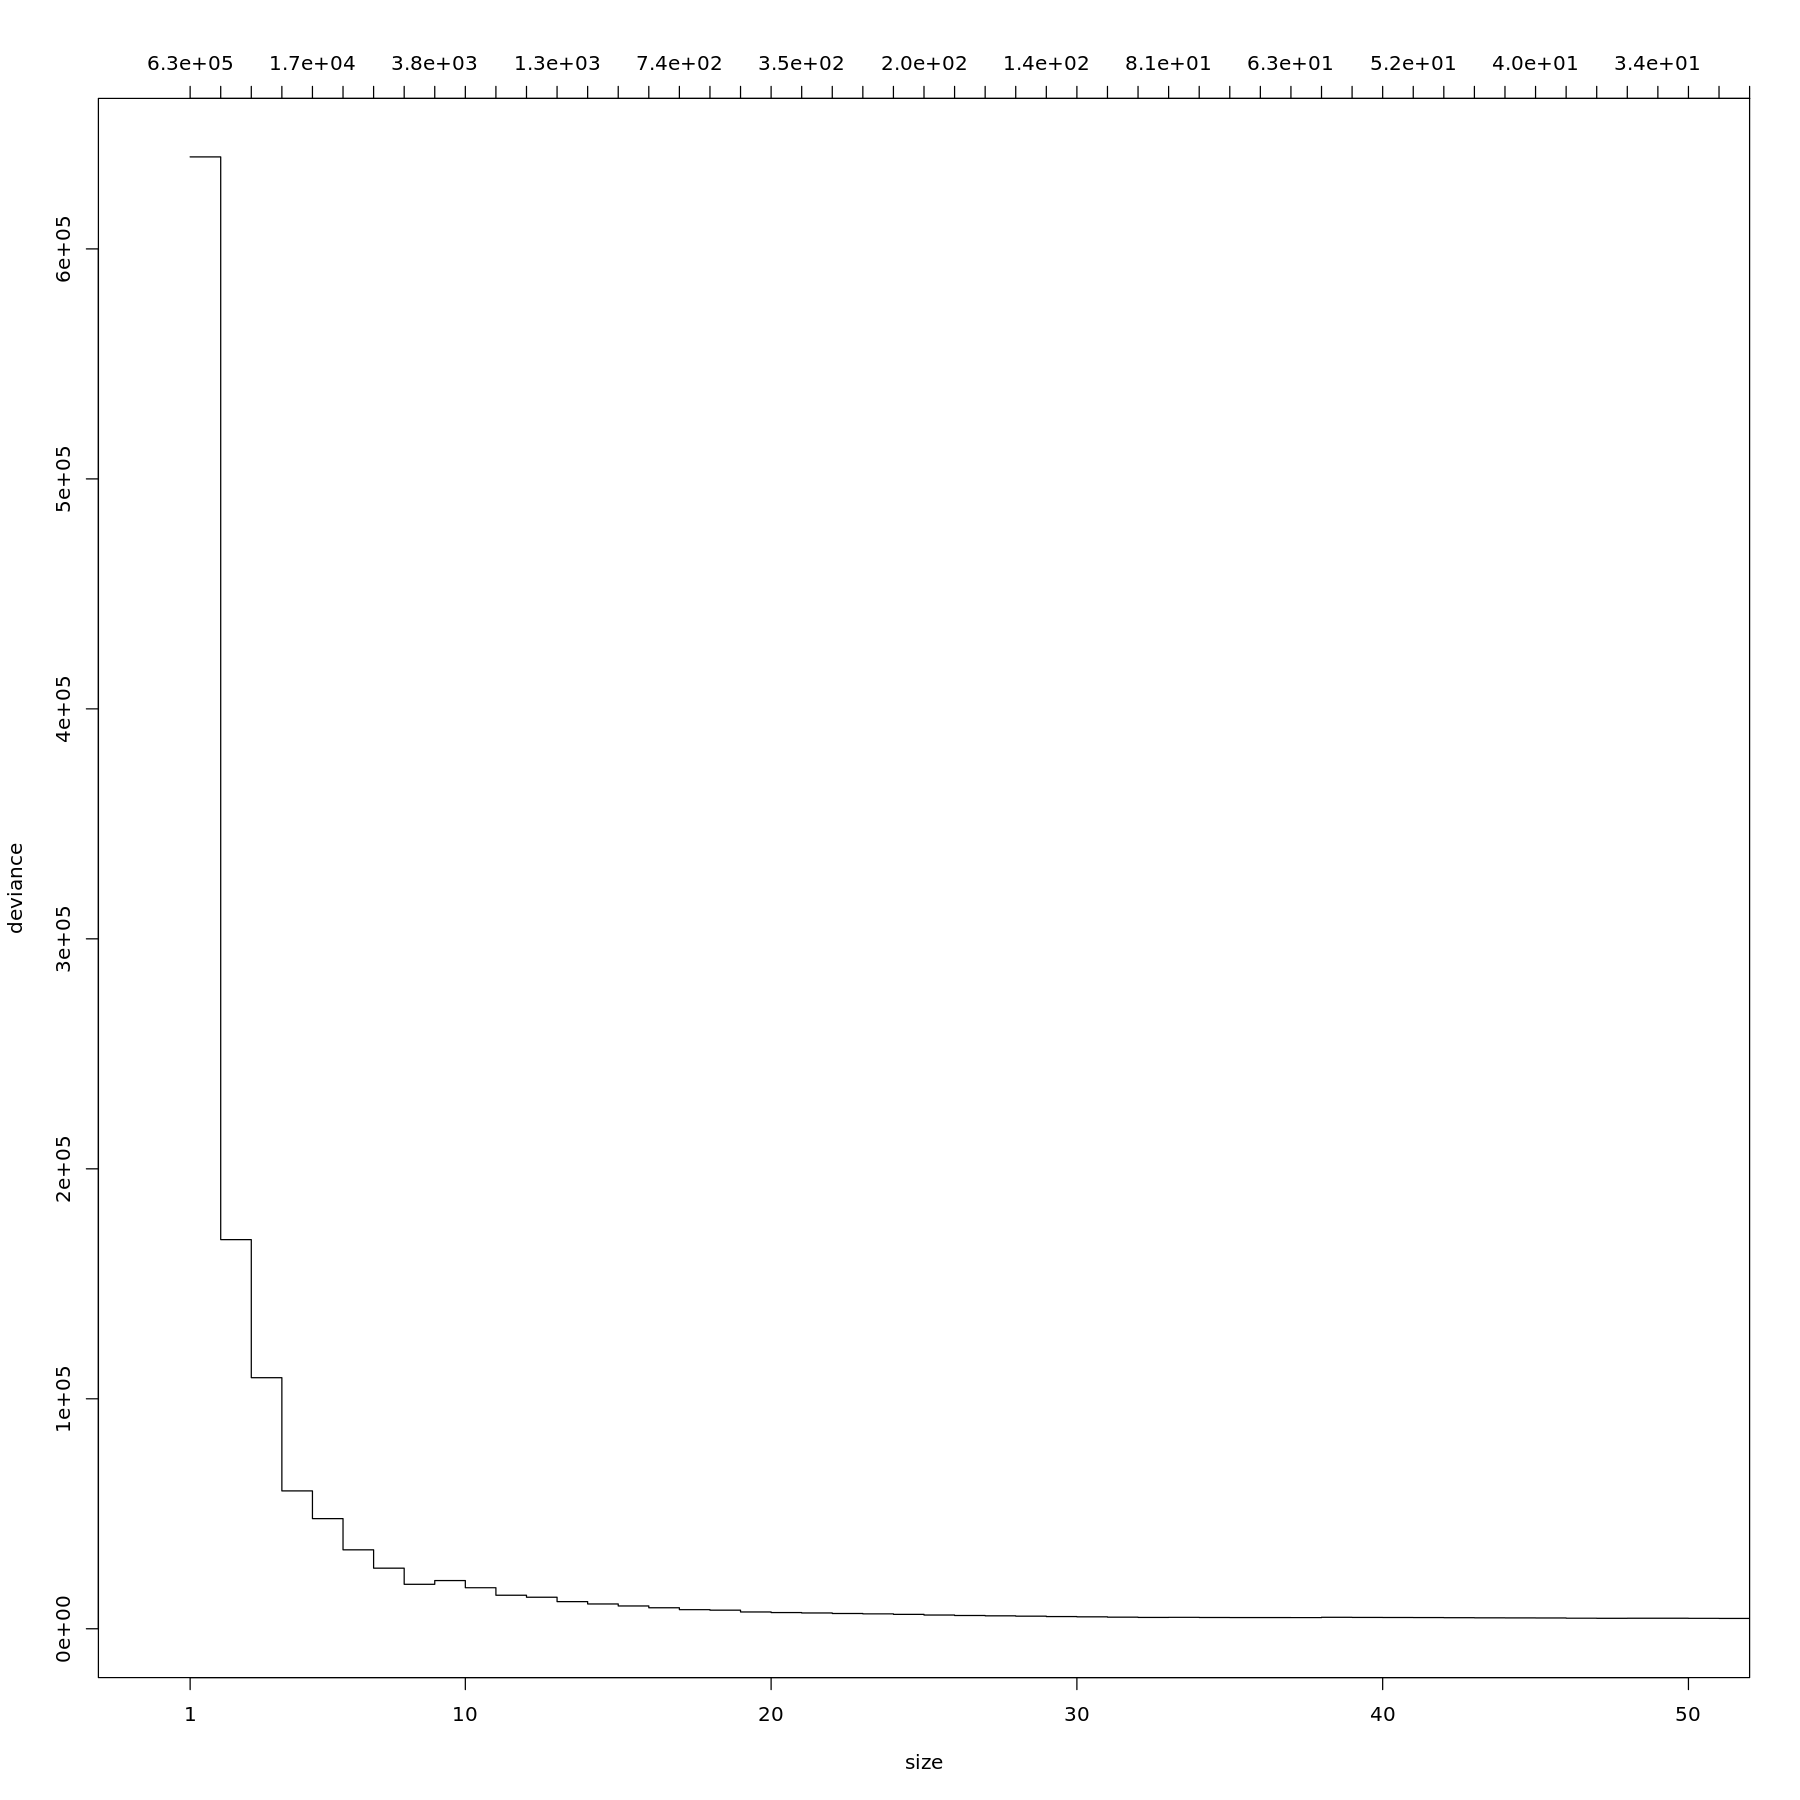

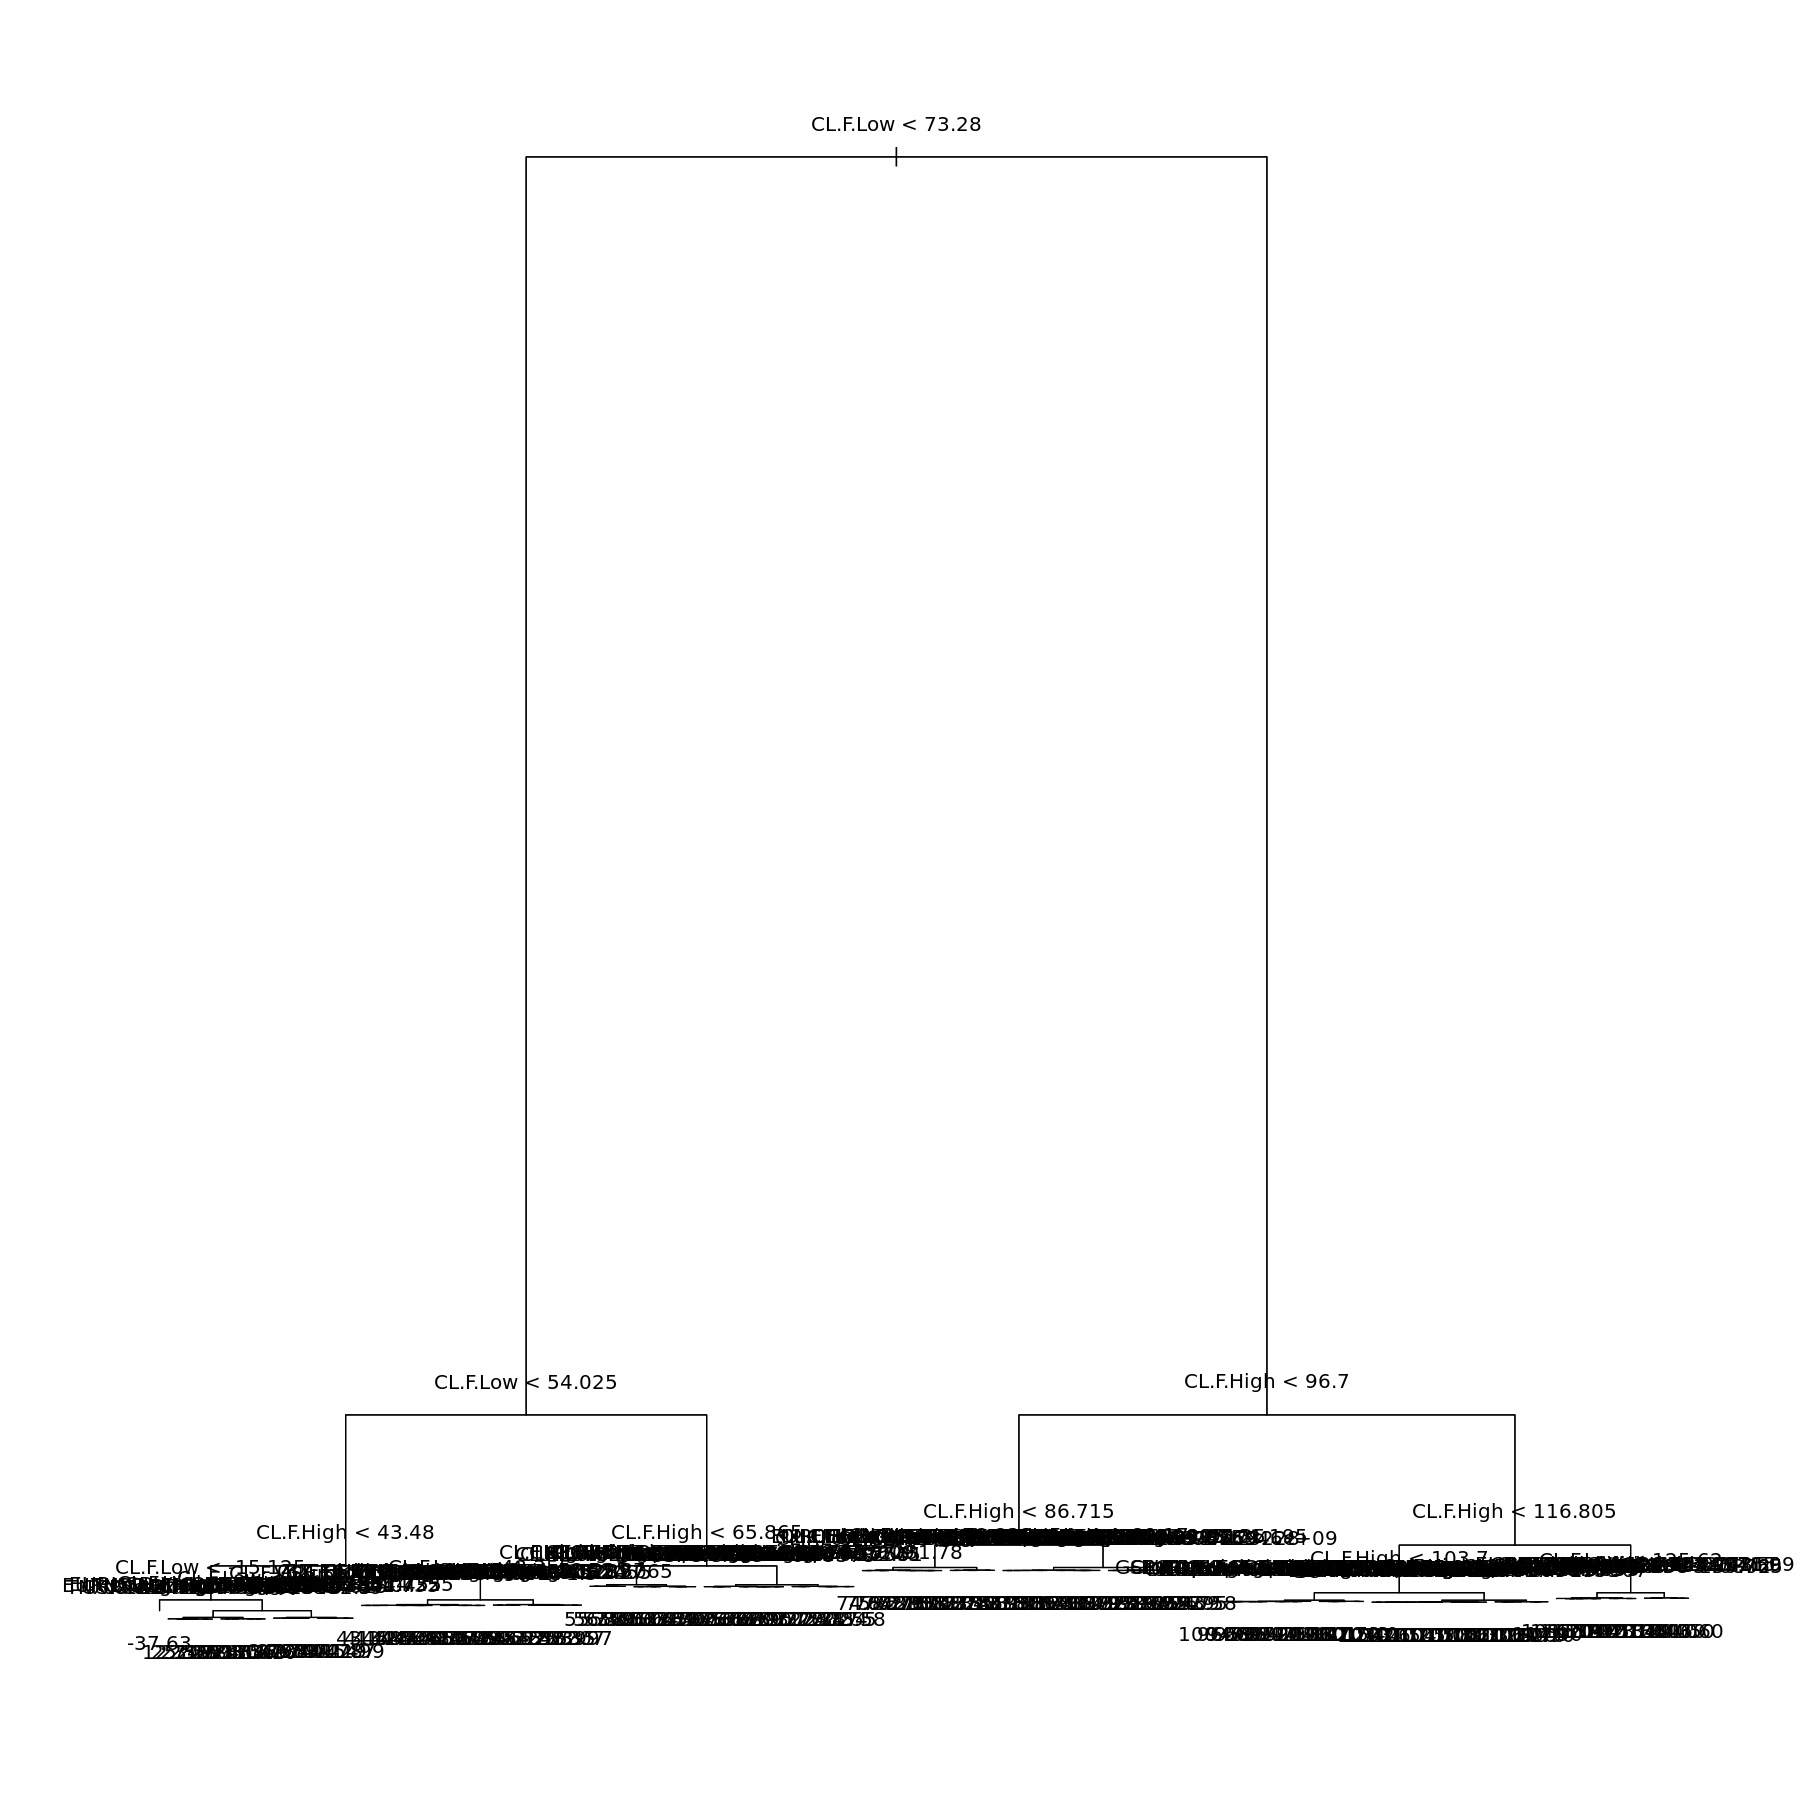

[1] 2222.8

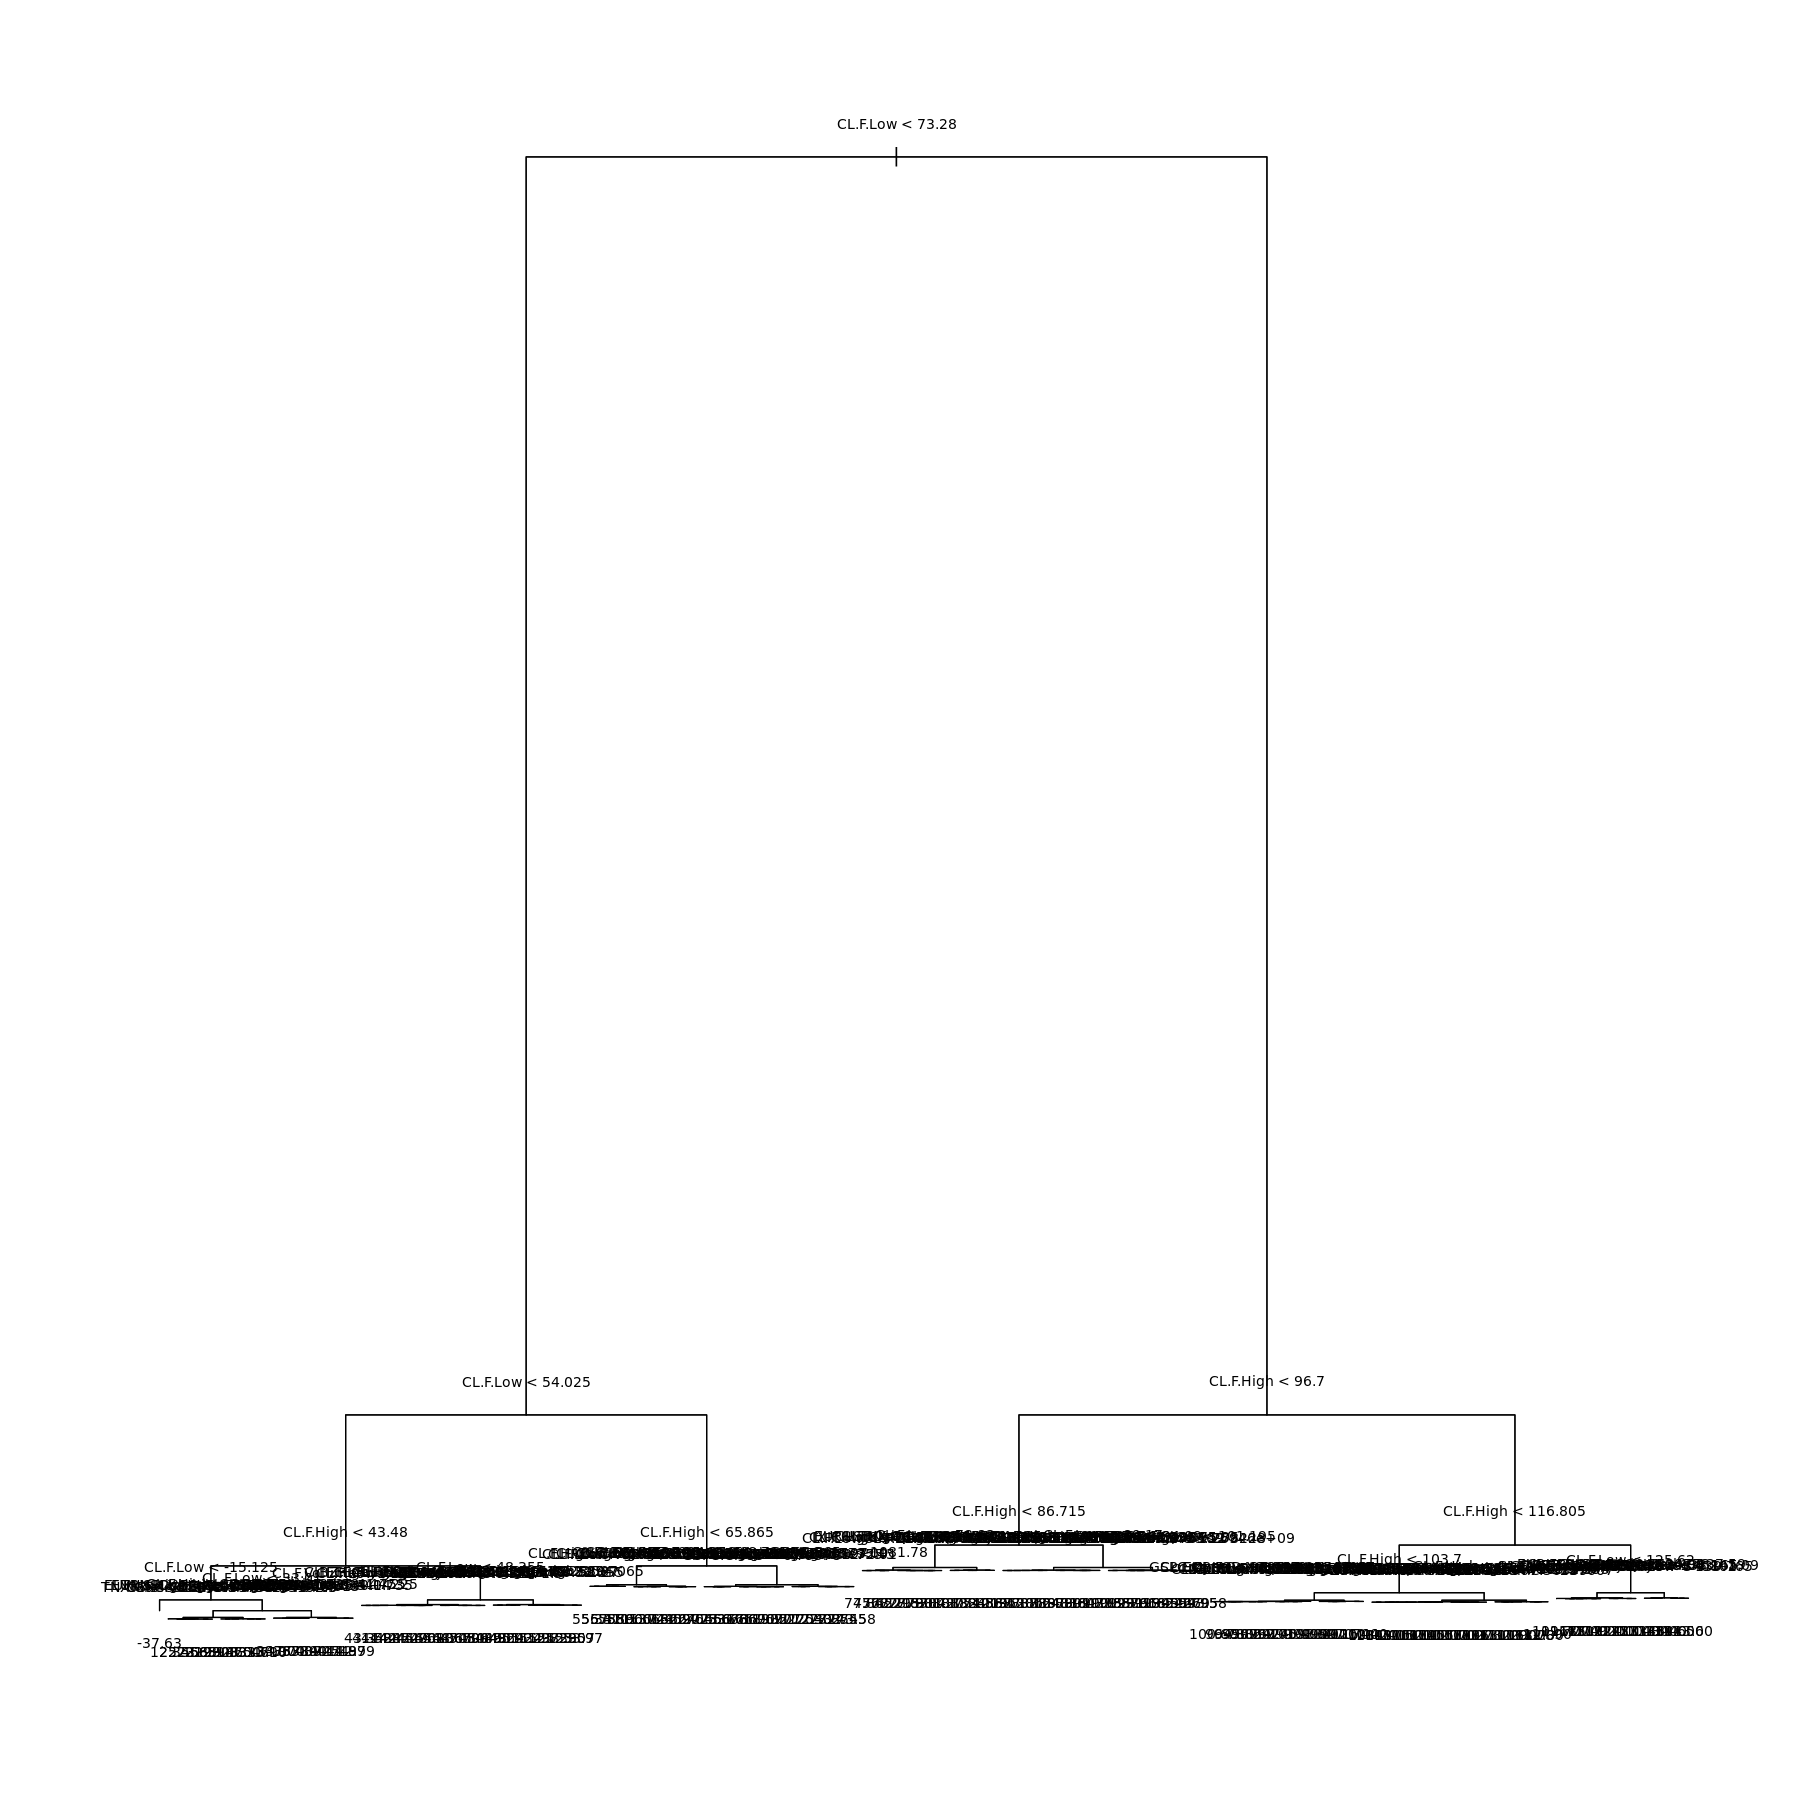

In [ ]:
################################
###### CART #######
################################

##chooseCRANmirror(graphics=F)
#
set.seed(123)
cb1 <- sample(1:NROW(data.train),1500)
cb2 <- setdiff(1:NROW(data.train),cb1)

#splitting
t1a <- tree(CL.F.Close~.-BZ.F.Close, data=data.train[cb1,], control=tree.control(nobs=length(cb1), minsize=2, mindev=0))

plot(t1a)
text(t1a, cex=0.5)

#pruning
t1b <- prune.tree(t1a, newdata=data.train[cb2,])
plot(t1b)
#zoom
plot(t1b, xlim=c(0,50))

J <- t1b$size[which.min(t1b$dev)]

t1c <- prune.tree(t1a, best=J)

plot(t1c)
text(t1c)

plot(t1c)
text(t1c, pretty=4, cex=0.7)

#
#Prediction

# make some variables factor
p.tree <- predict(t1c,newdata=data.test)     
dev.tree <- sum((p.tree-data.test$CL.F.Close)^2)
dev.tree

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 33: EURUSD.X.Volume has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 39: TNX.Volume has no variation.”


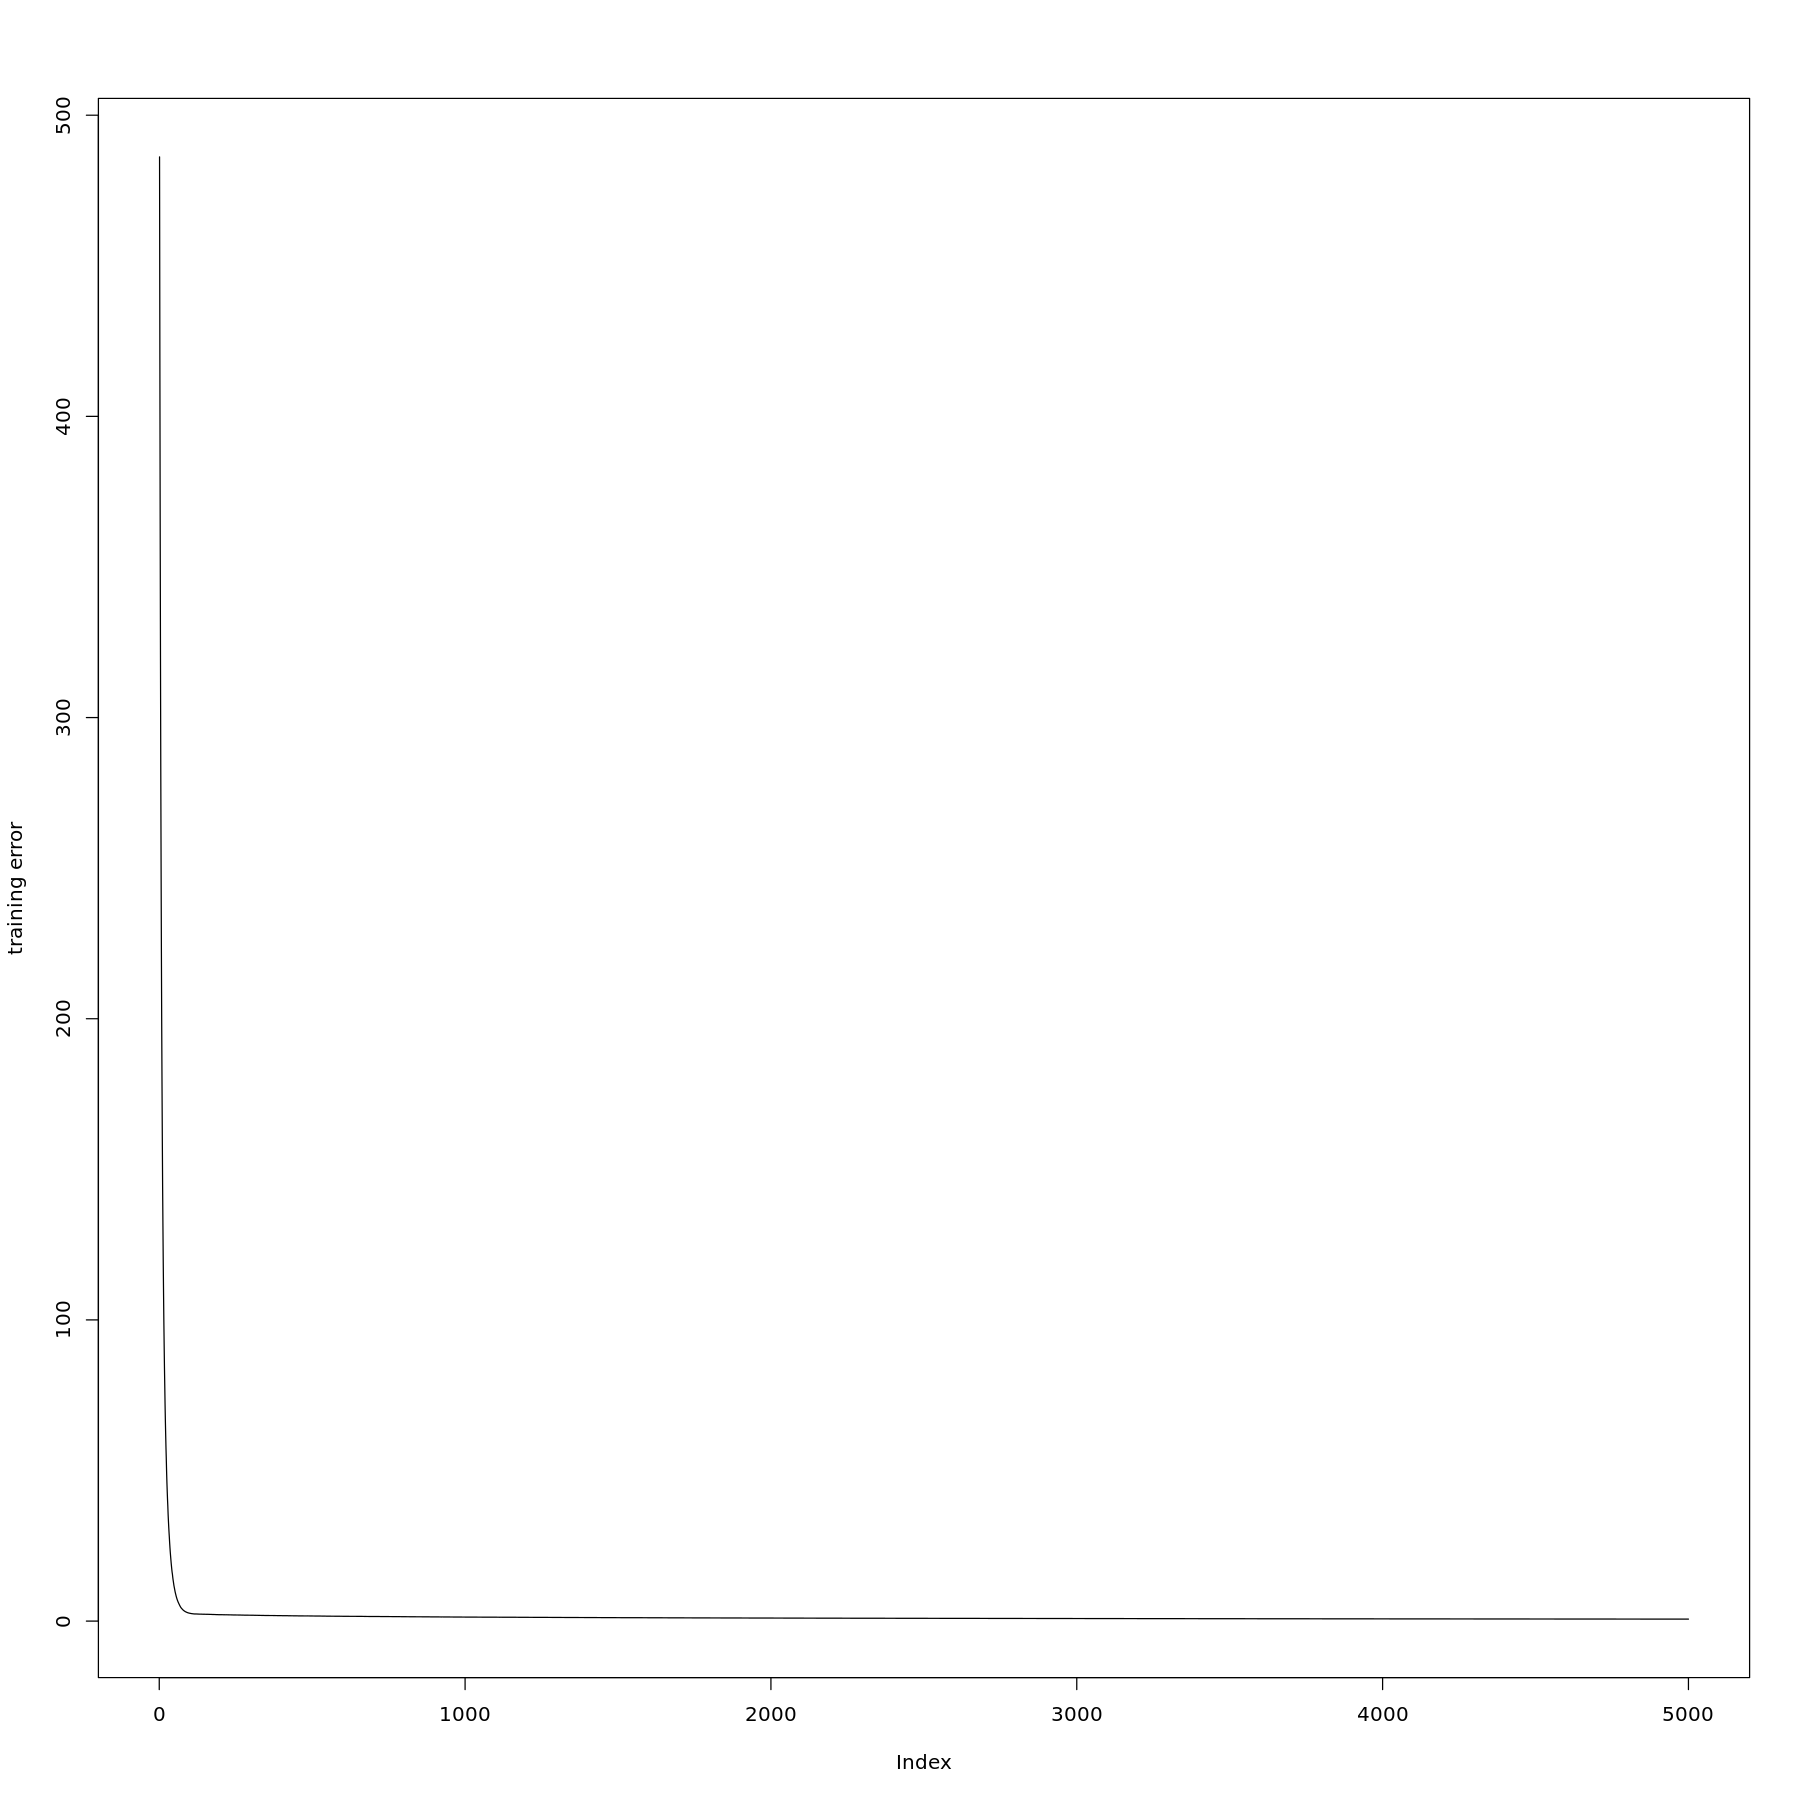

var               rel.inf     
CL.F.Low          CL.F.Low          57.219420904
CL.F.High         CL.F.High         39.733462651
BZ.F.Adjusted     BZ.F.Adjusted      1.247695750
TNX.Close         TNX.Close          0.338430593
BZ.F.Open         BZ.F.Open          0.206972155
TNX.Open          TNX.Open           0.188478979
CL.F.Open         CL.F.Open          0.178299254
TNX.High          TNX.High           0.170739792
BZ.F.High         BZ.F.High          0.138636395
TNX.Low           TNX.Low            0.126068721
BZ.F.Low          BZ.F.Low           0.086698430
CL.F.Volume       CL.F.Volume        0.030073529
date              date               0.028572812
EURUSD.X.Low      EURUSD.X.Low       0.024914594
GSPC.Volume       GSPC.Volume        0.024257555
BZ.F.Volume       BZ.F.Volume        0.024093815
EURUSD.X.Open     EURUSD.X.Open      0.024013425
GSPC.Open         GSPC.Open          0.020620710
GC.F.Volume       GC.F.Volume        0.019273635
IXIC.Volume       IXIC.Volume        0.016018348
GC.F.Low          GC.F.Low           0.015429014
EURUSD.X.High     EURUSD.X.High      0.015171515
GC.F.Open         GC.F.Open          0.015125748
GC.F.Close        GC.F.Close         0.014118640
IXIC.Close        IXIC.Close         0.014008994
EURUSD.X.Close    EURUSD.X.Close     0.013550786
GC.F.High         GC.F.High          0.013365248
IXIC.Open         IXIC.Open          0.011344303
IXIC.Low          IXIC.Low           0.011040150
GSPC.Close        GSPC.Close         0.010156043
IXIC.High         IXIC.High          0.007263815
GSPC.Low          GSPC.Low           0.006975669
GSPC.High         GSPC.High          0.005708027
GSPC.Adjusted     GSPC.Adjusted      0.000000000
IXIC.Adjusted     IXIC.Adjusted      0.000000000
GC.F.Adjusted     GC.F.Adjusted      0.000000000
EURUSD.X.Volume   EURUSD.X.Volume    0.000000000
EURUSD.X.Adjusted EURUSD.X.Adjusted  0.000000000
TNX.Volume        TNX.Volume         0.000000000
TNX.Adjusted      TNX.Adjusted       0.000000000

[1] 1.02 0.82 0.82 0.42

[1] 1.02 2.50 0.82 0.42

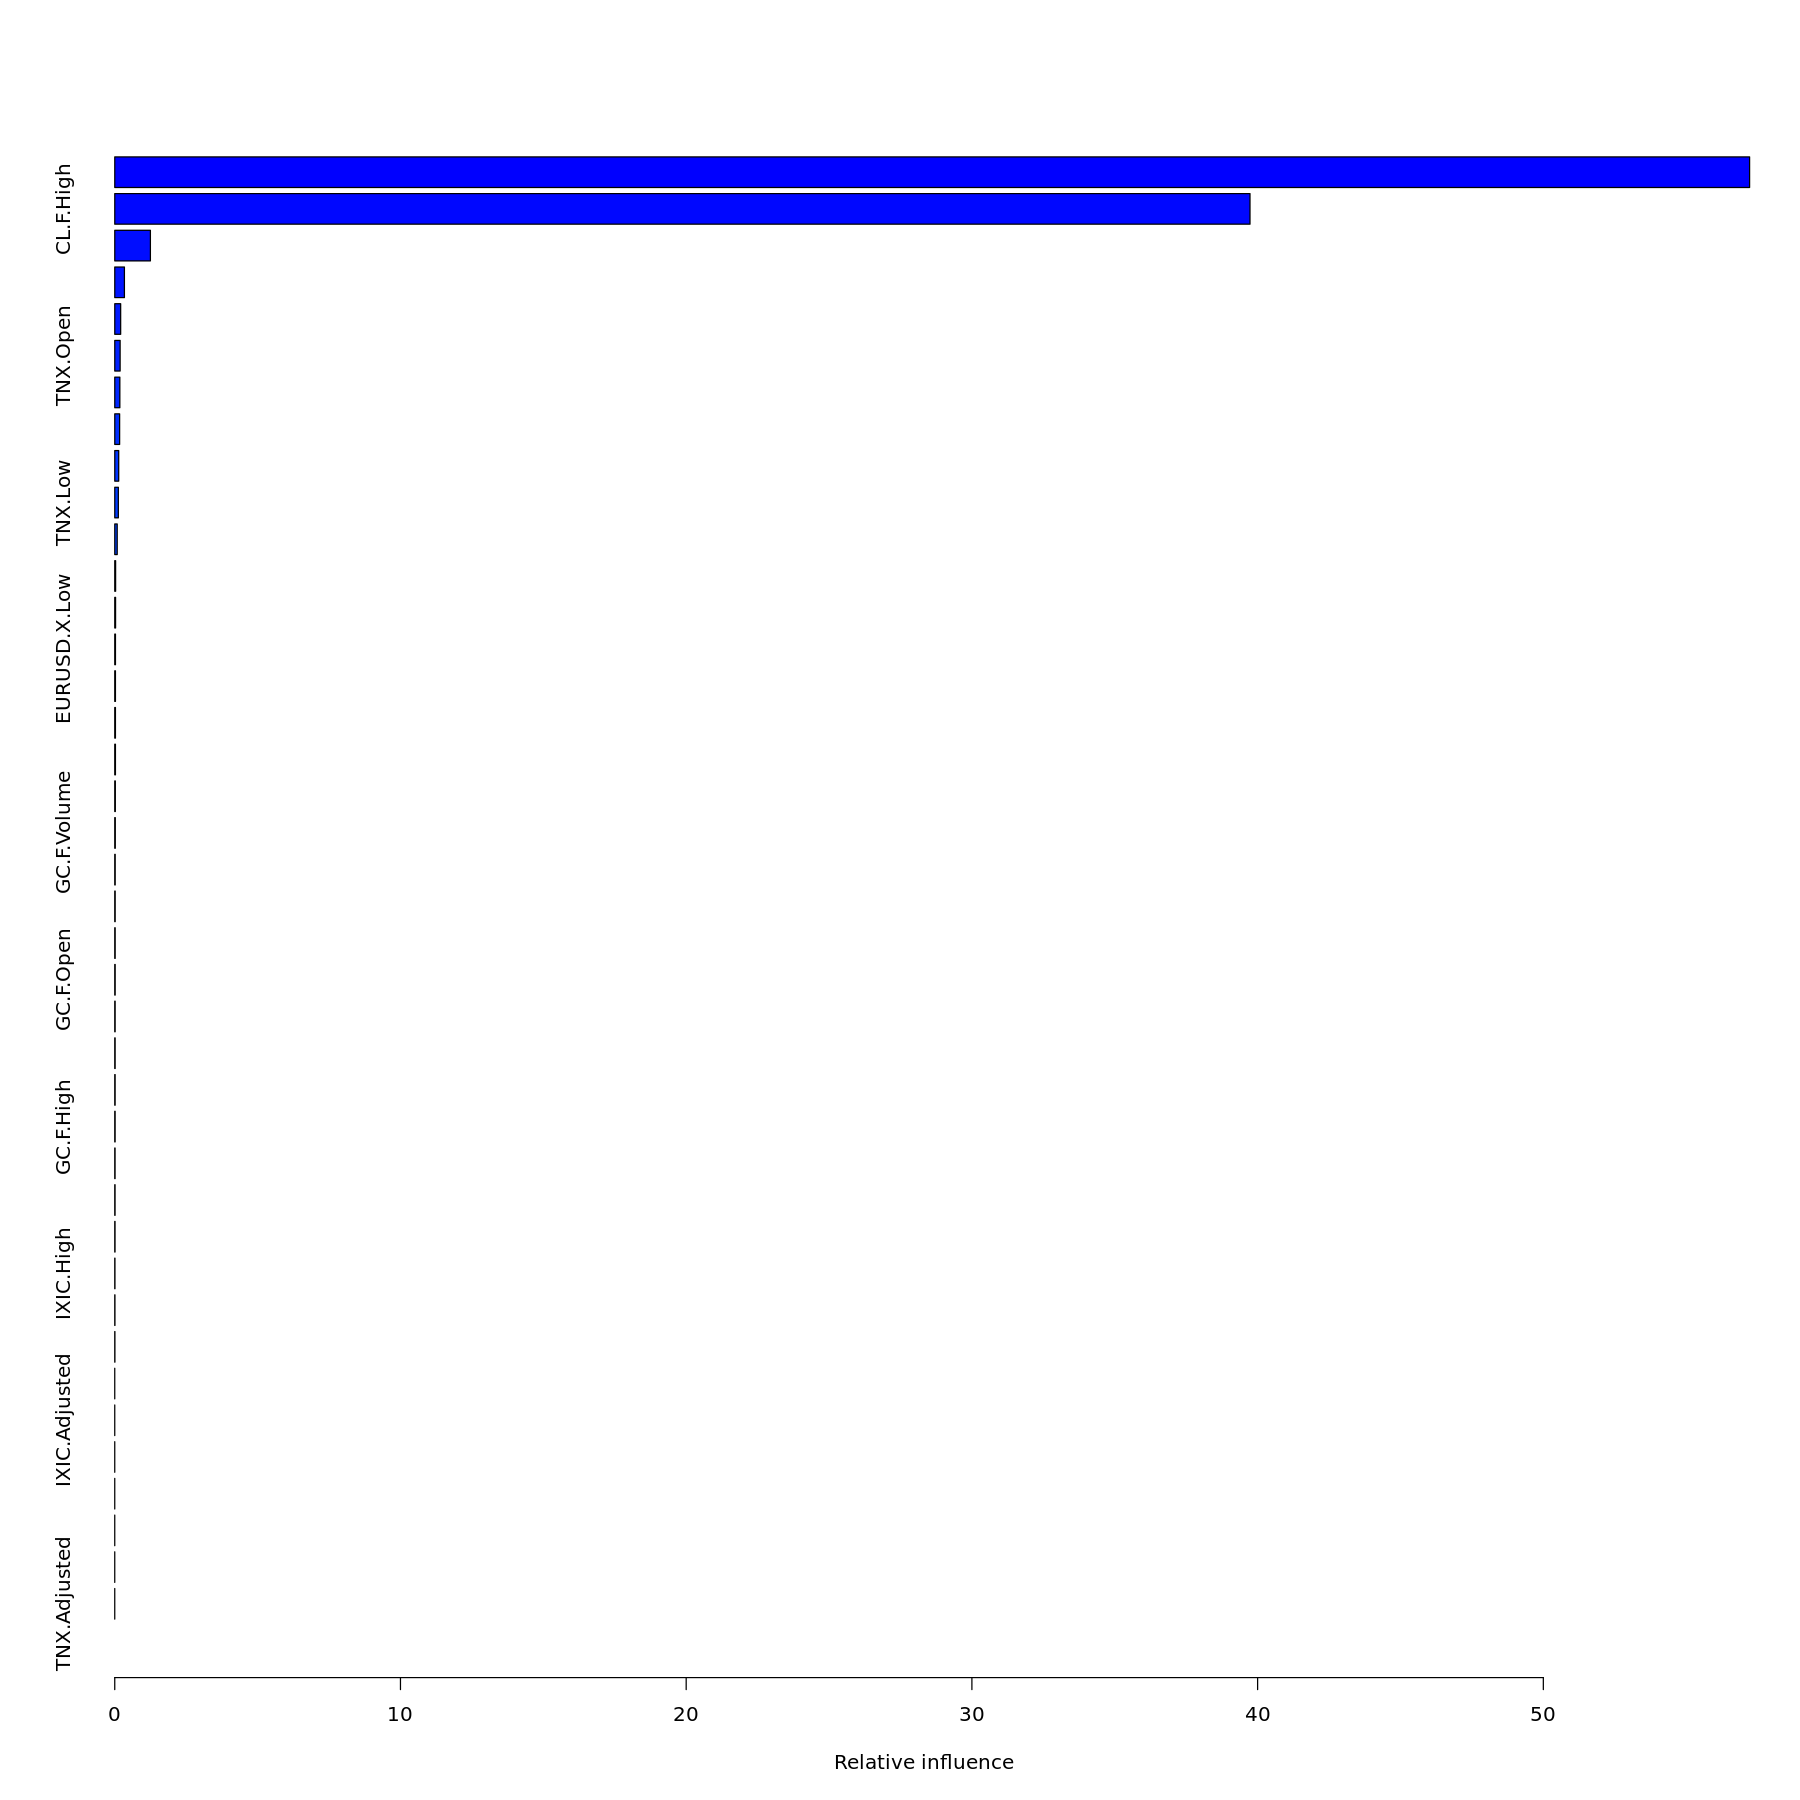

var               rel.inf     
CL.F.Low          CL.F.Low          57.219420904
CL.F.High         CL.F.High         39.733462651
BZ.F.Adjusted     BZ.F.Adjusted      1.247695750
TNX.Close         TNX.Close          0.338430593
BZ.F.Open         BZ.F.Open          0.206972155
TNX.Open          TNX.Open           0.188478979
CL.F.Open         CL.F.Open          0.178299254
TNX.High          TNX.High           0.170739792
BZ.F.High         BZ.F.High          0.138636395
TNX.Low           TNX.Low            0.126068721
BZ.F.Low          BZ.F.Low           0.086698430
CL.F.Volume       CL.F.Volume        0.030073529
date              date               0.028572812
EURUSD.X.Low      EURUSD.X.Low       0.024914594
GSPC.Volume       GSPC.Volume        0.024257555
BZ.F.Volume       BZ.F.Volume        0.024093815
EURUSD.X.Open     EURUSD.X.Open      0.024013425
GSPC.Open         GSPC.Open          0.020620710
GC.F.Volume       GC.F.Volume        0.019273635
IXIC.Volume       IXIC.Volume        0.016018348
GC.F.Low          GC.F.Low           0.015429014
EURUSD.X.High     EURUSD.X.High      0.015171515
GC.F.Open         GC.F.Open          0.015125748
GC.F.Close        GC.F.Close         0.014118640
IXIC.Close        IXIC.Close         0.014008994
EURUSD.X.Close    EURUSD.X.Close     0.013550786
GC.F.High         GC.F.High          0.013365248
IXIC.Open         IXIC.Open          0.011344303
IXIC.Low          IXIC.Low           0.011040150
GSPC.Close        GSPC.Close         0.010156043
IXIC.High         IXIC.High          0.007263815
GSPC.Low          GSPC.Low           0.006975669
GSPC.High         GSPC.High          0.005708027
GSPC.Adjusted     GSPC.Adjusted      0.000000000
IXIC.Adjusted     IXIC.Adjusted      0.000000000
GC.F.Adjusted     GC.F.Adjusted      0.000000000
EURUSD.X.Volume   EURUSD.X.Volume    0.000000000
EURUSD.X.Adjusted EURUSD.X.Adjusted  0.000000000
TNX.Volume        TNX.Volume         0.000000000
TNX.Adjusted      TNX.Adjusted       0.000000000

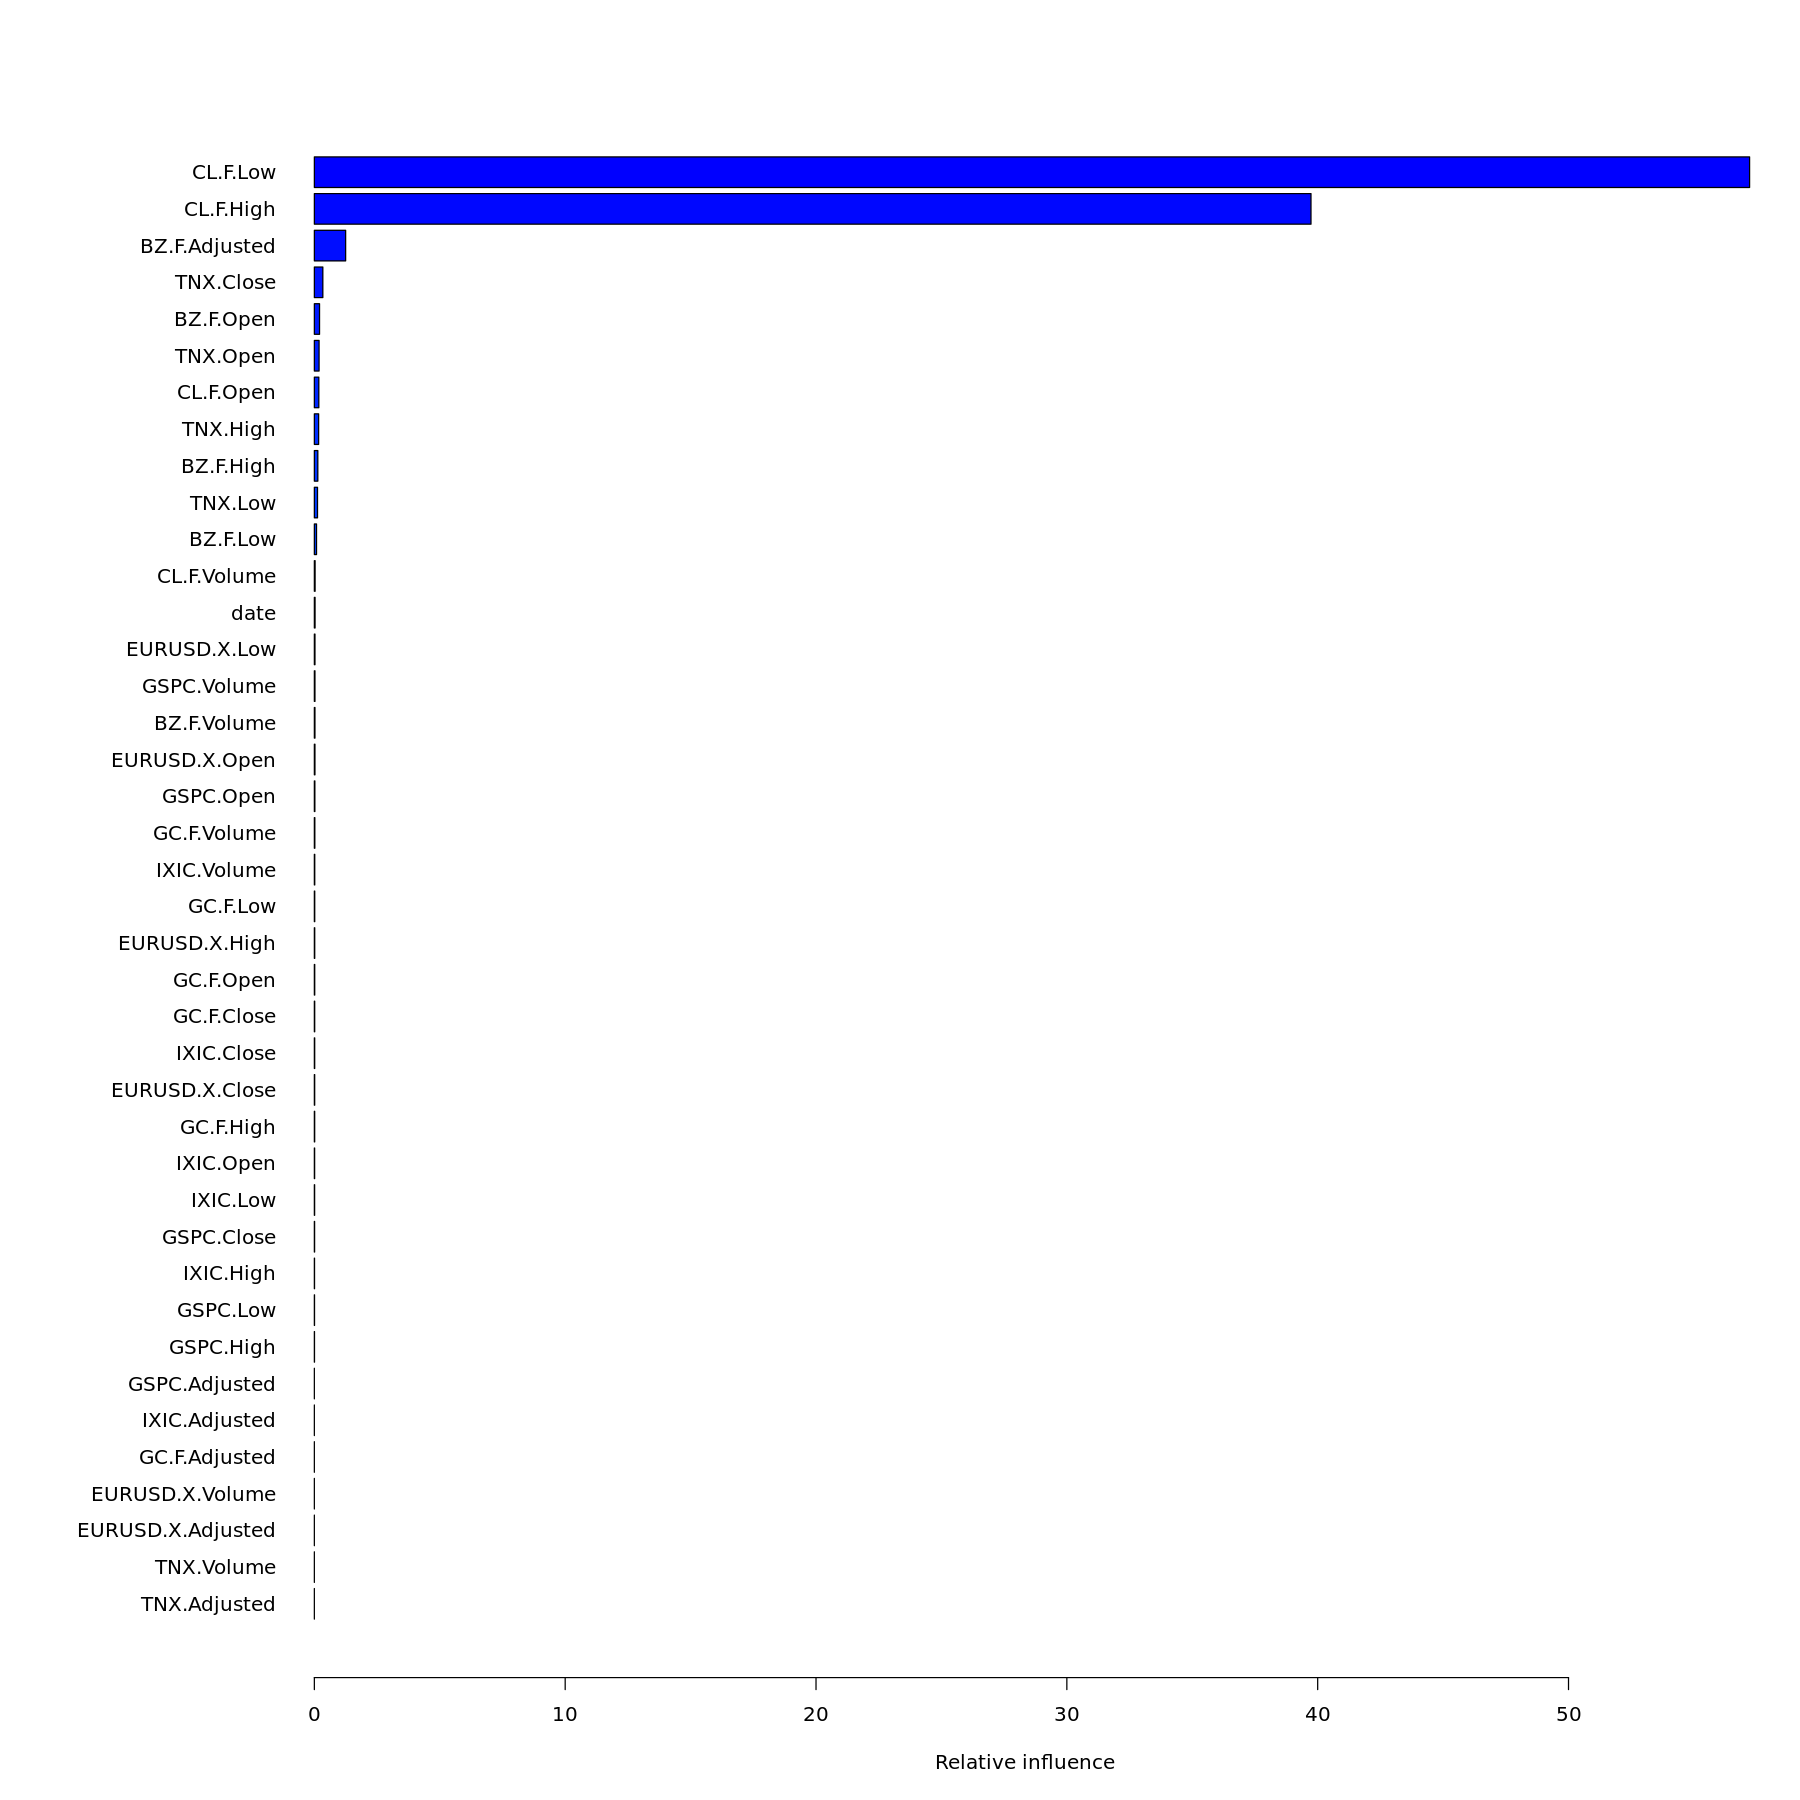

var               rel.inf     
CL.F.Low          CL.F.Low          57.219420904
CL.F.High         CL.F.High         39.733462651
BZ.F.Adjusted     BZ.F.Adjusted      1.247695750
TNX.Close         TNX.Close          0.338430593
BZ.F.Open         BZ.F.Open          0.206972155
TNX.Open          TNX.Open           0.188478979
CL.F.Open         CL.F.Open          0.178299254
TNX.High          TNX.High           0.170739792
BZ.F.High         BZ.F.High          0.138636395
TNX.Low           TNX.Low            0.126068721
BZ.F.Low          BZ.F.Low           0.086698430
CL.F.Volume       CL.F.Volume        0.030073529
date              date               0.028572812
EURUSD.X.Low      EURUSD.X.Low       0.024914594
GSPC.Volume       GSPC.Volume        0.024257555
BZ.F.Volume       BZ.F.Volume        0.024093815
EURUSD.X.Open     EURUSD.X.Open      0.024013425
GSPC.Open         GSPC.Open          0.020620710
GC.F.Volume       GC.F.Volume        0.019273635
IXIC.Volume       IXIC.Volume        0.016018348
GC.F.Low          GC.F.Low           0.015429014
EURUSD.X.High     EURUSD.X.High      0.015171515
GC.F.Open         GC.F.Open          0.015125748
GC.F.Close        GC.F.Close         0.014118640
IXIC.Close        IXIC.Close         0.014008994
EURUSD.X.Close    EURUSD.X.Close     0.013550786
GC.F.High         GC.F.High          0.013365248
IXIC.Open         IXIC.Open          0.011344303
IXIC.Low          IXIC.Low           0.011040150
GSPC.Close        GSPC.Close         0.010156043
IXIC.High         IXIC.High          0.007263815
GSPC.Low          GSPC.Low           0.006975669
GSPC.High         GSPC.High          0.005708027
GSPC.Adjusted     GSPC.Adjusted      0.000000000
IXIC.Adjusted     IXIC.Adjusted      0.000000000
GC.F.Adjusted     GC.F.Adjusted      0.000000000
EURUSD.X.Volume   EURUSD.X.Volume    0.000000000
EURUSD.X.Adjusted EURUSD.X.Adjusted  0.000000000
TNX.Volume        TNX.Volume         0.000000000
TNX.Adjusted      TNX.Adjusted       0.000000000

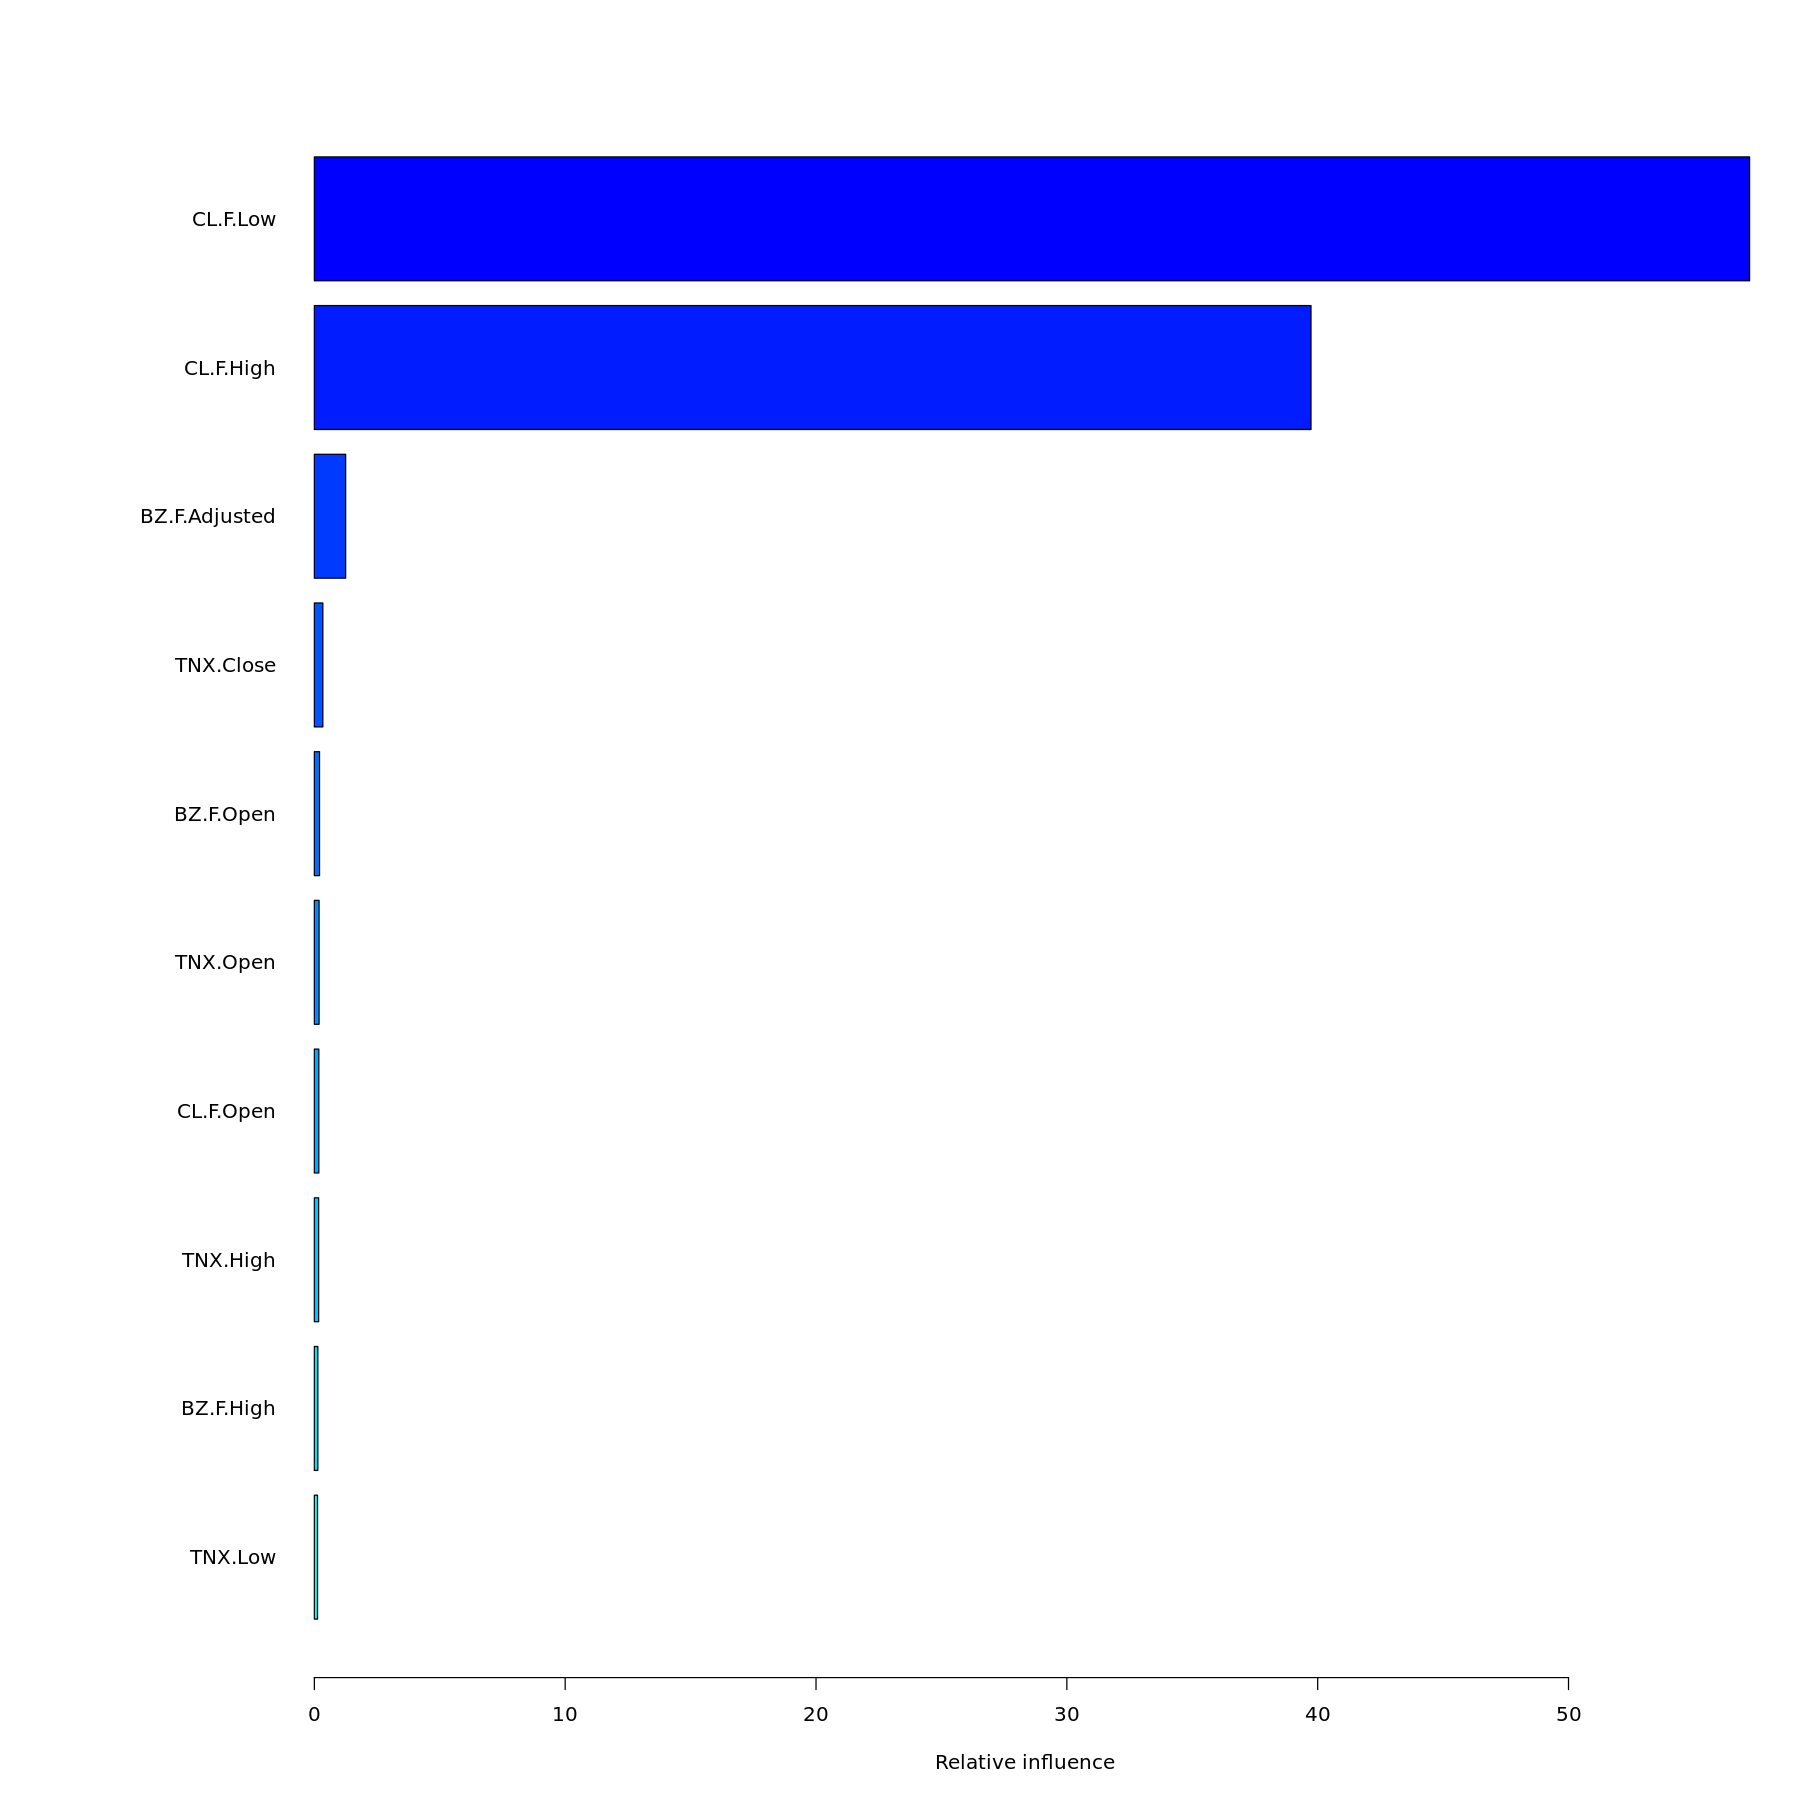

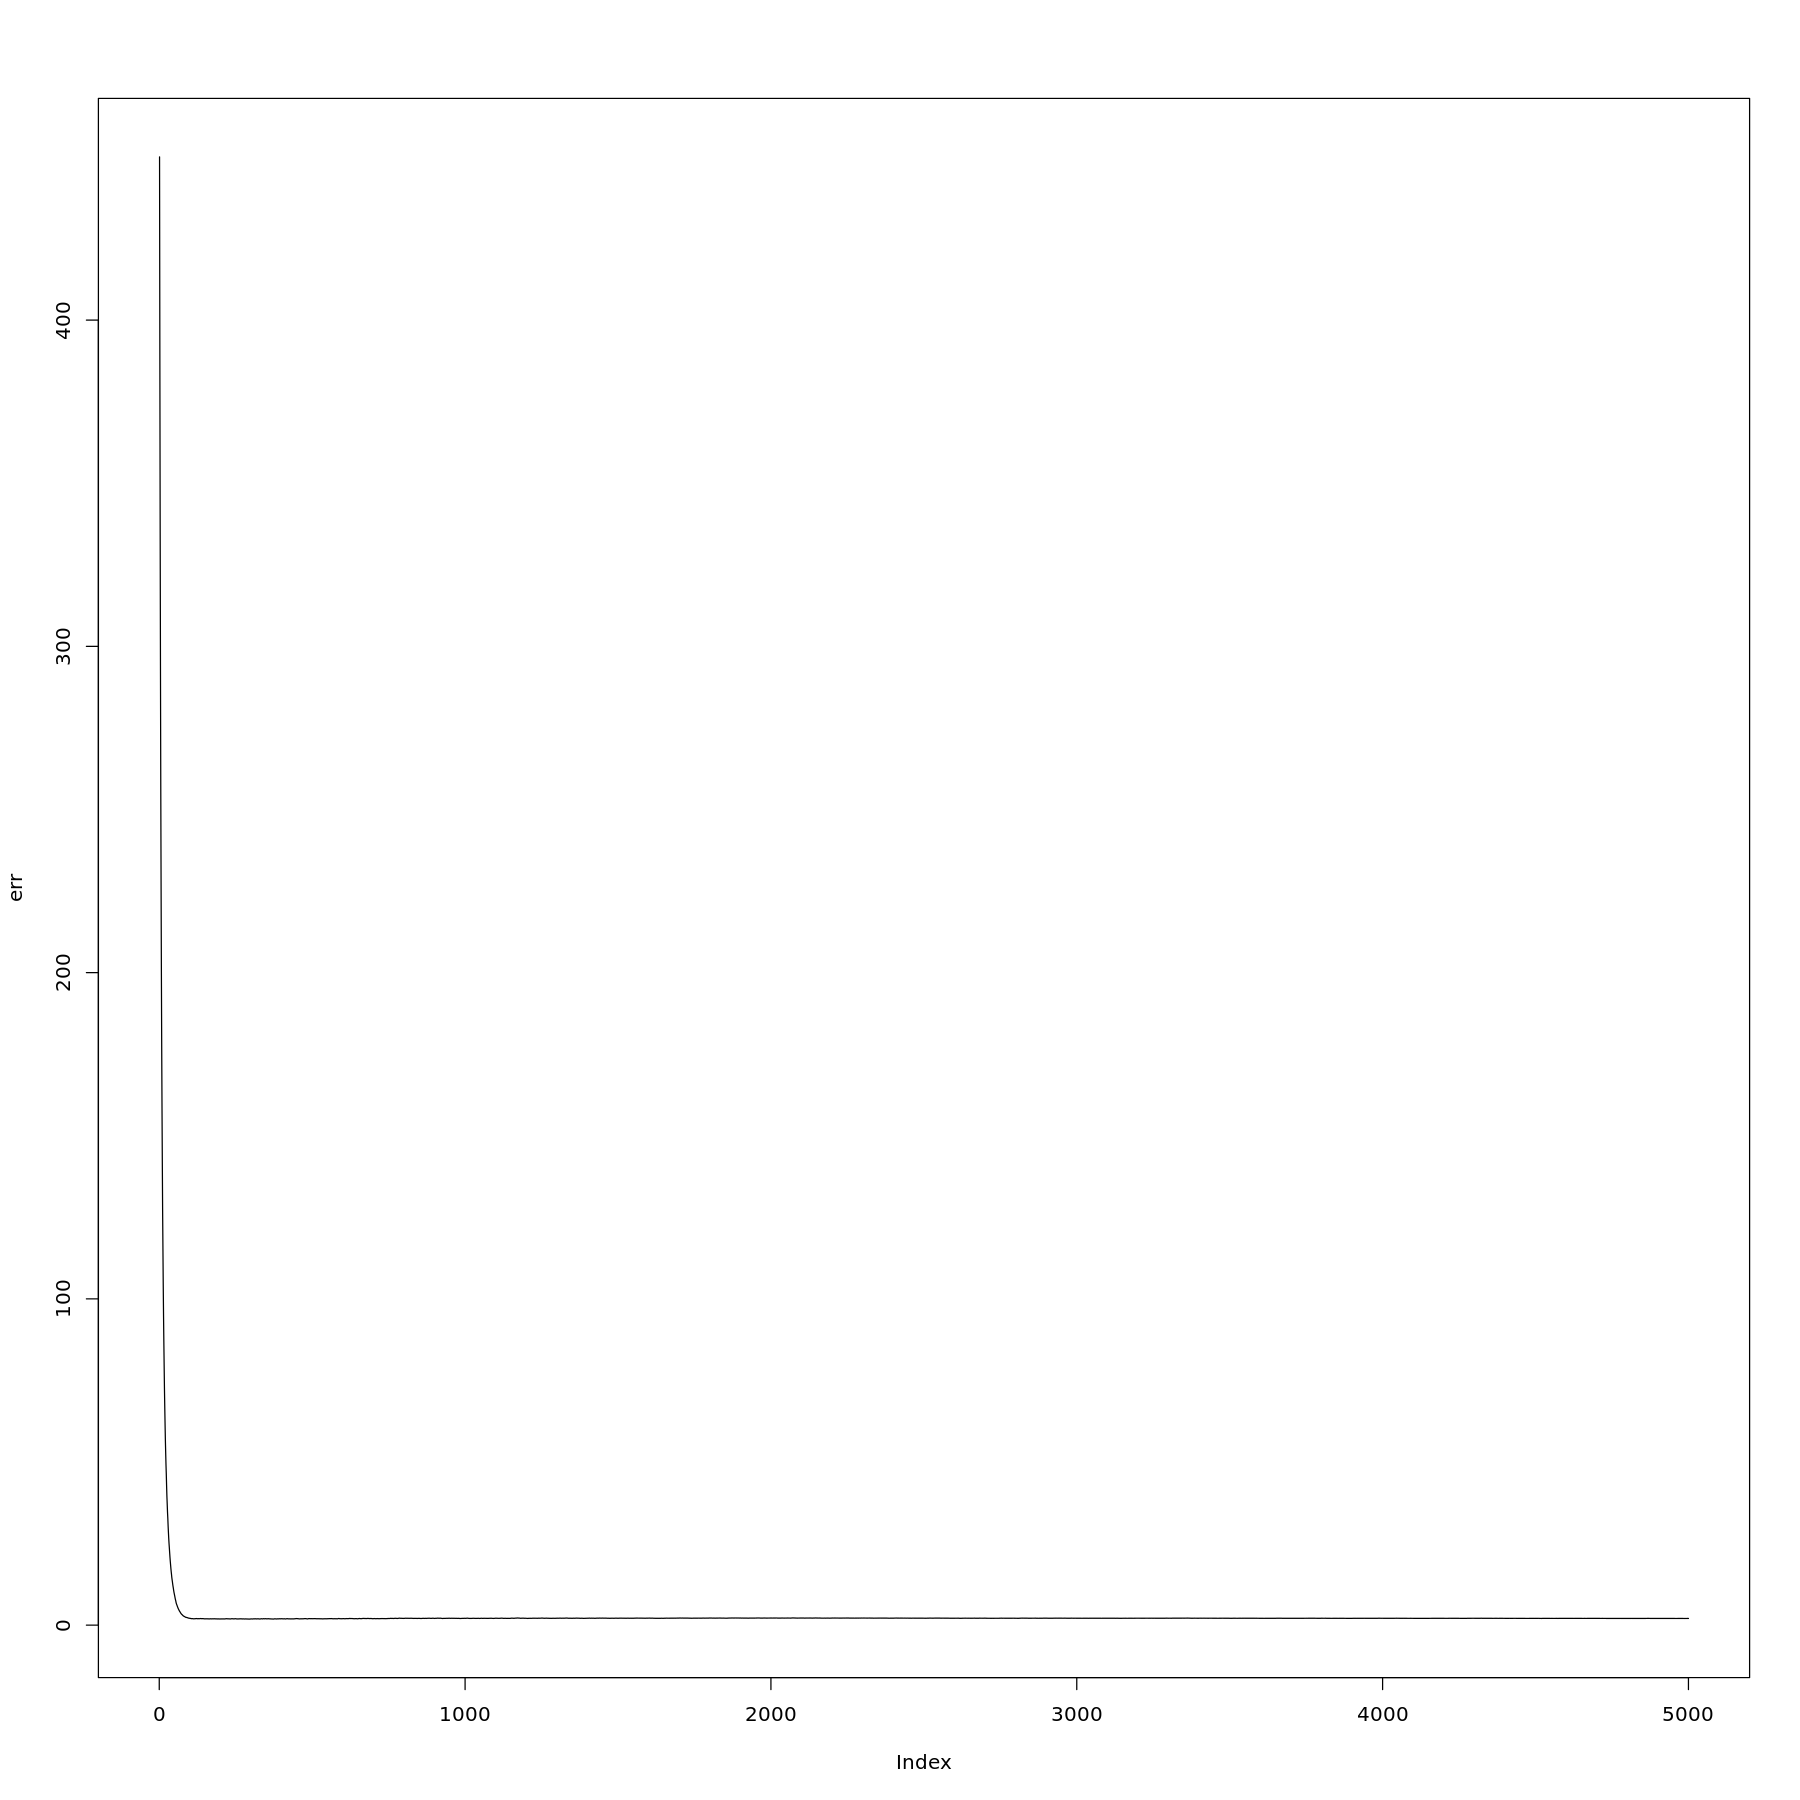

[1] 1.842943

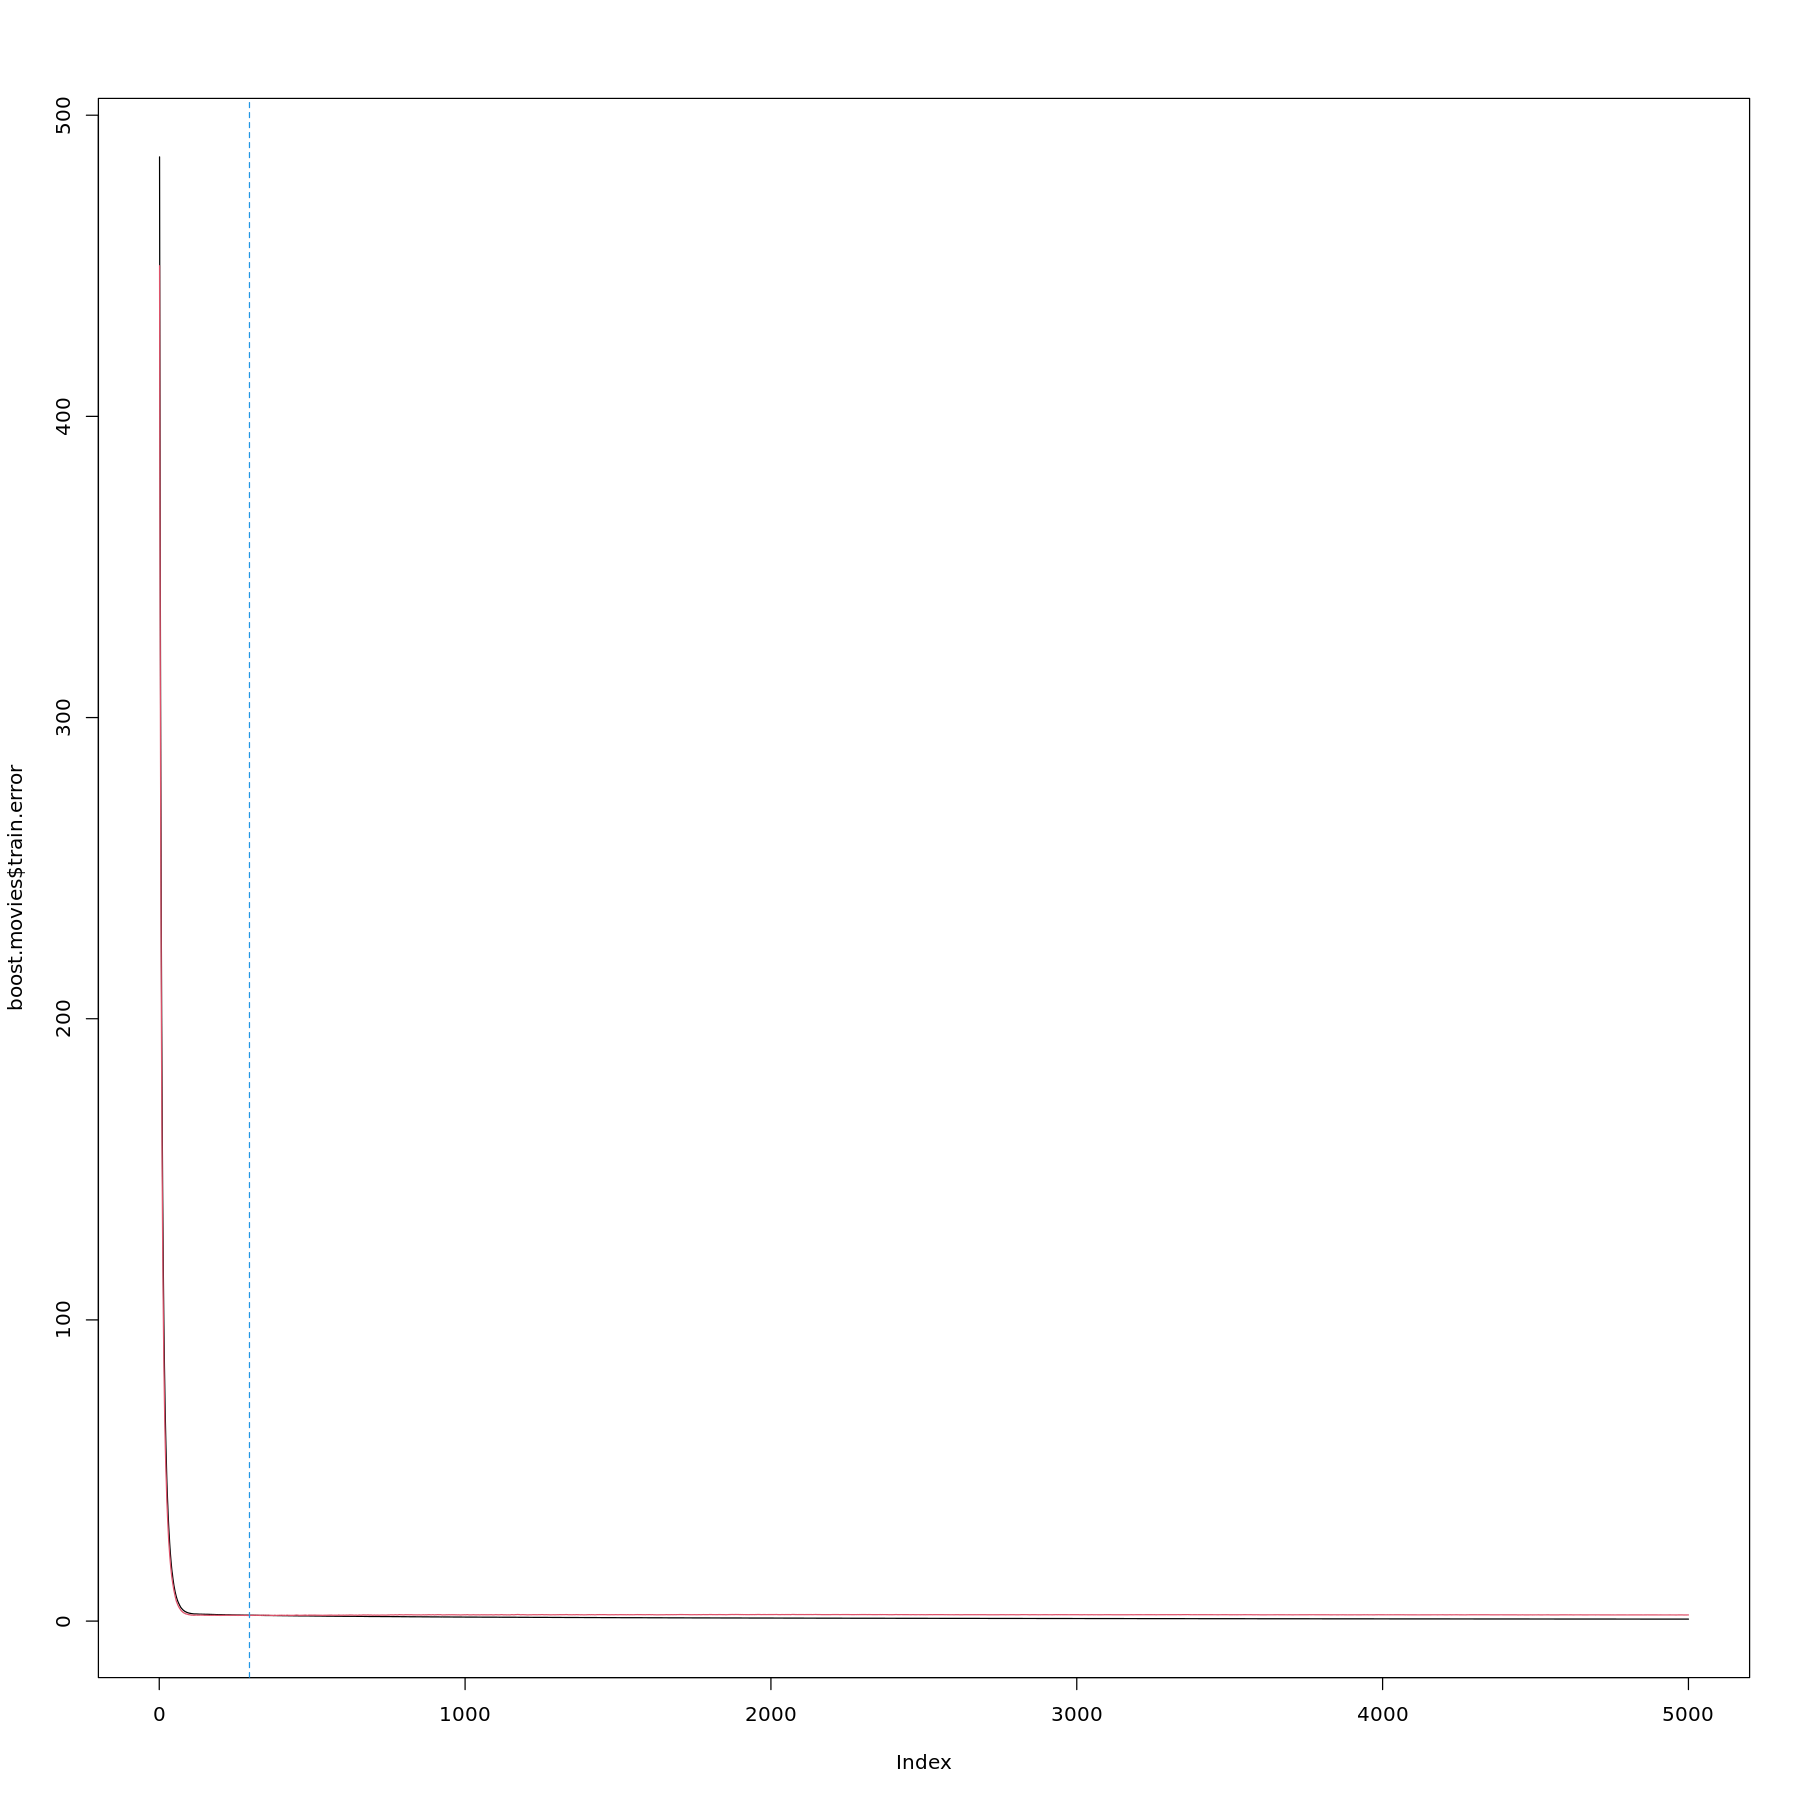

In [ ]:
################################
###### Gradient Boosting #######
################################

# 1 Boosting- 
boost.movies=gbm(CL.F.Close~.-BZ.F.Close, data=data.train, 
                 distribution="gaussian", n.trees=5000, interaction.depth=1)
#
#for the plot
par(mfrow=c(1,1))
#
#plot of training error
plot(boost.movies$train.error, type="l", ylab="training error")

#always decreasing with increasing number of trees
#
#
#relative influence plot
summary(boost.movies) 
#let us modify the graphical parameters to obtain a better plot
#
#more space on the left
#
# default vector of parameters
mai.old<-par()$mai
mai.old
#new vector
mai.new<-mai.old
#new space on the left
mai.new[2] <- 2.5 
mai.new
#modify graphical parameters
par(mai=mai.new)
summary(boost.movies, las=1) 
#las=1 horizontal names on y
summary(boost.movies, las=1, cBar=10) 
#cBar defines how many variables
#back to orginal window
par(mai=mai.old)



# test set prediction for every tree (1:5000)


yhat.boost=predict(boost.movies, newdata=data.test, n.trees=1:5000)

# calculate the error for each iteration
#use 'apply' to perform a 'cycle for' 
# the first element is the matrix we want to use, 2 means 'by column', 
#and the third element indicates the function we want to calculate

err = apply(yhat.boost, 2, function(pred) mean((data.test$CL.F.Close - pred)^2))
#
plot(err, type="l")

# error comparison (train e test)
plot(boost.movies$train.error, type="l")
lines(err, type="l", col=2)
#minimum error in test set
best=which.min(err)
abline(v=best, lty=2, col=4)
#
min(err) #minimum error



Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 33: EURUSD.X.Volume has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 39: TNX.Volume has no variation.”


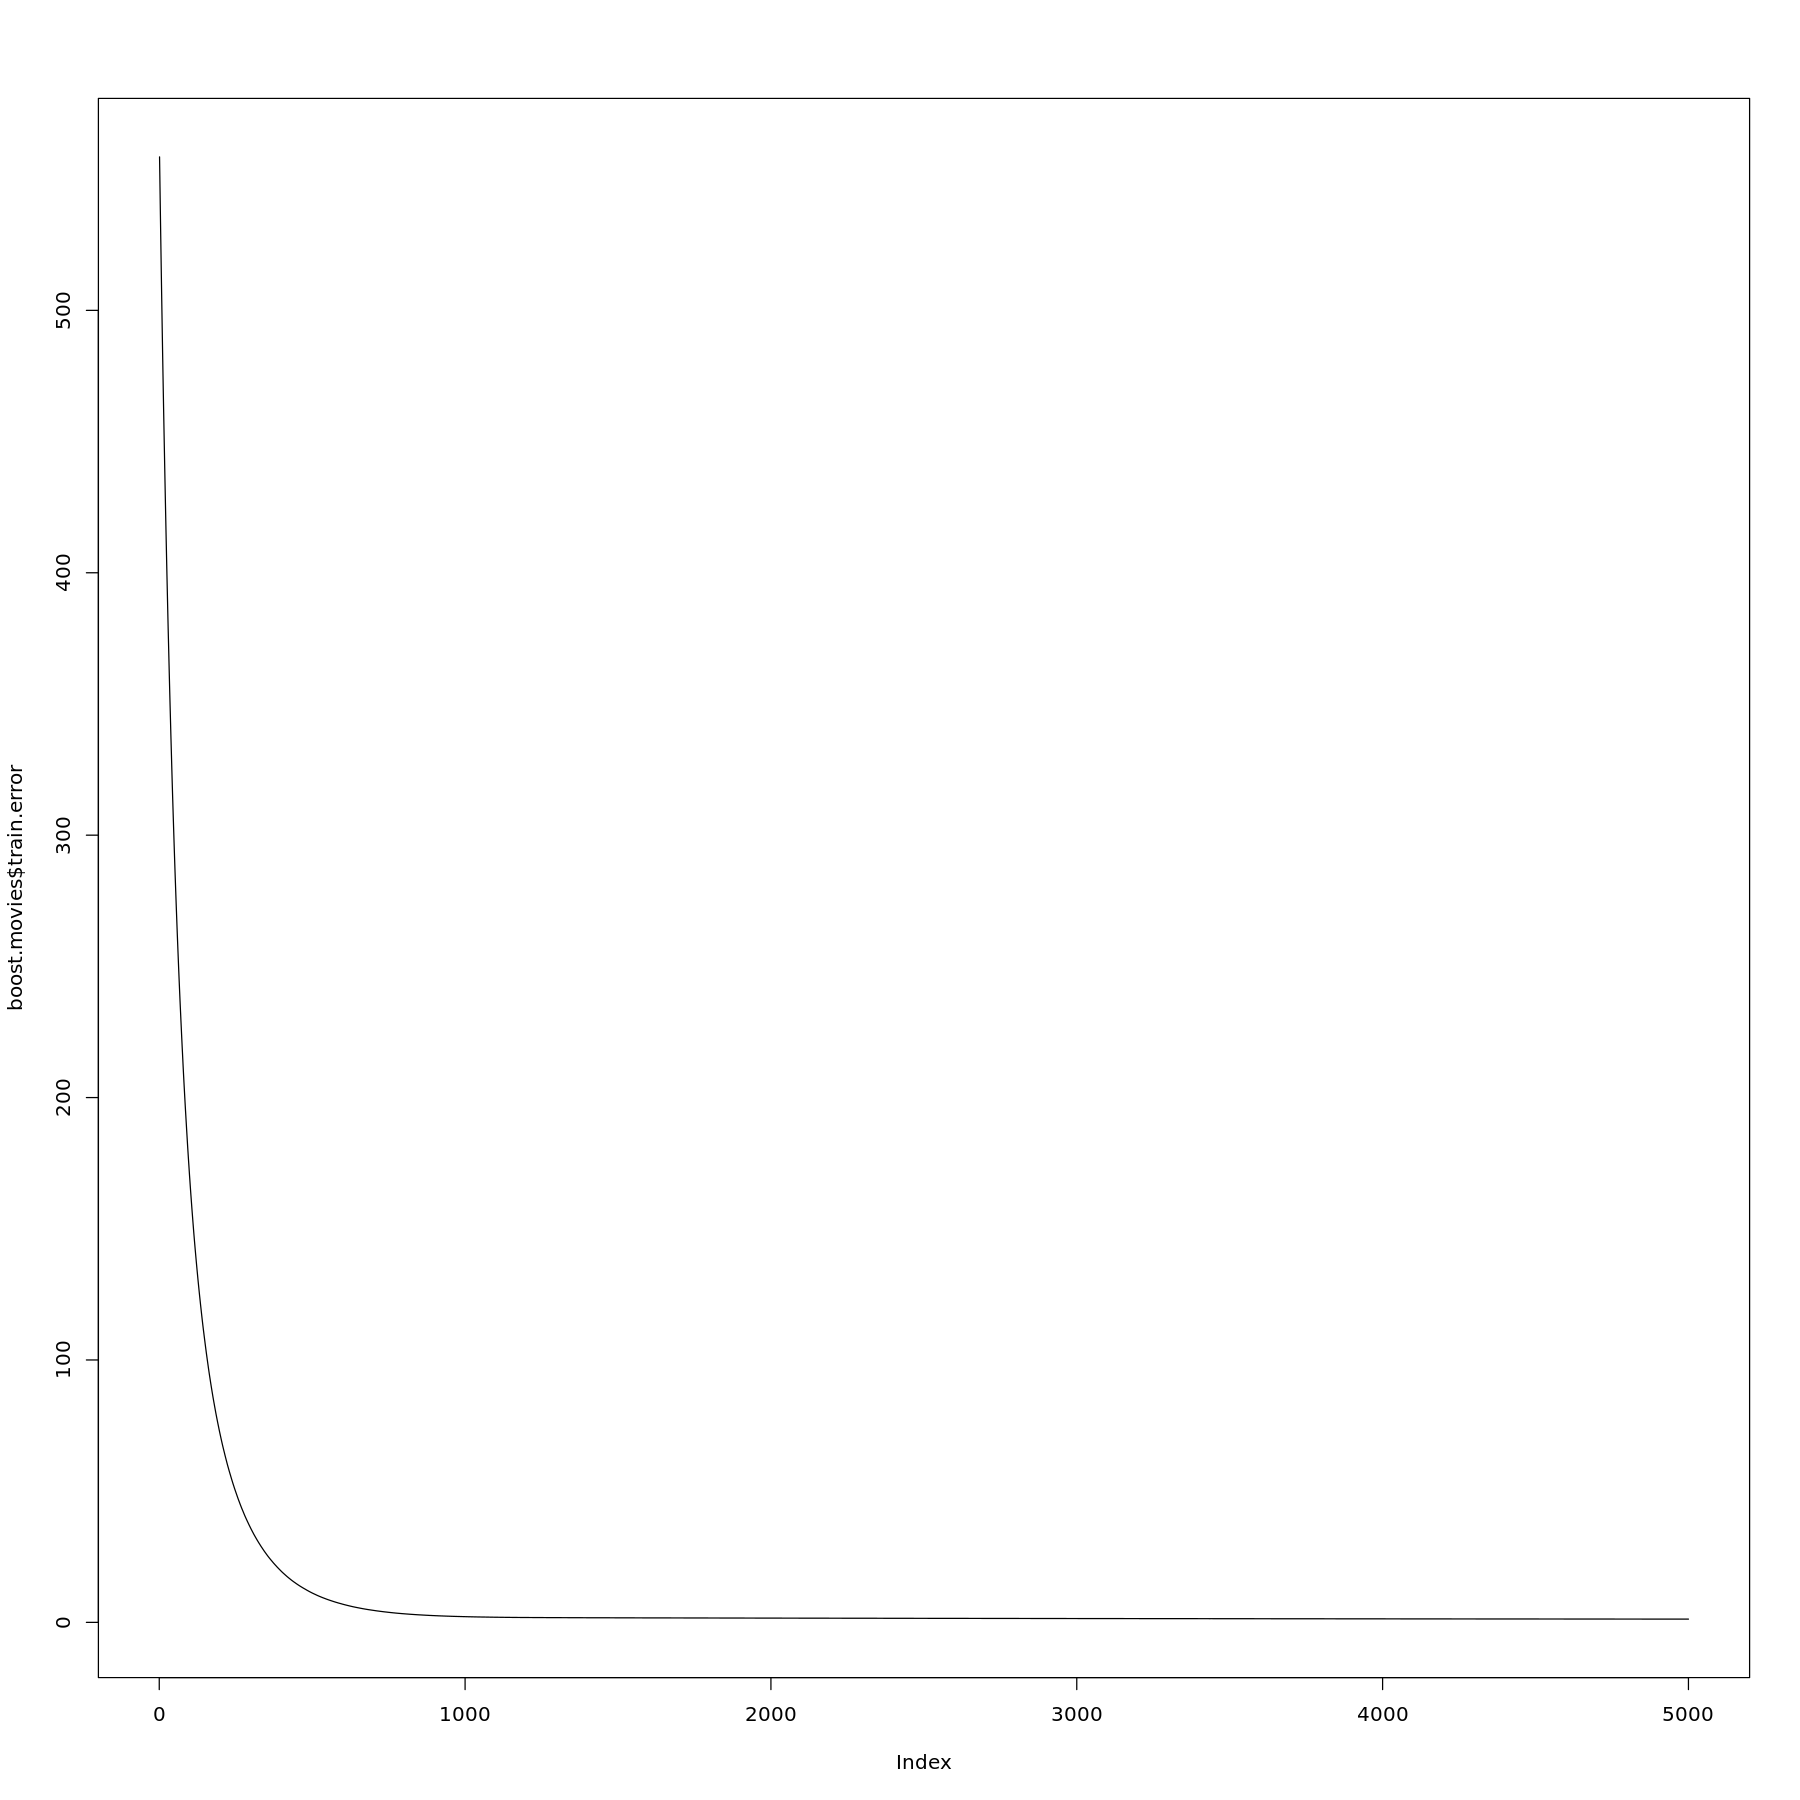

var               rel.inf     
CL.F.Low          CL.F.Low          6.273104e+01
CL.F.High         CL.F.High         3.533327e+01
BZ.F.Adjusted     BZ.F.Adjusted     1.169824e+00
CL.F.Open         CL.F.Open         1.848681e-01
TNX.Close         TNX.Close         1.544448e-01
BZ.F.Open         BZ.F.Open         1.027526e-01
BZ.F.High         BZ.F.High         7.872600e-02
TNX.High          TNX.High          6.645919e-02
TNX.Open          TNX.Open          6.390992e-02
BZ.F.Low          BZ.F.Low          5.437950e-02
TNX.Low           TNX.Low           4.922879e-02
EURUSD.X.Low      EURUSD.X.Low      3.048250e-03
BZ.F.Volume       BZ.F.Volume       2.683037e-03
EURUSD.X.High     EURUSD.X.High     2.339131e-03
EURUSD.X.Close    EURUSD.X.Close    2.002450e-03
EURUSD.X.Open     EURUSD.X.Open     4.378314e-04
CL.F.Volume       CL.F.Volume       4.375358e-04
GC.F.Close        GC.F.Close        1.558460e-04
date              date              0.000000e+00
GSPC.Open         GSPC.Open         0.000000e+00
GSPC.High         GSPC.High         0.000000e+00
GSPC.Low          GSPC.Low          0.000000e+00
GSPC.Close        GSPC.Close        0.000000e+00
GSPC.Volume       GSPC.Volume       0.000000e+00
GSPC.Adjusted     GSPC.Adjusted     0.000000e+00
IXIC.Open         IXIC.Open         0.000000e+00
IXIC.High         IXIC.High         0.000000e+00
IXIC.Low          IXIC.Low          0.000000e+00
IXIC.Close        IXIC.Close        0.000000e+00
IXIC.Volume       IXIC.Volume       0.000000e+00
IXIC.Adjusted     IXIC.Adjusted     0.000000e+00
GC.F.Open         GC.F.Open         0.000000e+00
GC.F.High         GC.F.High         0.000000e+00
GC.F.Low          GC.F.Low          0.000000e+00
GC.F.Volume       GC.F.Volume       0.000000e+00
GC.F.Adjusted     GC.F.Adjusted     0.000000e+00
EURUSD.X.Volume   EURUSD.X.Volume   0.000000e+00
EURUSD.X.Adjusted EURUSD.X.Adjusted 0.000000e+00
TNX.Volume        TNX.Volume        0.000000e+00
TNX.Adjusted      TNX.Adjusted      0.000000e+00

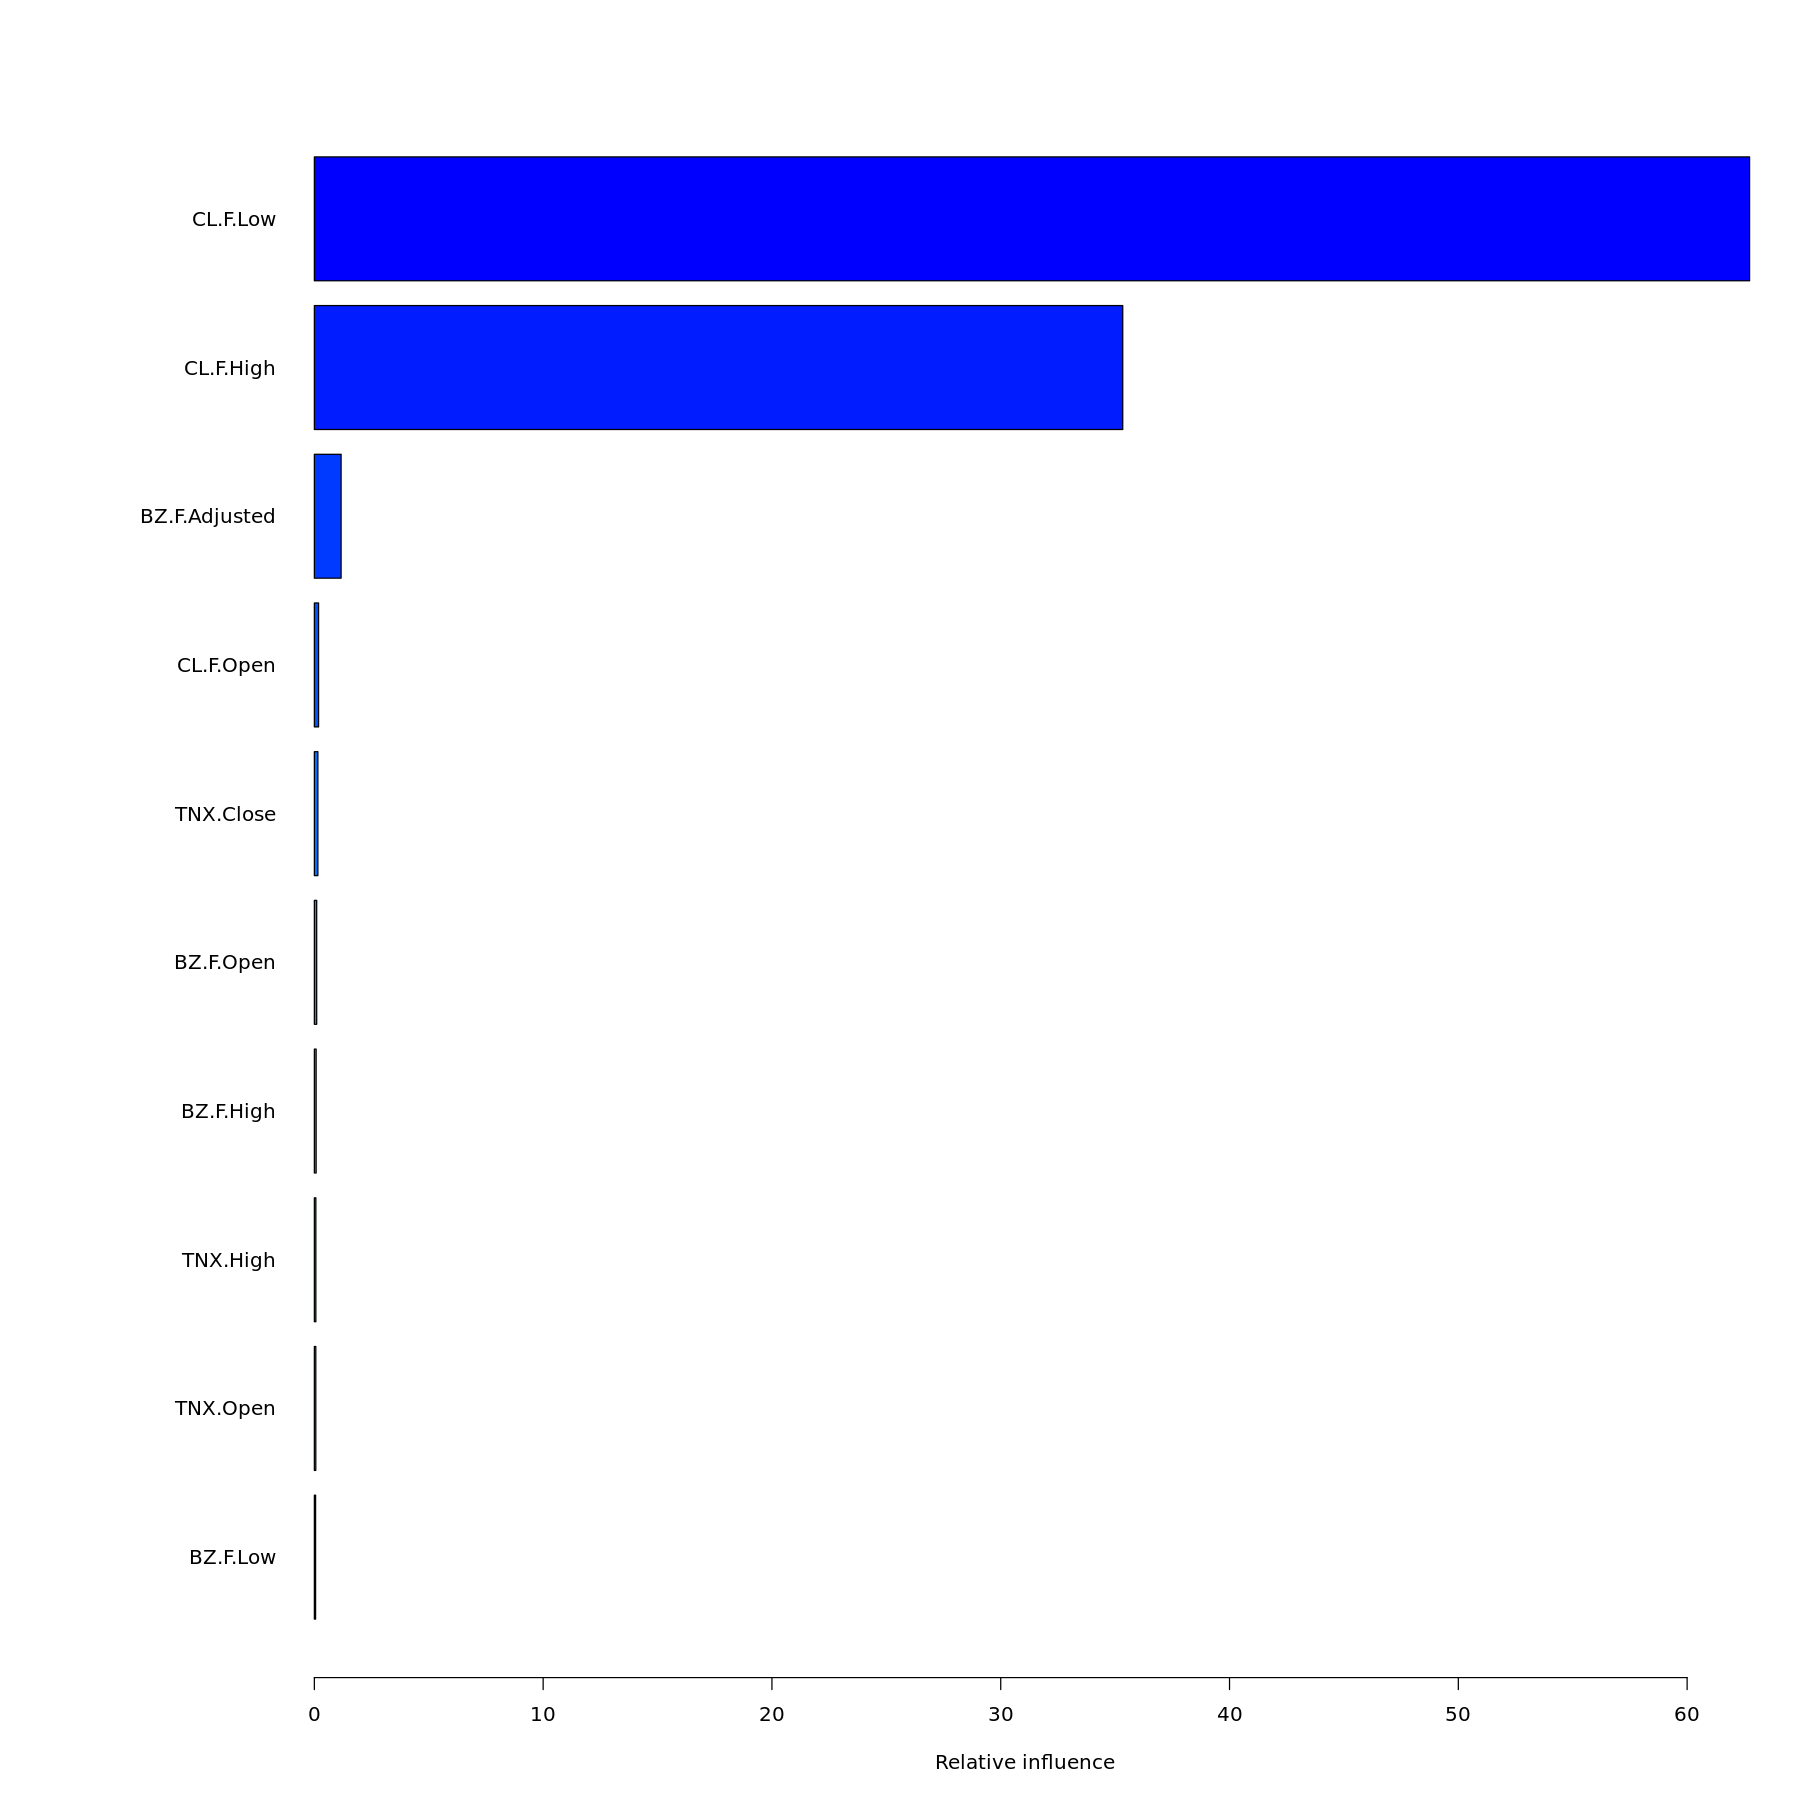

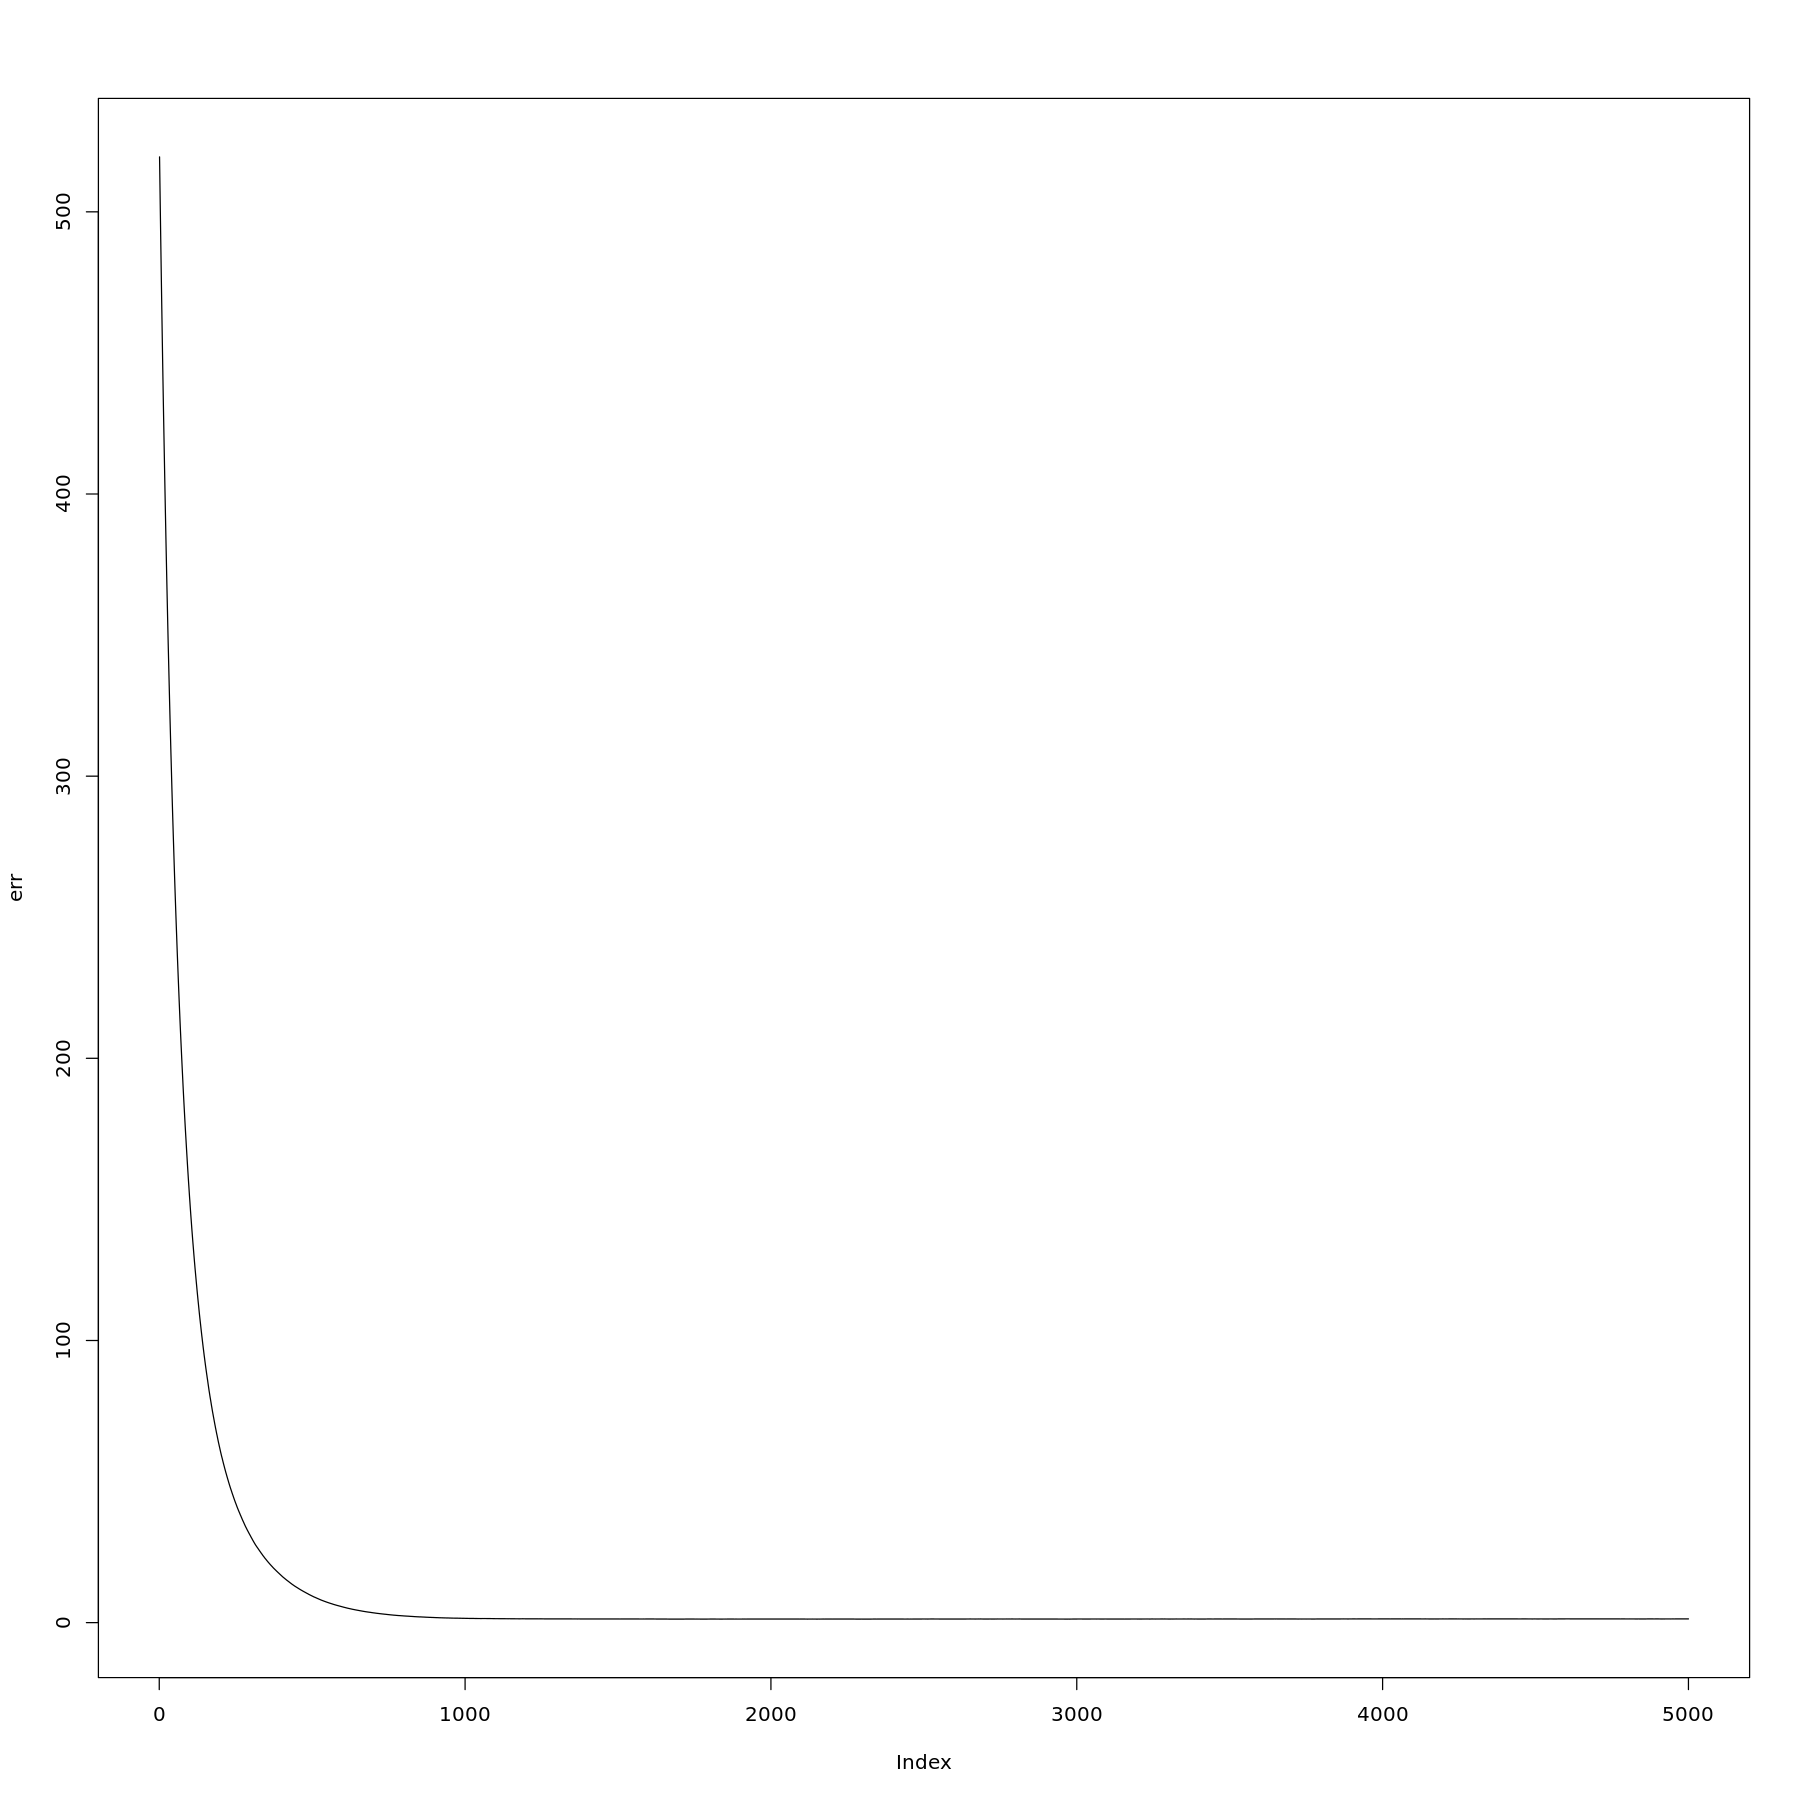

[1] 1.249998

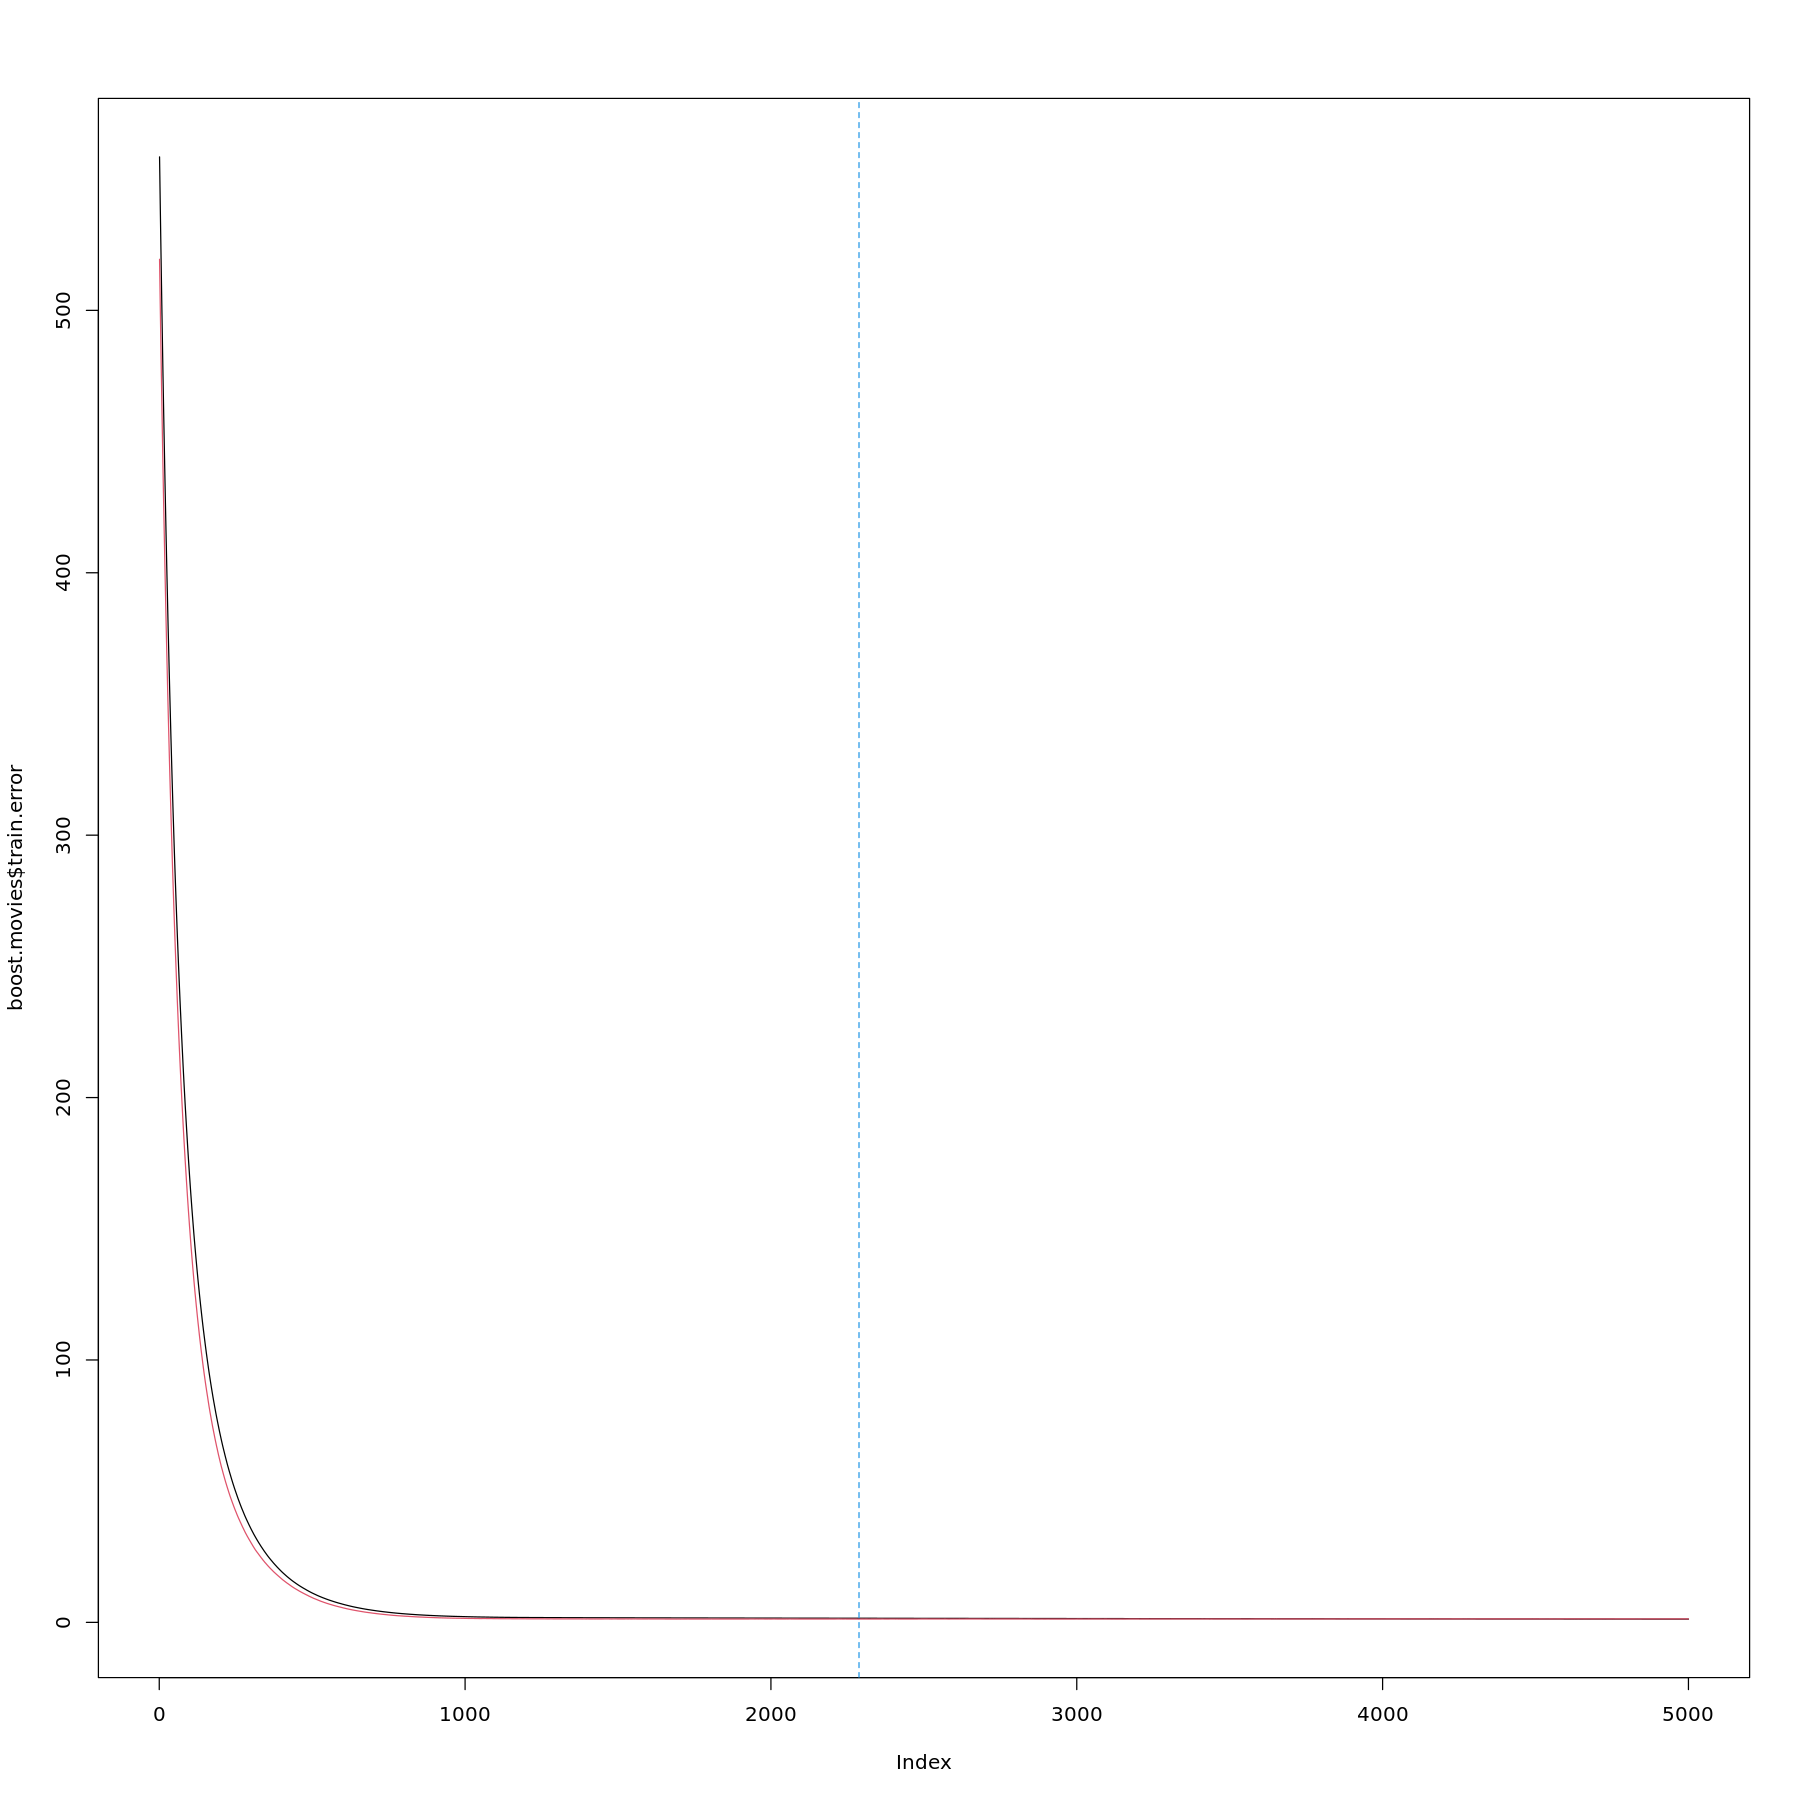

In [ ]:
# 3 Boosting - Smaller learning rate 

boost.movies=gbm(CL.F.Close~.-BZ.F.Close, data=data.train, 
                 distribution="gaussian", n.trees=5000, interaction.depth=1, shrinkage=0.01)
plot(boost.movies$train.error, type="l")

par(mai=mai.new)

summary(boost.movies, las=1, cBar=10) 
par(mai=mai.old)

yhat.boost=predict(boost.movies ,newdata=data.test,n.trees=1:5000)
err = apply(yhat.boost,2,function(pred) mean((data.test$CL.F.Close-pred)^2))
plot(err, type="l")


plot(boost.movies$train.error, type="l")
lines(err, type="l", col=2)
best=which.min(err)
abline(v=best, lty=2, col=4)
min(err)

In [ ]:
#install.packages("viridis")
library(viridis)

also installing the dependency ‘gridExtra’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: viridisLite



Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 33: EURUSD.X.Volume has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 39: TNX.Volume has no variation.”


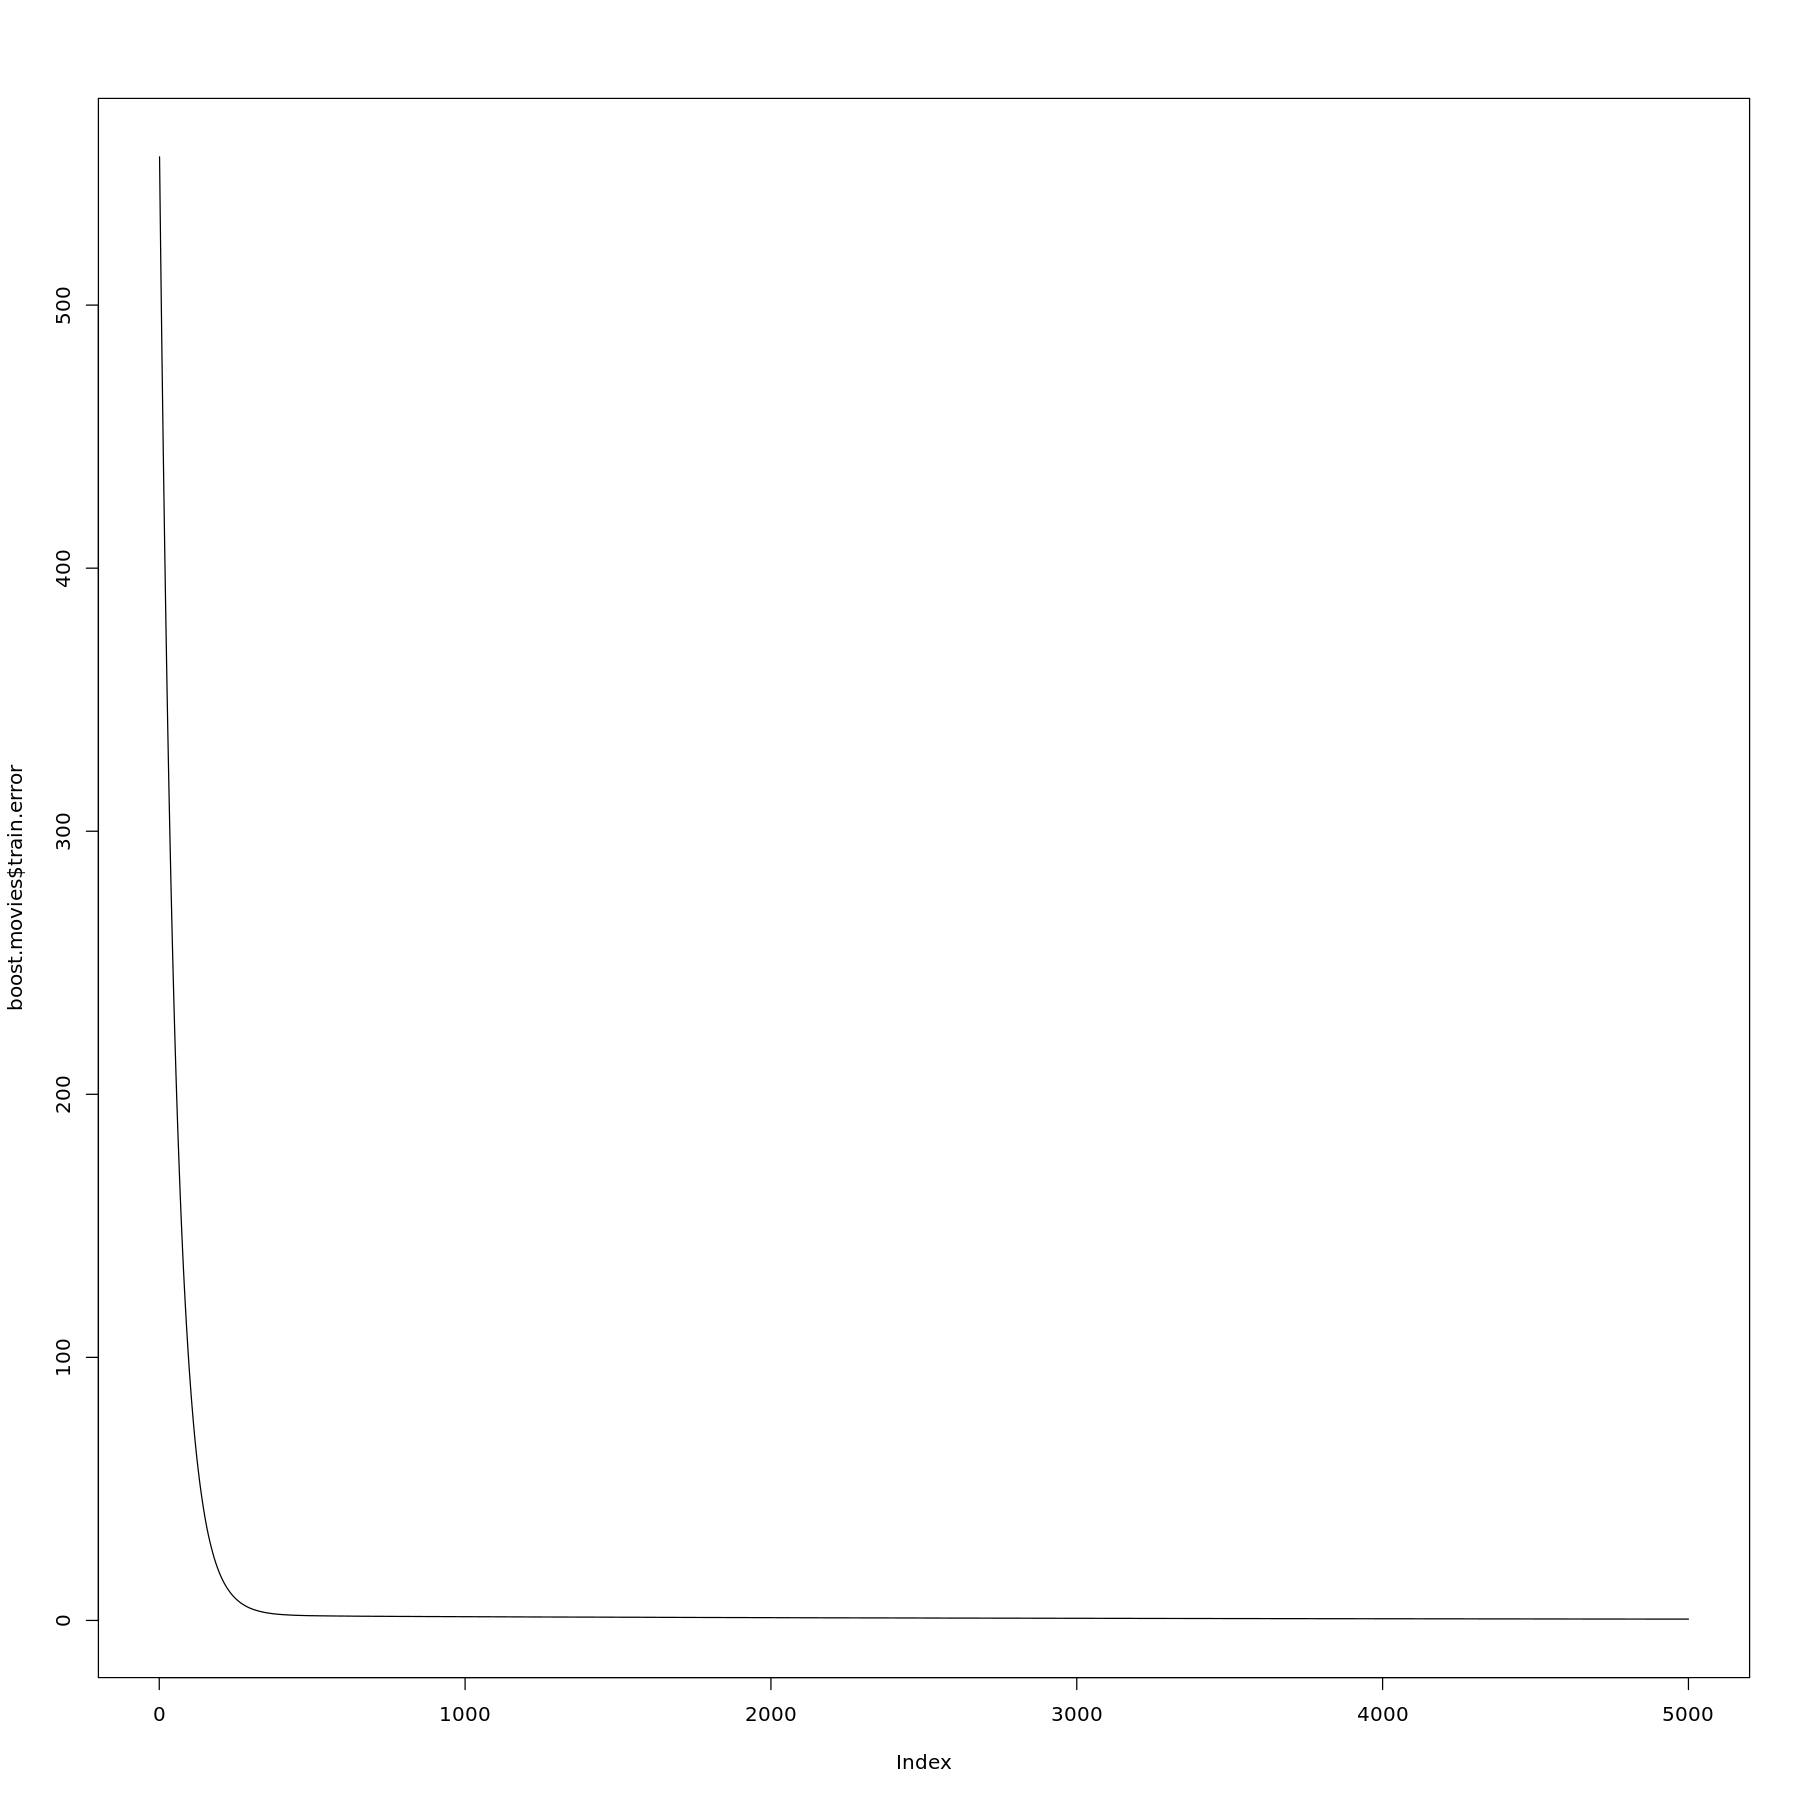

var               rel.inf     
CL.F.Low          CL.F.Low          6.810621e+01
CL.F.High         CL.F.High         2.996266e+01
BZ.F.Adjusted     BZ.F.Adjusted     8.840615e-01
CL.F.Open         CL.F.Open         2.645951e-01
TNX.Close         TNX.Close         1.865112e-01
BZ.F.High         BZ.F.High         1.130647e-01
BZ.F.Open         BZ.F.Open         1.083378e-01
TNX.Open          TNX.Open          8.026730e-02
TNX.High          TNX.High          7.850154e-02
BZ.F.Low          BZ.F.Low          7.712324e-02
TNX.Low           TNX.Low           4.422962e-02
GSPC.Volume       GSPC.Volume       9.111970e-03
CL.F.Volume       CL.F.Volume       7.840113e-03
date              date              7.403842e-03
EURUSD.X.Open     EURUSD.X.Open     6.813935e-03
EURUSD.X.Low      EURUSD.X.Low      6.150094e-03
EURUSD.X.High     EURUSD.X.High     5.327267e-03
BZ.F.Volume       BZ.F.Volume       5.262229e-03
EURUSD.X.Close    EURUSD.X.Close    4.906580e-03
GSPC.Open         GSPC.Open         4.767275e-03
GC.F.Low          GC.F.Low          4.551548e-03
IXIC.Volume       IXIC.Volume       3.942441e-03
GC.F.Close        GC.F.Close        3.567620e-03
GC.F.Open         GC.F.Open         3.523696e-03
GC.F.Volume       GC.F.Volume       3.469710e-03
IXIC.Close        IXIC.Close        3.421917e-03
GC.F.High         GC.F.High         3.397775e-03
GSPC.Close        GSPC.Close        3.122408e-03
IXIC.Open         IXIC.Open         2.212093e-03
IXIC.Low          IXIC.Low          1.963008e-03
GSPC.Low          GSPC.Low          1.442540e-03
IXIC.High         IXIC.High         1.369283e-03
GSPC.High         GSPC.High         8.687156e-04
GSPC.Adjusted     GSPC.Adjusted     0.000000e+00
IXIC.Adjusted     IXIC.Adjusted     0.000000e+00
GC.F.Adjusted     GC.F.Adjusted     0.000000e+00
EURUSD.X.Volume   EURUSD.X.Volume   0.000000e+00
EURUSD.X.Adjusted EURUSD.X.Adjusted 0.000000e+00
TNX.Volume        TNX.Volume        0.000000e+00
TNX.Adjusted      TNX.Adjusted      0.000000e+00

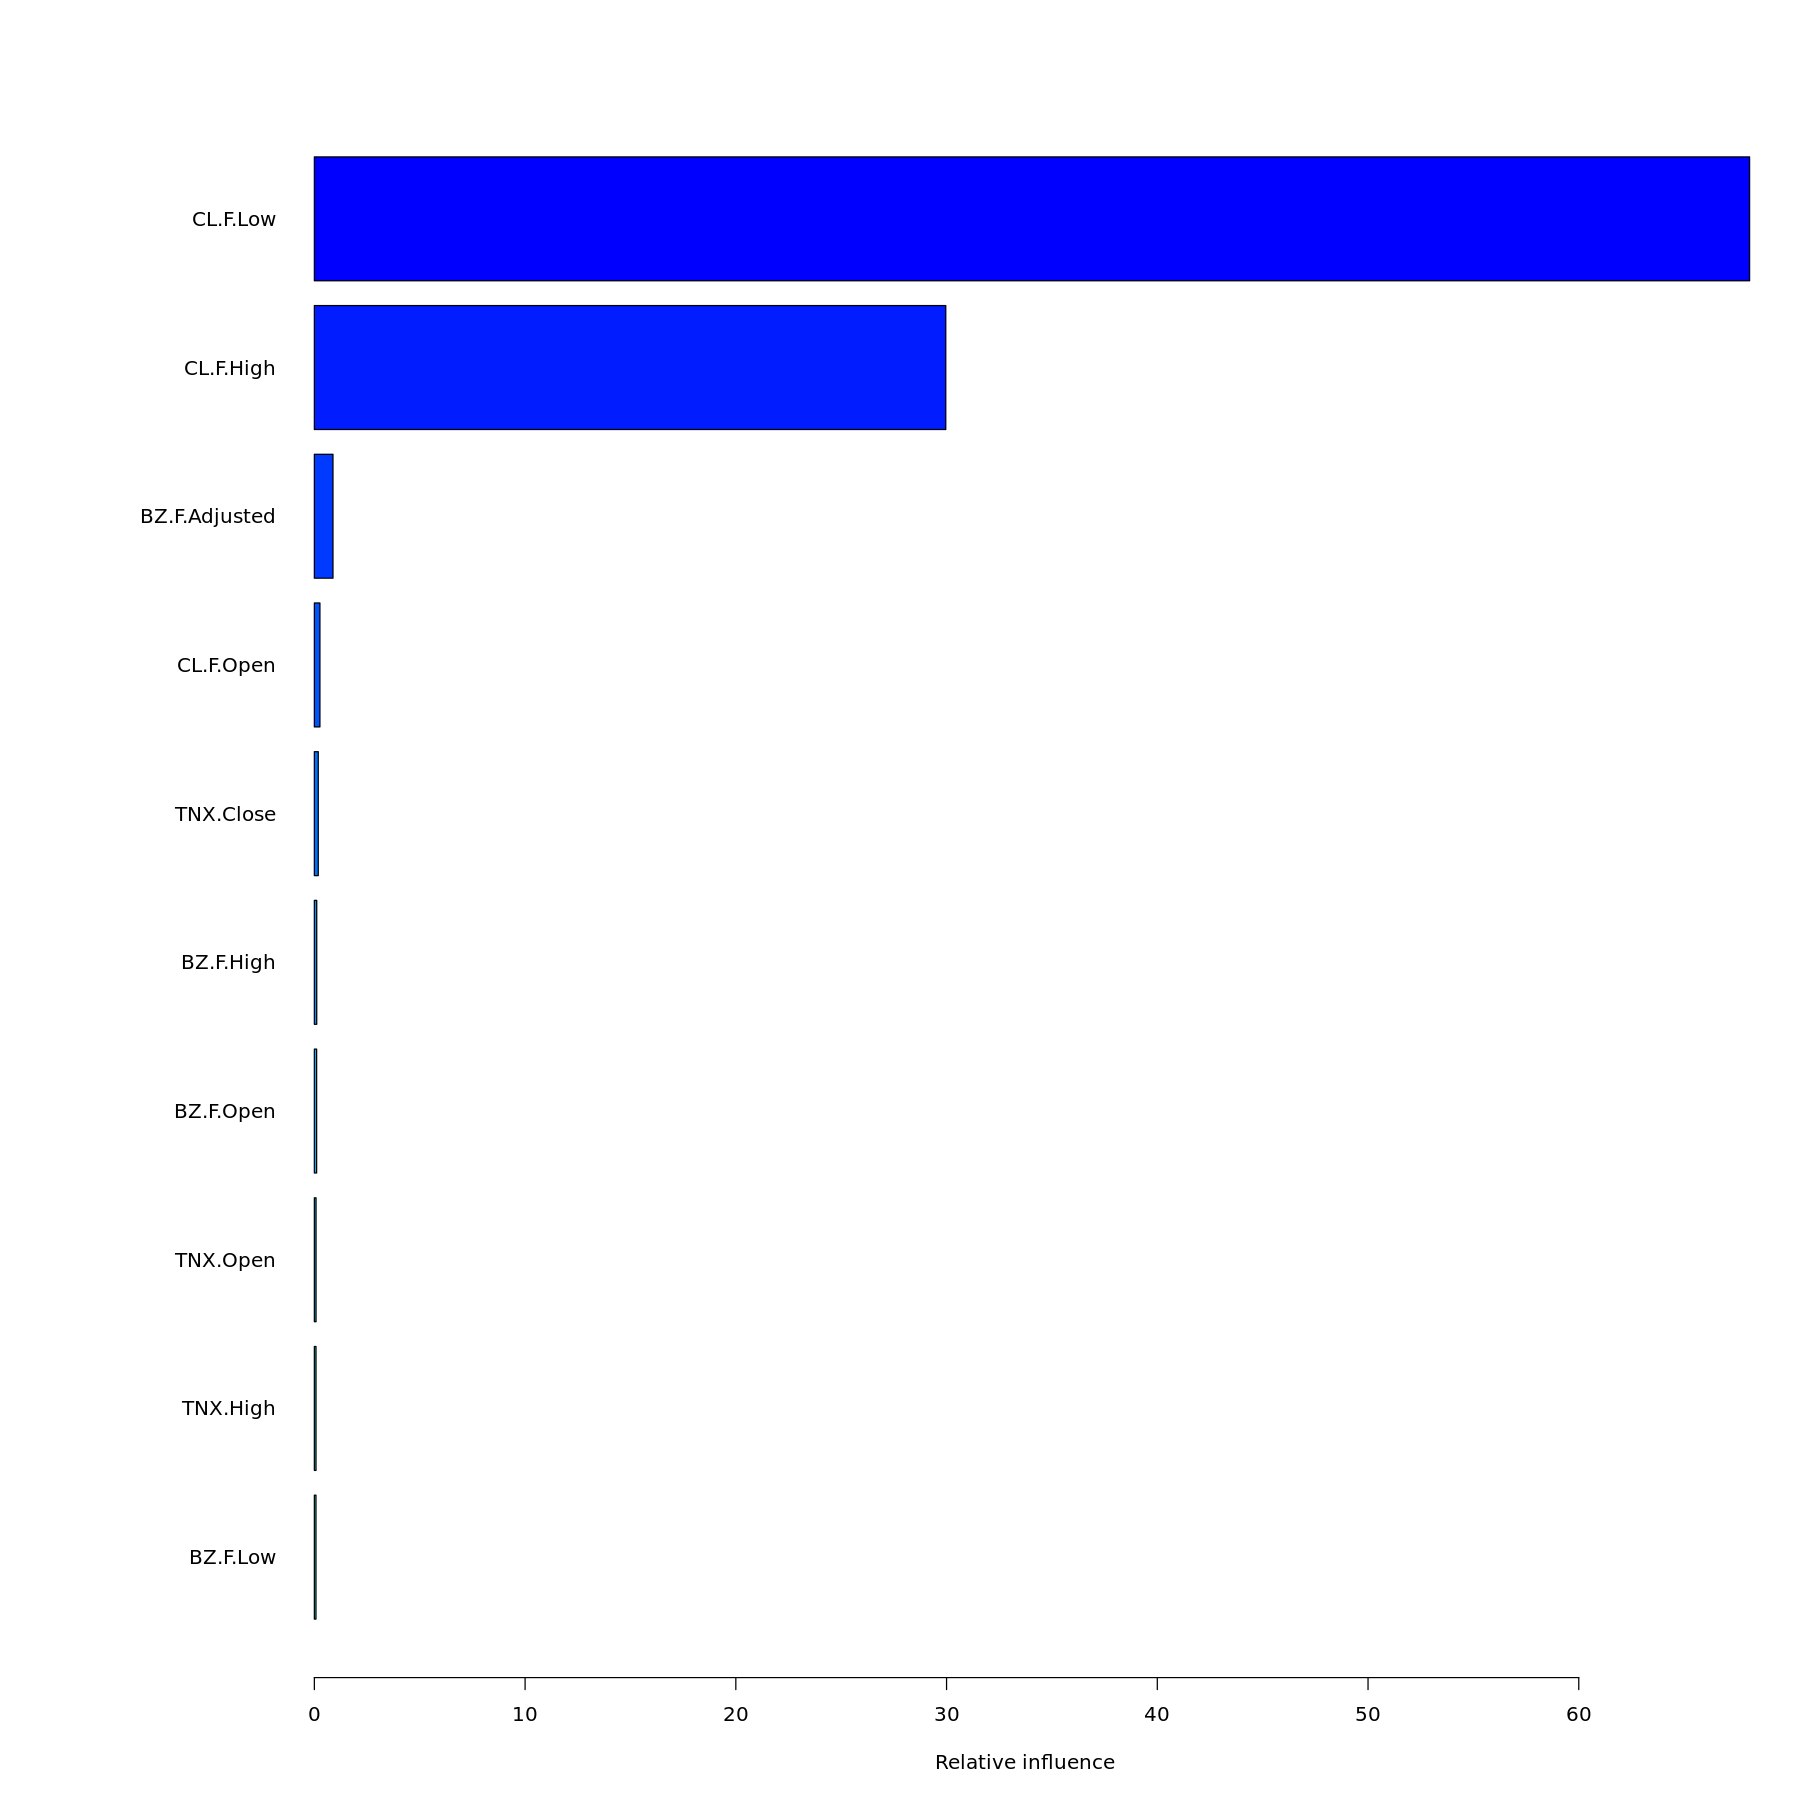

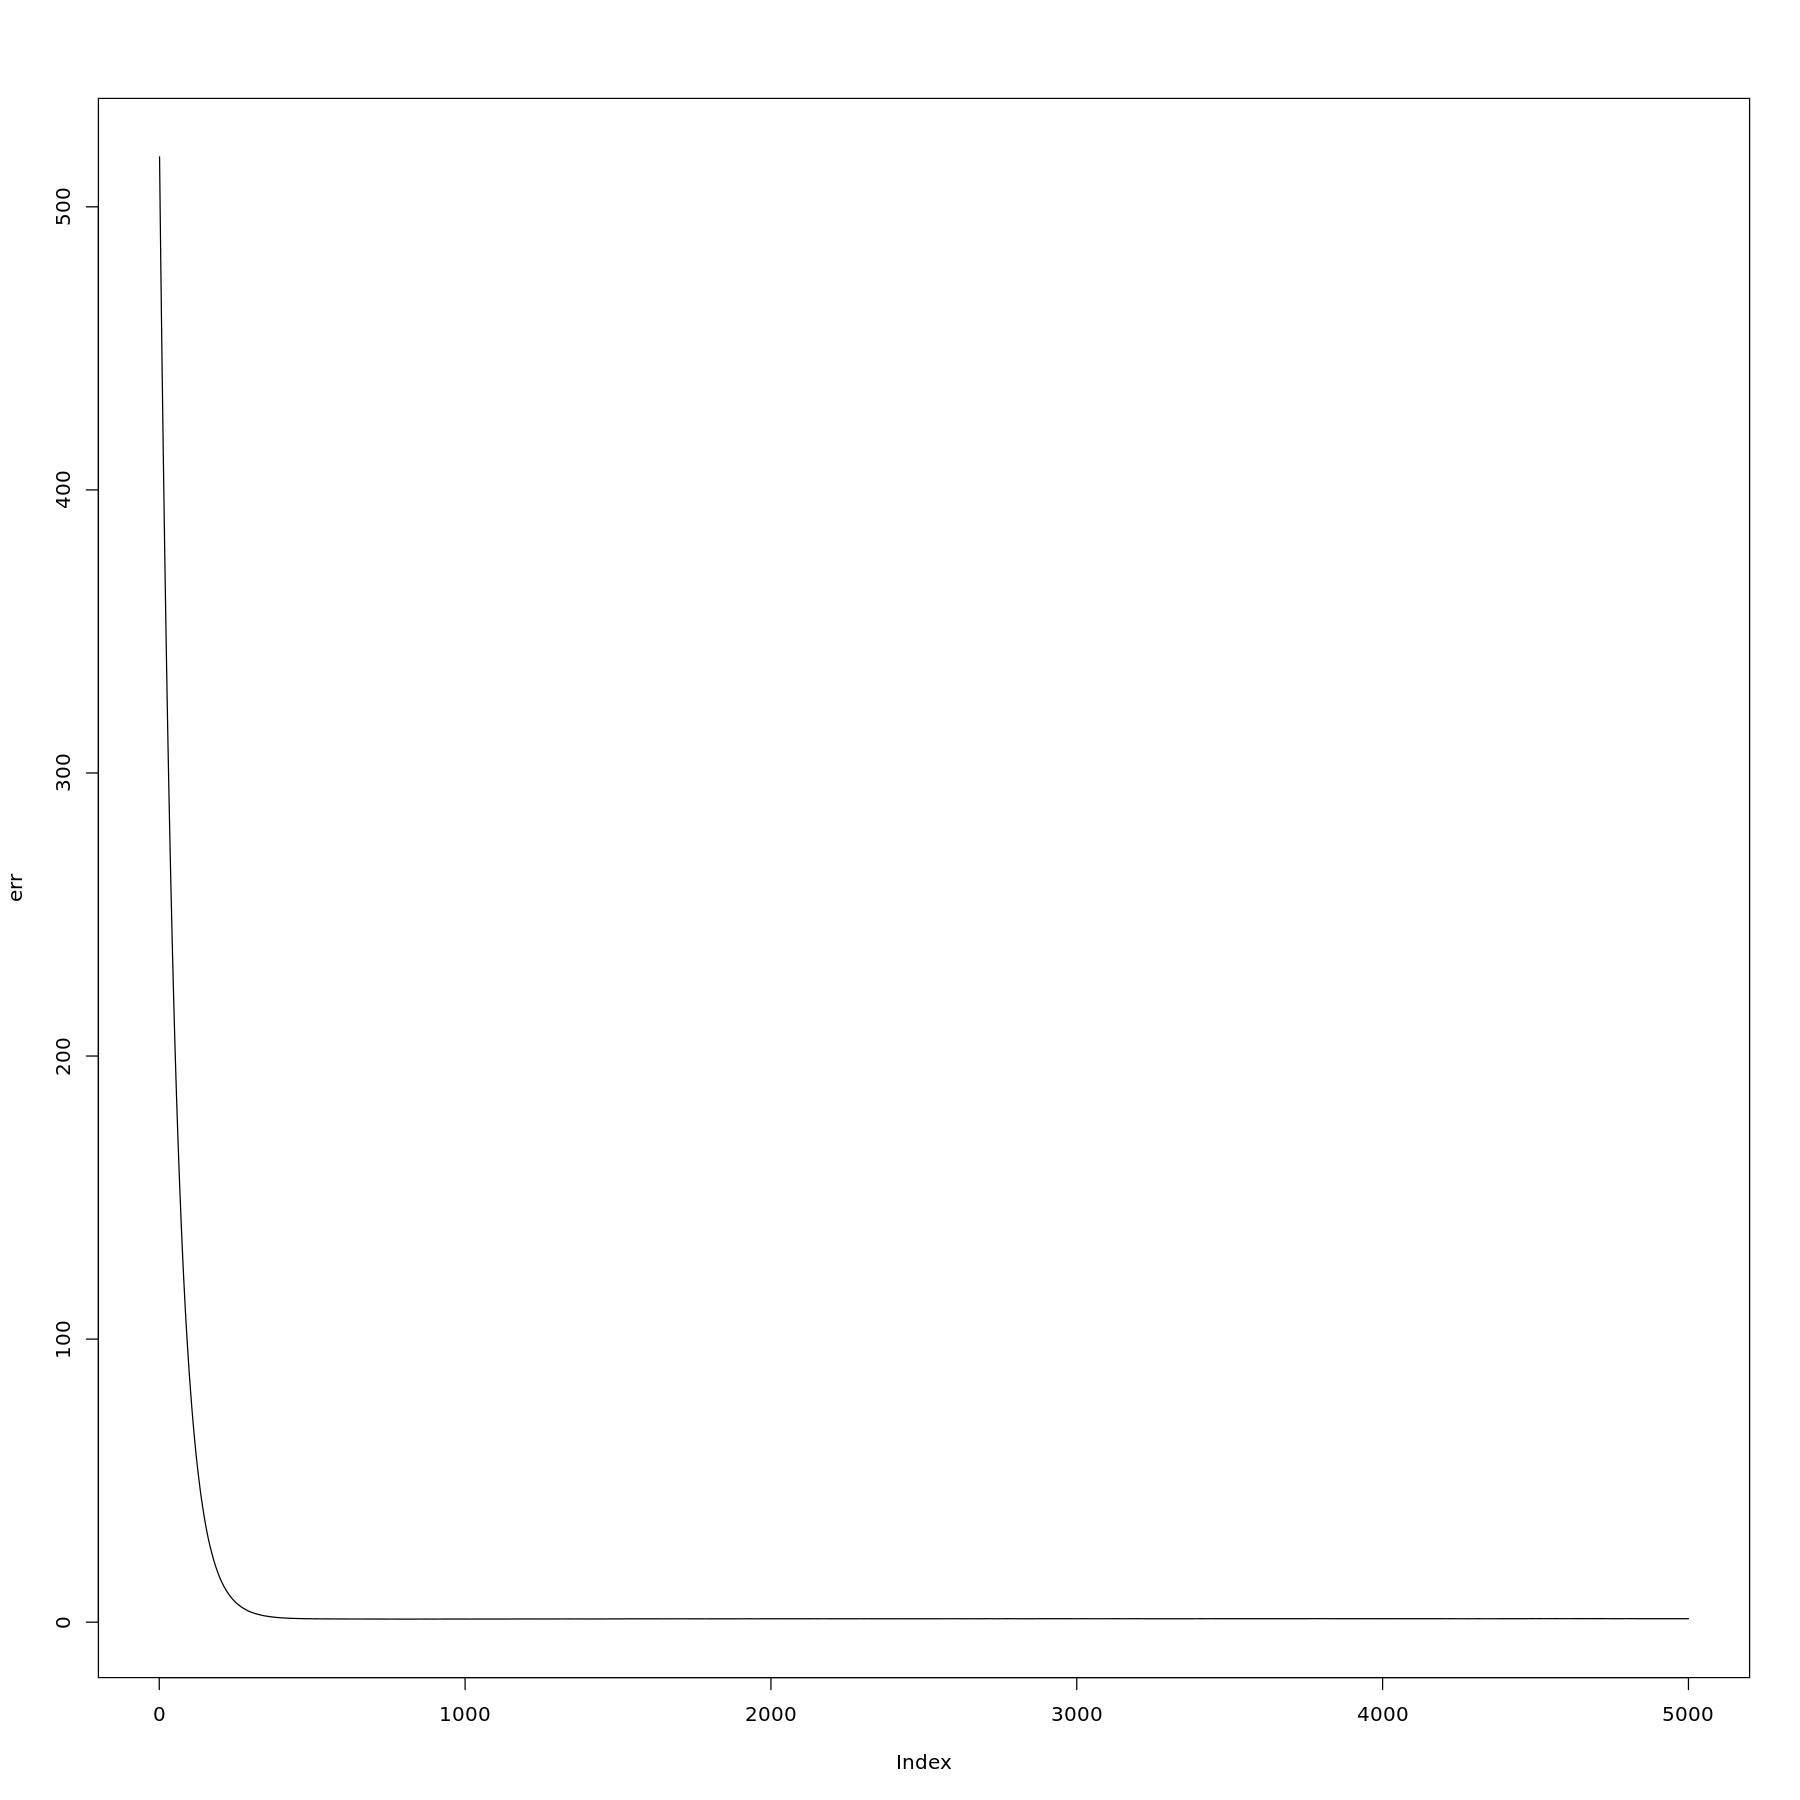

[1] 1239.729

[1] 2222.8

[1] 162.4659

gbm(formula = CL.F.Close ~ . - BZ.F.Close, distribution = "gaussian", 
    data = data.train, n.trees = 5000, interaction.depth = 4, 
    shrinkage = 0.01)
A gradient boosted model with gaussian loss function.
5000 iterations were performed.
There were 40 predictors of which 33 had non-zero influence.

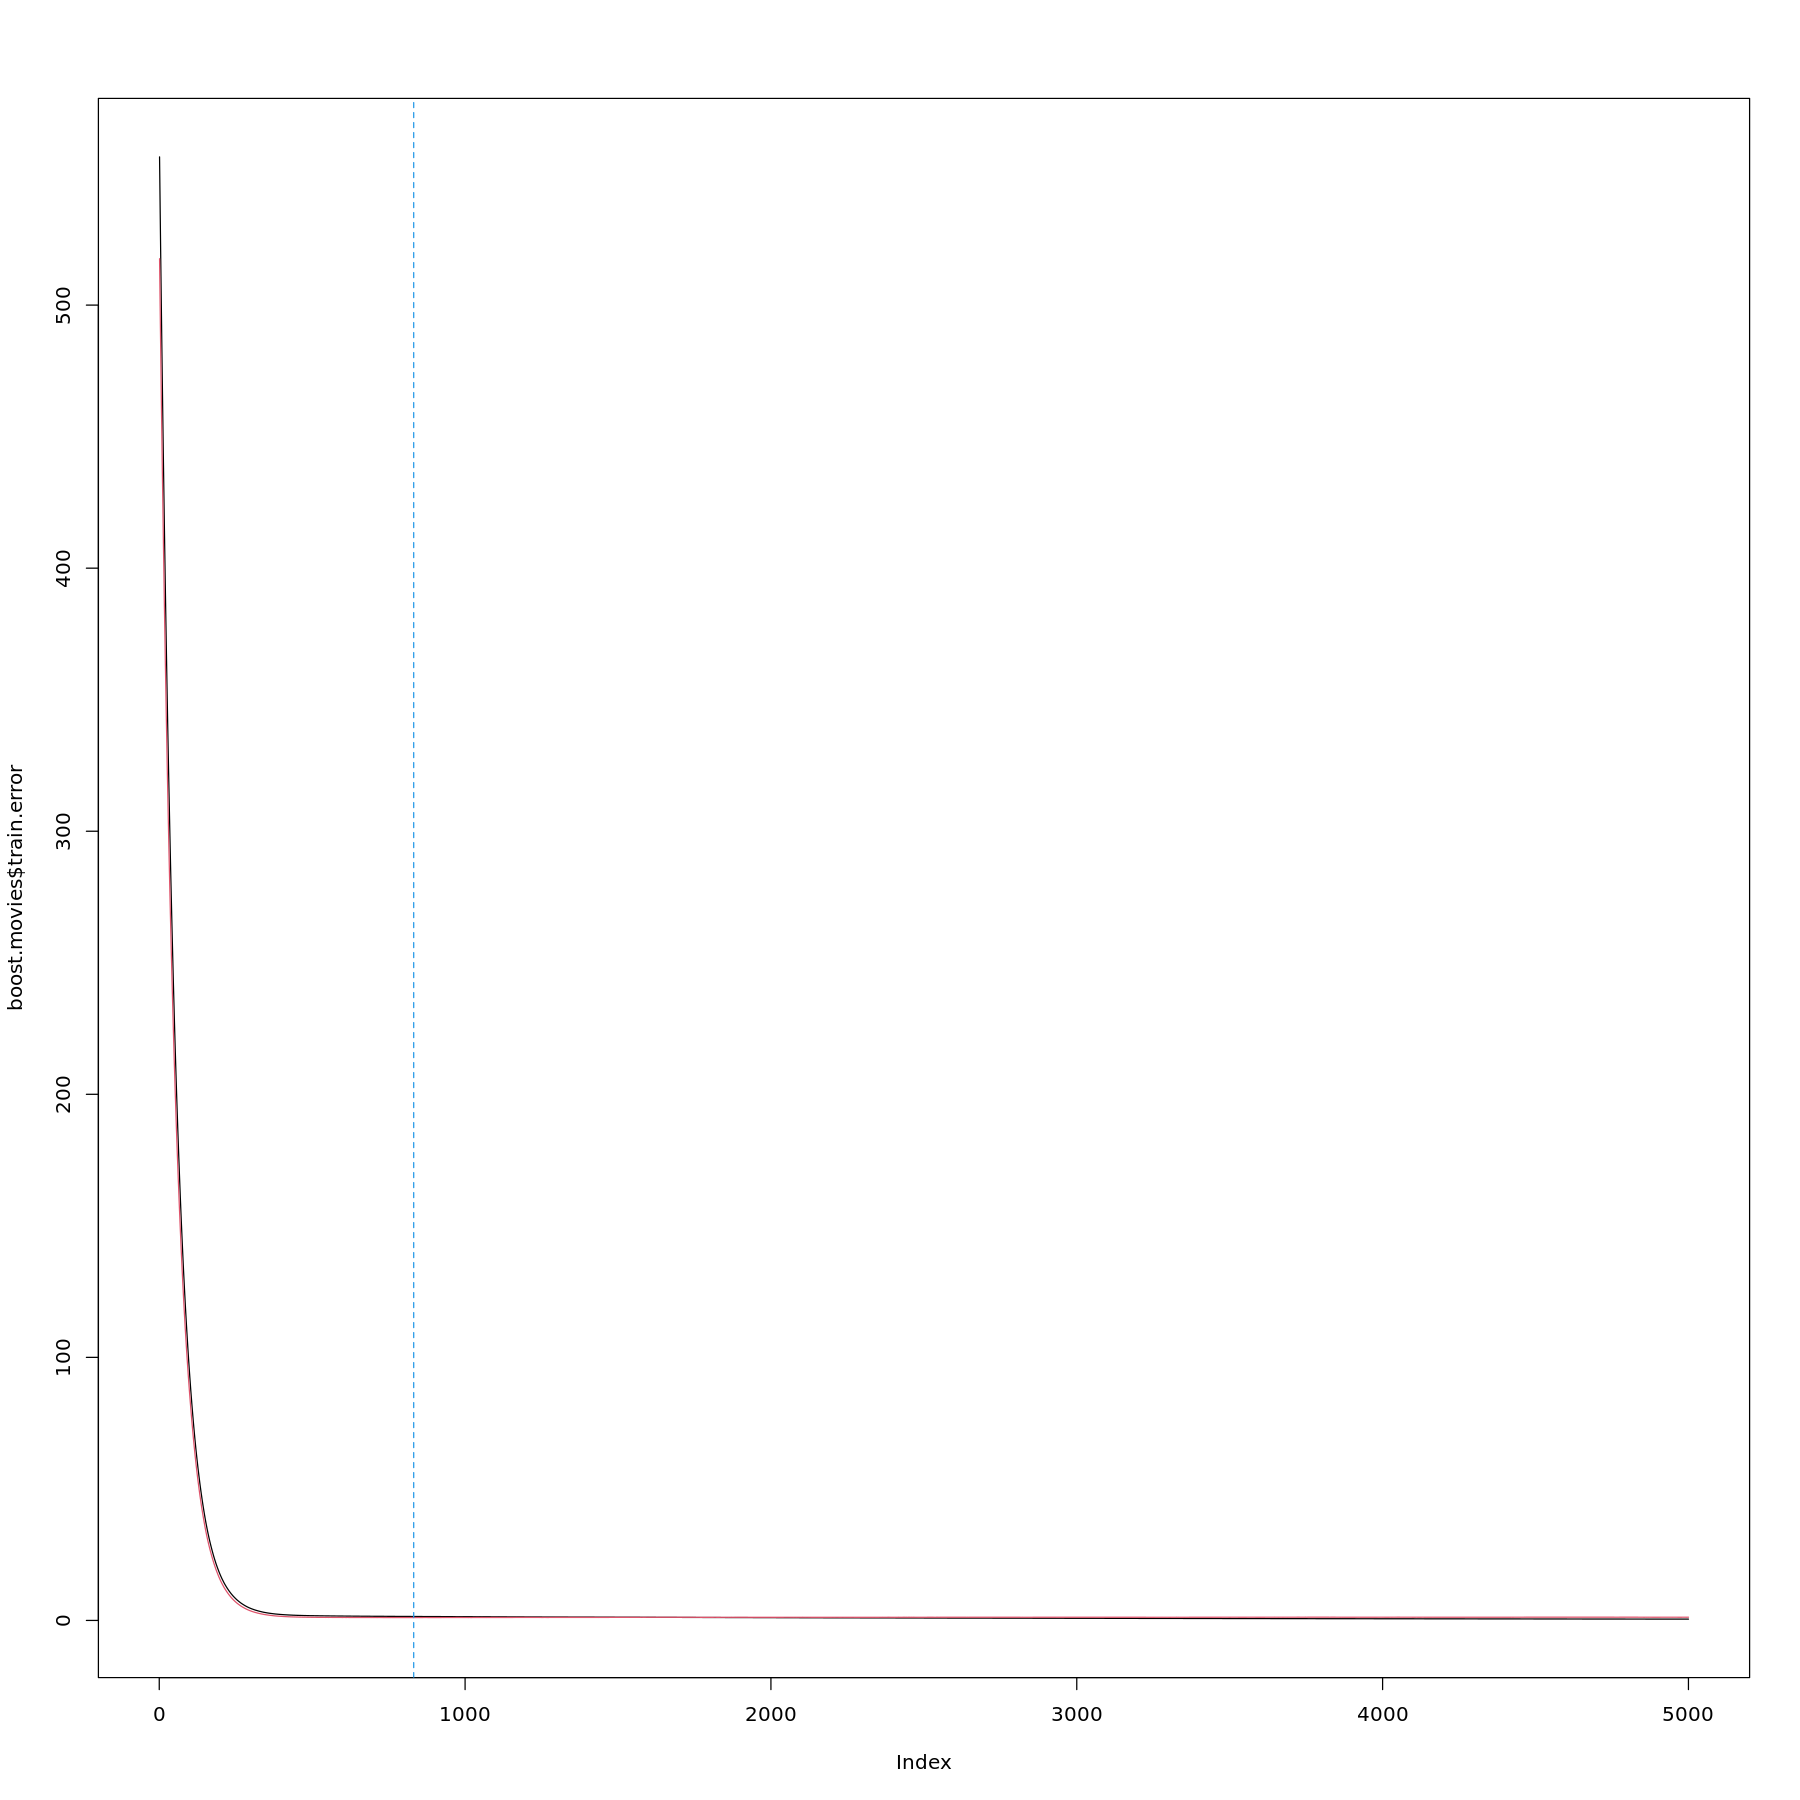

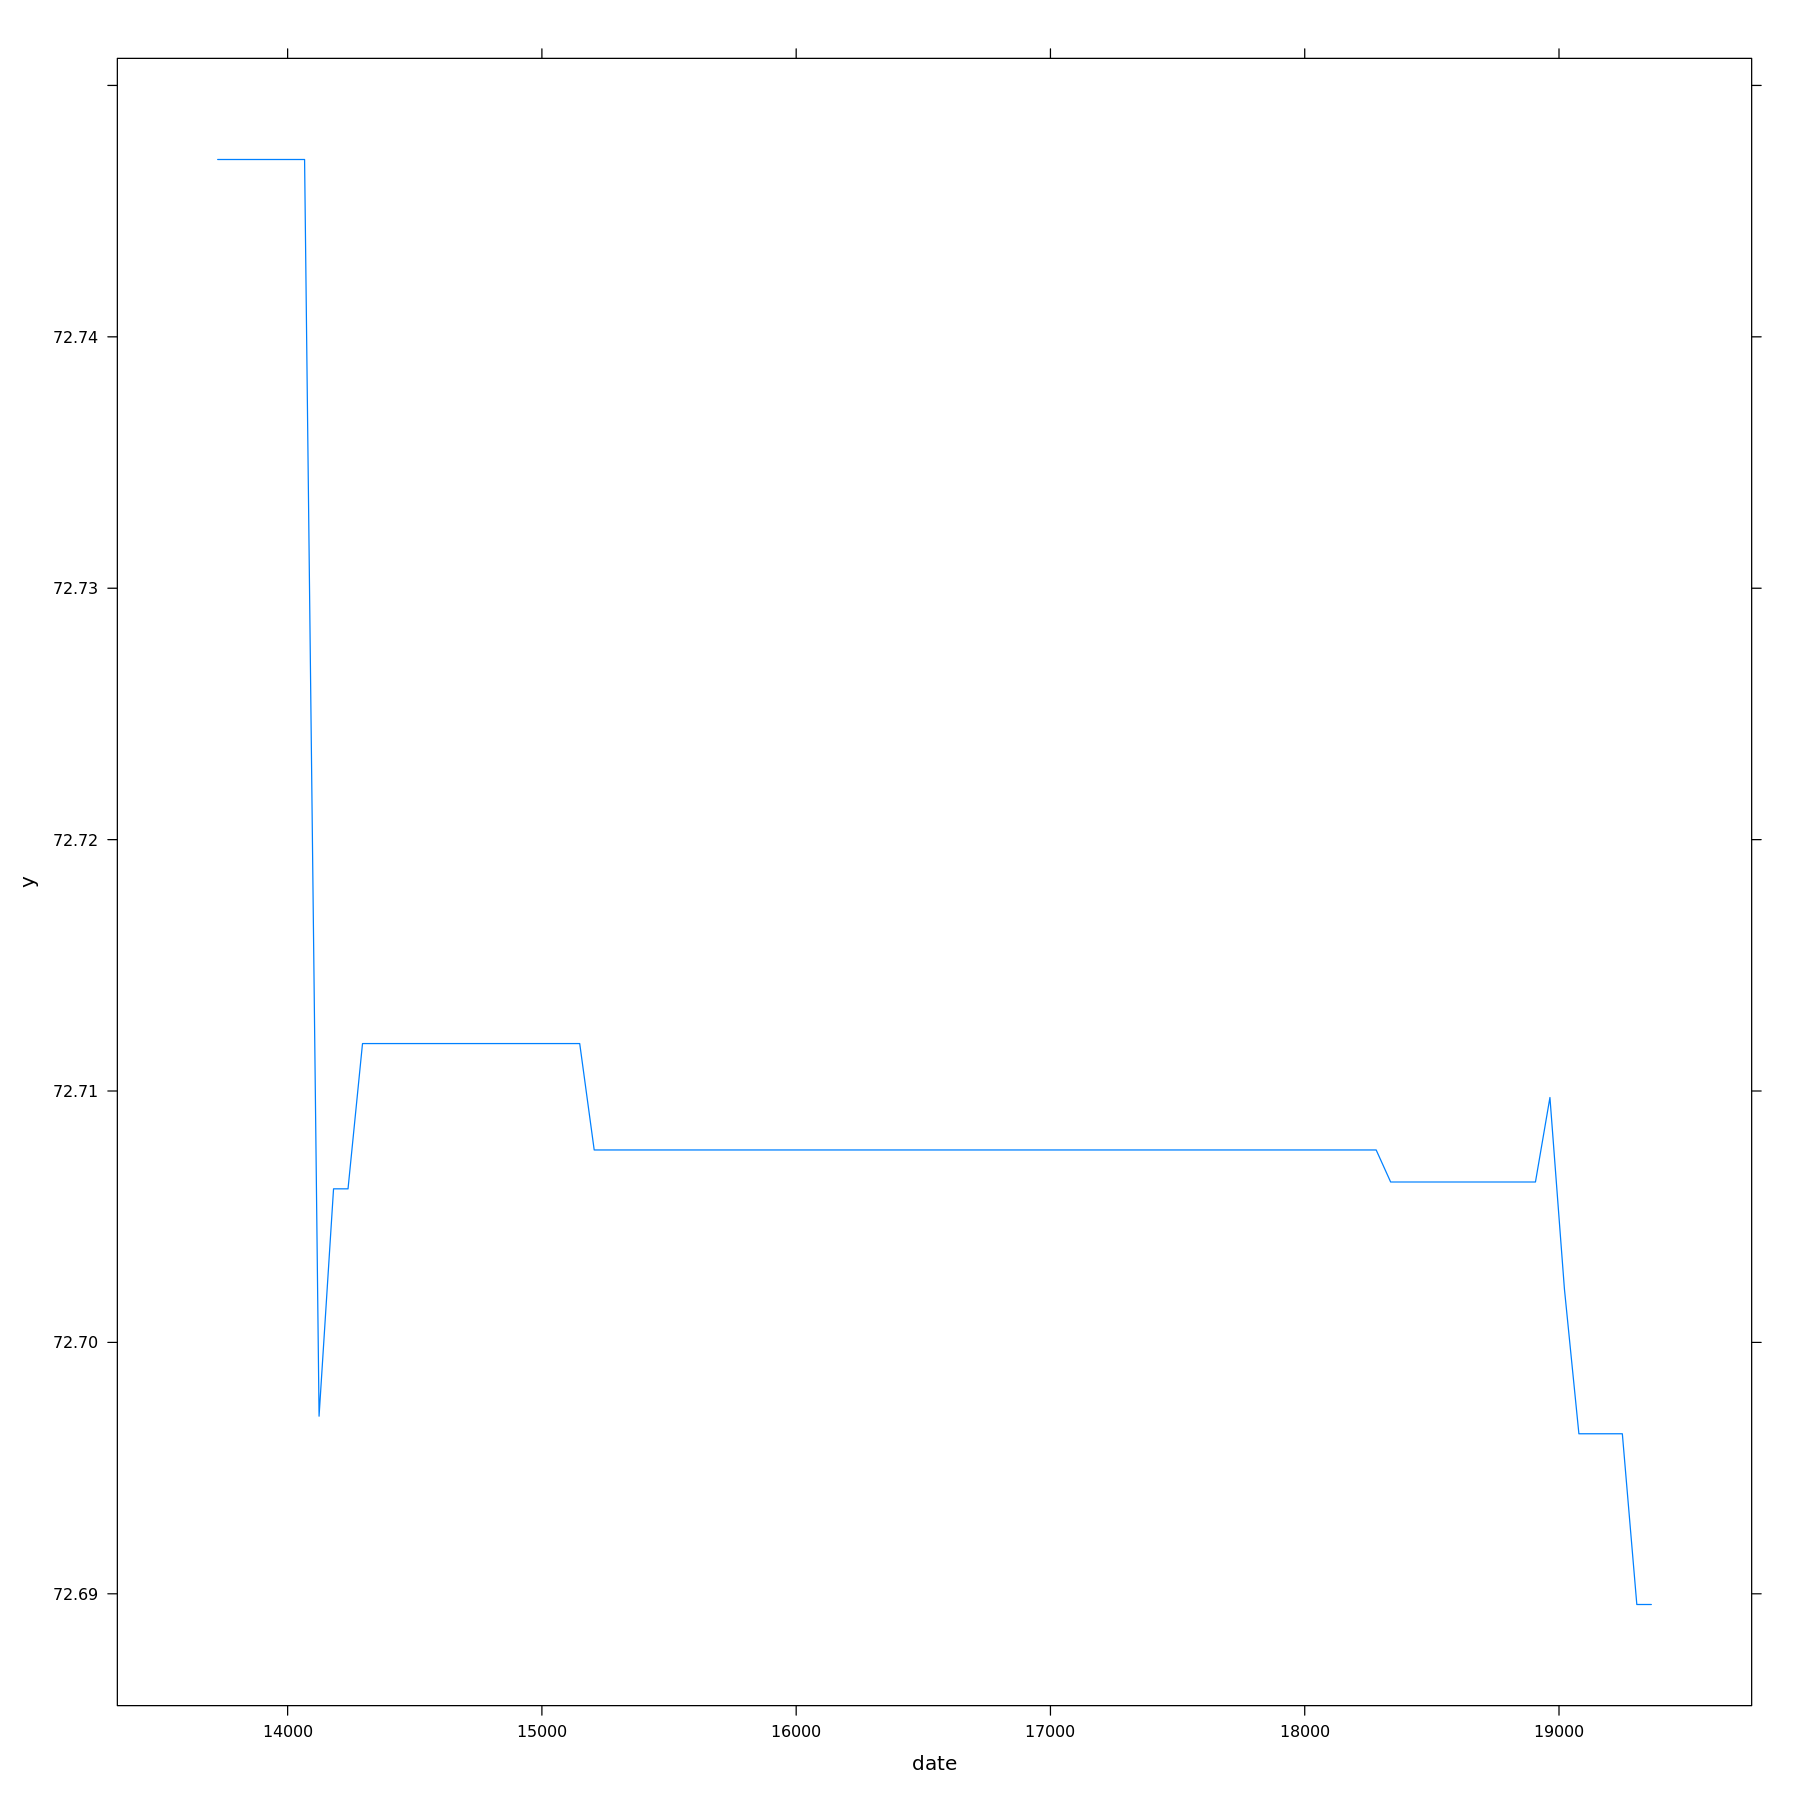

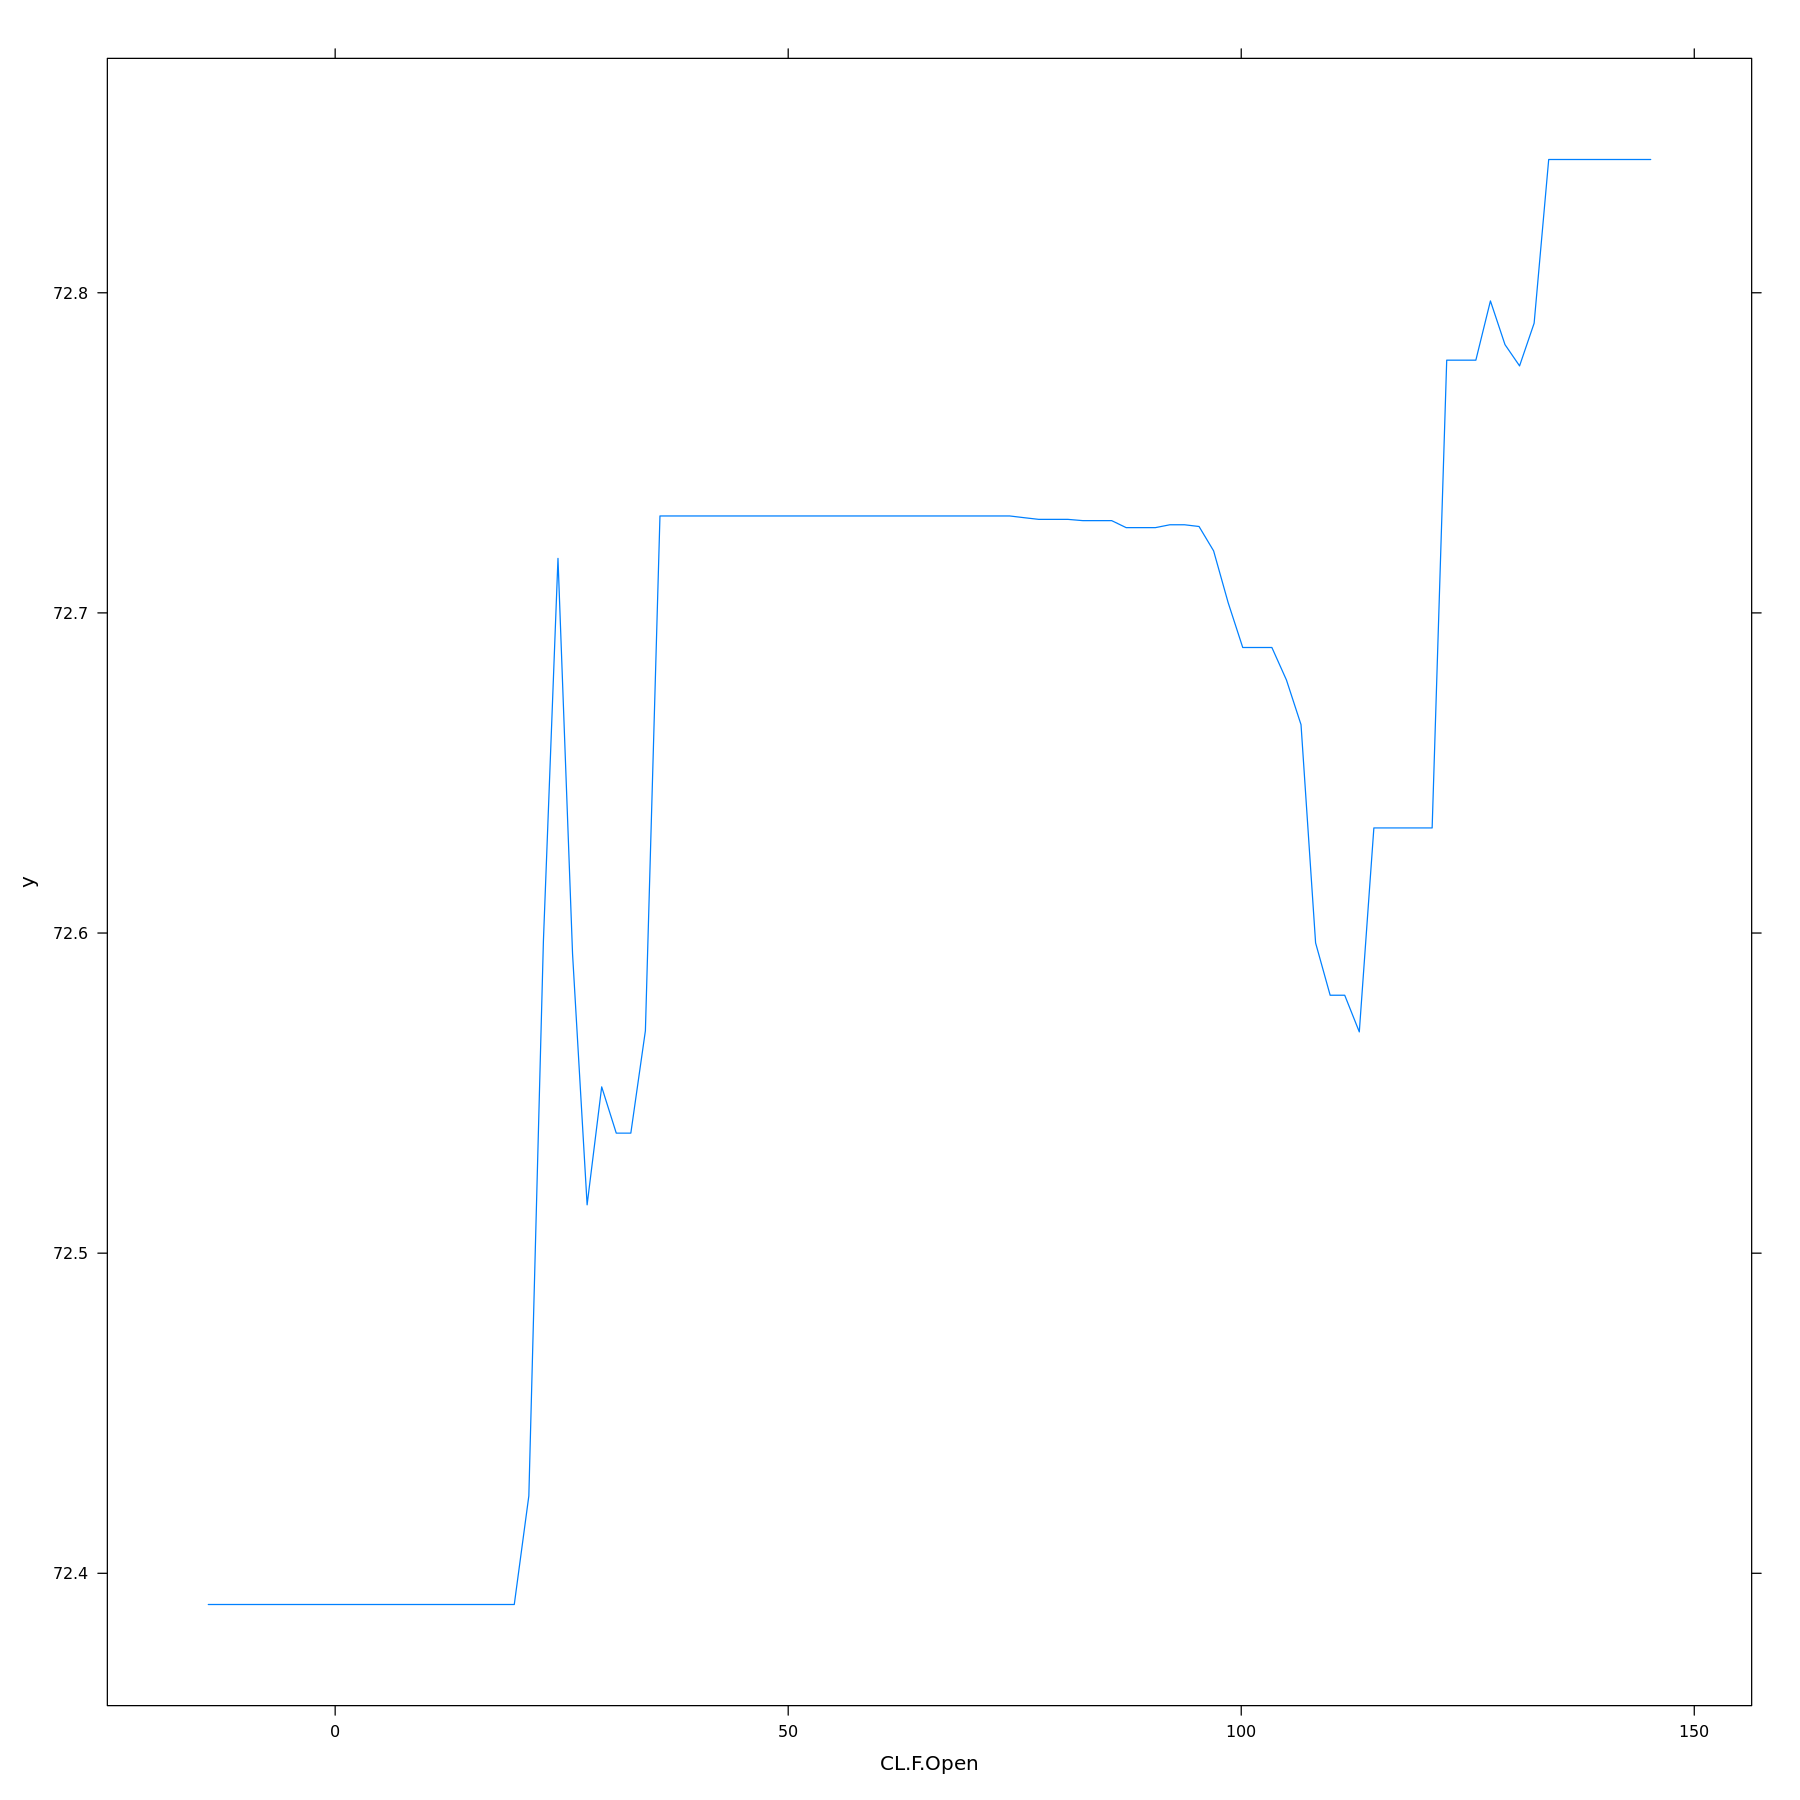

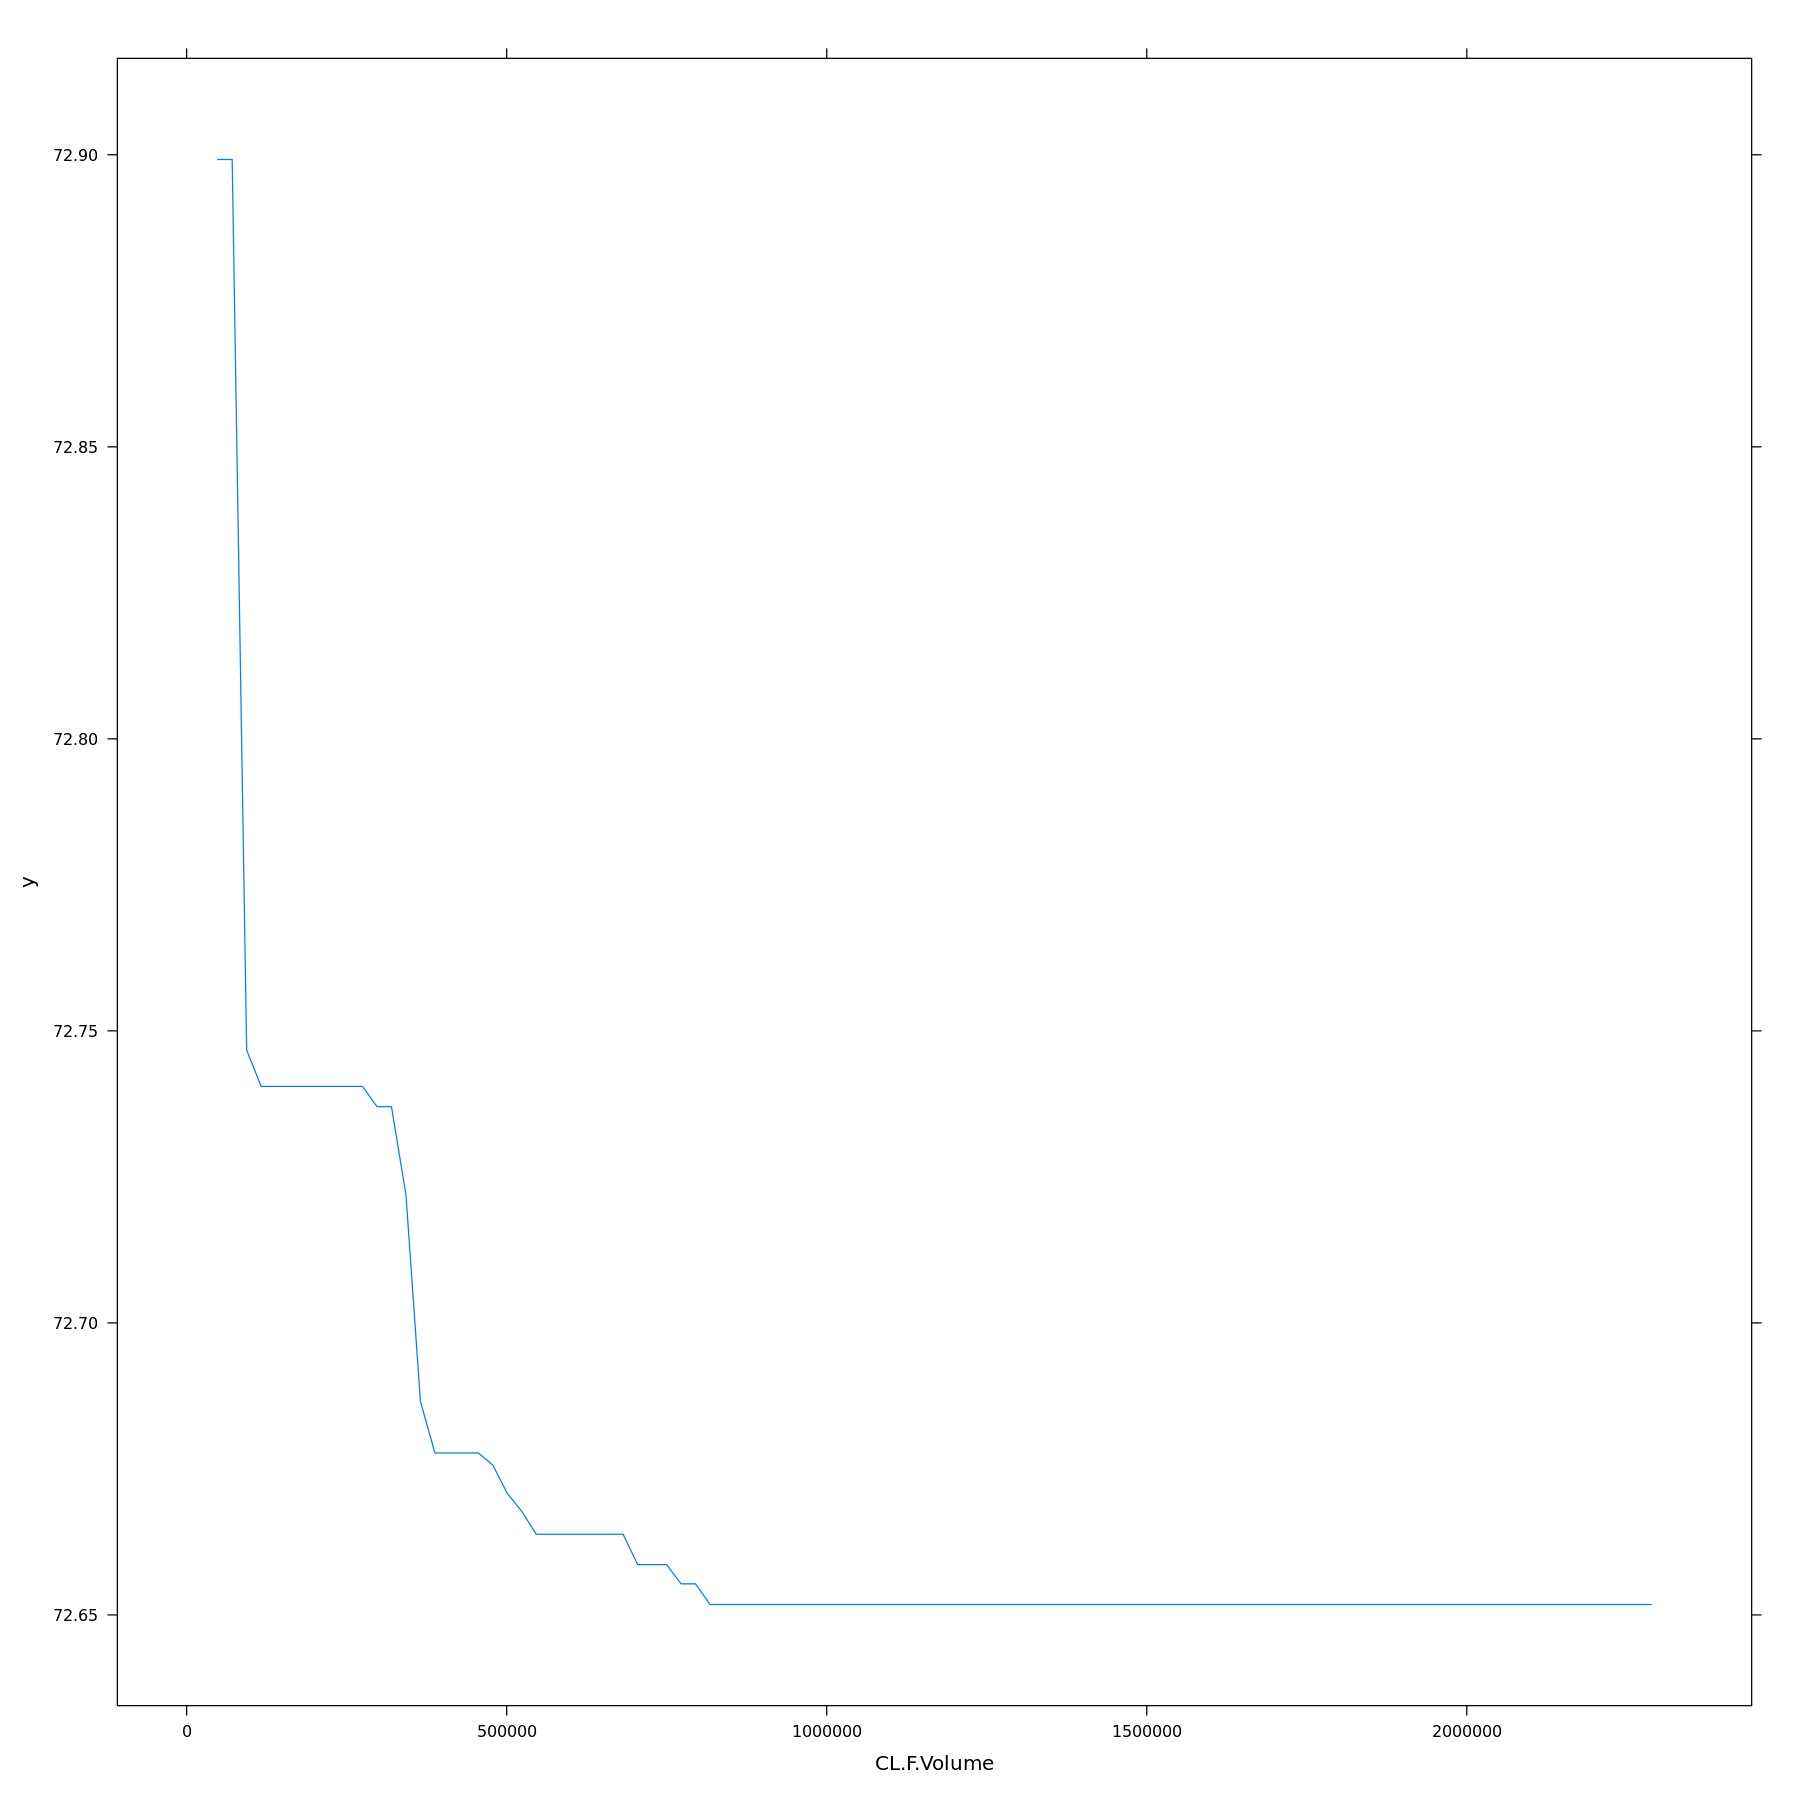

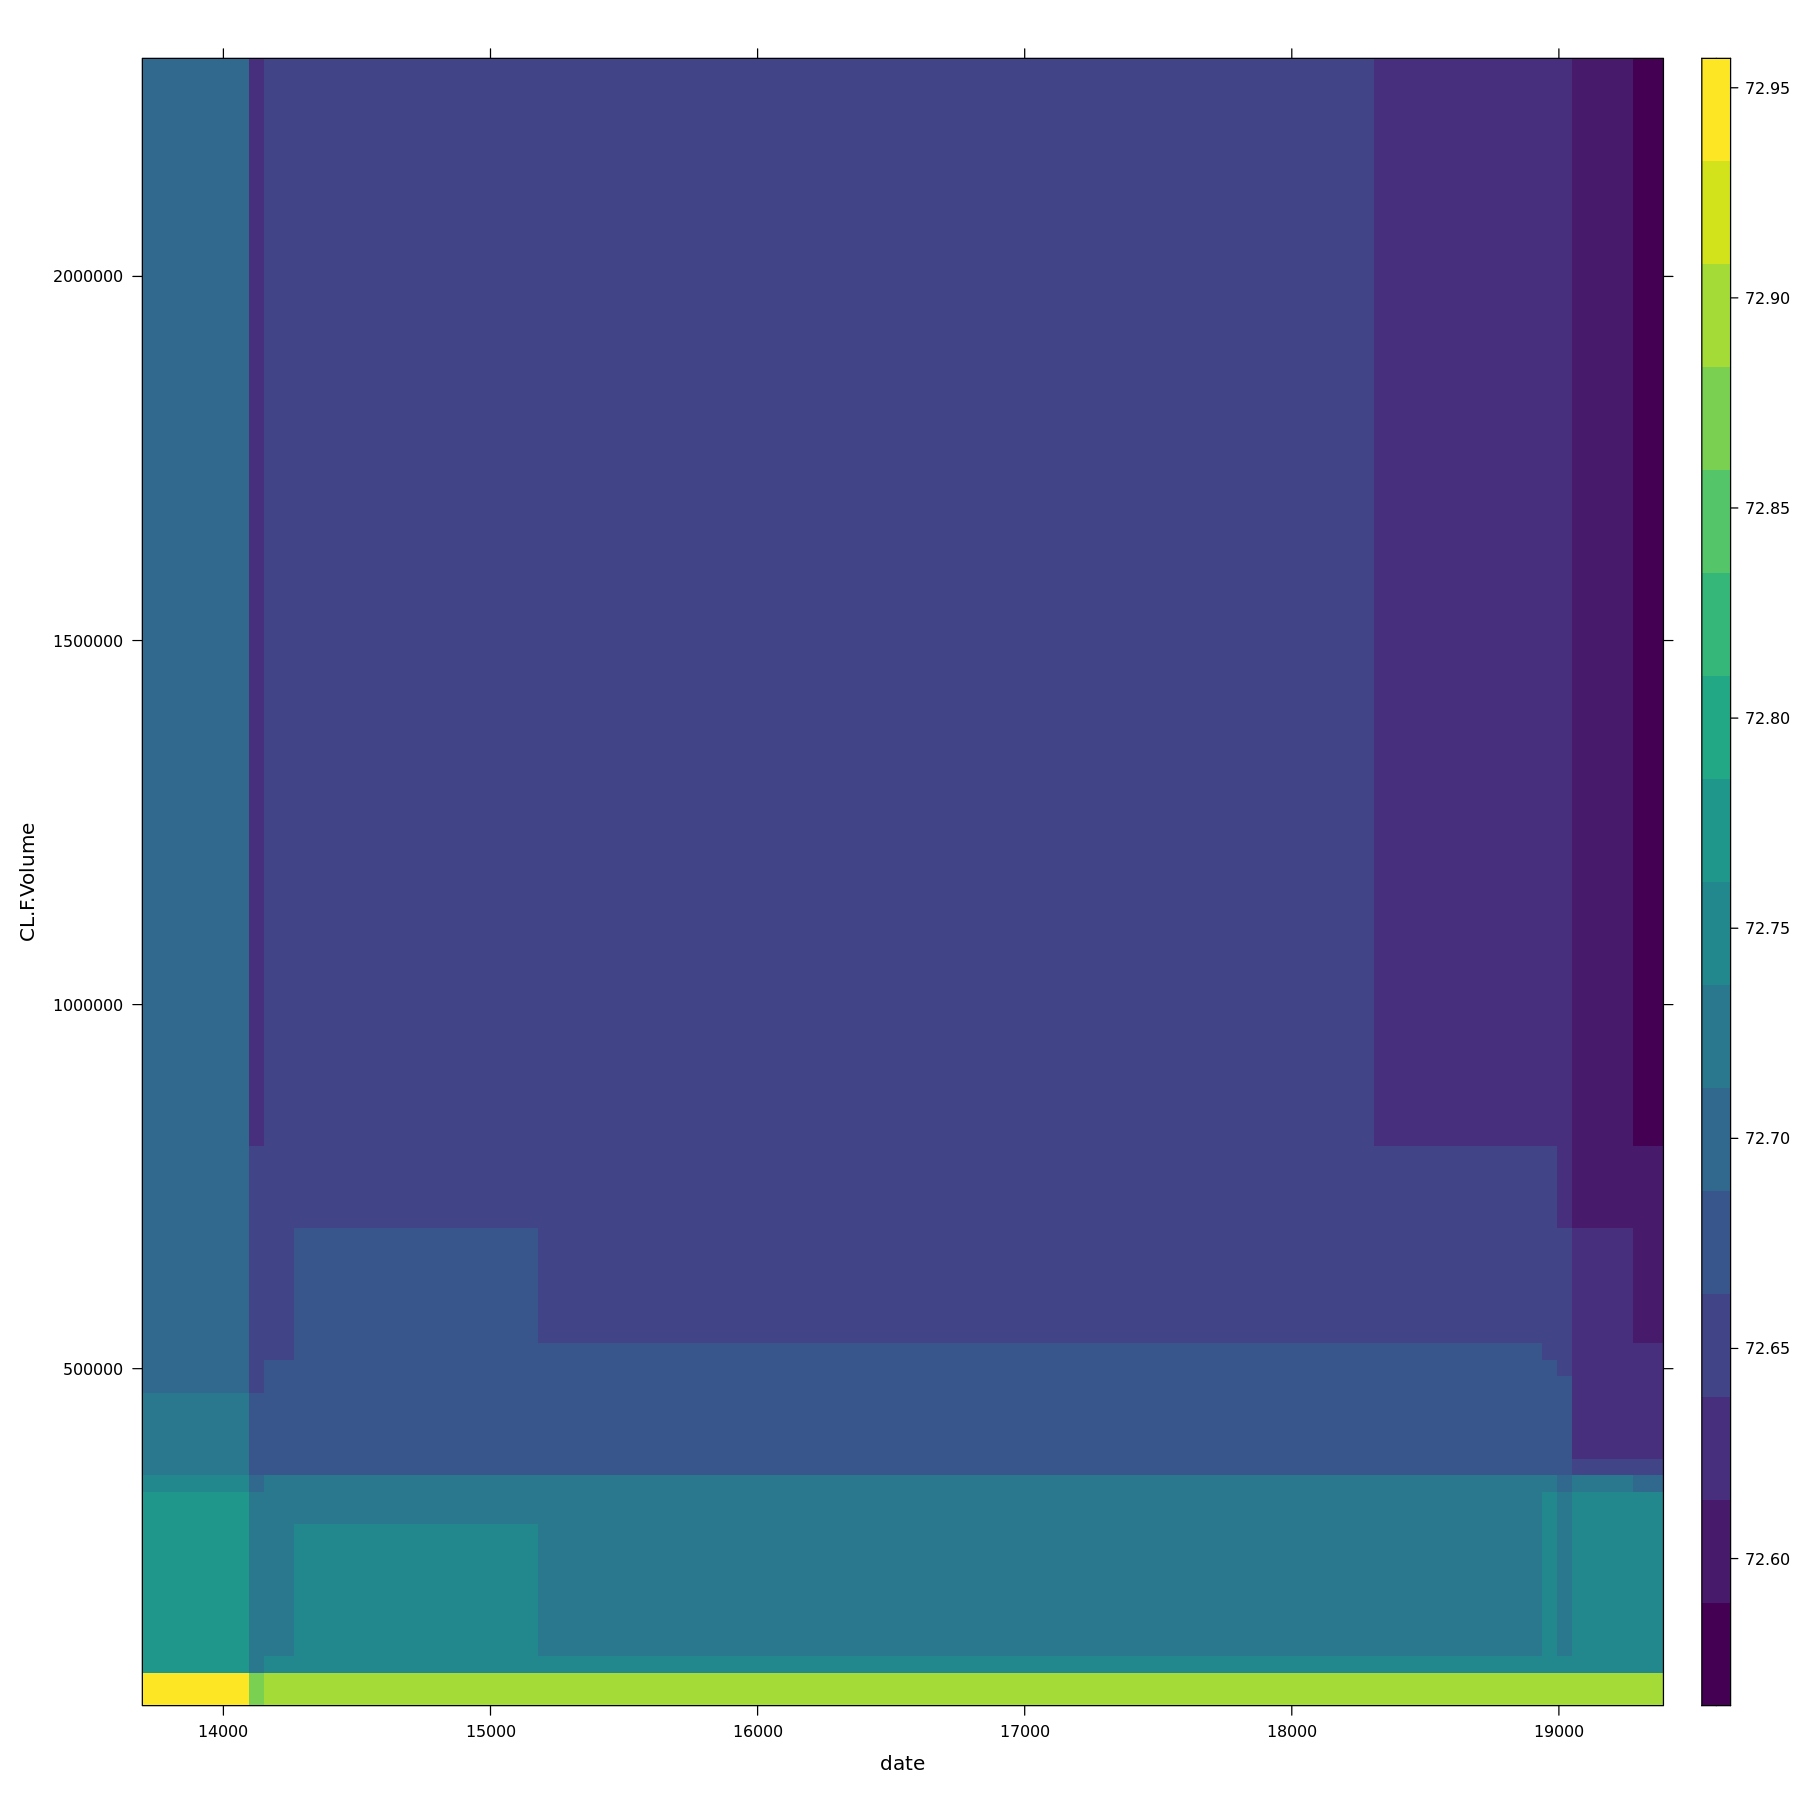

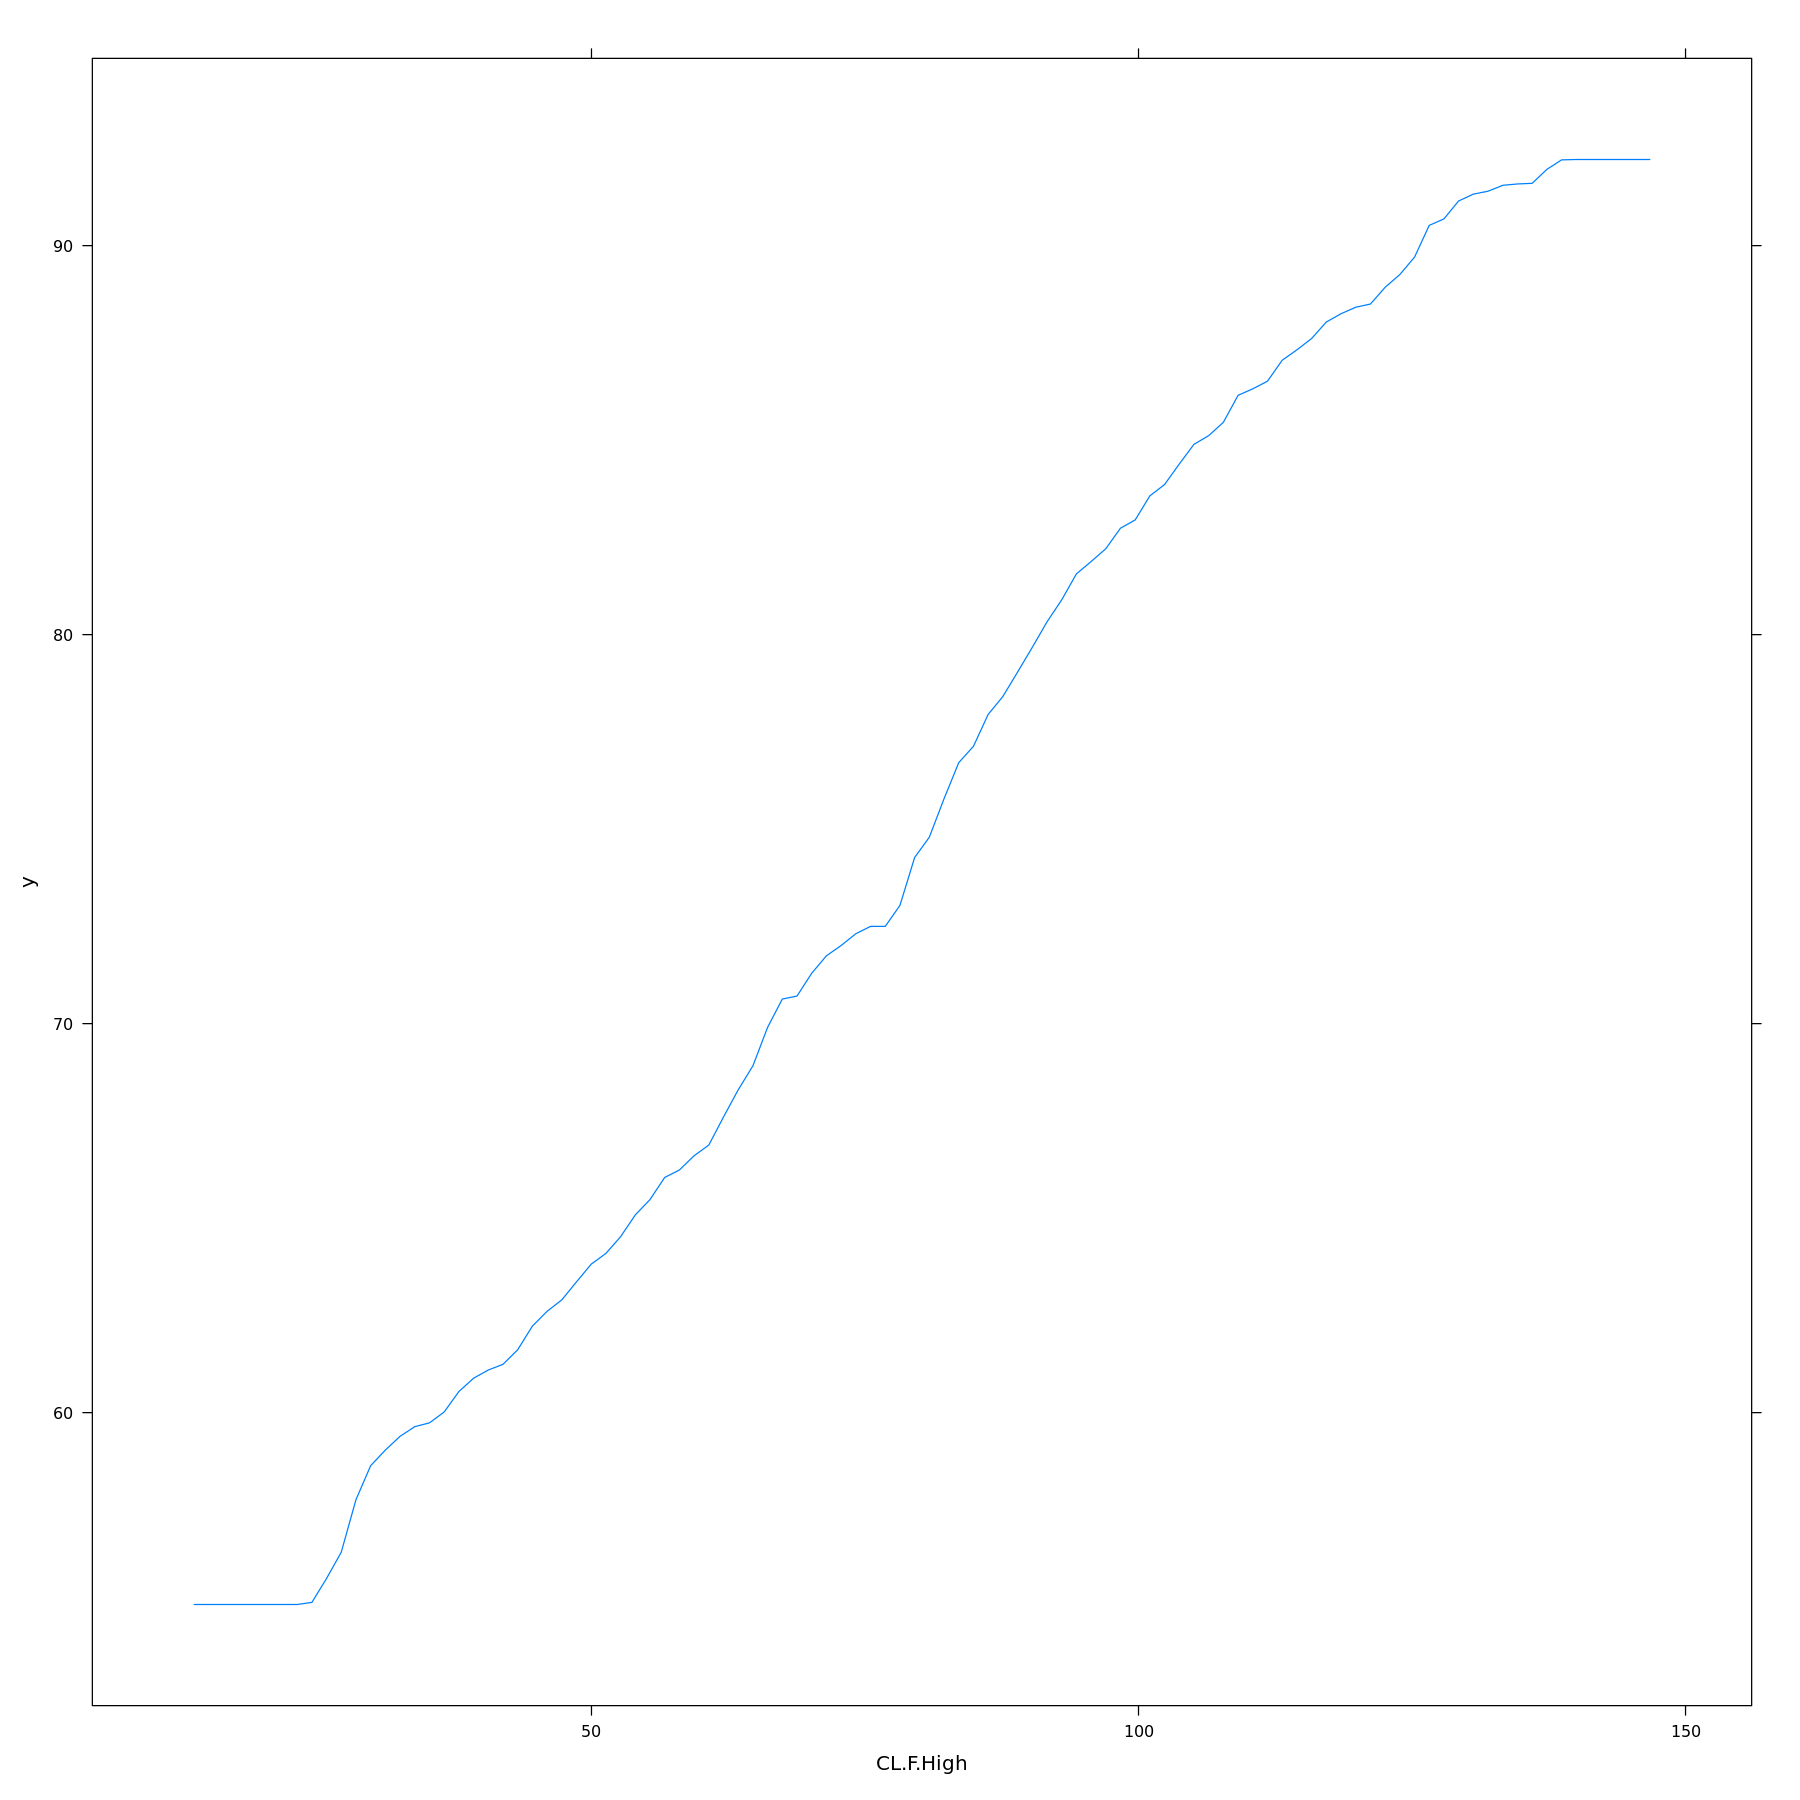

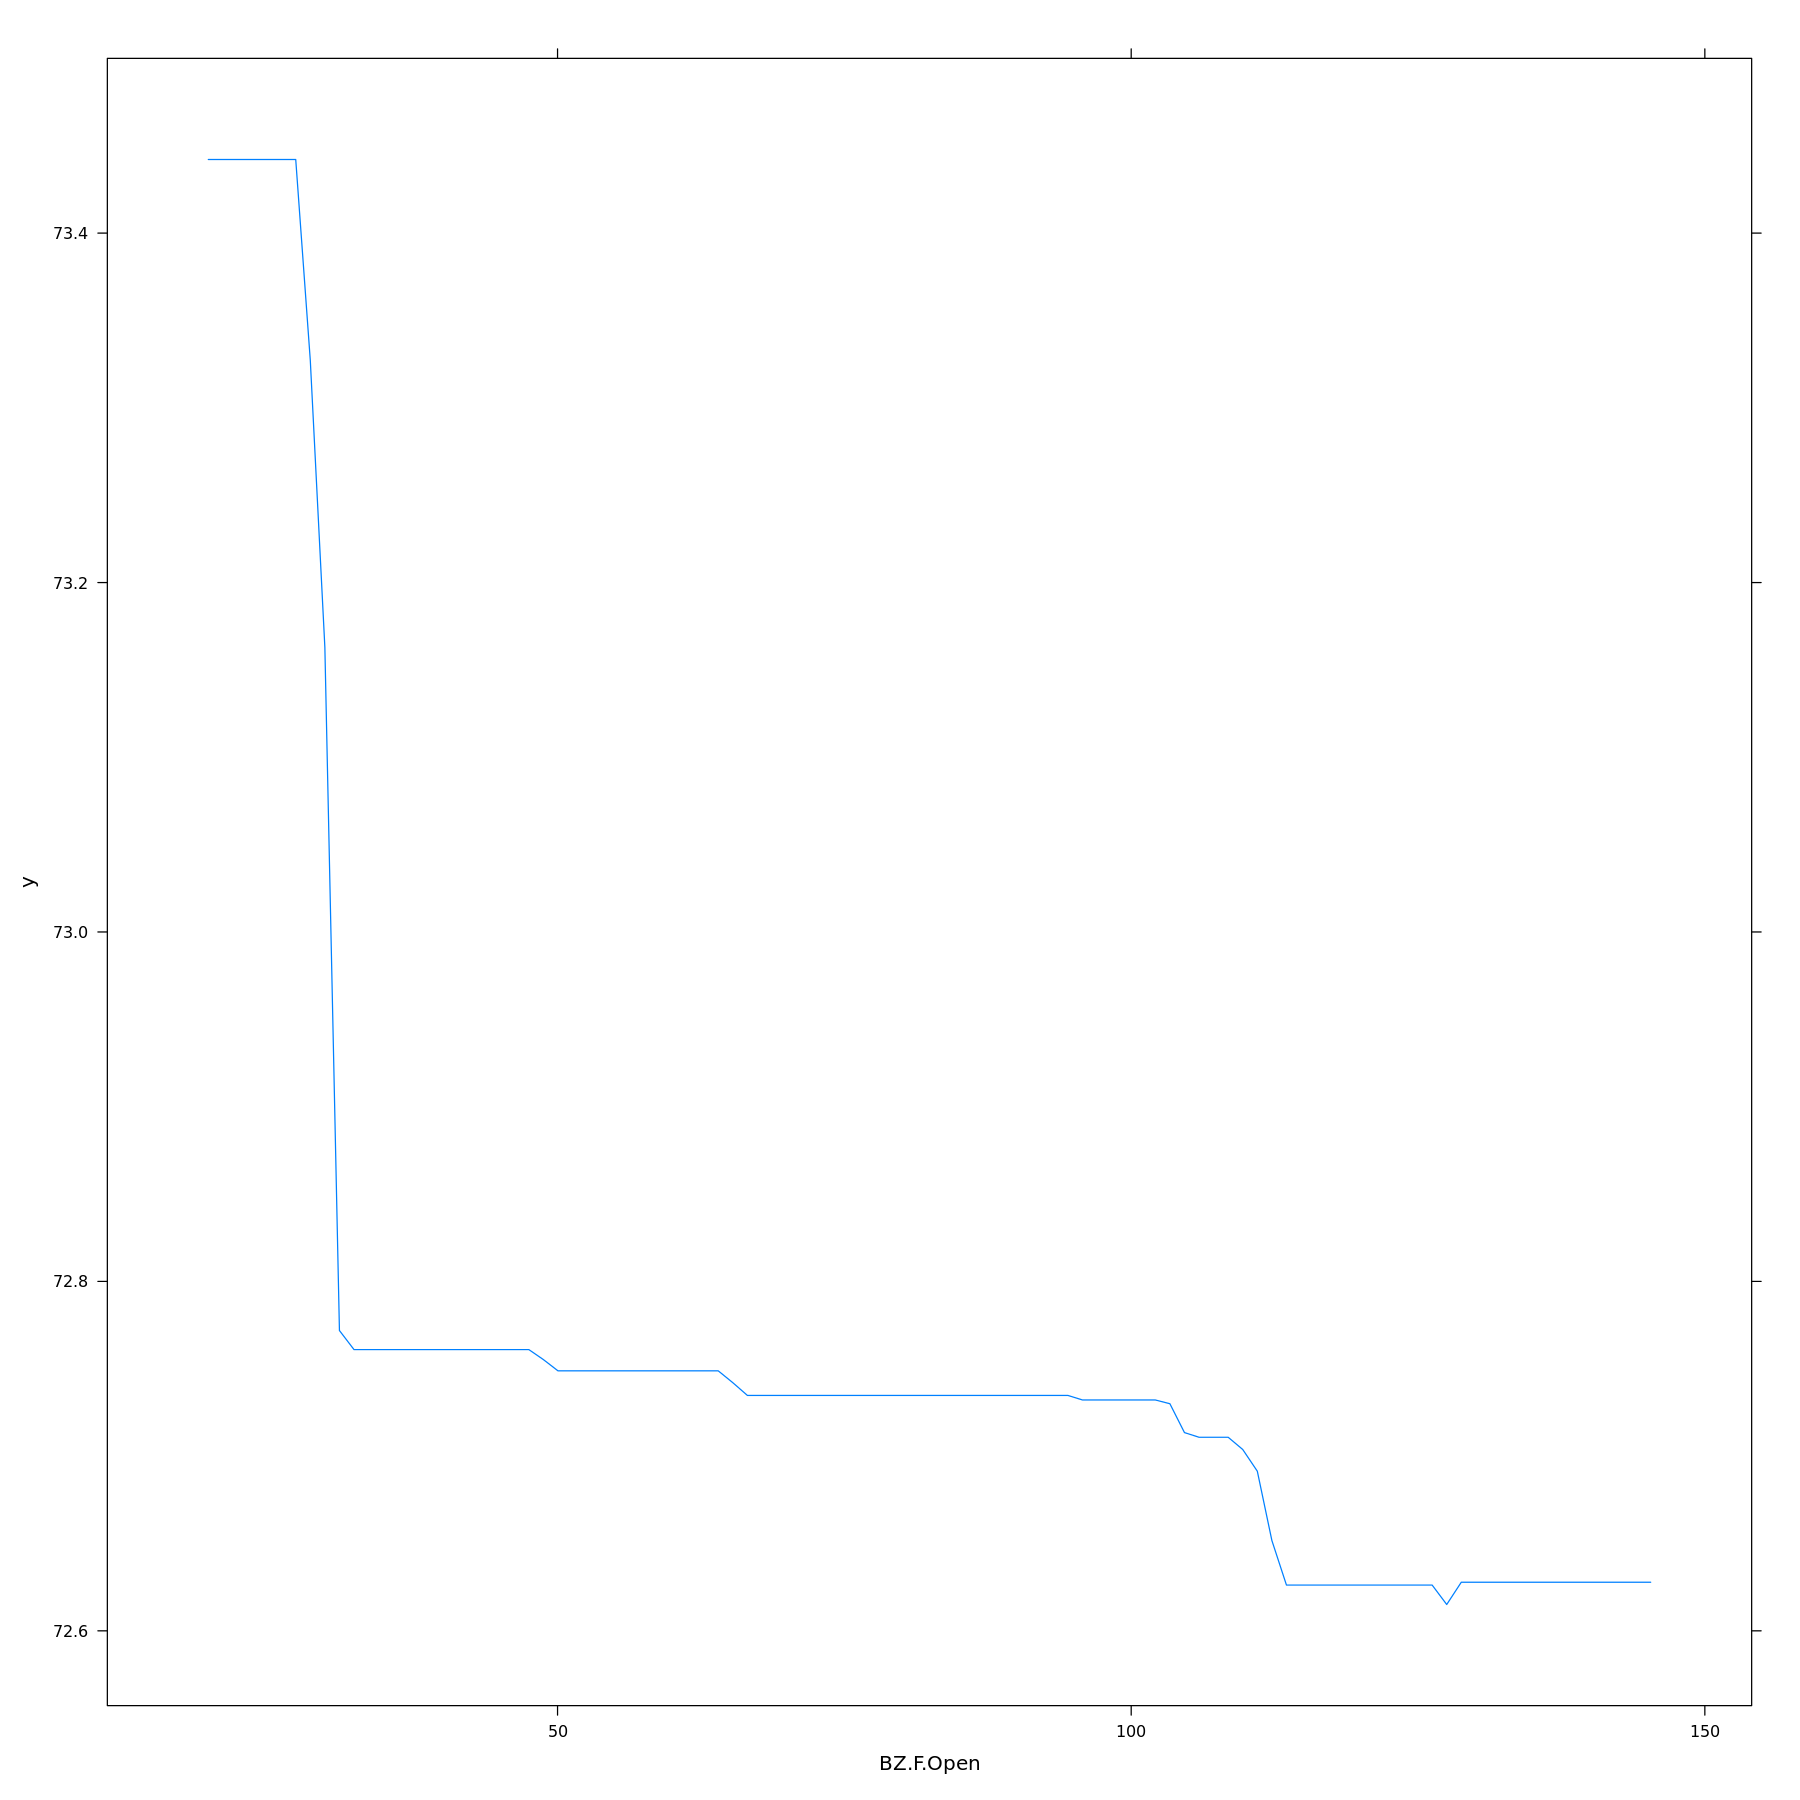

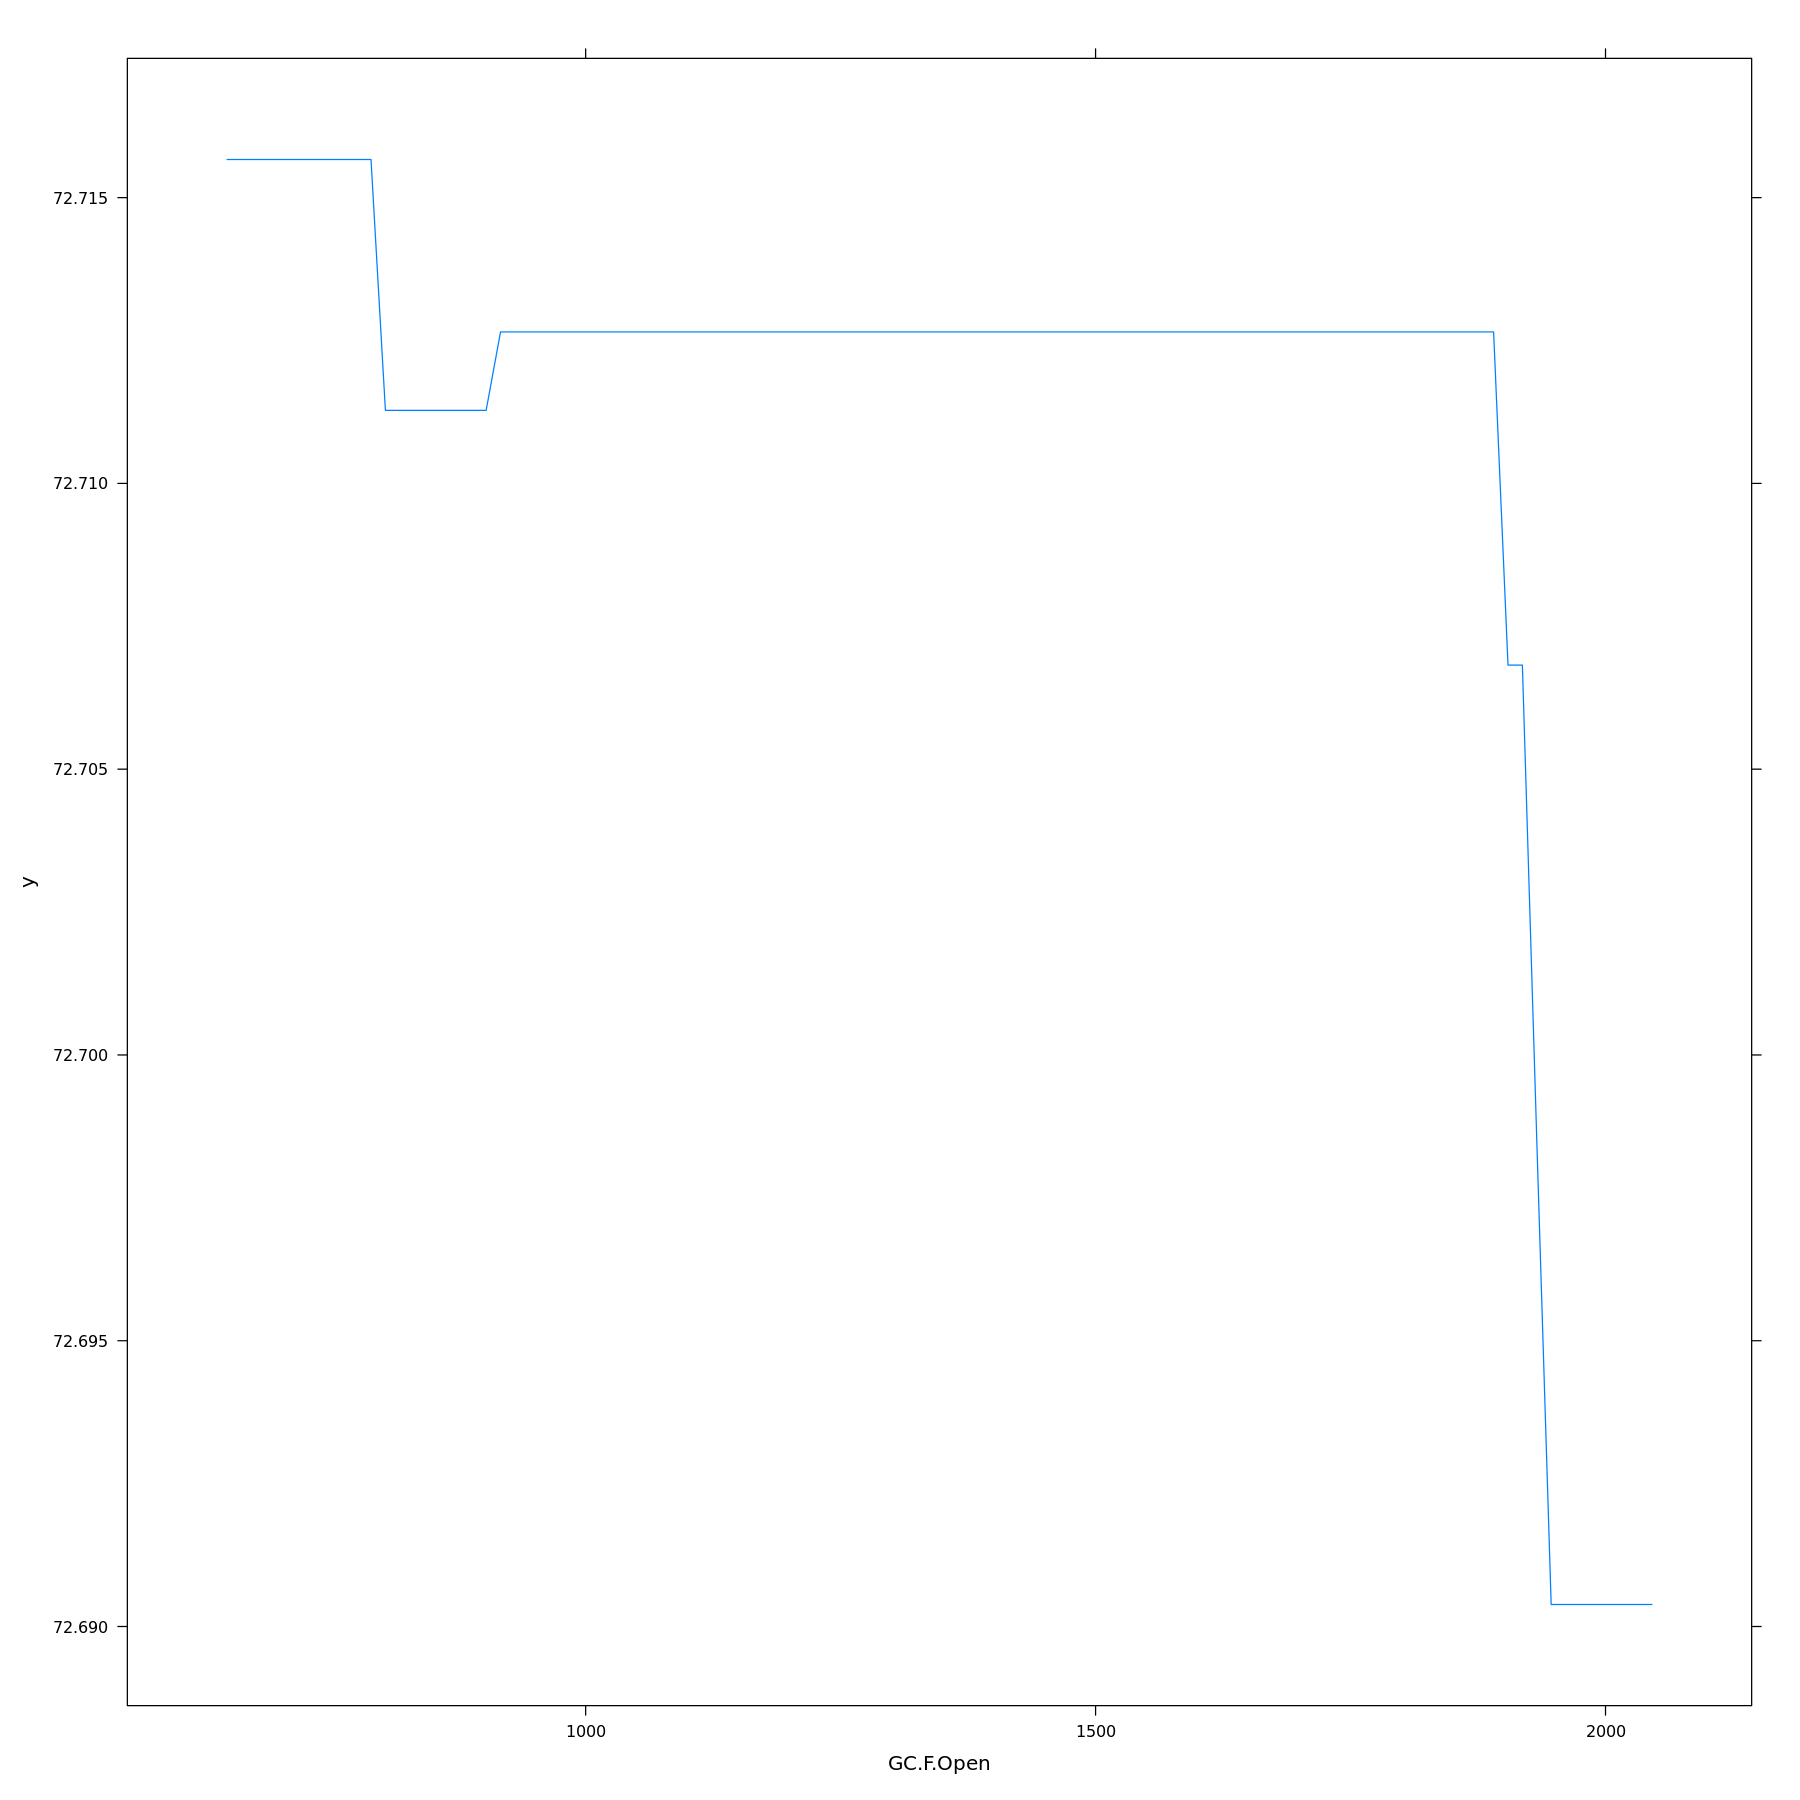

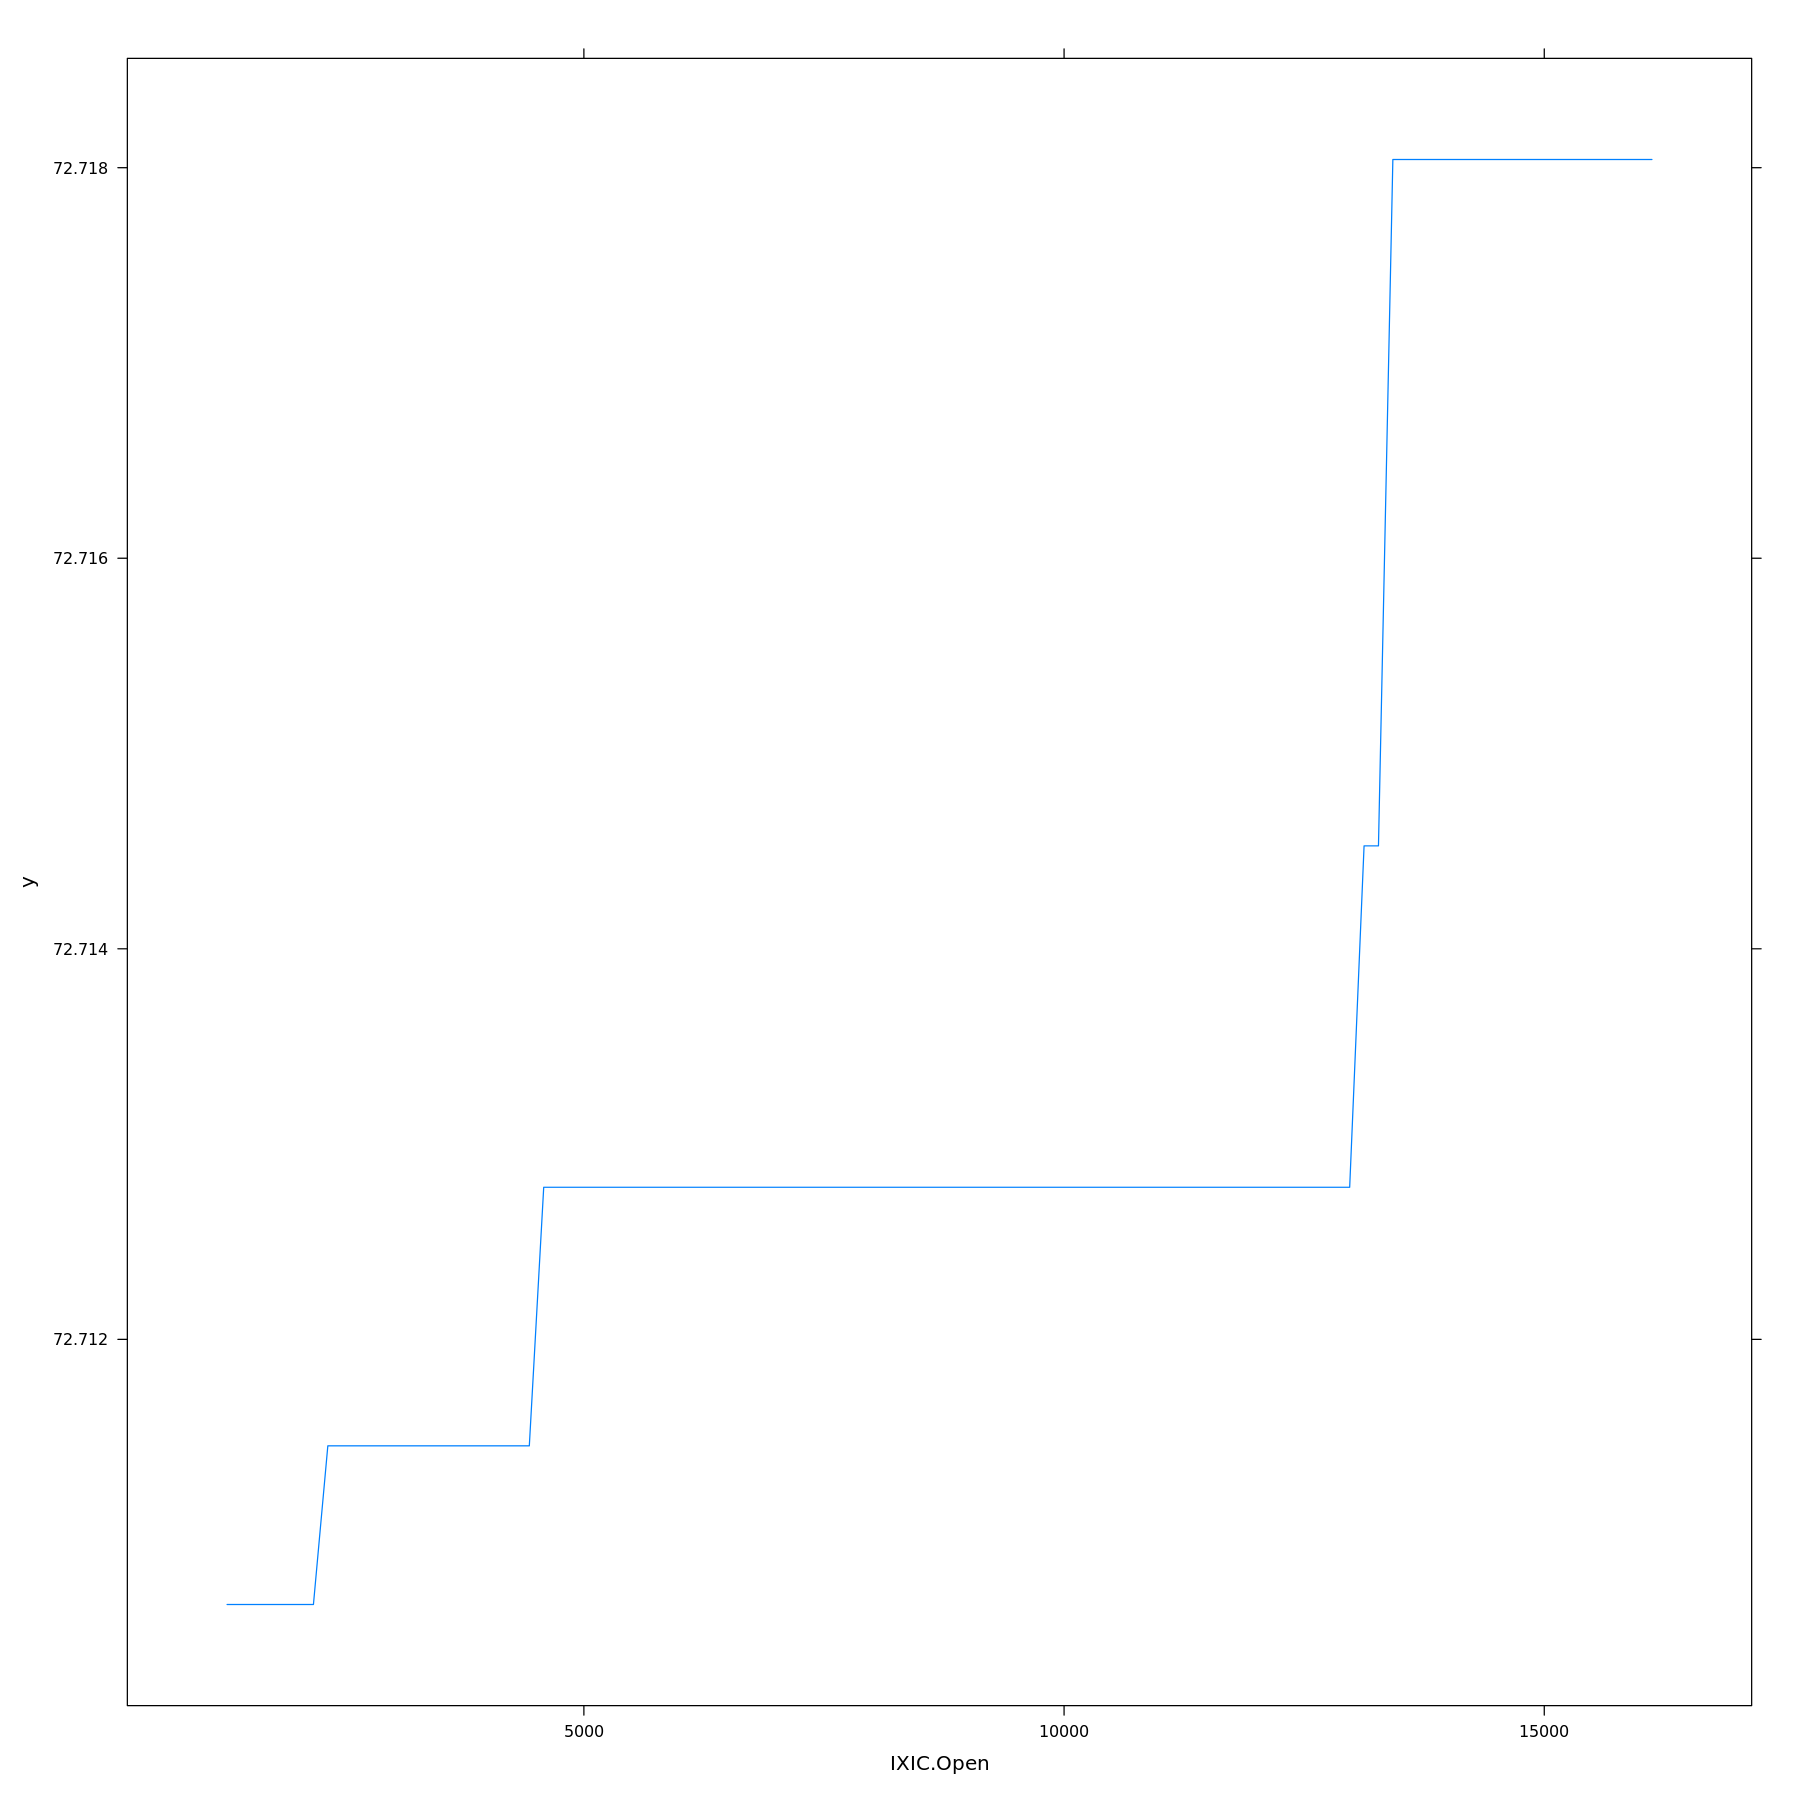

In [ ]:
# 4 Boosting - combination of previous models
boost.movies=gbm(CL.F.Close~.-BZ.F.Close ,data=data.train, 
                 distribution="gaussian",n.trees=5000, interaction.depth=4, shrinkage=0.01)

plot(boost.movies$train.error, type="l")
#

par(mai=mai.new)

summary(boost.movies, las=1, cBar=10) 

par(mai=mai.old)

yhat.boost=predict(boost.movies ,newdata=data.test,n.trees=1:5000)
err = apply(yhat.boost, 2, function(pred) mean((data.test$CL.F.Close -pred)^2))
plot(err, type="l")


plot(boost.movies$train.error, type="l")
lines(err, type="l", col=2)
best=which.min(err)
abline(v=best, lty=2, col=4)
err.boost= min(err)


##Comparison of models in terms of residual deviance
dev.gbm<- (sum((yhat.boost[,best]-data.test$CL.F.Close)^2))
dev.gbm
dev.tree
#dev.gam
dev.lm



boost.movies
# partial dependence plots
plot(boost.movies, i.var=1, n.trees = best)
plot(boost.movies, i.var=2, n.trees = best)
plot(boost.movies, i.var=5, n.trees = best)
plot(boost.movies, i.var=c(1,5), n.trees = best) #bivariate (library(viridis) may be necessary)
#
plot(boost.movies, i.var=3, n.trees = best) # categorical
plot(boost.movies, i.var=6, n.trees = best)

plot(boost.movies, i=23, n.trees = best)# categorical
plot(boost.movies, i=17, n.trees = best) #no effect
